#Thyroid Prediction

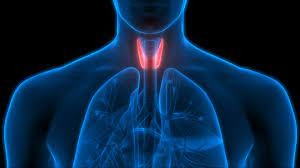

#Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Handling Warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('thyroid_data.csv')

# Exploratory Data Analysis

In [ ]:
df.head()

Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0     I      Excellent       No  
2  T1a  N0  M0     I      Excellent       No  
3  T1a  N0  M0     I      Excellent       No  
4  T1a  N0  M0     I      Excellent       No

In [ ]:
df.tail()

Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
378   72      M     Yes        Yes             Yes                 Euthyroid   
379   81      M     Yes         No             Yes                 Euthyroid   
380   72      M     Yes        Yes              No                 Euthyroid   
381   61      M     Yes        Yes             Yes  Clinical Hyperthyroidism   
382   67      M     Yes         No              No                 Euthyroid   

            Physical Examination Adenopathy     Pathology     Focality  Risk  \
378  Single nodular goiter-right      Right     Papillary    Uni-Focal  High   
379          Multinodular goiter  Extensive     Papillary  Multi-Focal  High   
380          Multinodular goiter  Bilateral     Papillary  Multi-Focal  High   
381          Multinodular goiter  Extensive  Hurthel cell  Multi-Focal  High   
382          Multinodular goiter  Bilateral     Papillary  Multi-Focal  High   

       T    N   M Stage                Response Recurred  
378  T4b  N1b  M1   IVB  Biochemical Incomplete      Yes  
379  T4b  N1b  M1   IVB   Structural Incomplete      Yes  
380  T4b  N1b  M1   IVB   Structural Incomplete      Yes  
381  T4b  N1b  M0   IVA   Structural Incomplete      Yes  
382  T4b  N1b  M0   IVA   Structural Incomplete      Yes

In [ ]:
df.shape

(383, 17)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
df.duplicated().sum()

19

In [ ]:
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

Numerical type columns:
Index(['Age'], dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
Non-Categorical Features: []
Discrete Features: []
Continuous Features: ['Age']


#Data Visualization

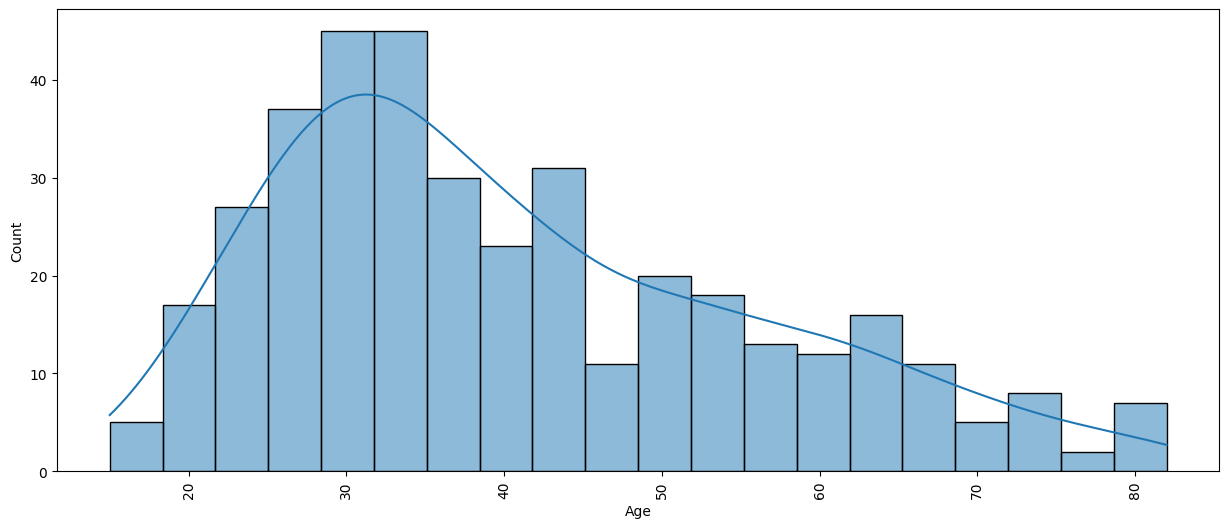

In [ ]:
for i in continuous:
  plt.figure(figsize=(15,6))
  sns.histplot(df[i],bins=20,kde=True,palette='hls')
  plt.xticks(rotation=90)
  plt.show()

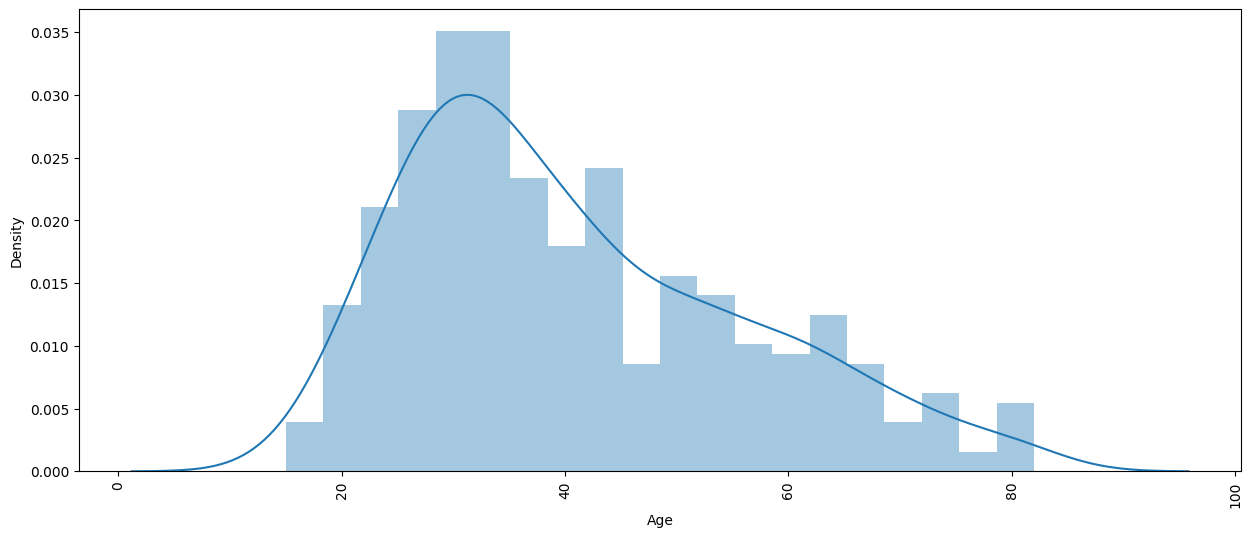

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

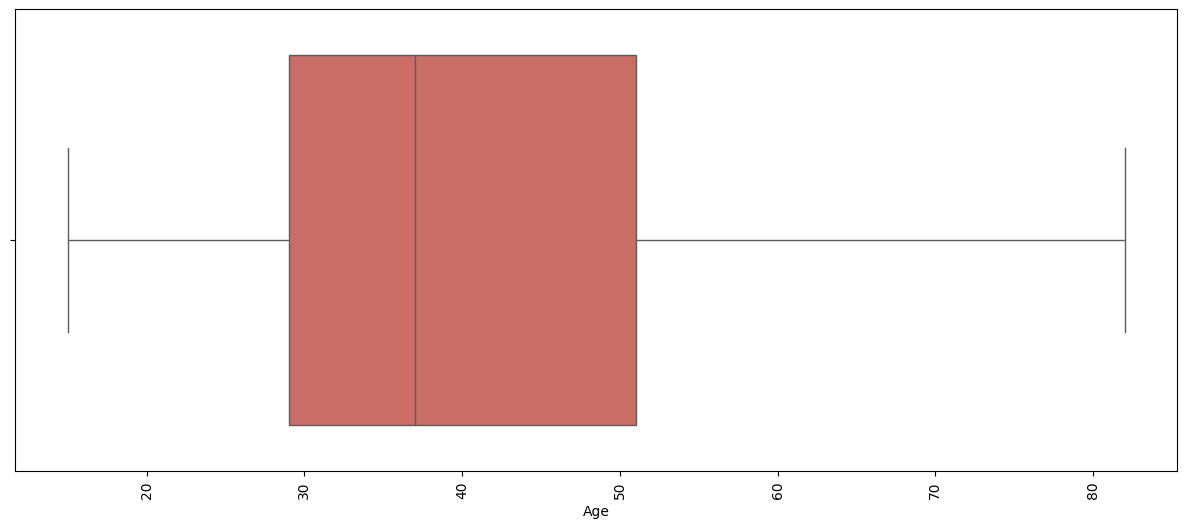

In [ ]:
for i in continuous:
  plt.figure(figsize=(15,6))
  sns.boxplot(x=i,data=df,palette='hls')
  plt.xticks(rotation=90)
  plt.show()

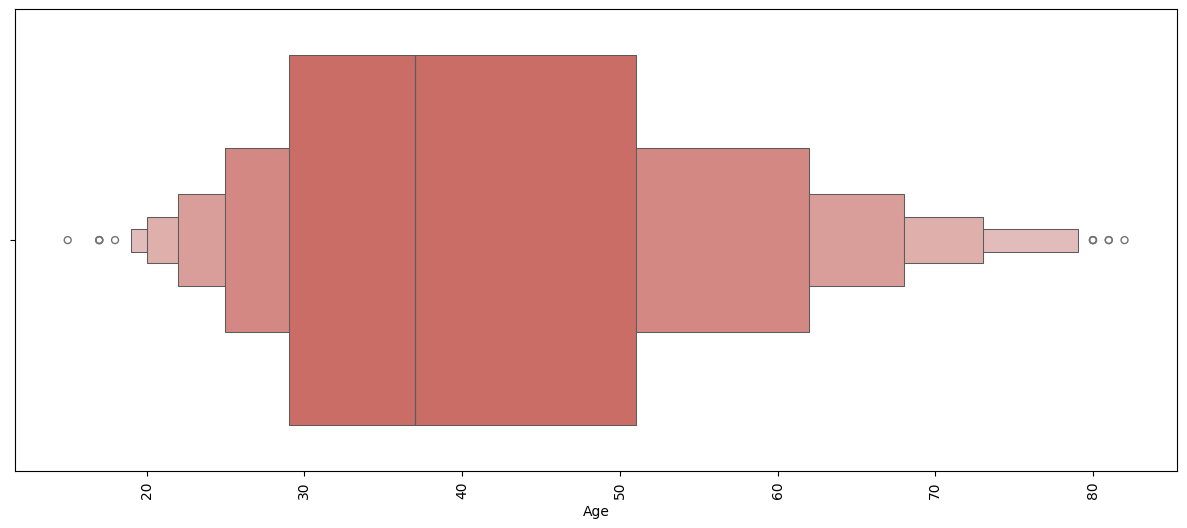

In [ ]:
for i in continuous:
  plt.figure(figsize=(15,6))
  sns.boxenplot(x=i,data=df,palette='hls')
  plt.xticks(rotation=90)
  plt.show()

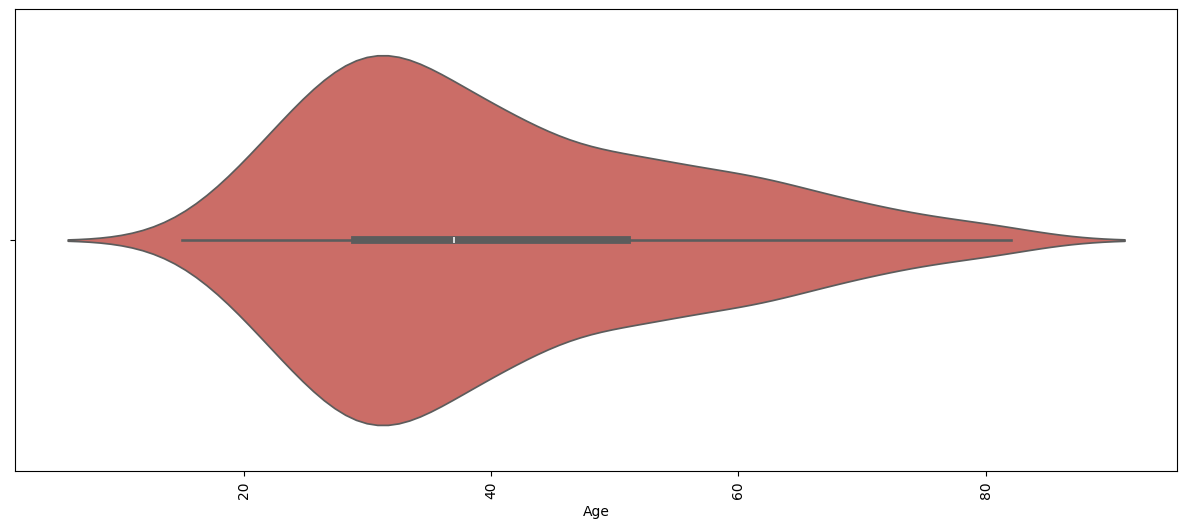

In [ ]:
for i in continuous:
  plt.figure(figsize=(15,6))
  sns.violinplot(x=i,data=df,palette='hls')
  plt.xticks(rotation=90)
  plt.show()

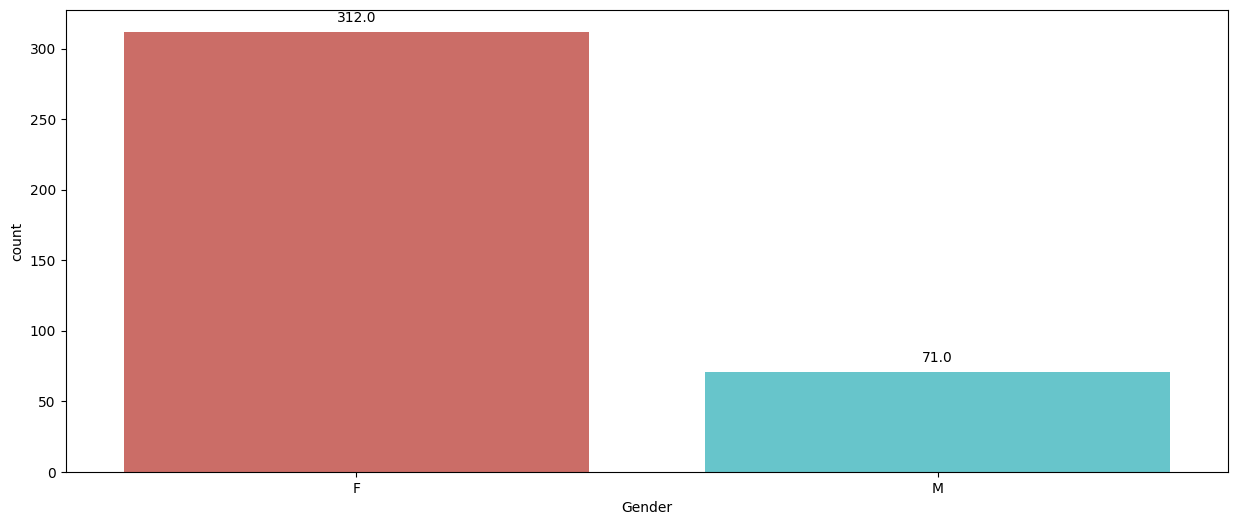

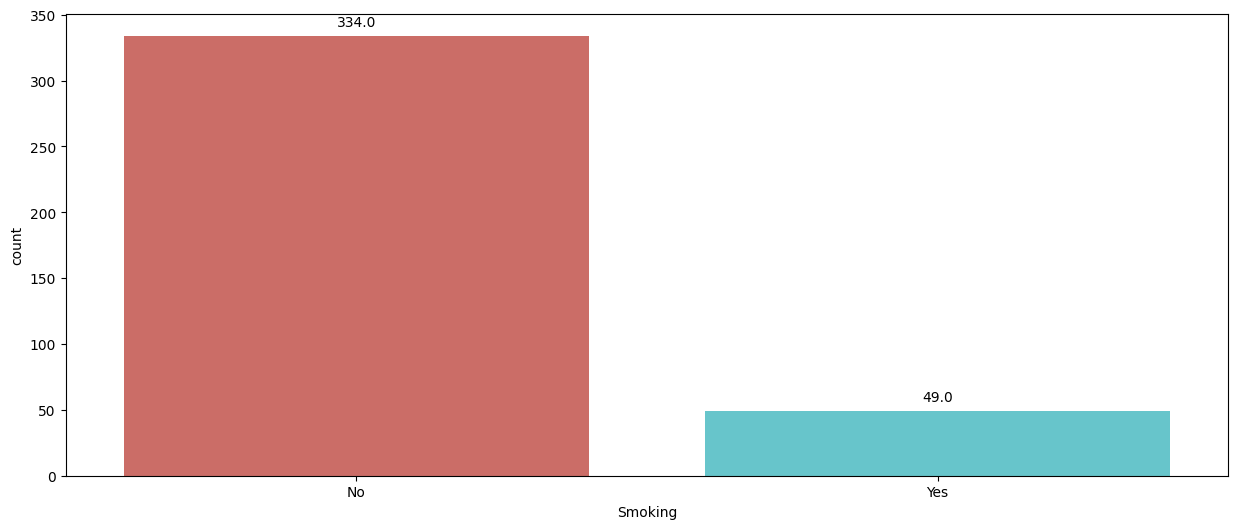

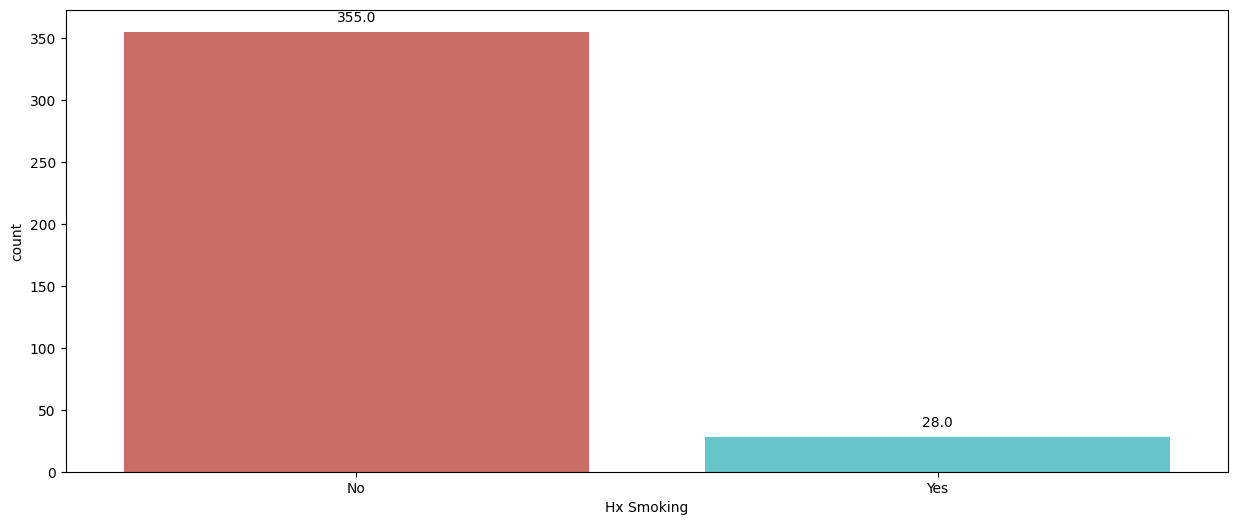

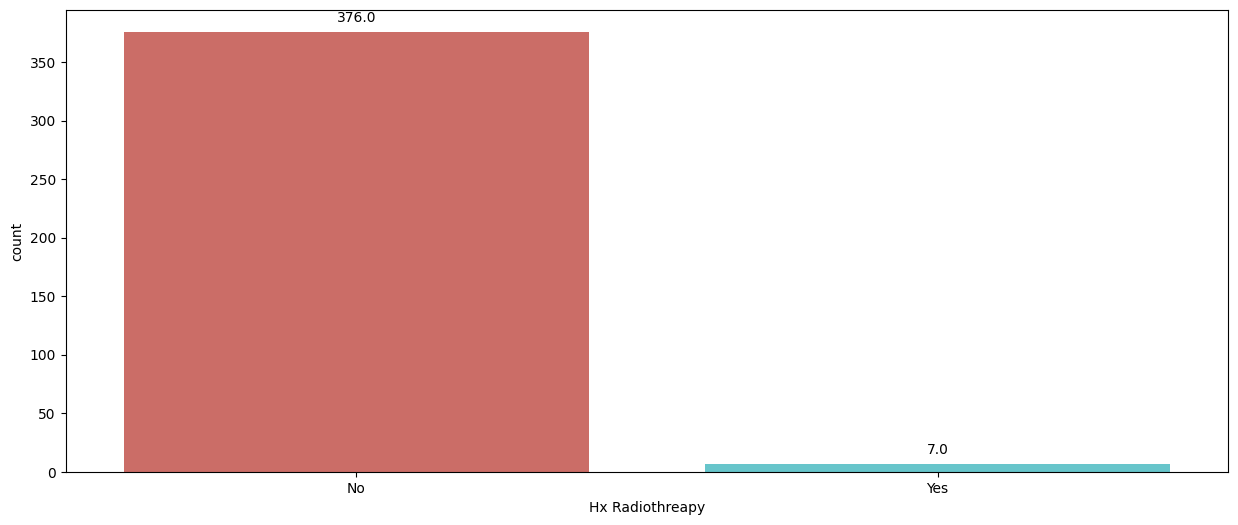

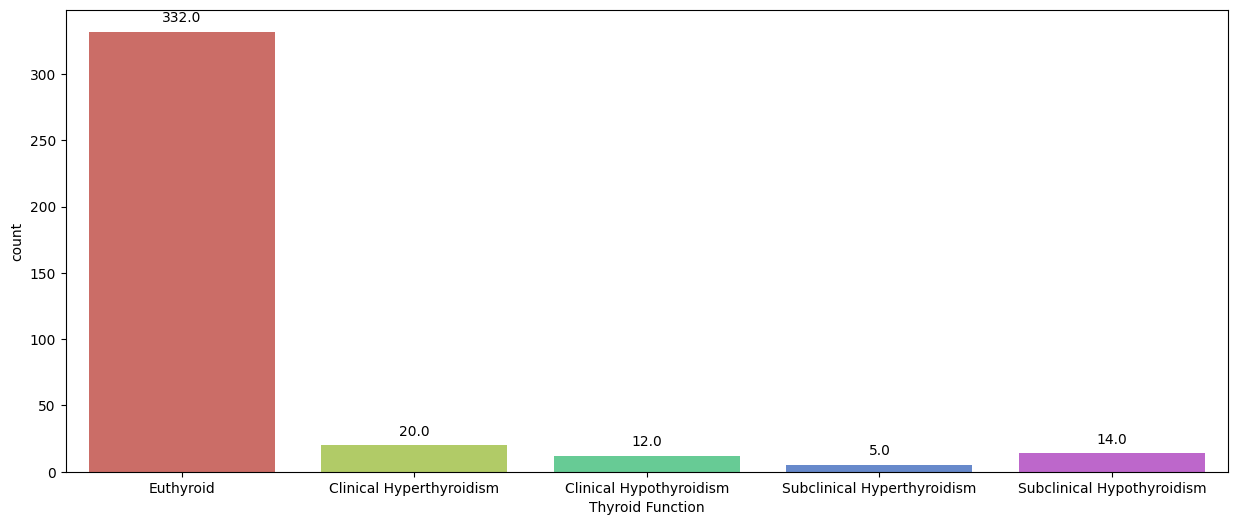

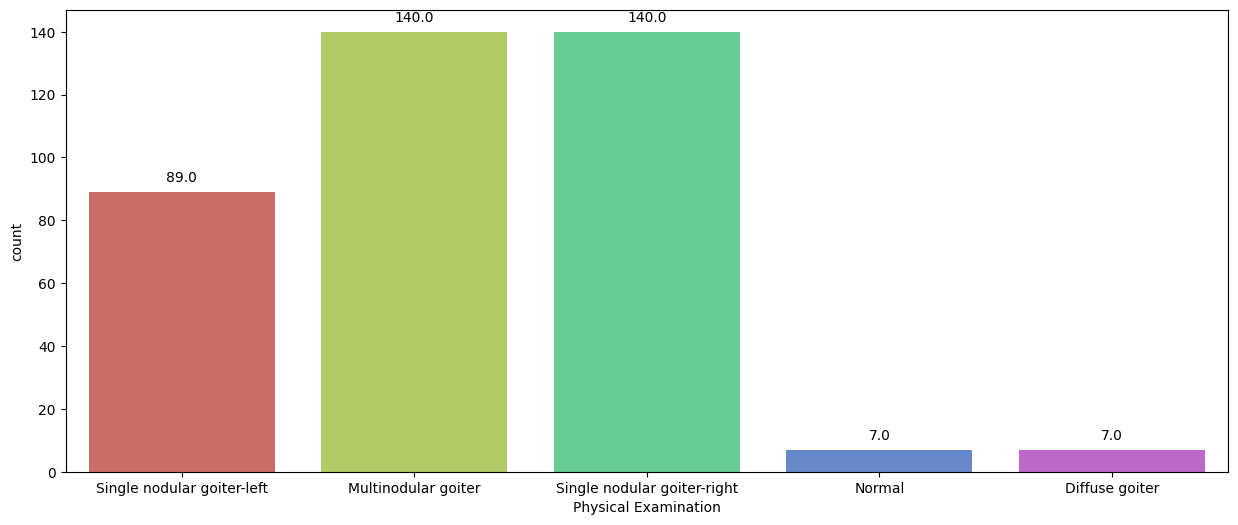

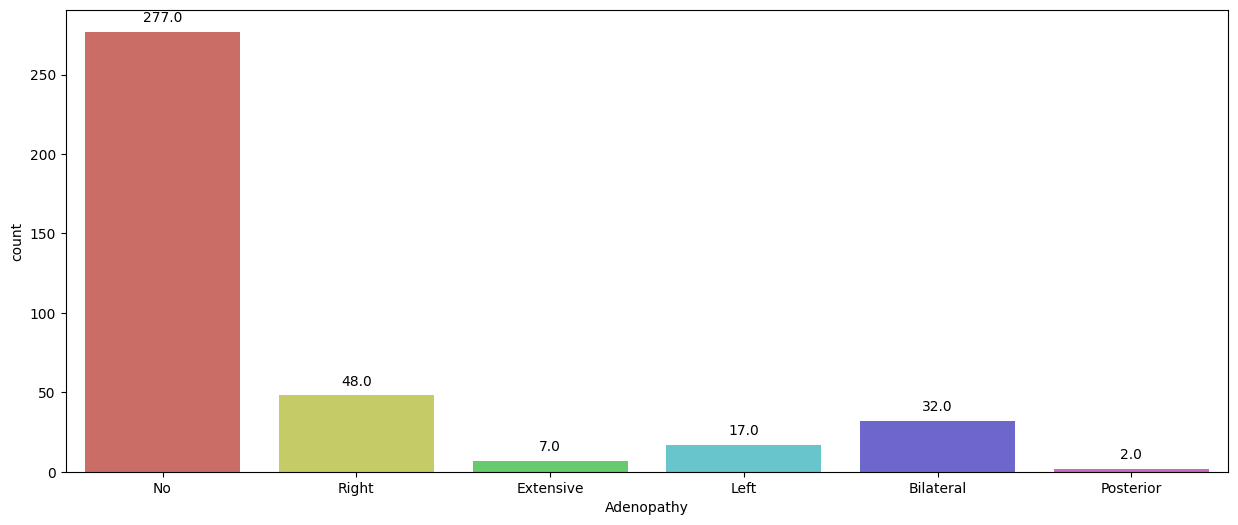

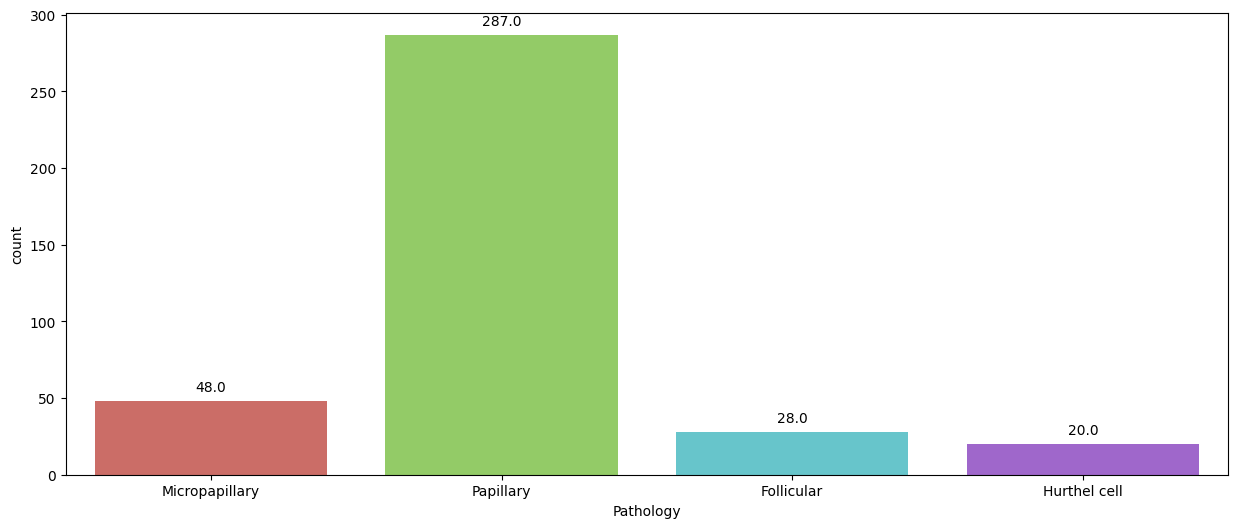

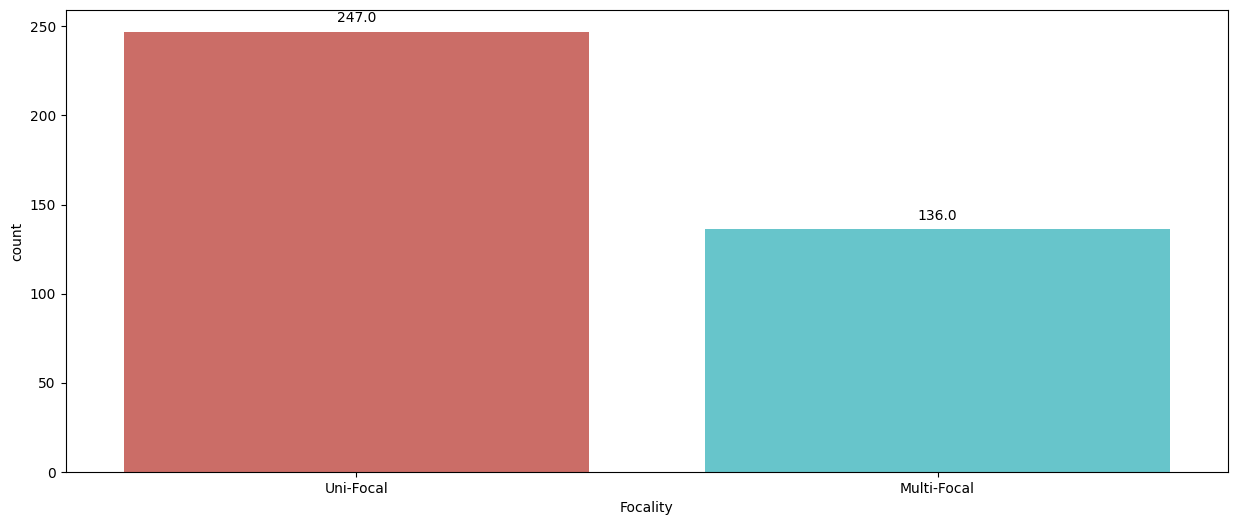

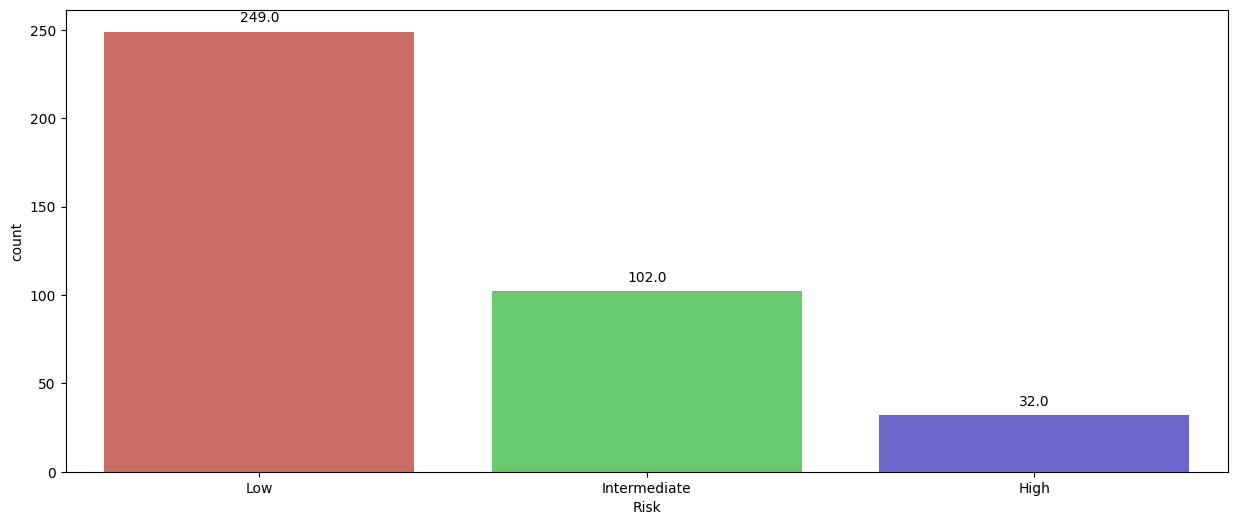

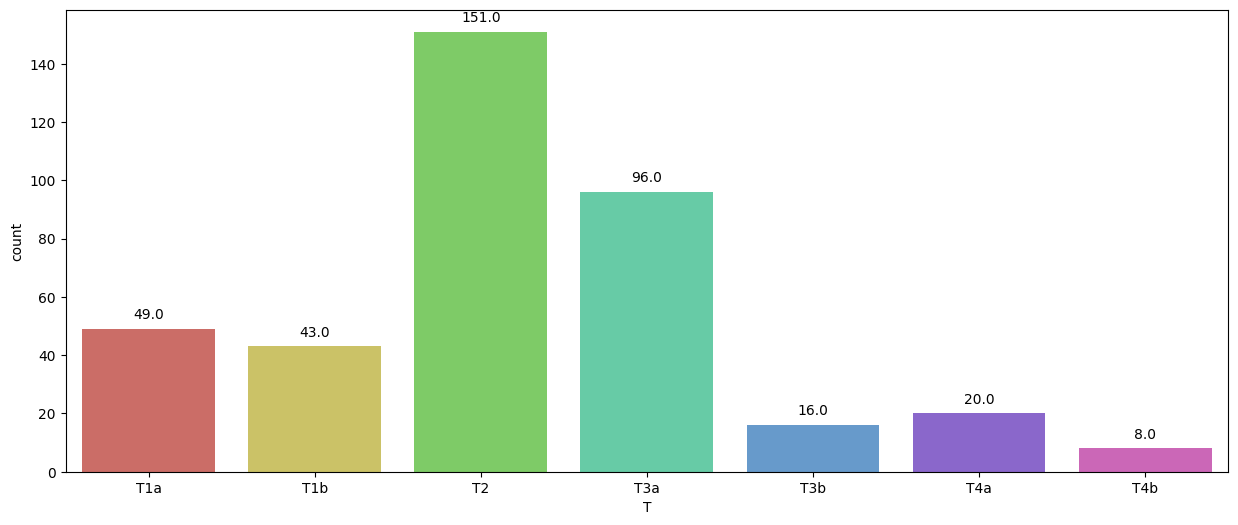

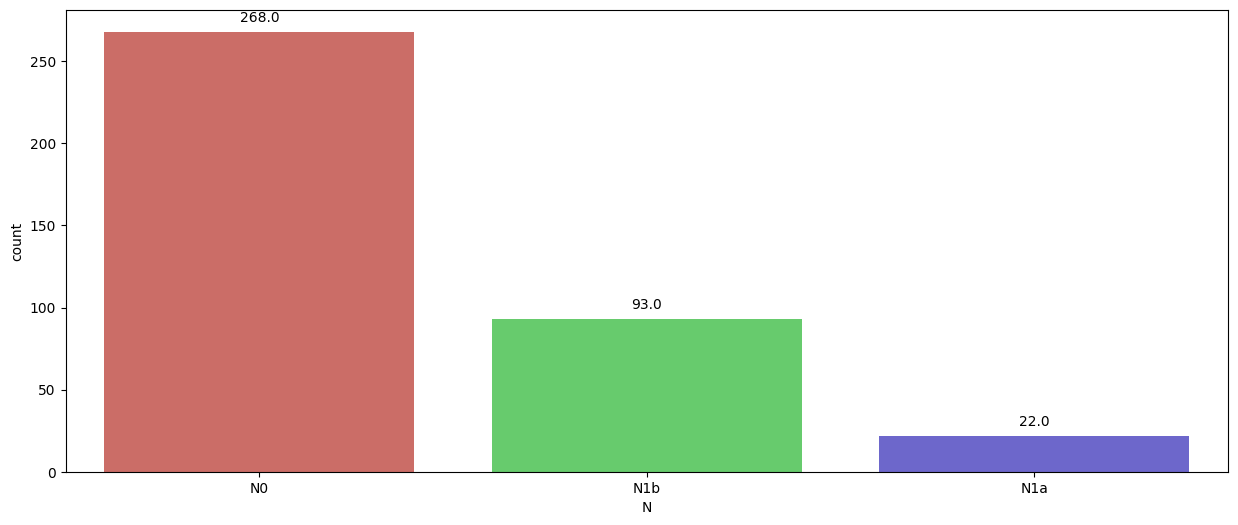

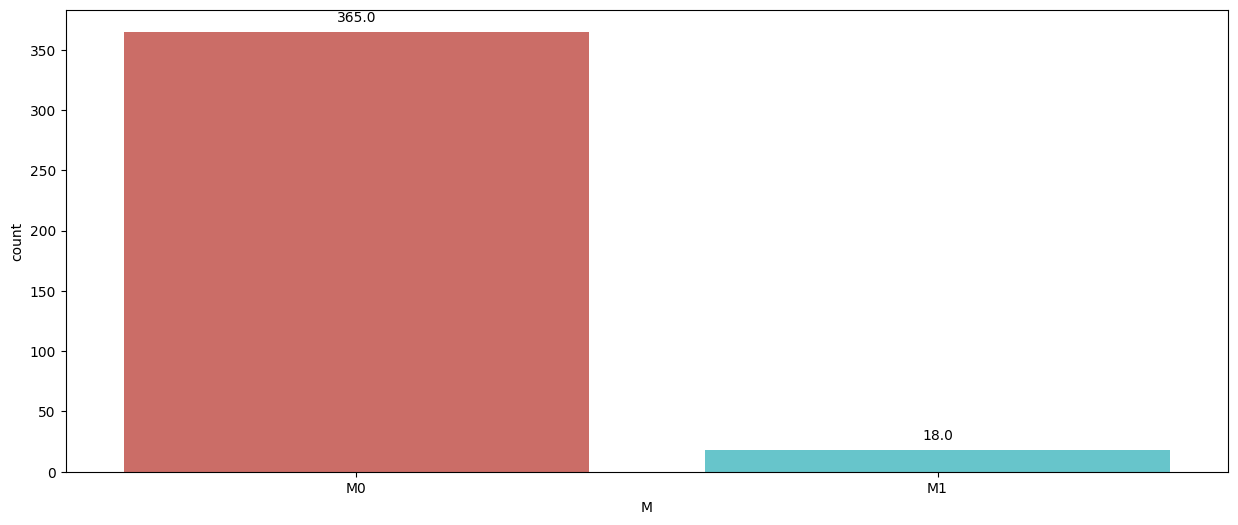

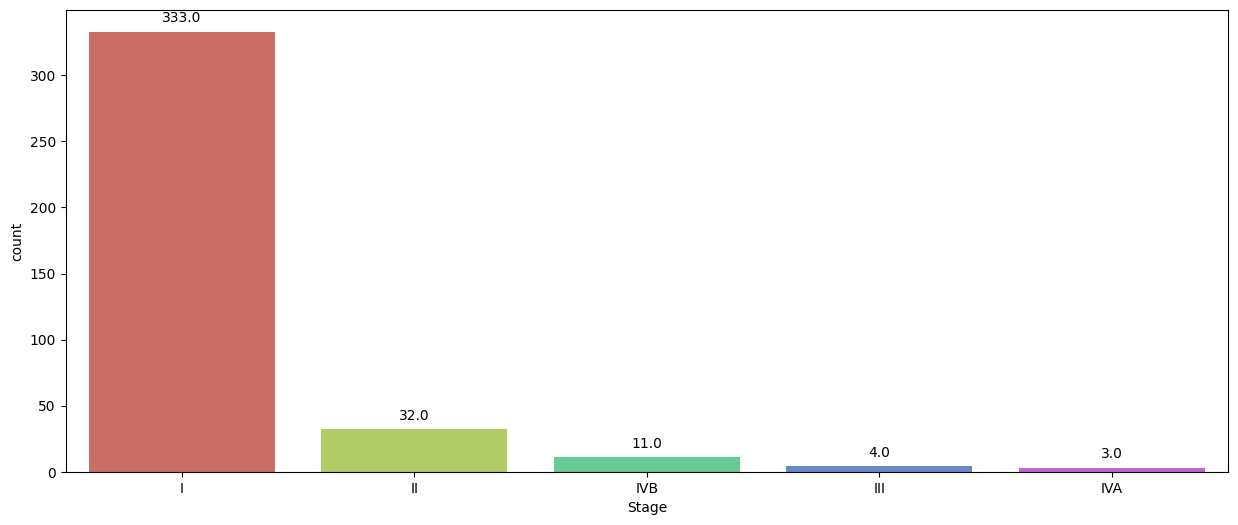

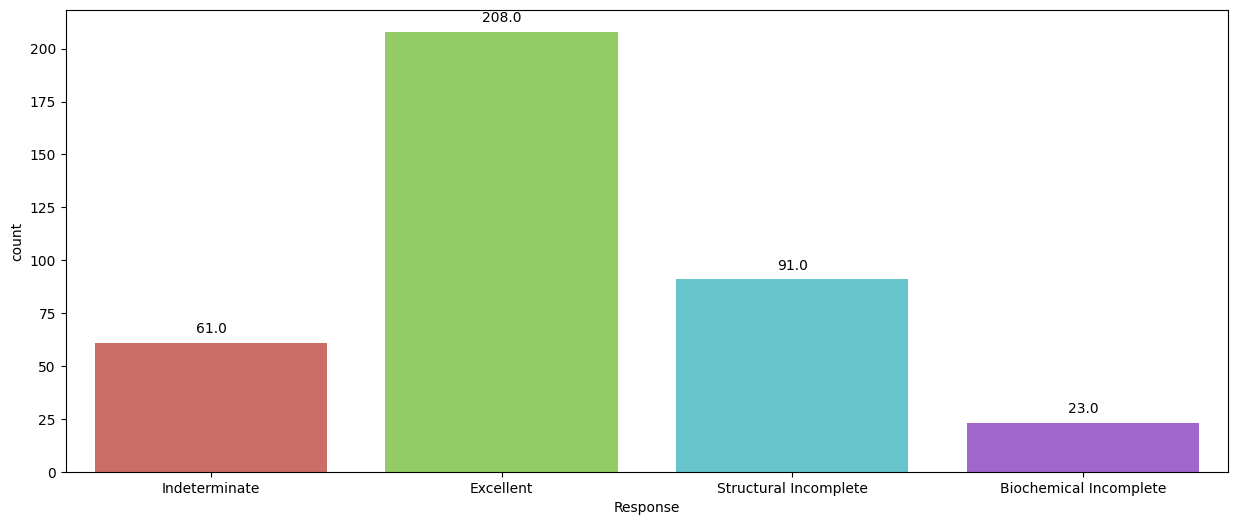

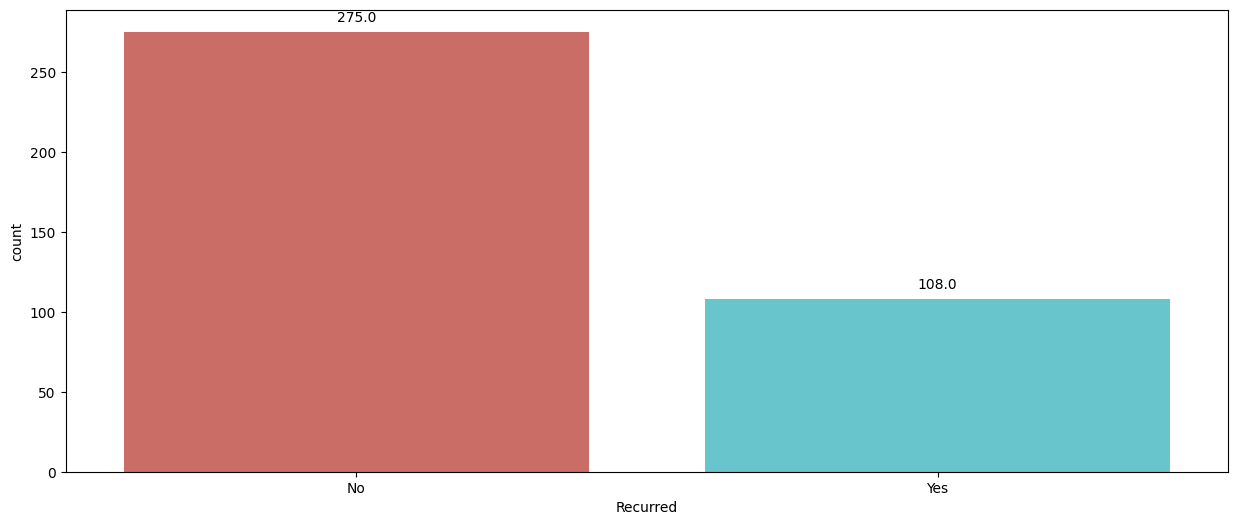

In [ ]:
for i in categorical:
  plt.figure(figsize=(15,6))
  ax = sns.countplot(x=i,data=df,palette='hls')
  for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
    xy=(p.get_x() + p.get_width() / 2., height),
    xytext=(0, 10),
    textcoords='offset points',
    ha='center', va='center')
  plt.show()

In [ ]:
import plotly.express as px
for i in categorical:
  counts = df[i].value_counts()
  fig = px.pie(counts,values=counts.values,names=counts.index,title=f'Distribution of {i}')
  fig.show()

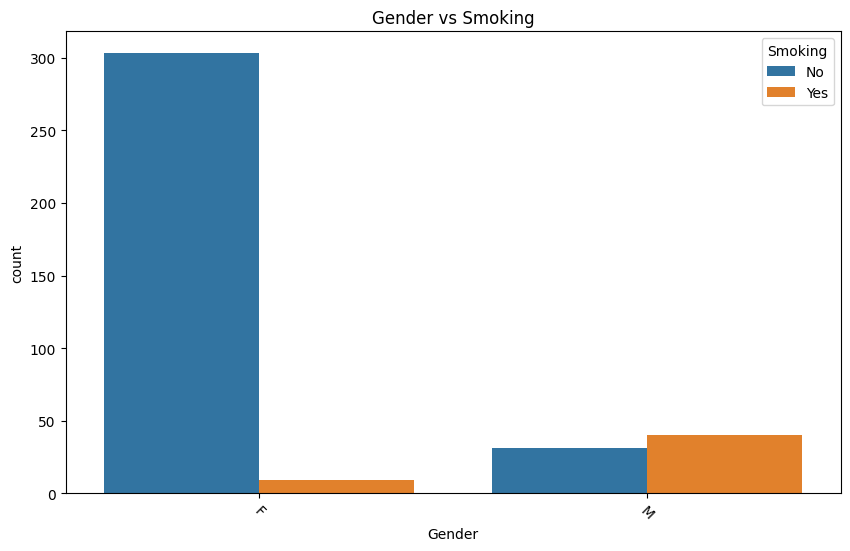

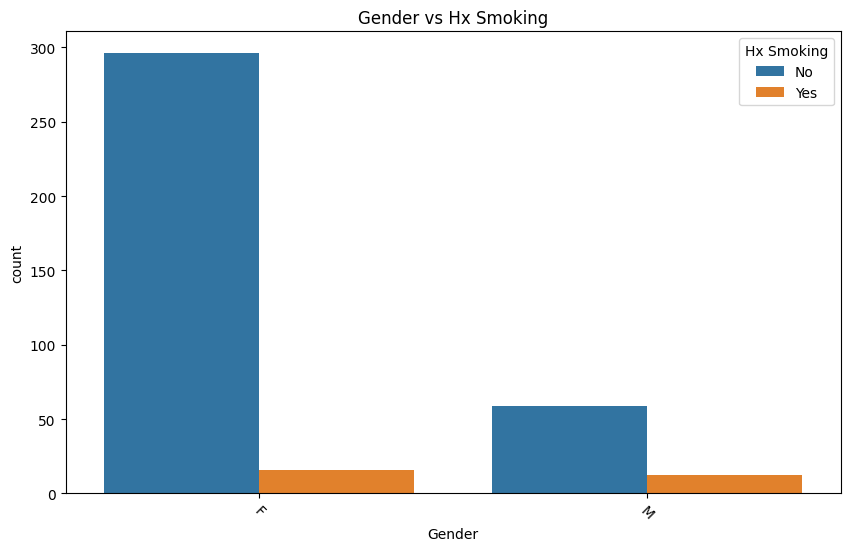

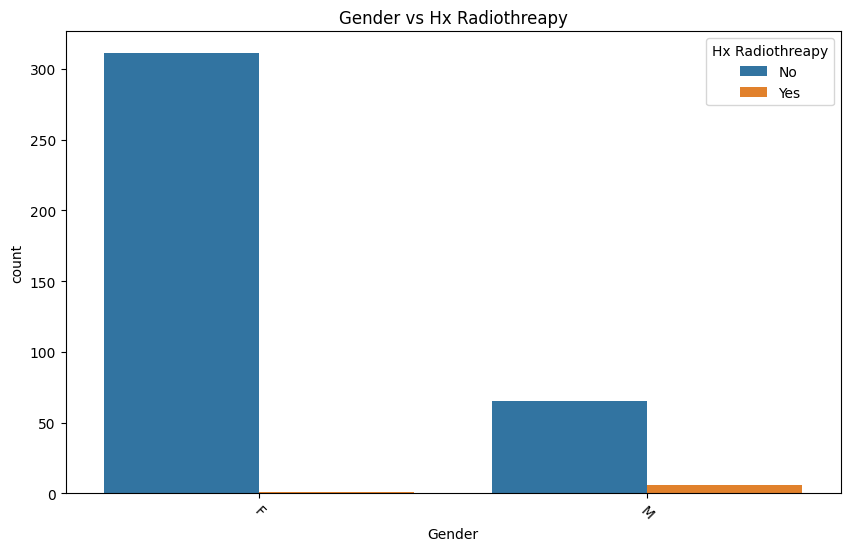

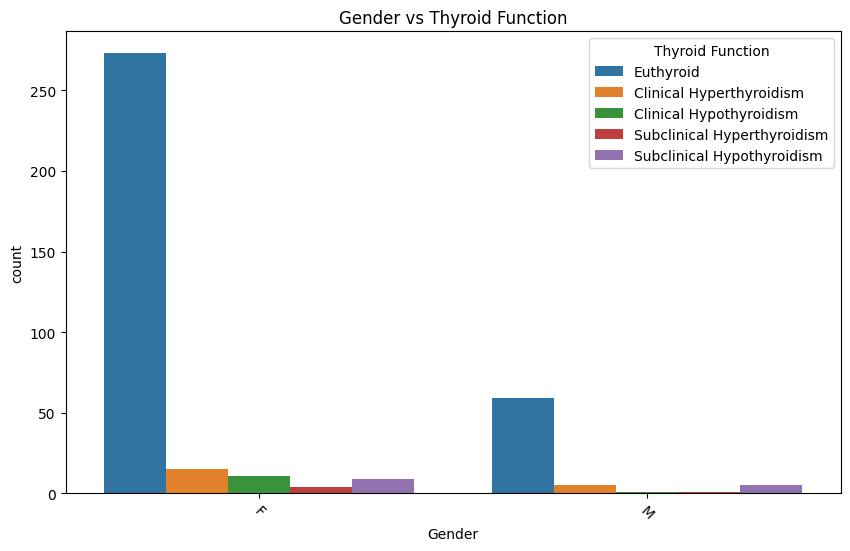

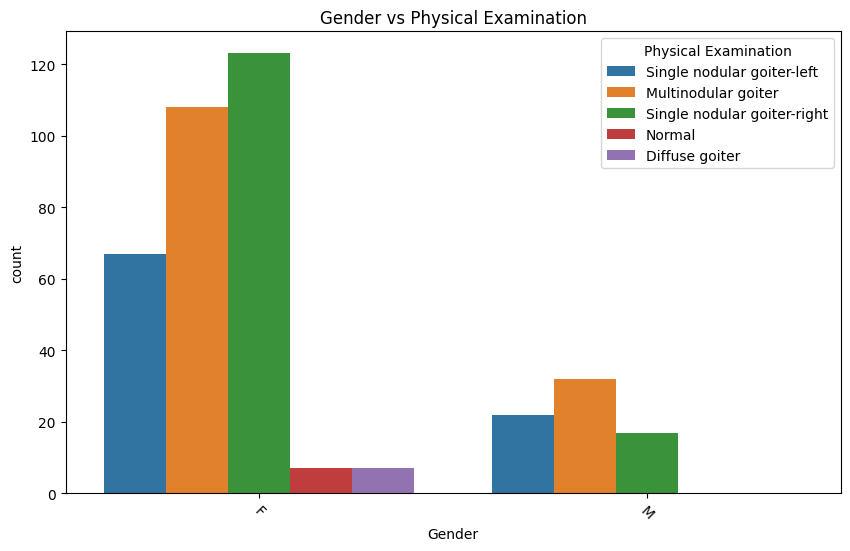

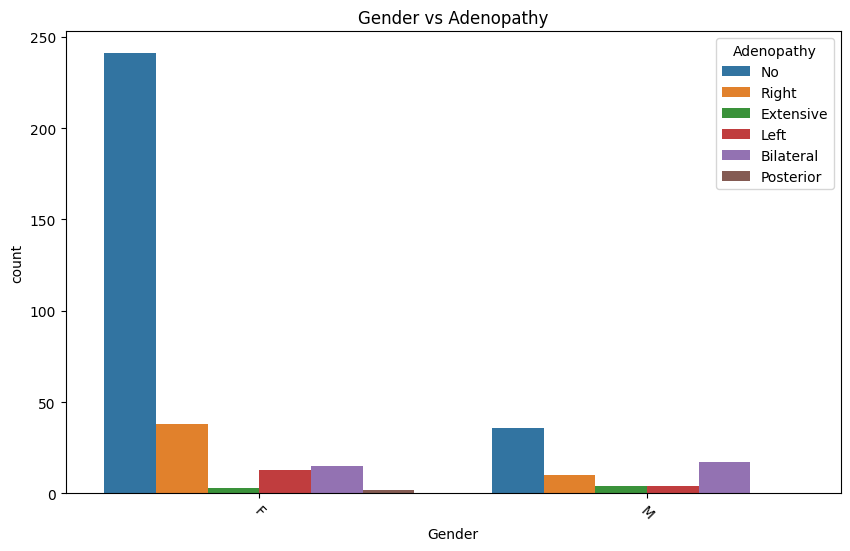

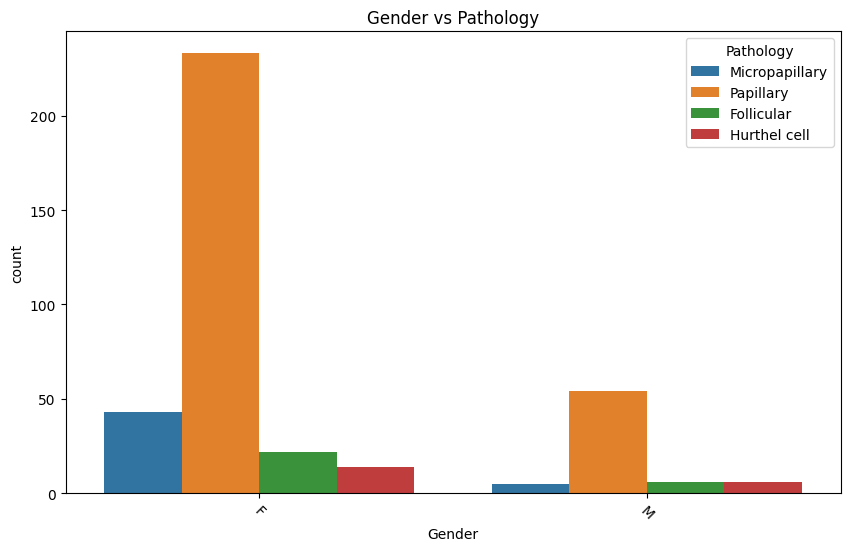

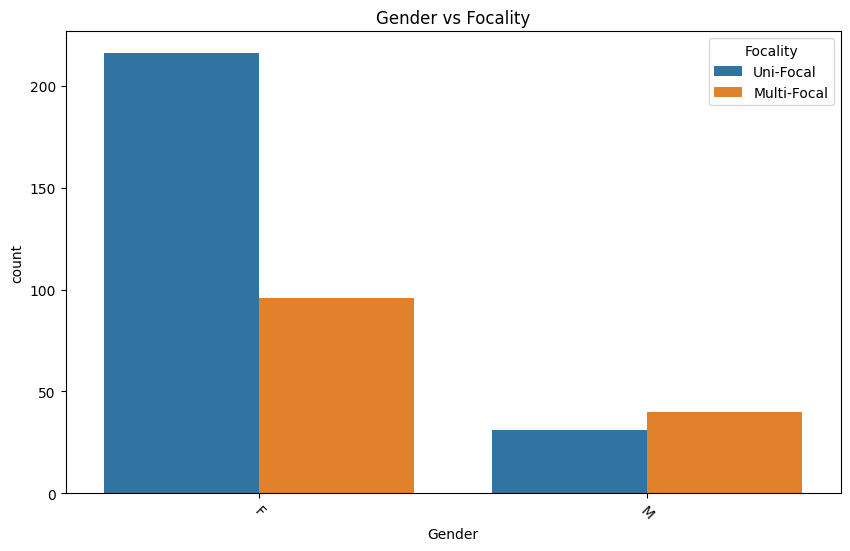

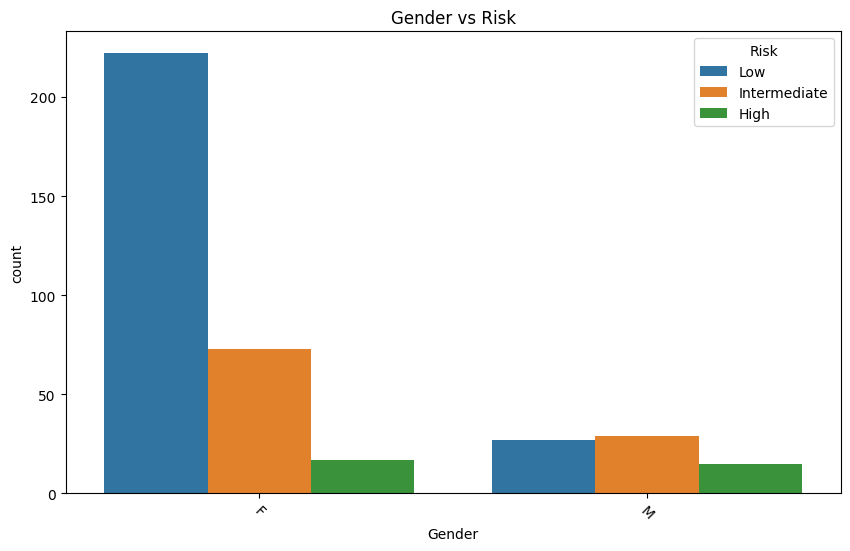

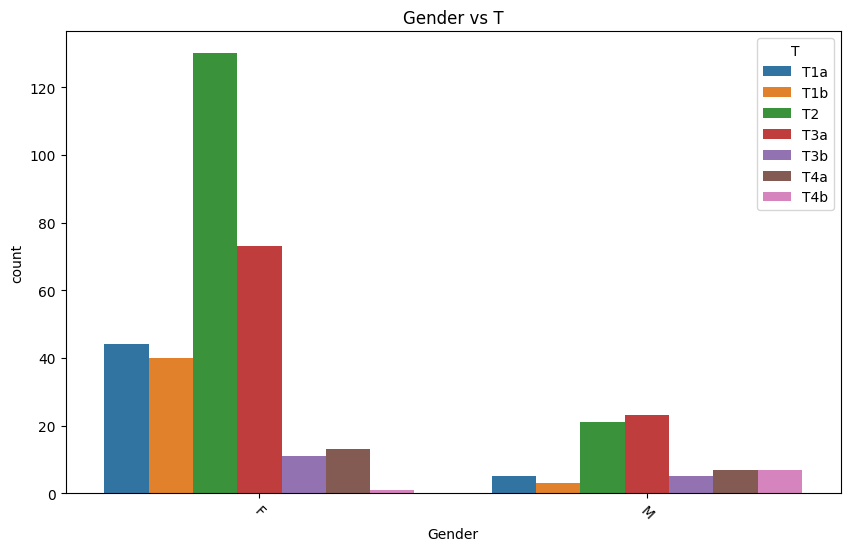

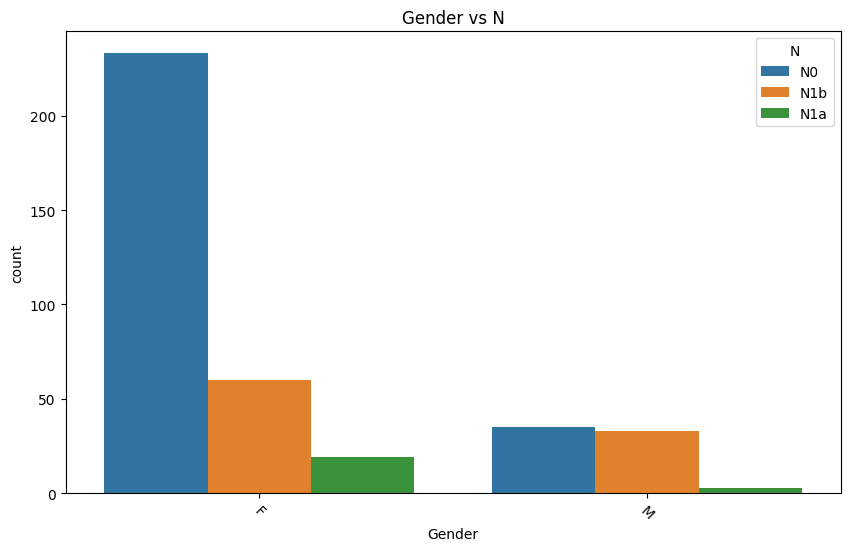

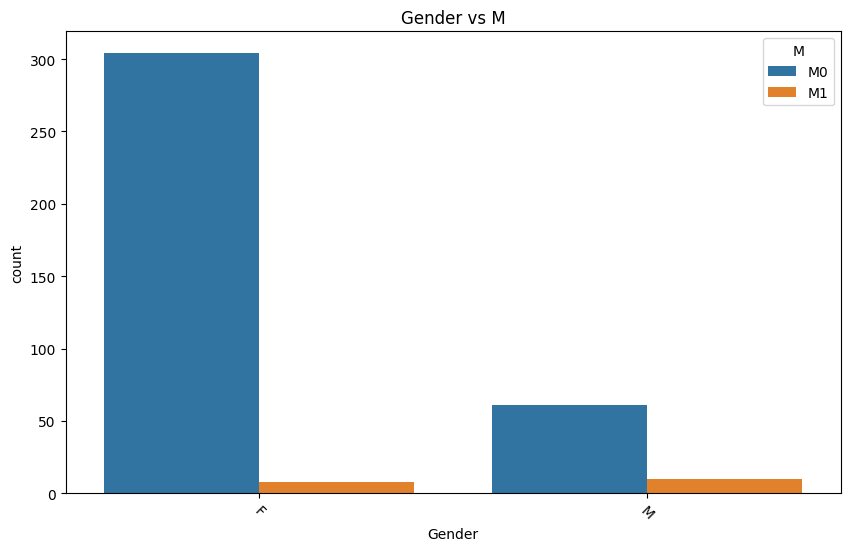

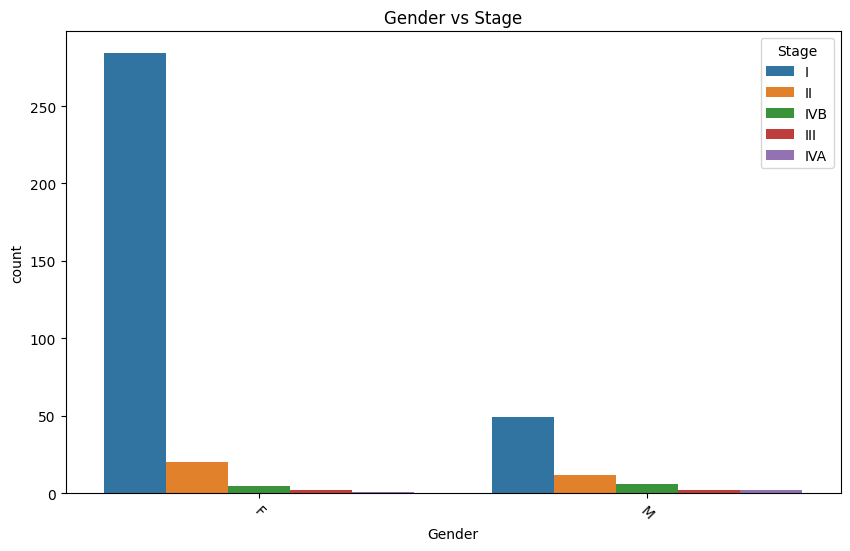

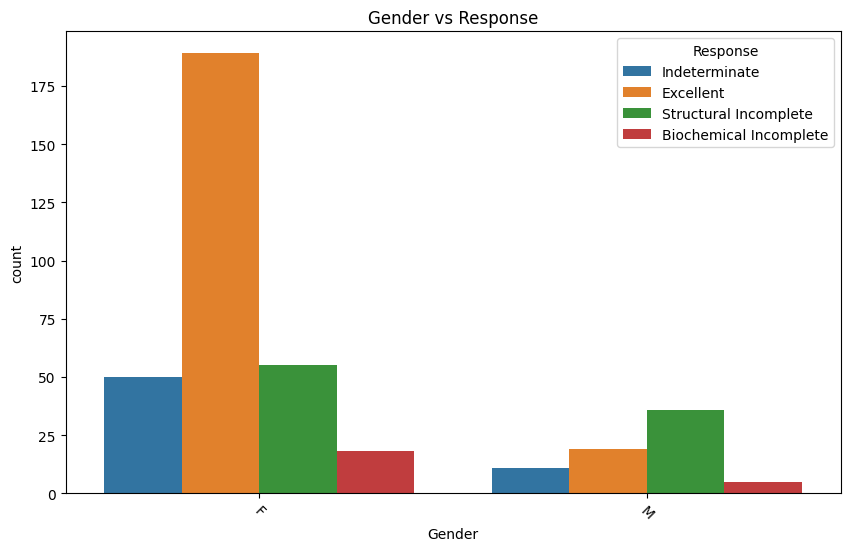

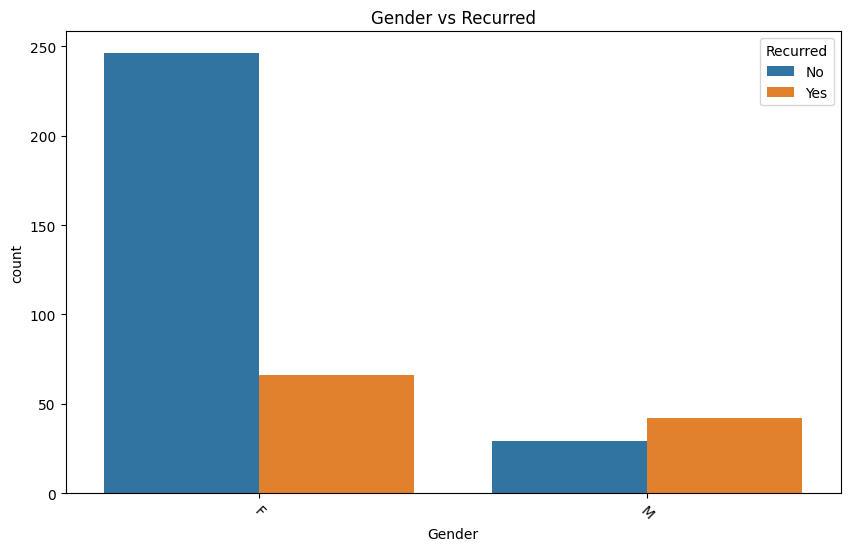

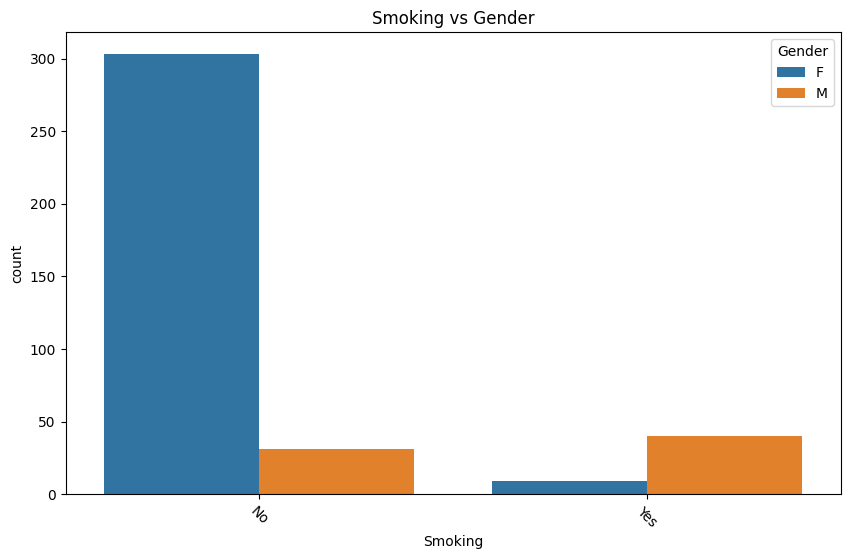

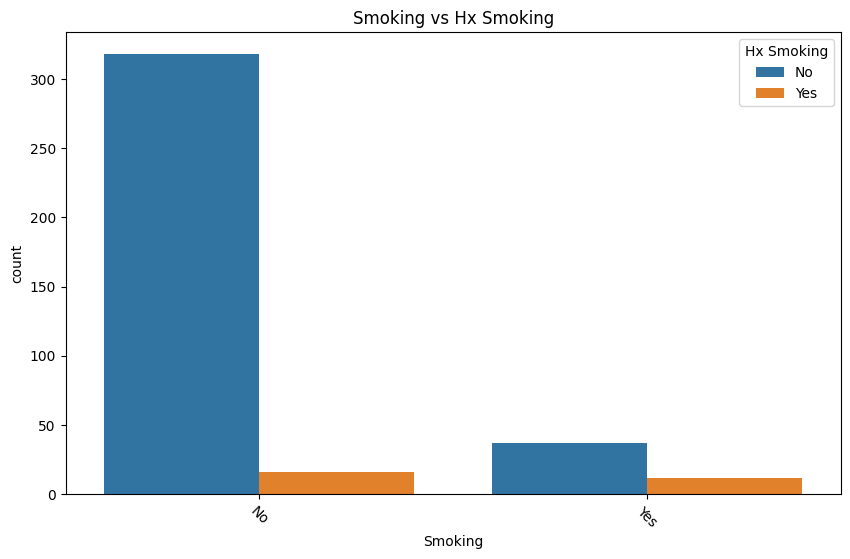

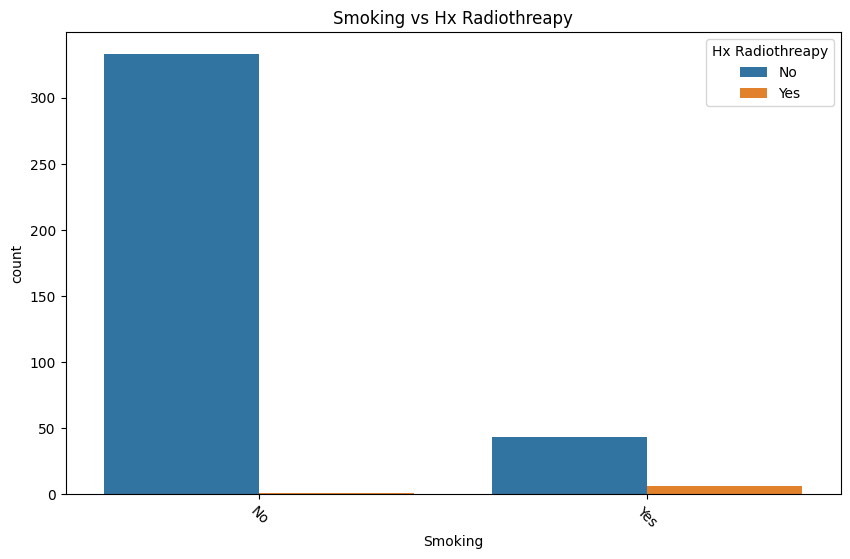

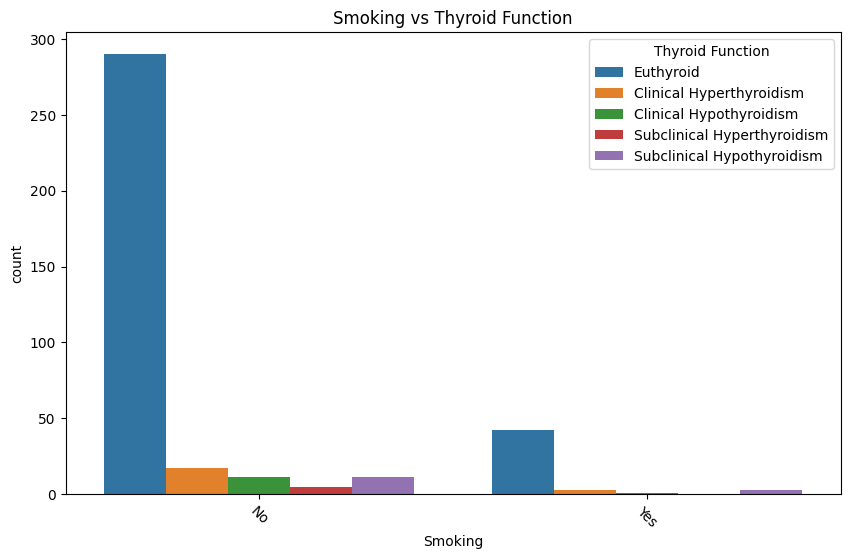

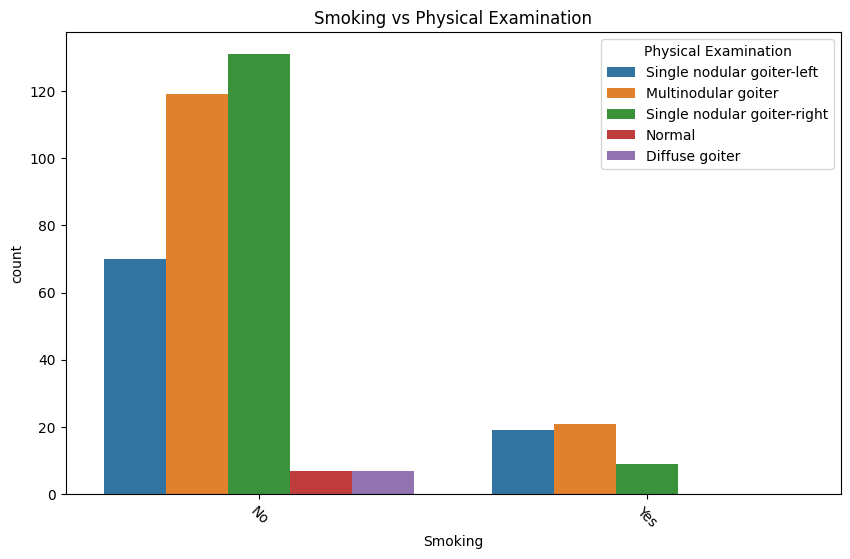

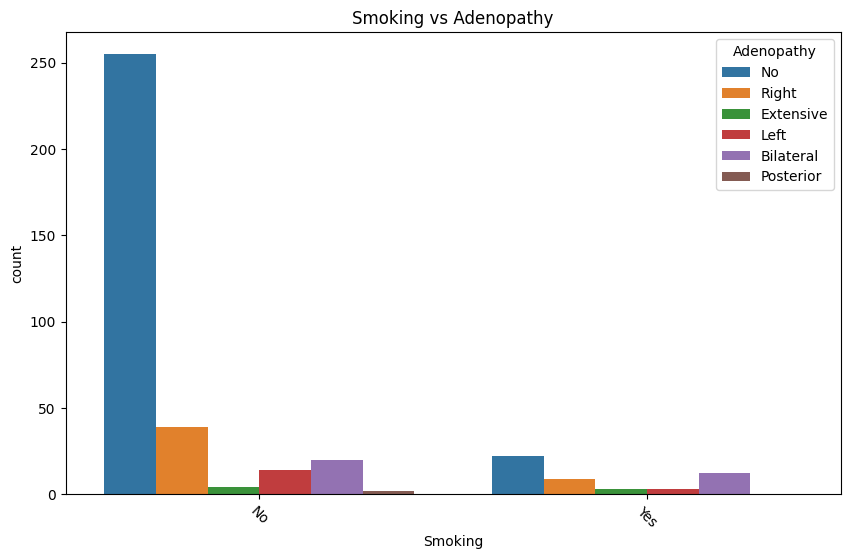

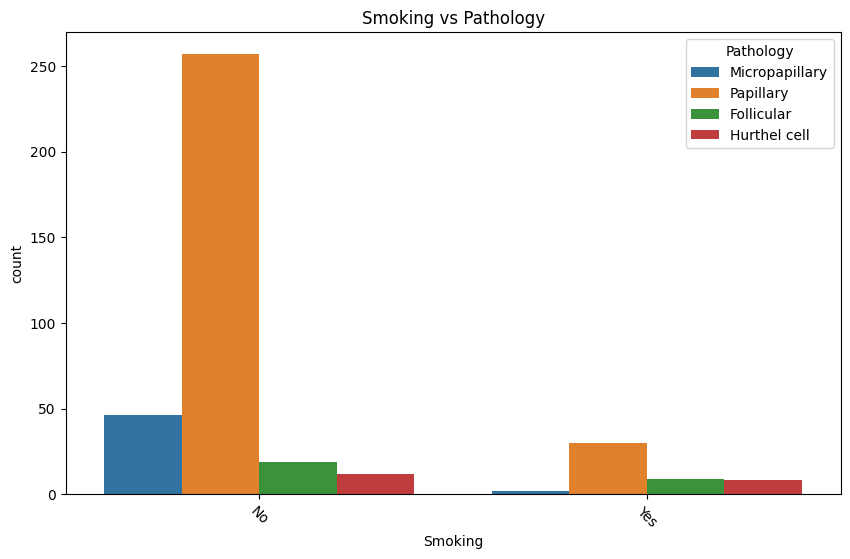

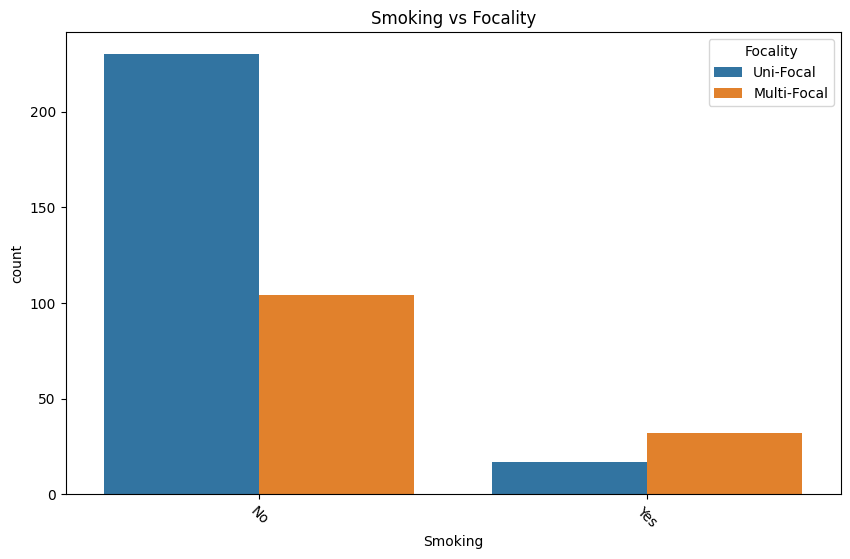

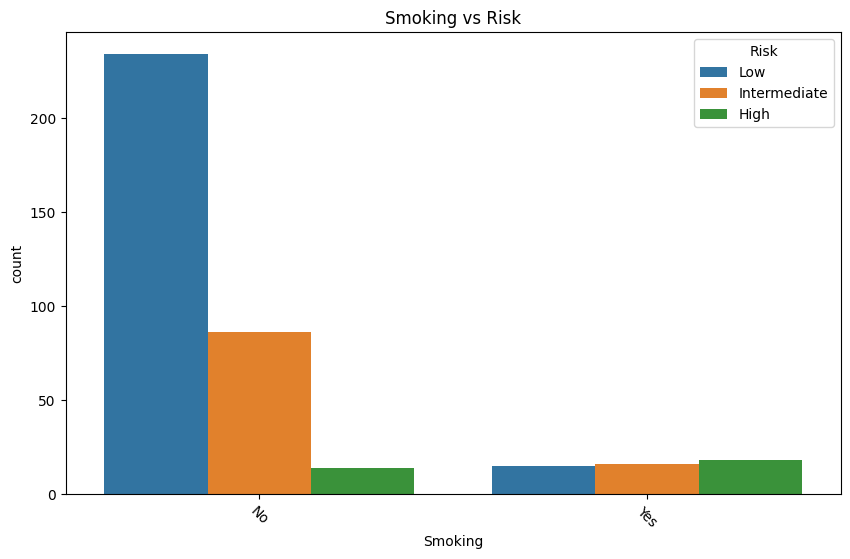

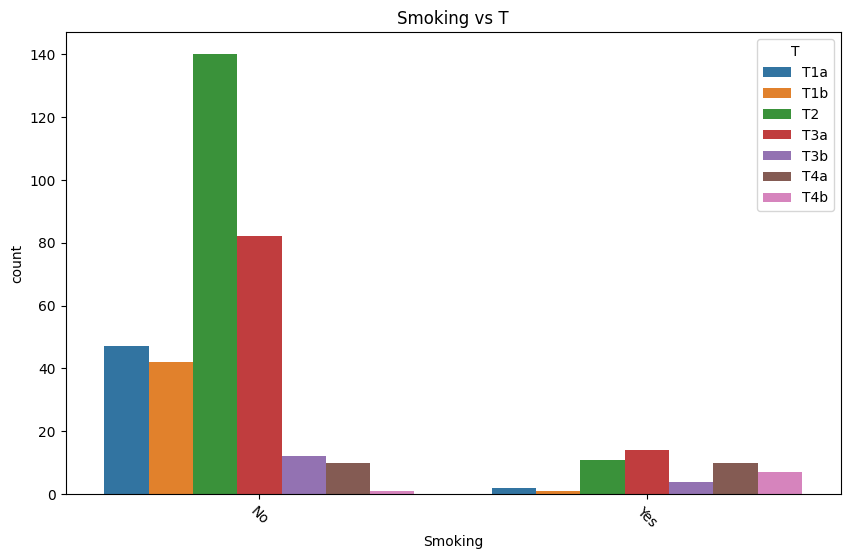

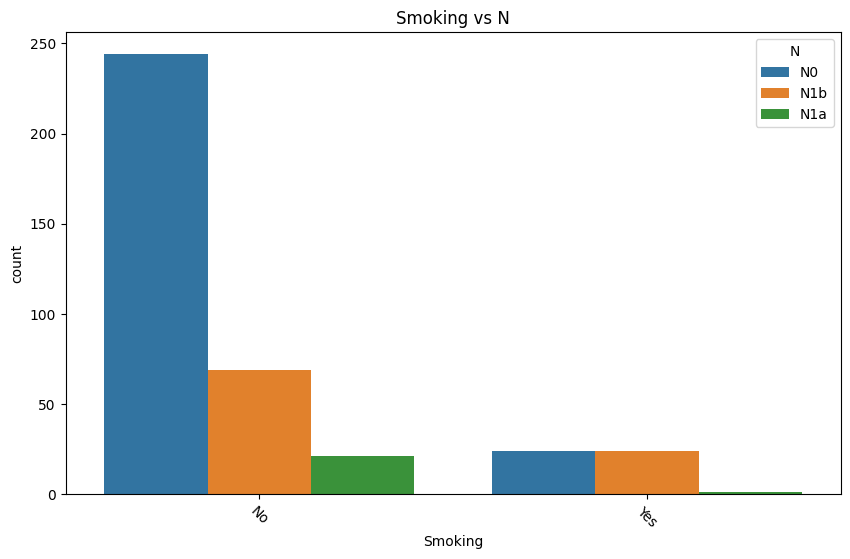

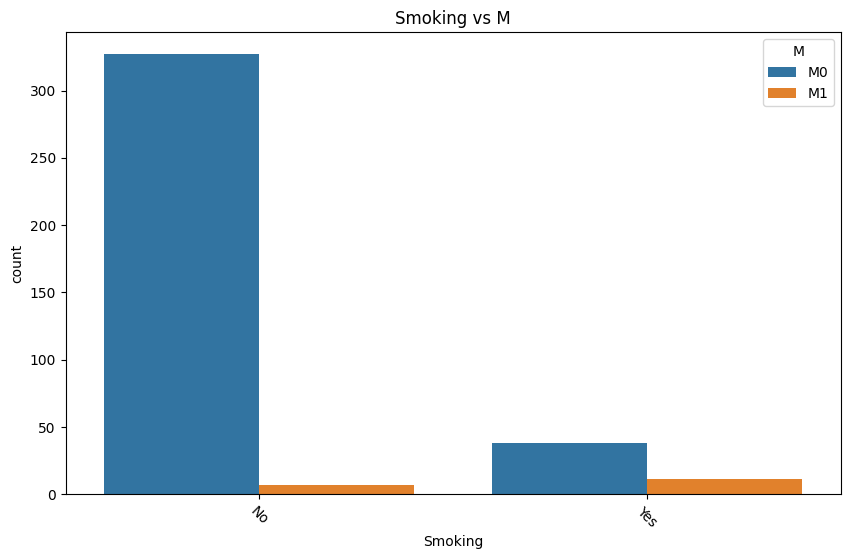

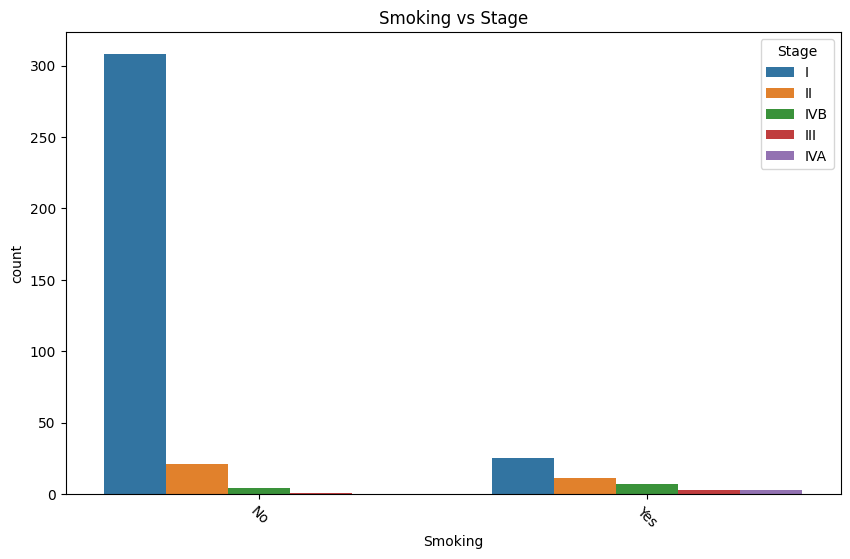

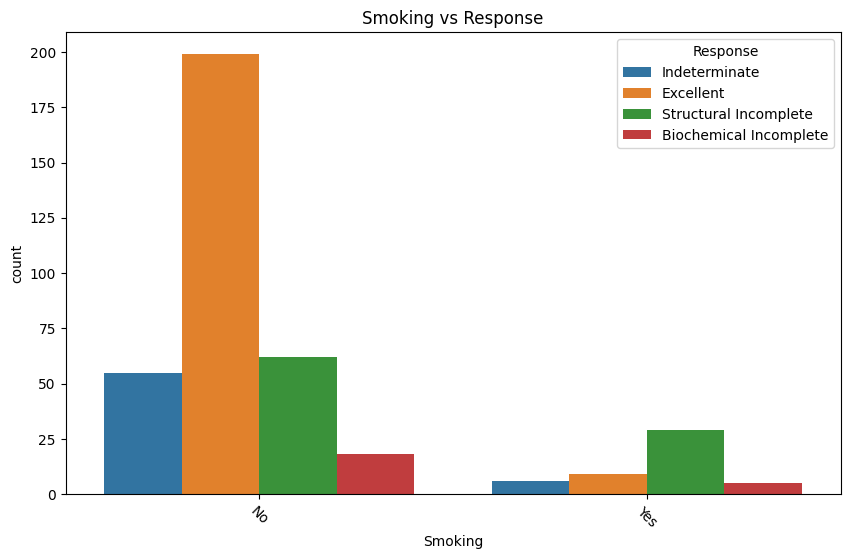

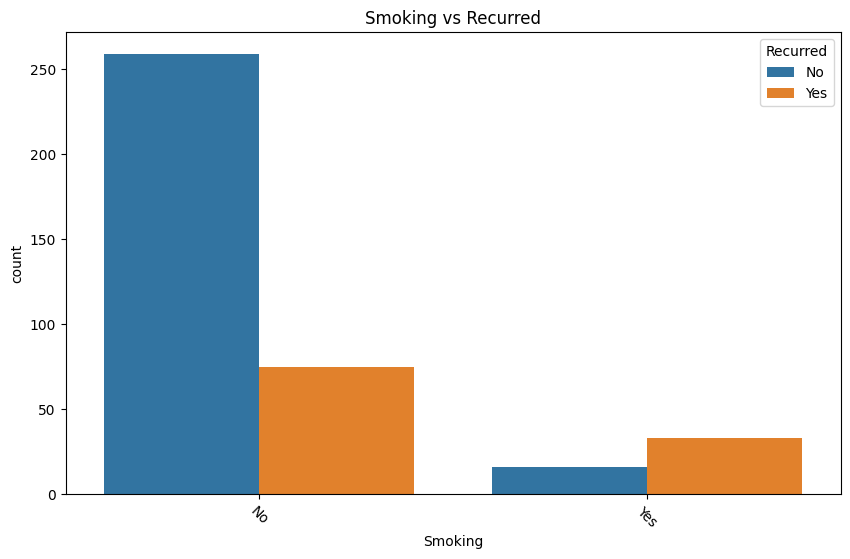

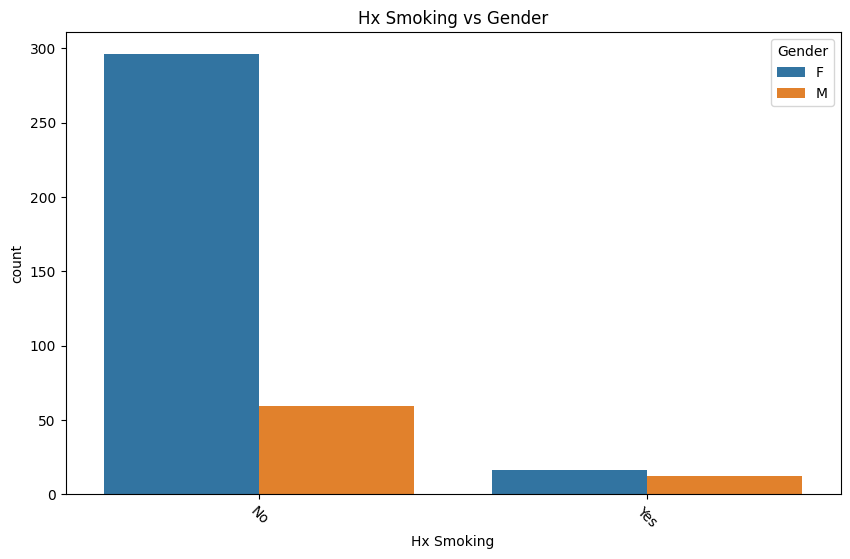

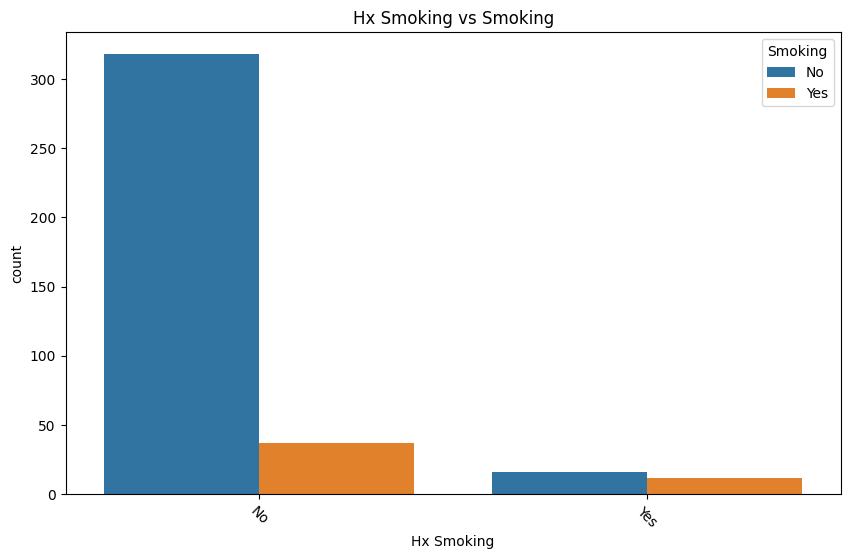

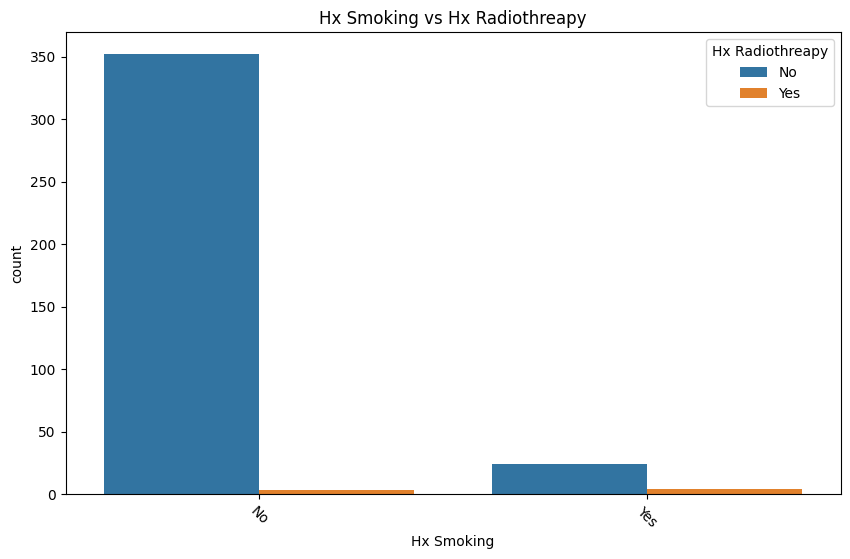

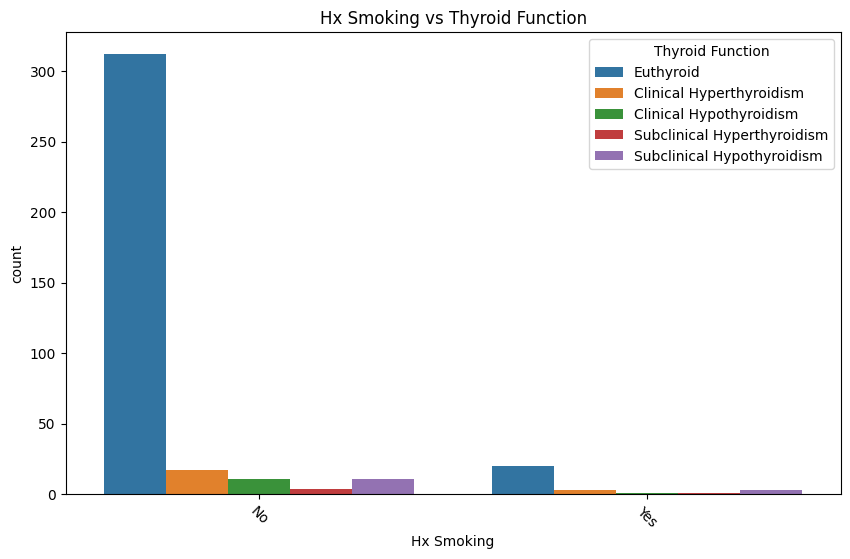

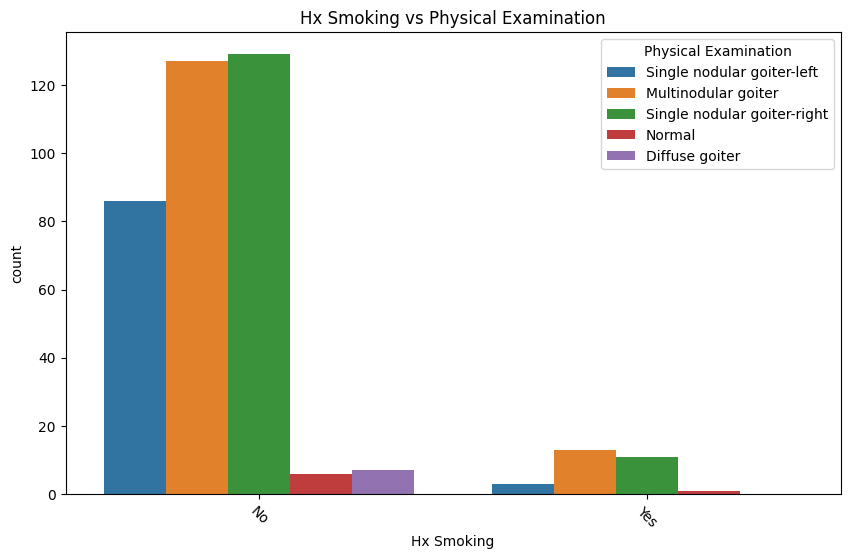

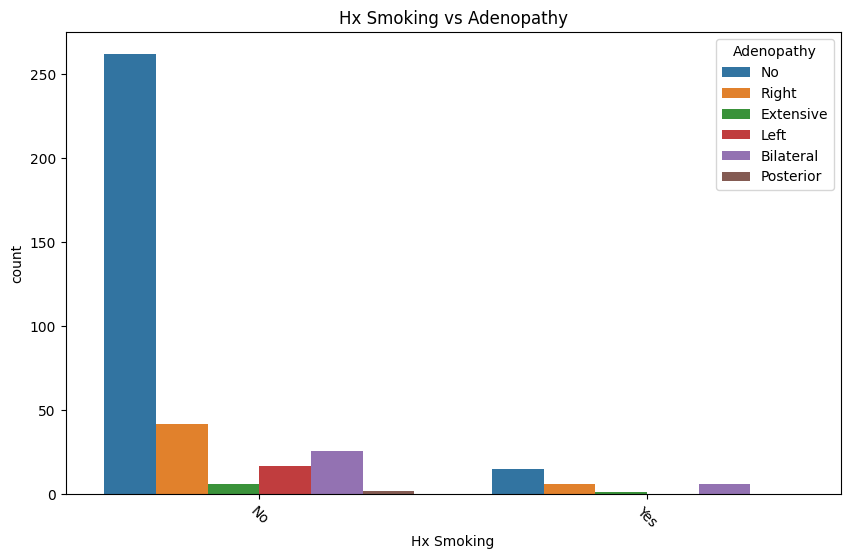

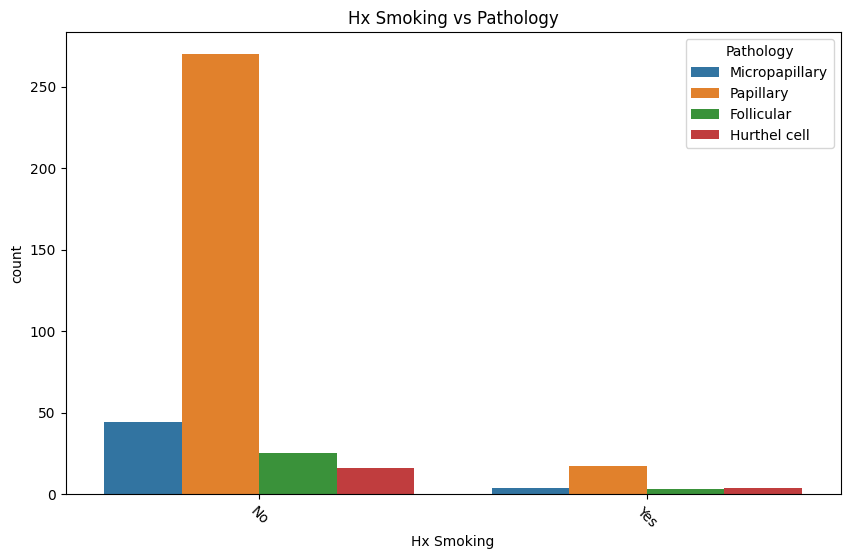

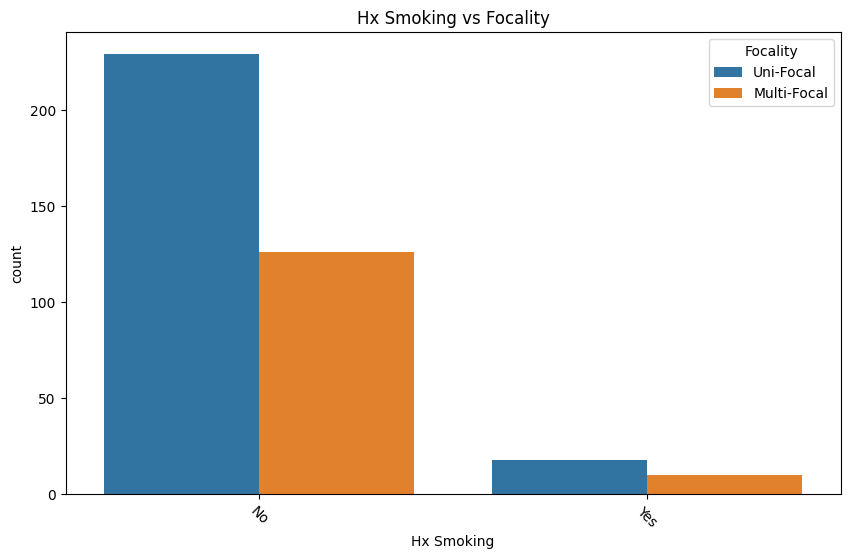

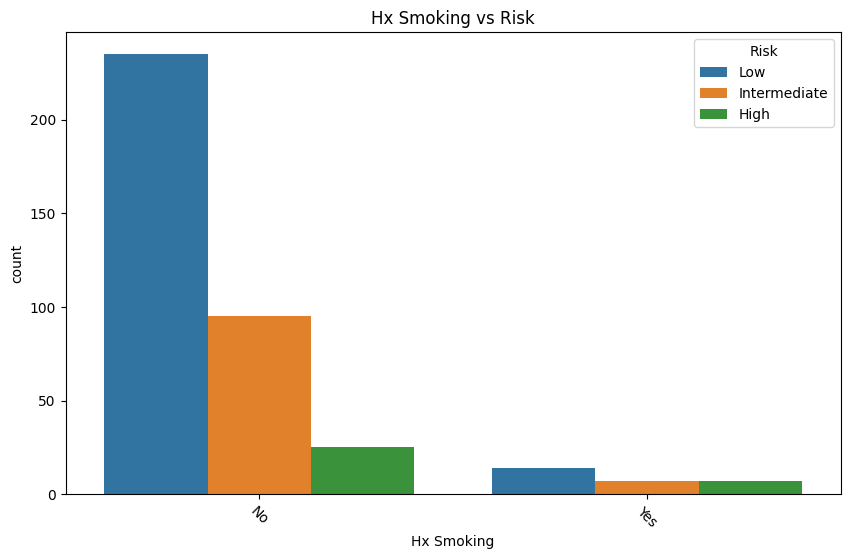

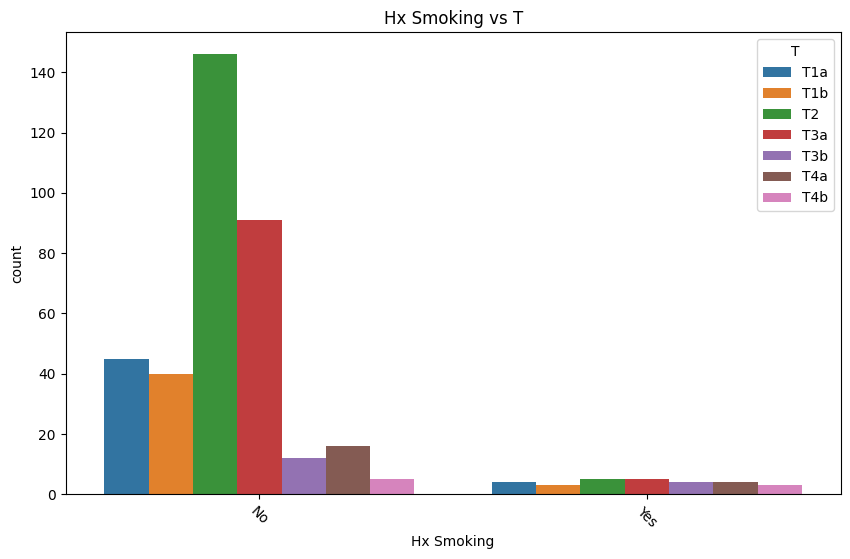

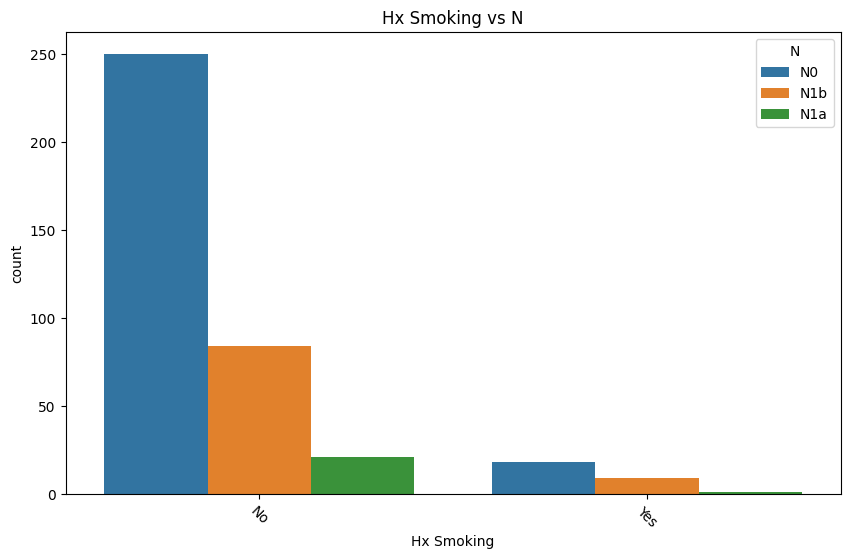

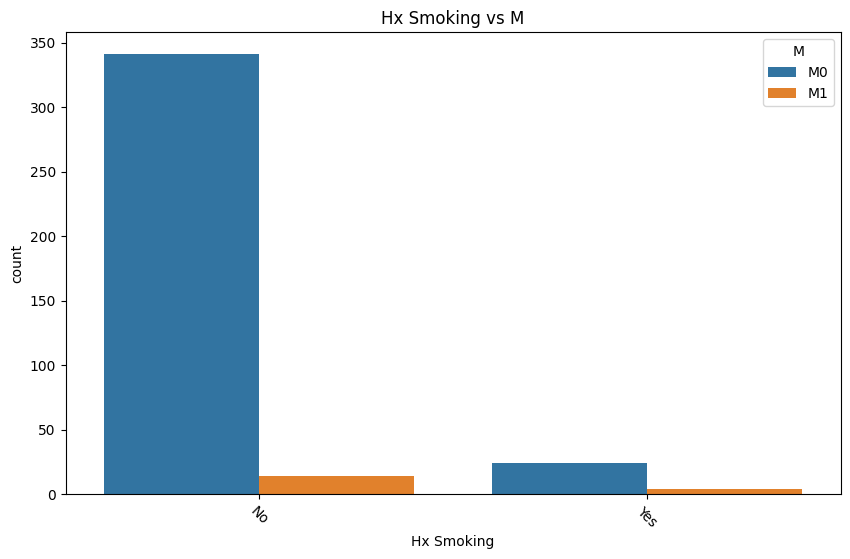

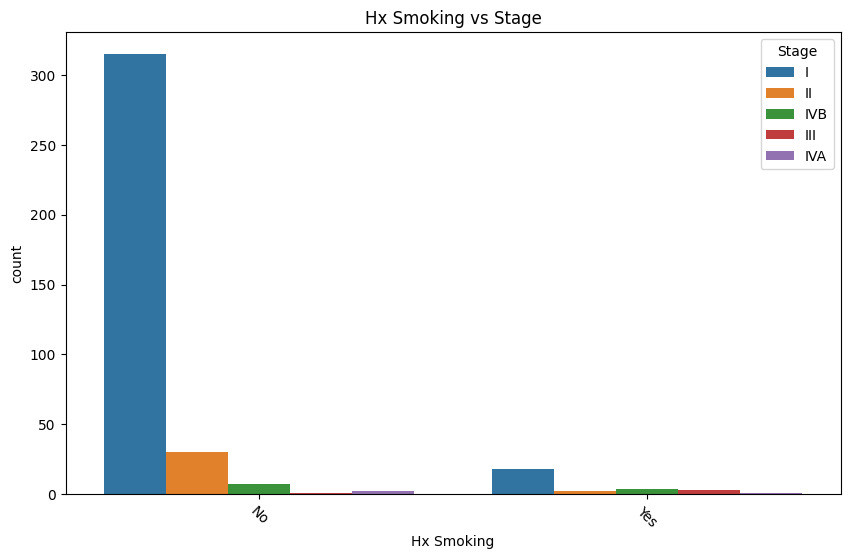

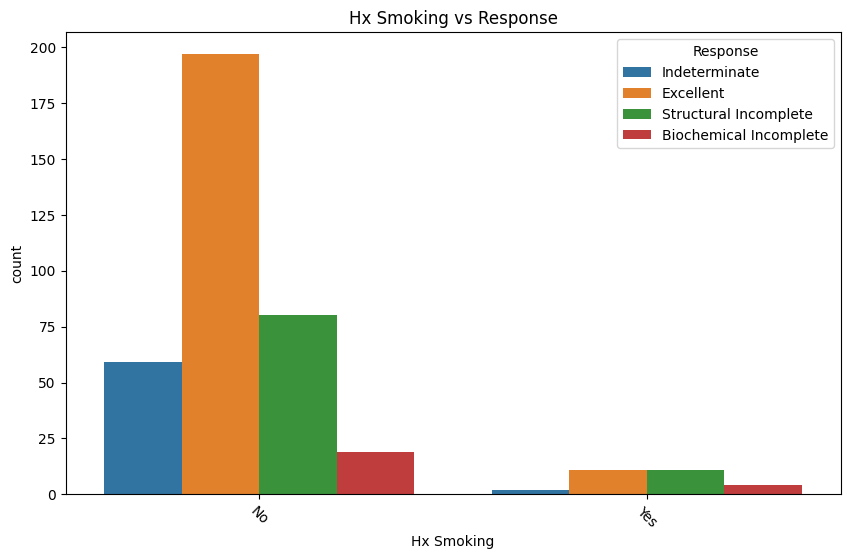

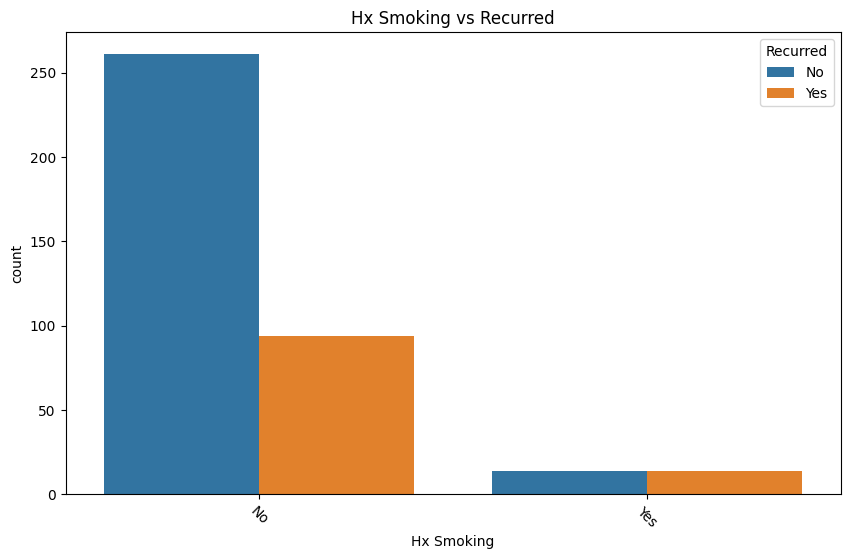

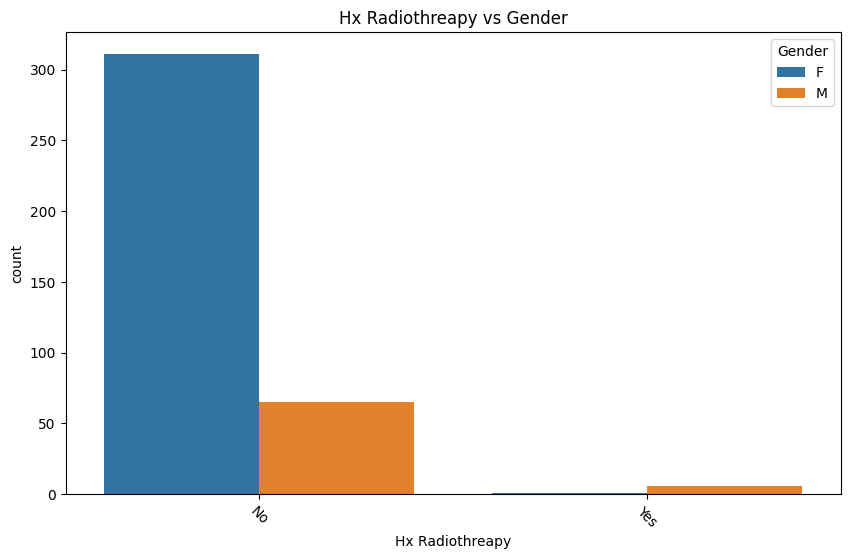

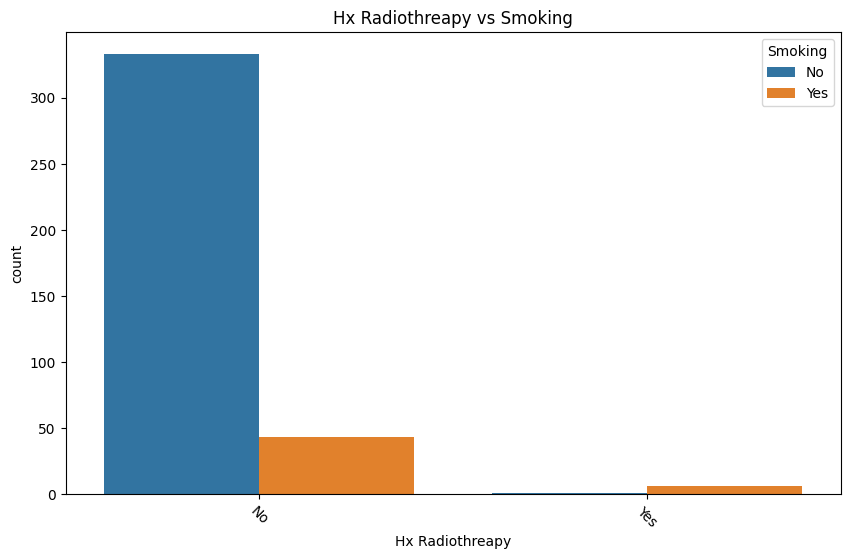

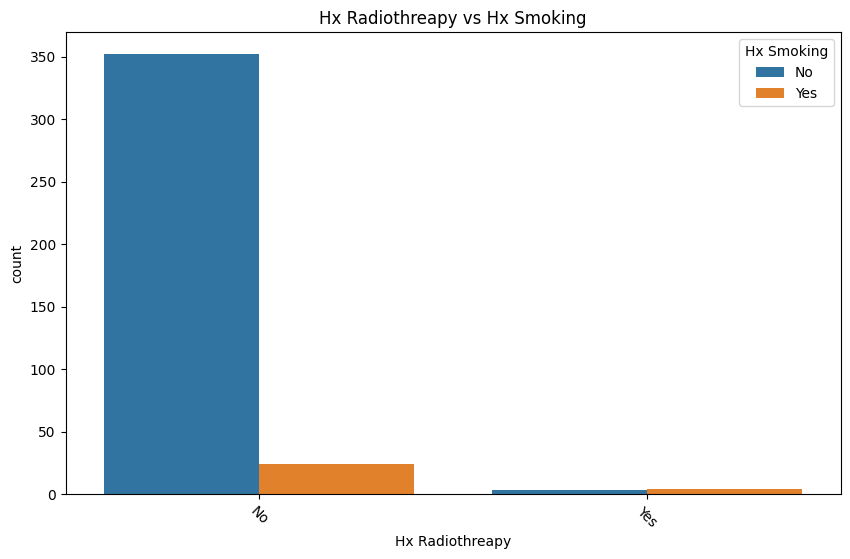

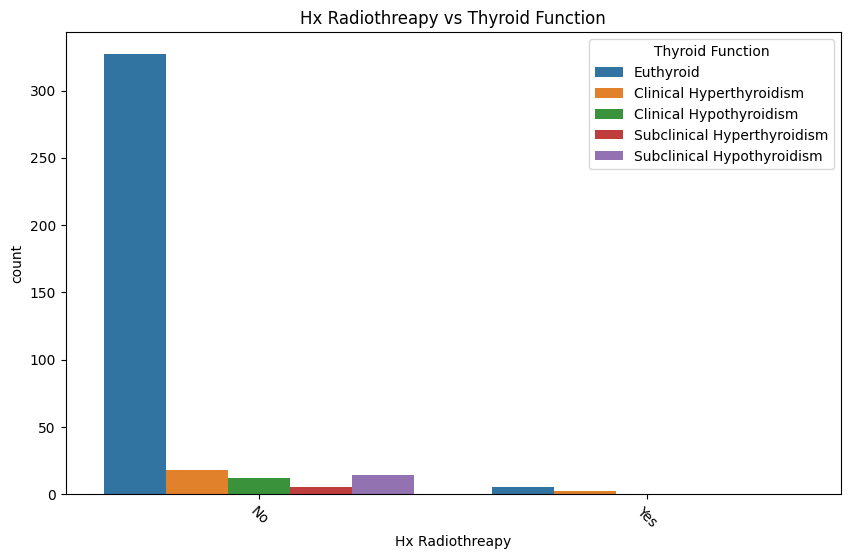

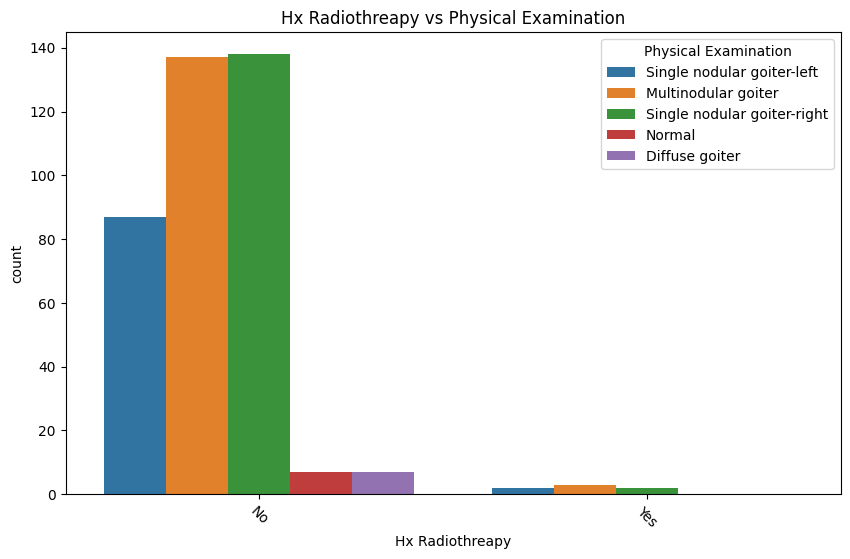

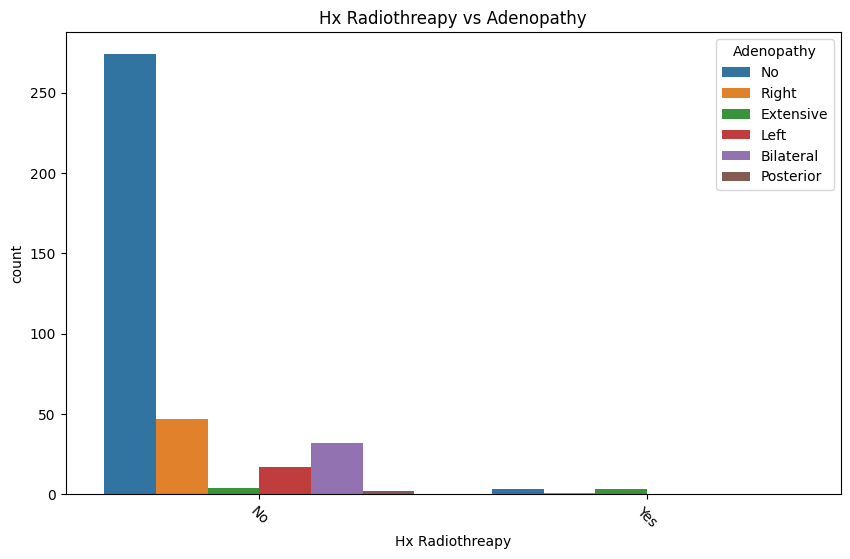

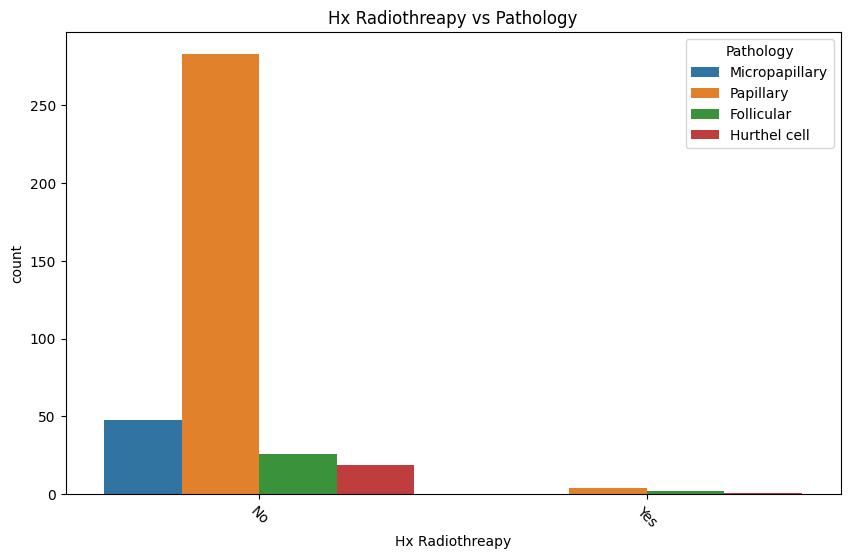

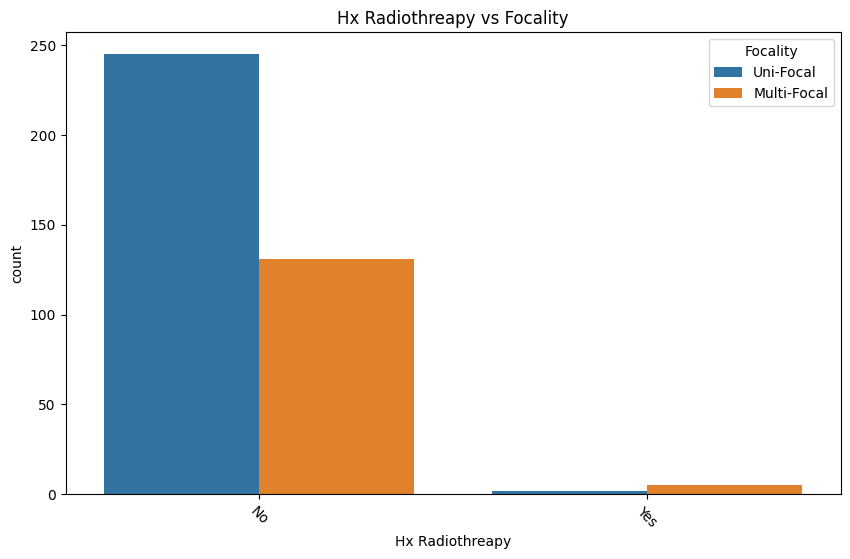

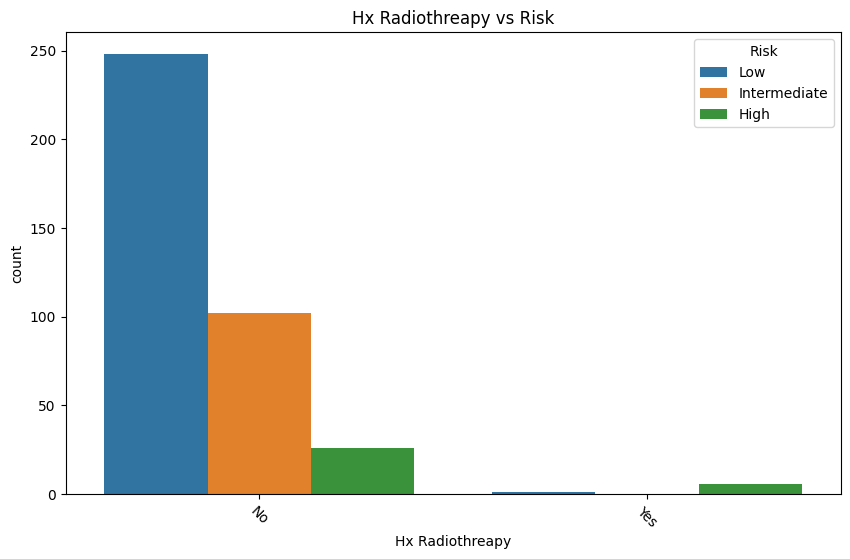

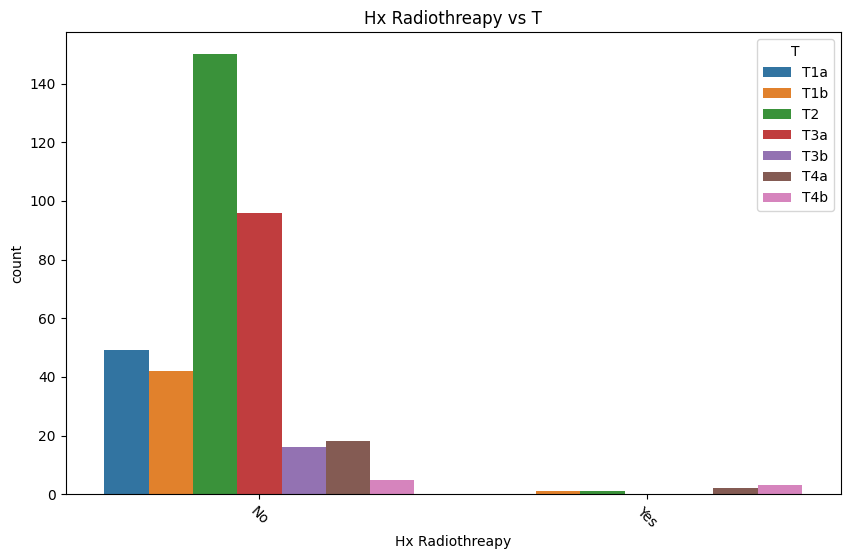

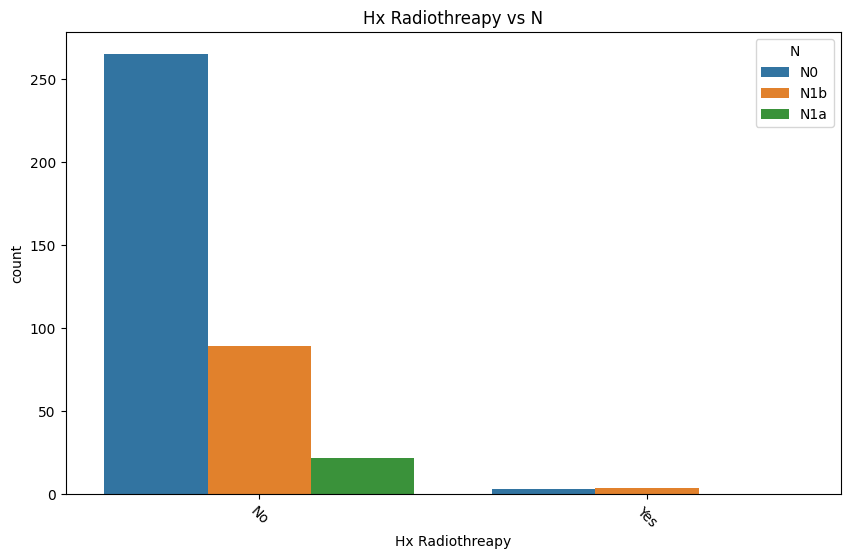

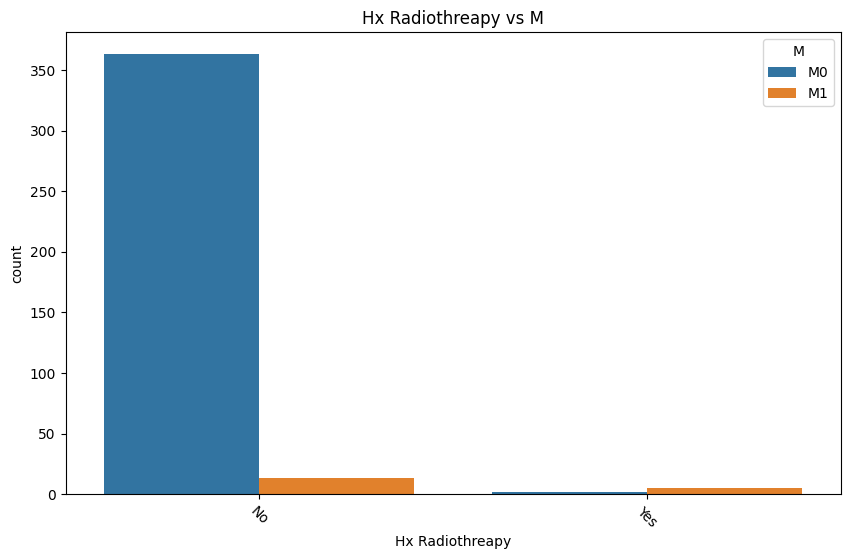

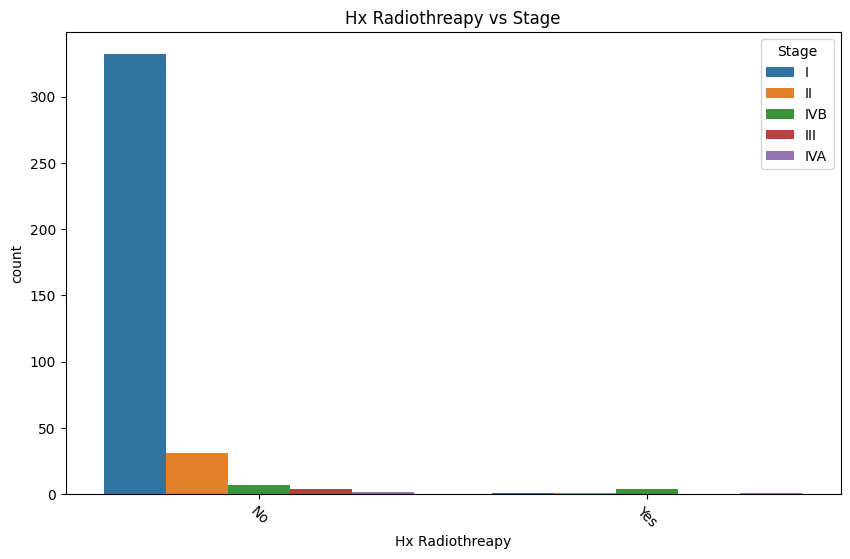

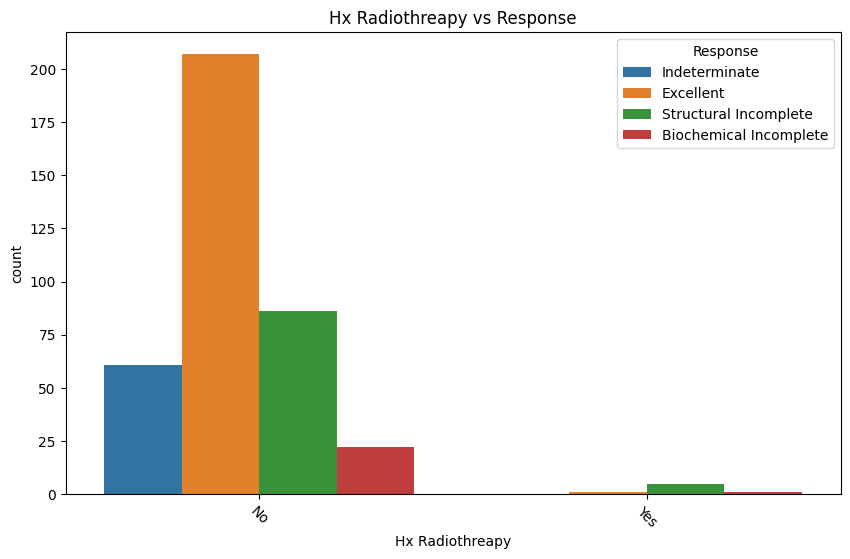

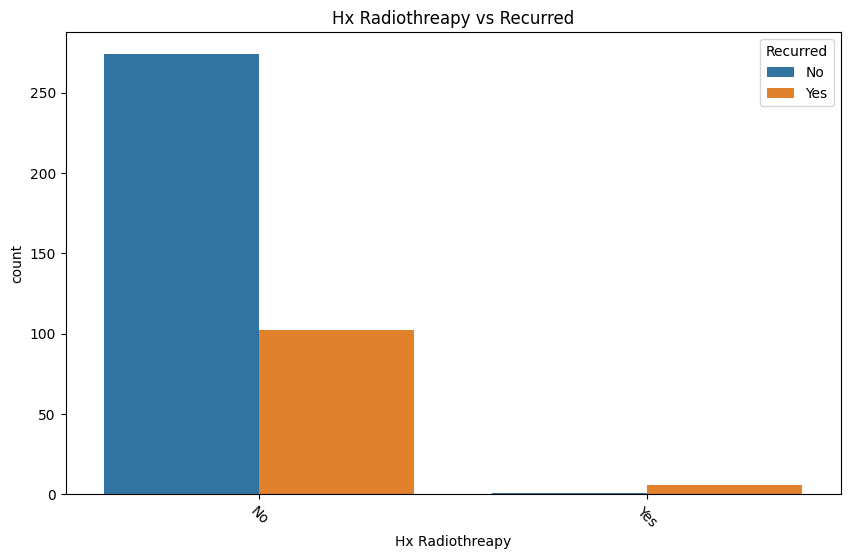

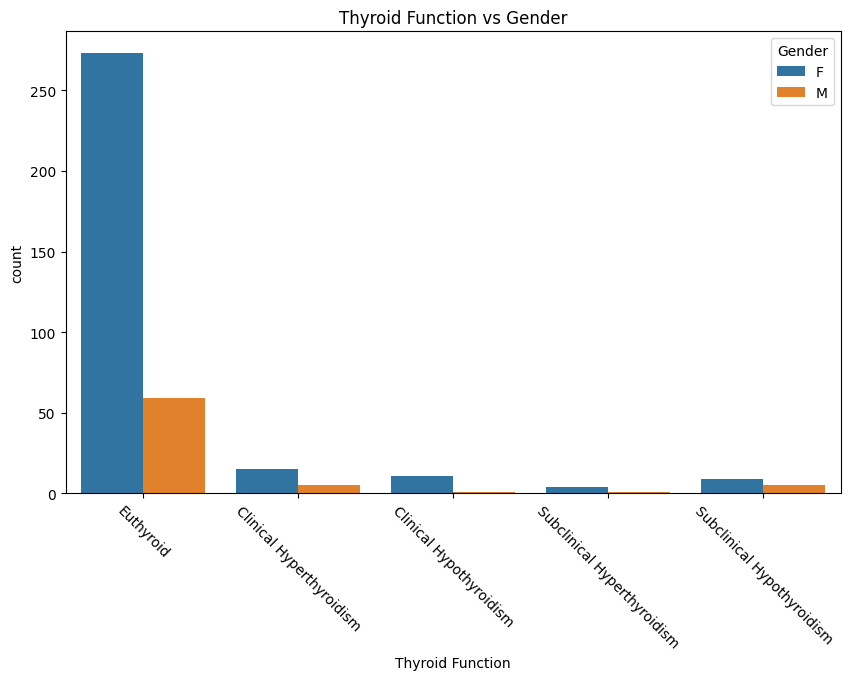

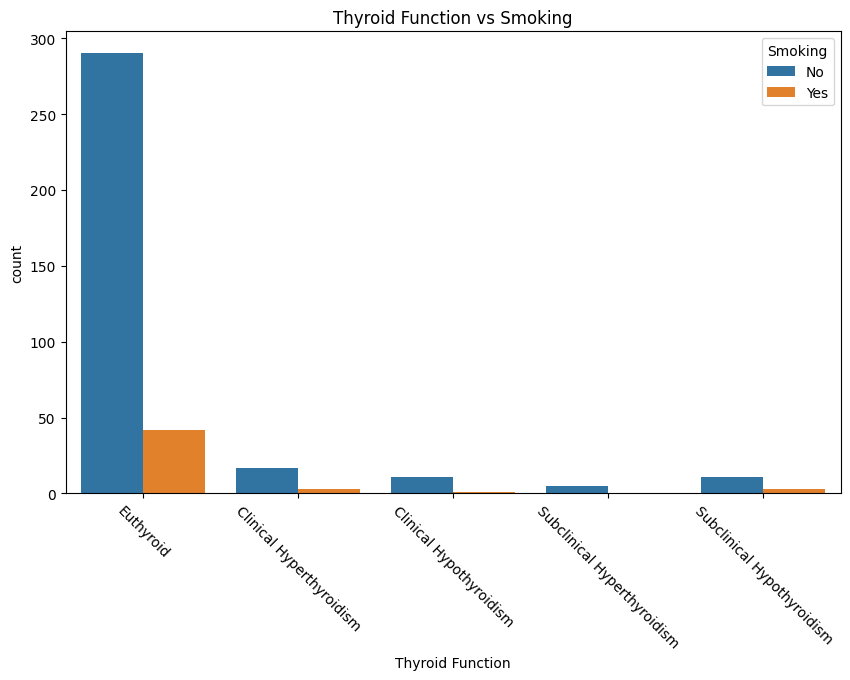

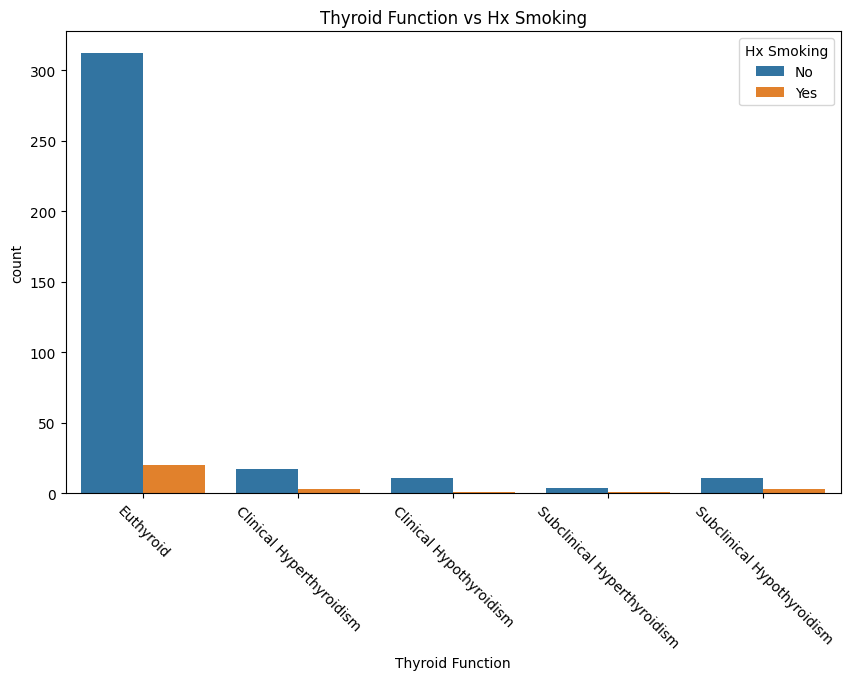

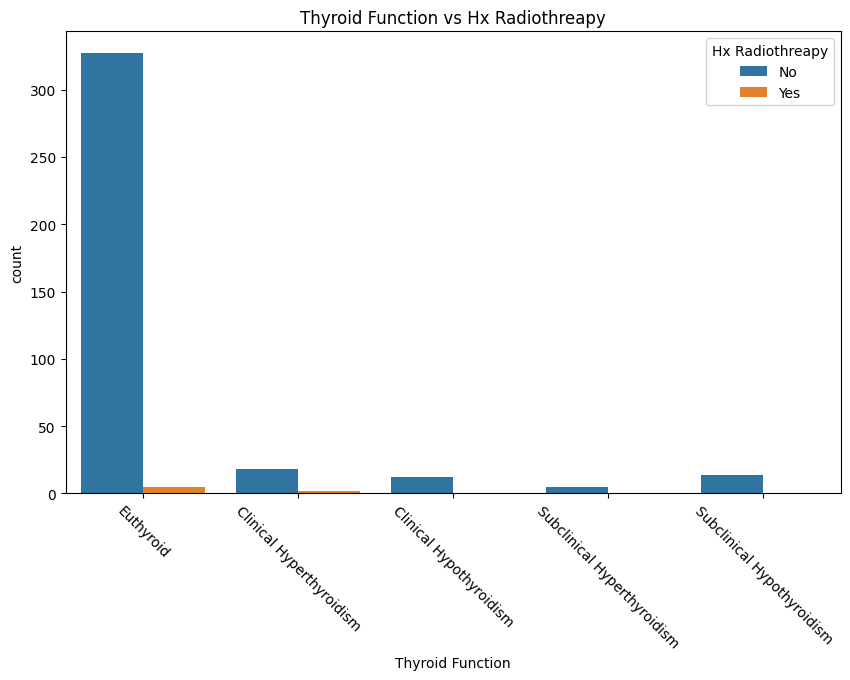

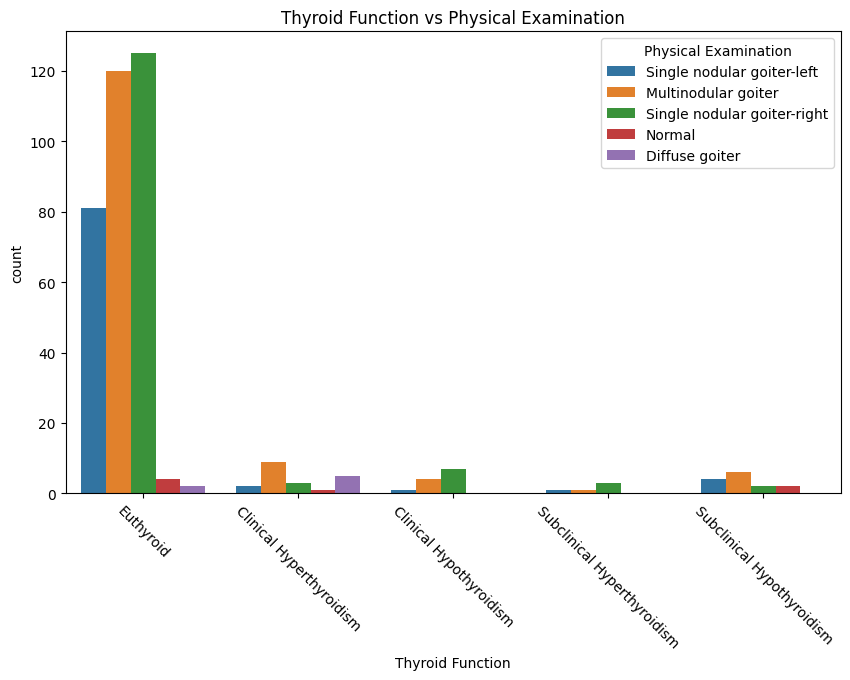

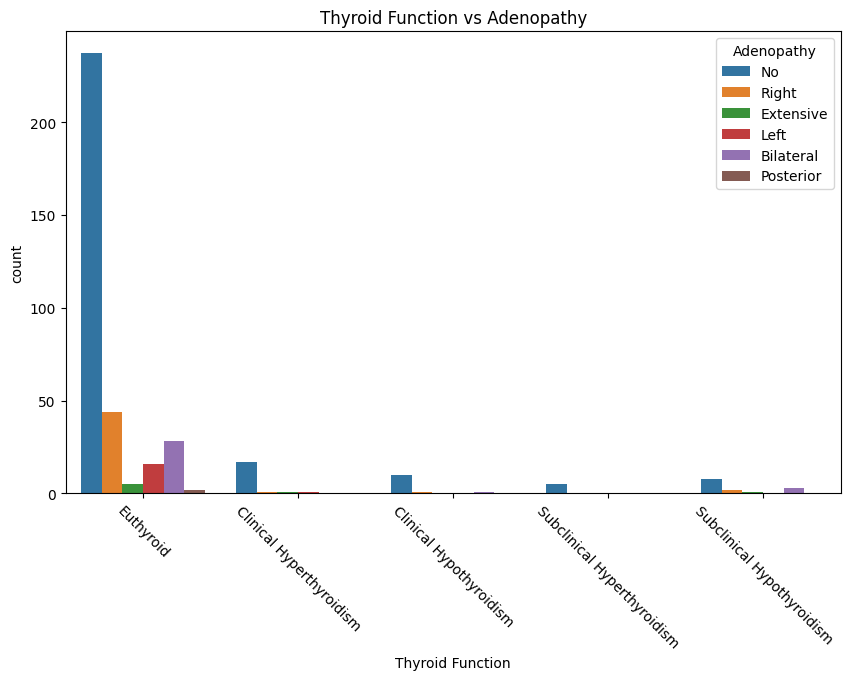

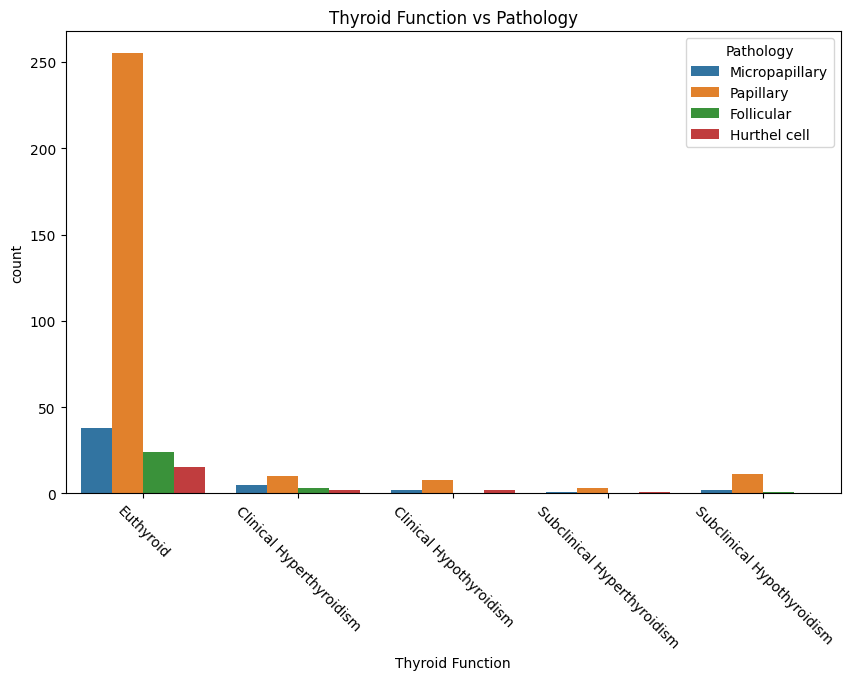

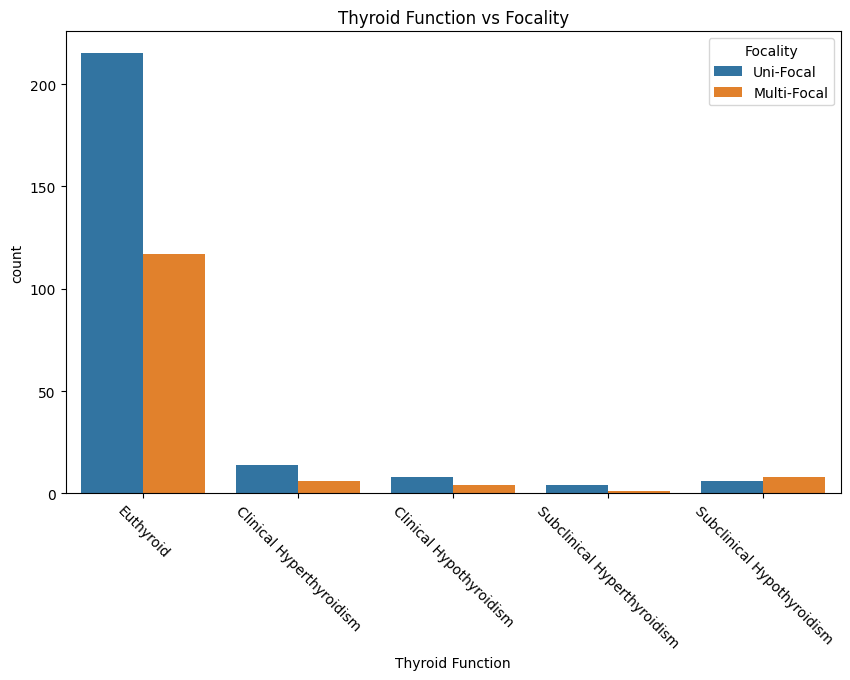

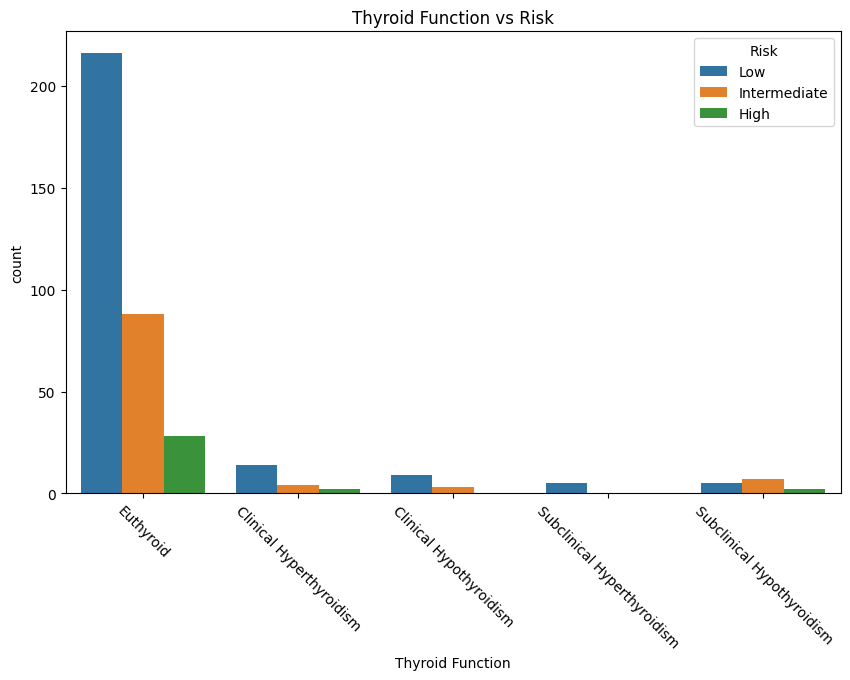

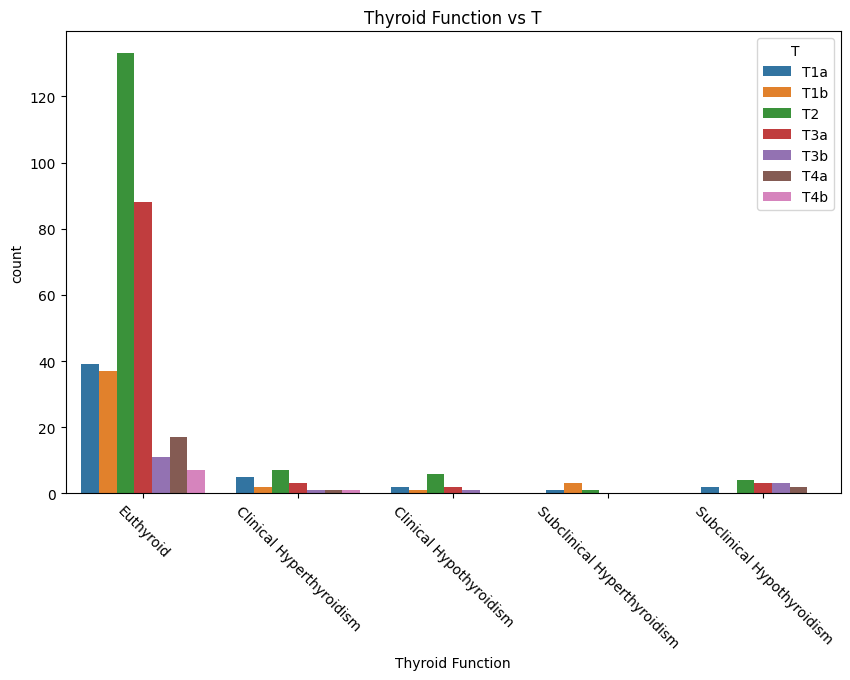

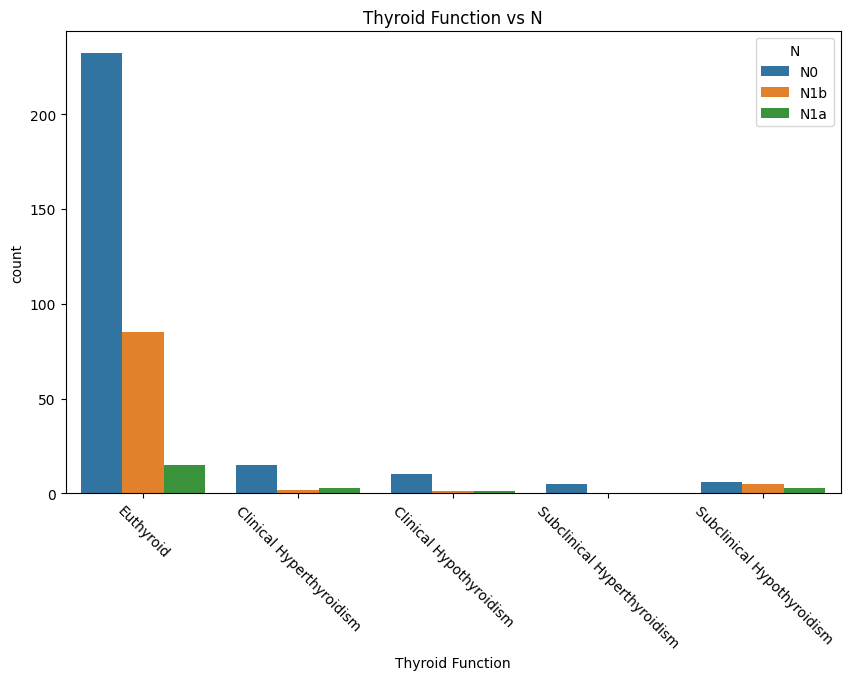

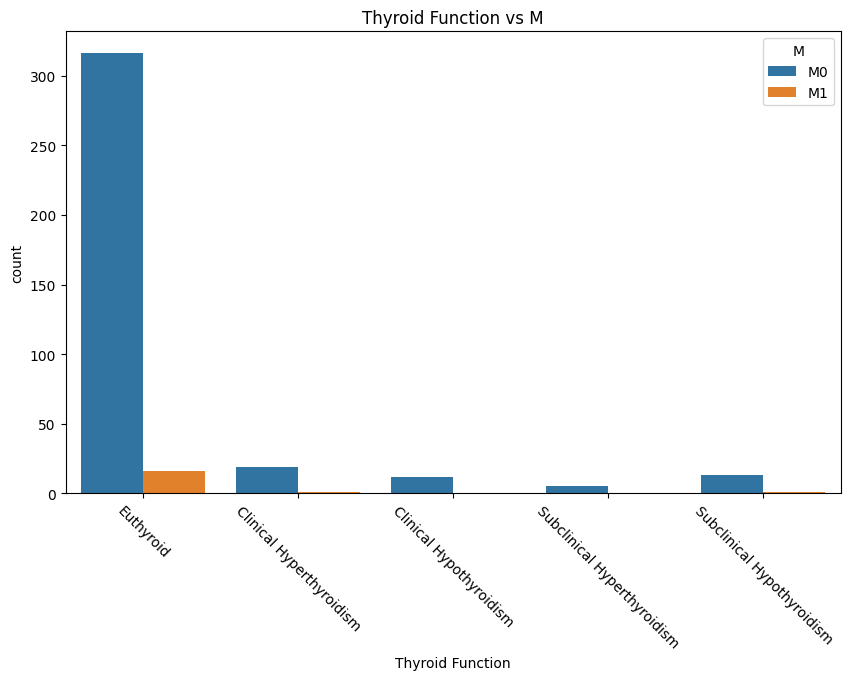

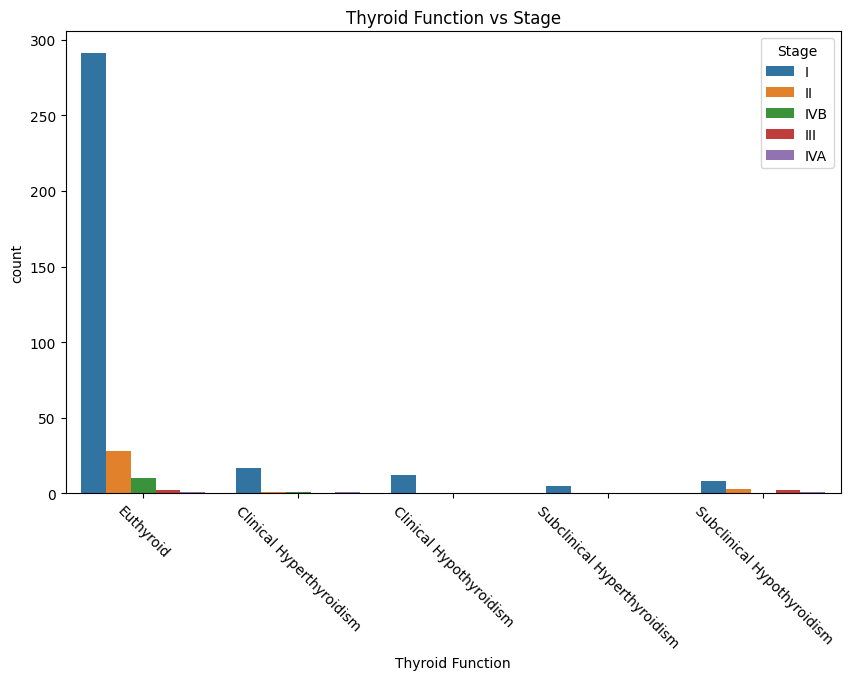

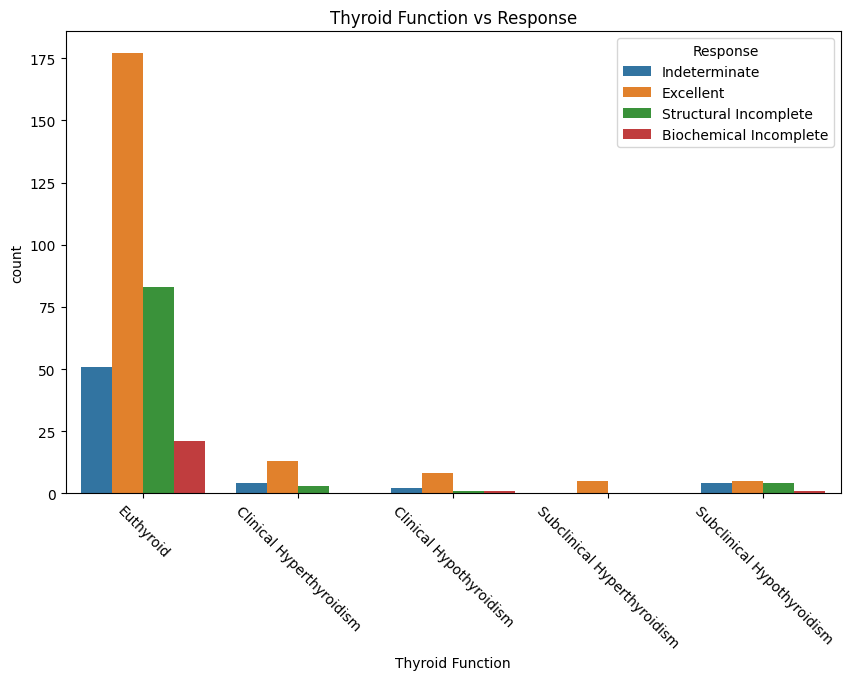

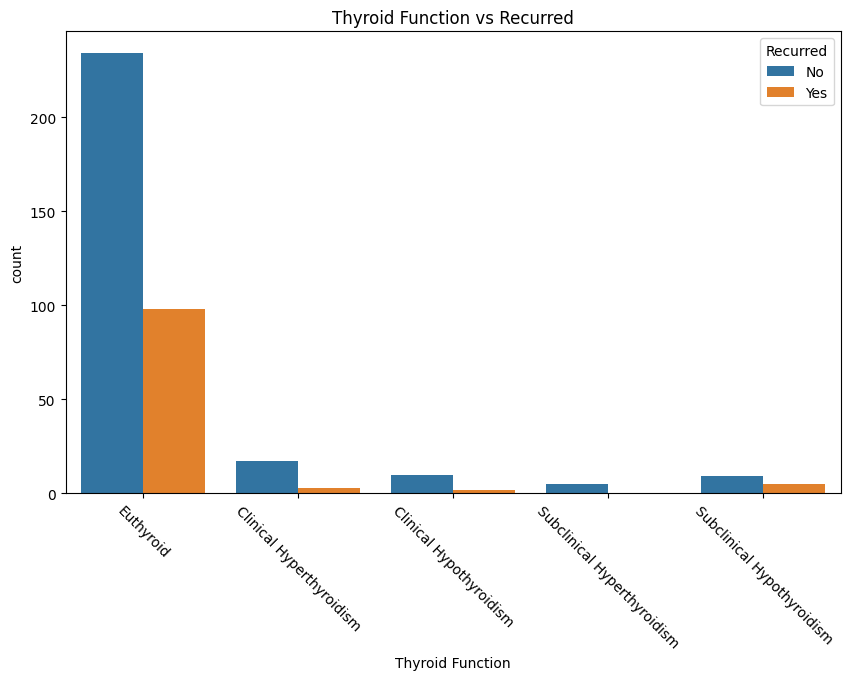

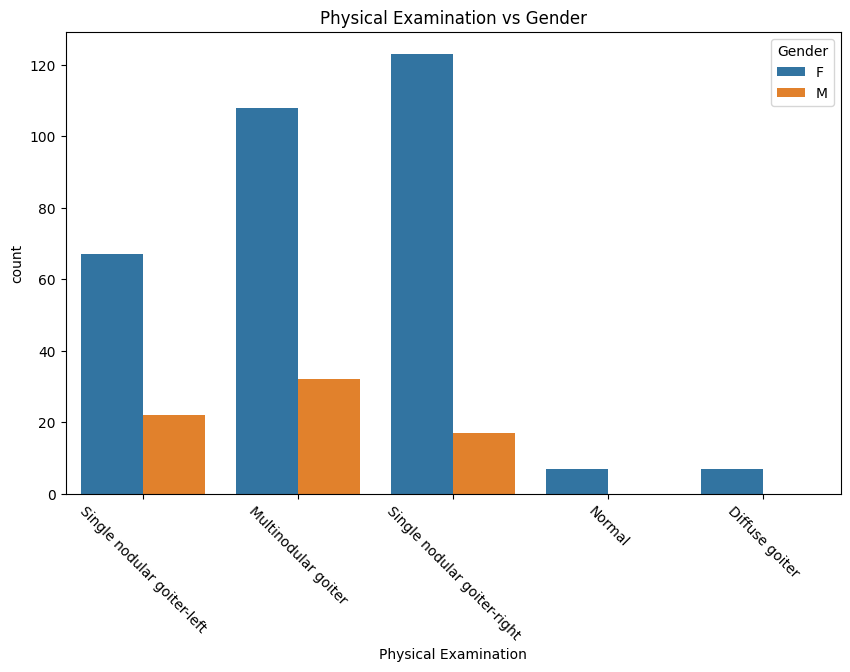

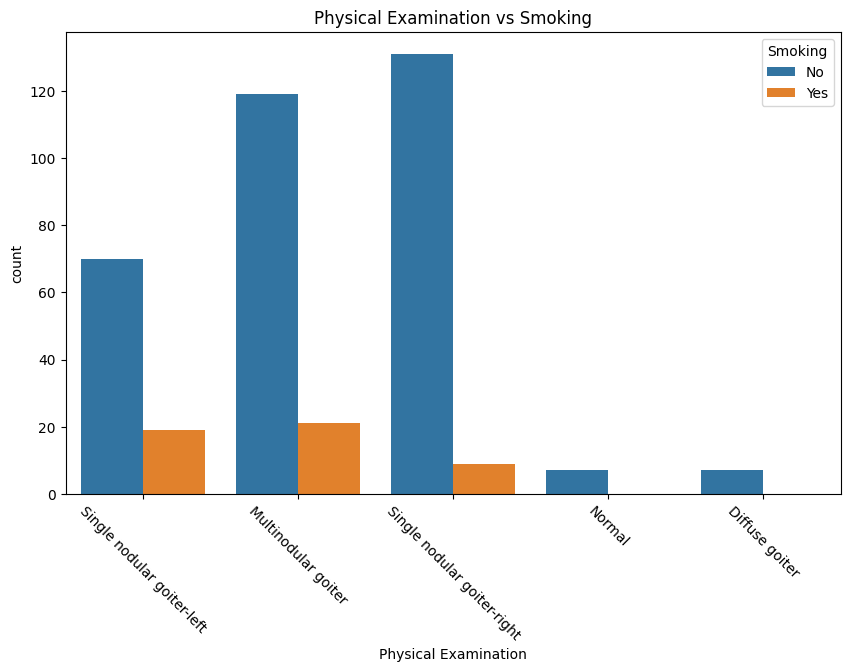

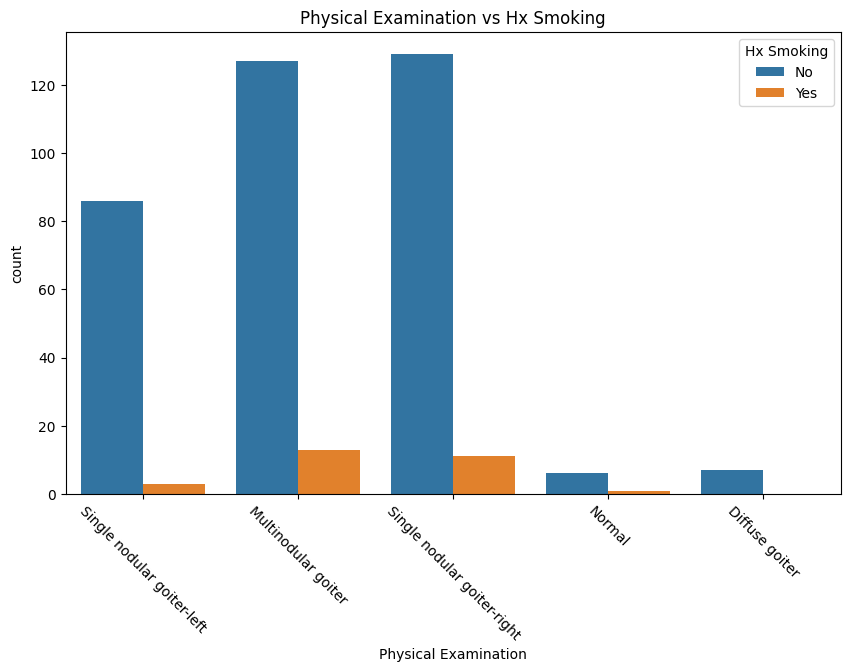

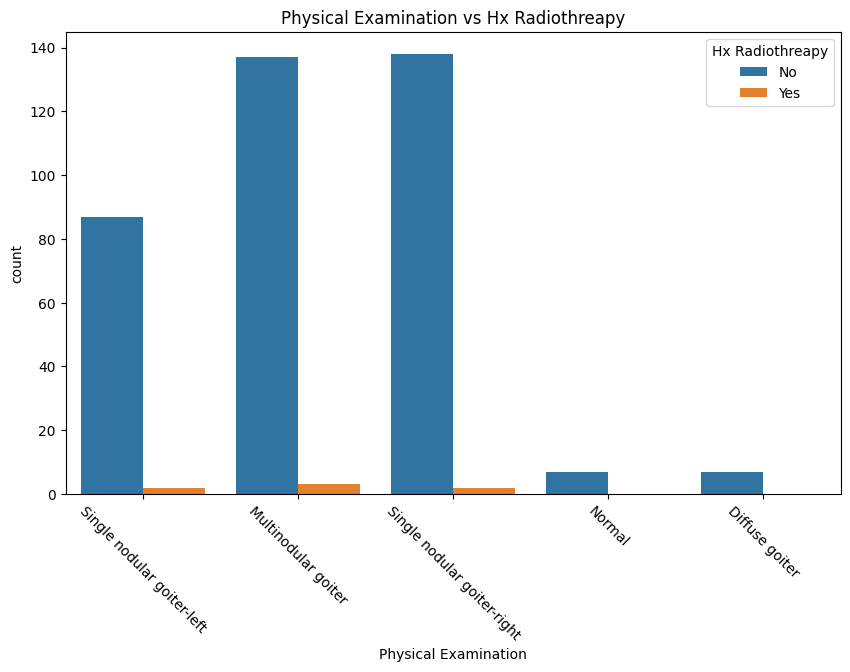

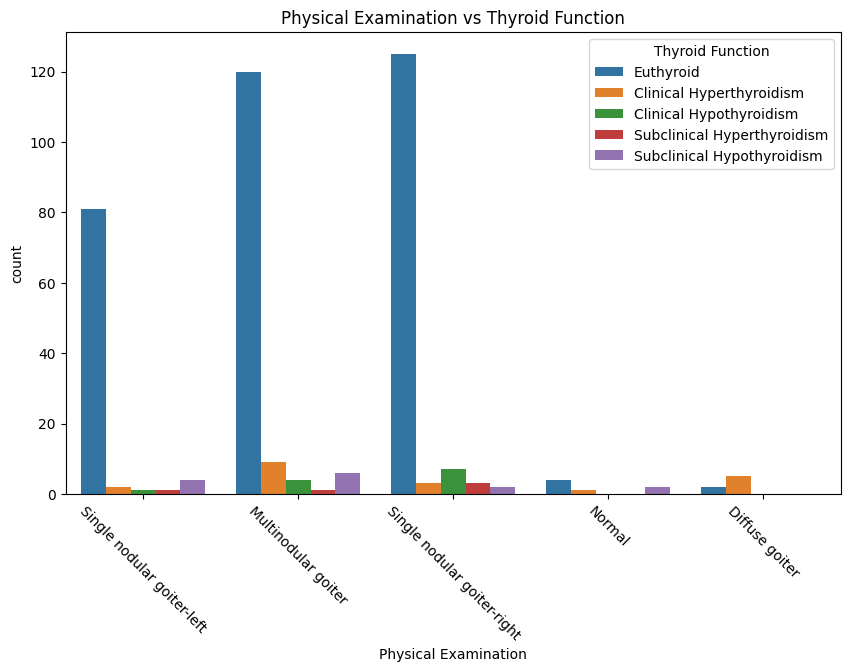

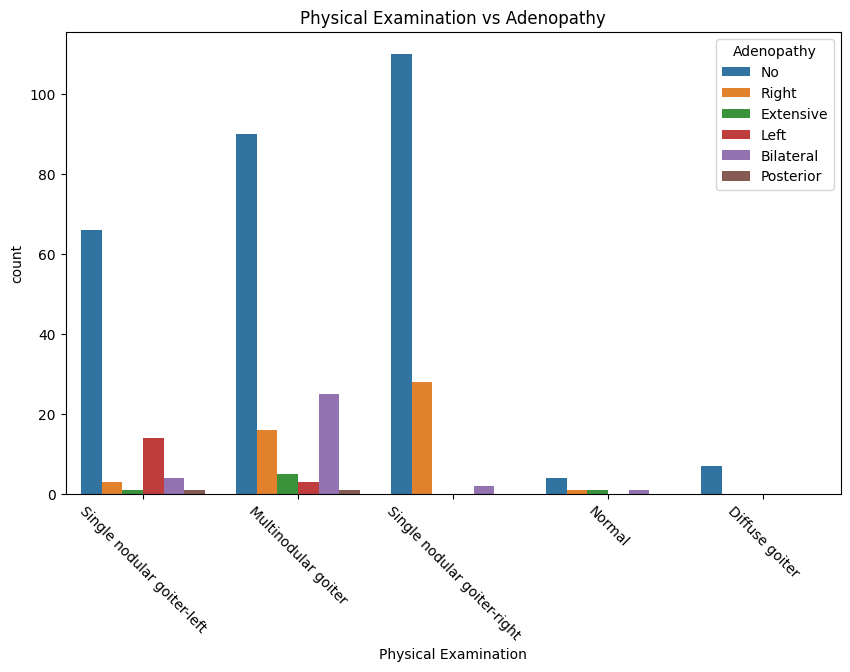

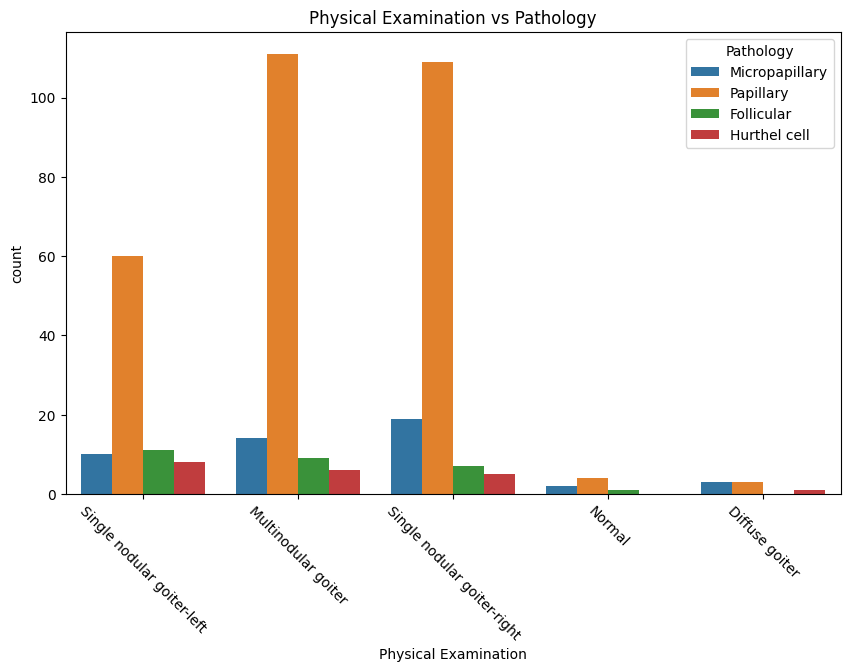

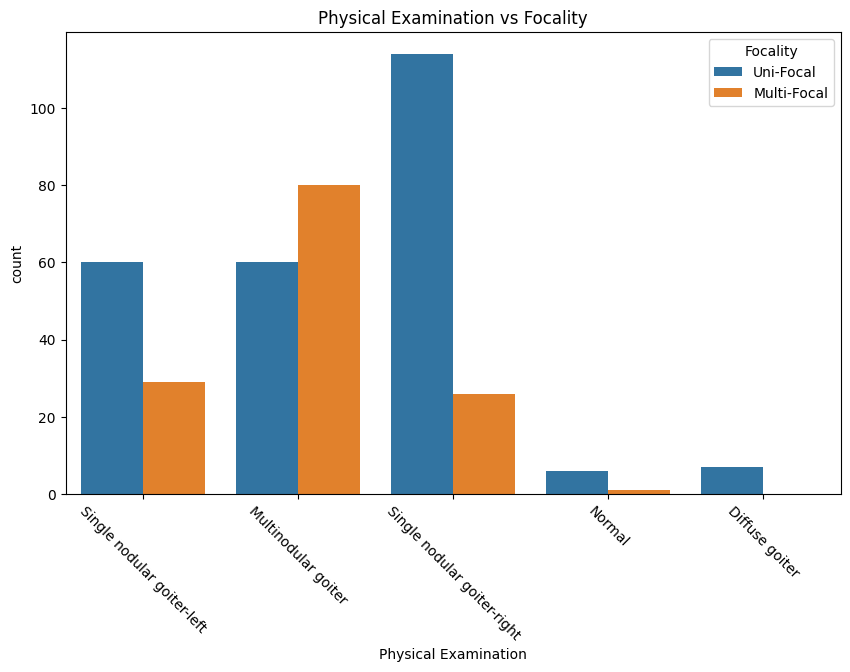

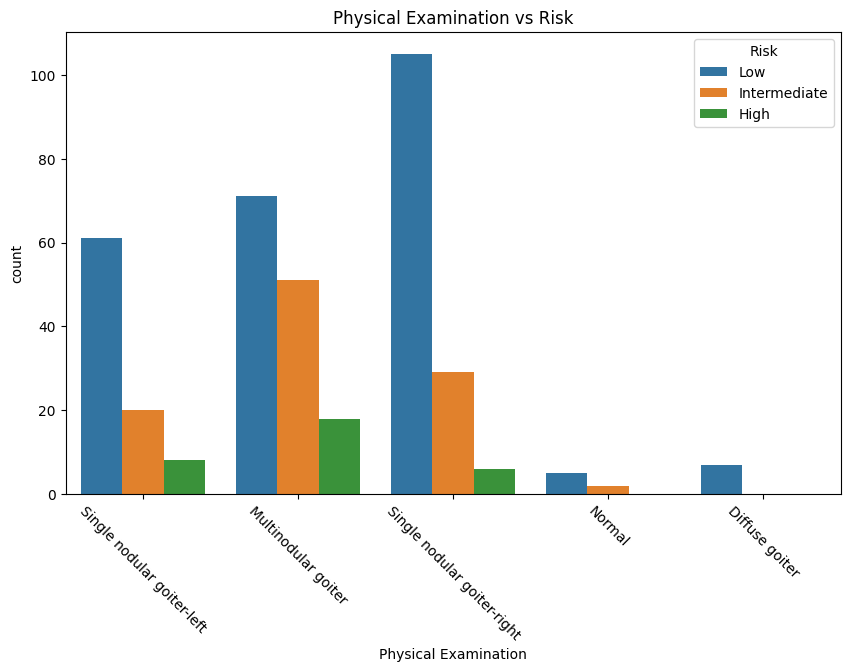

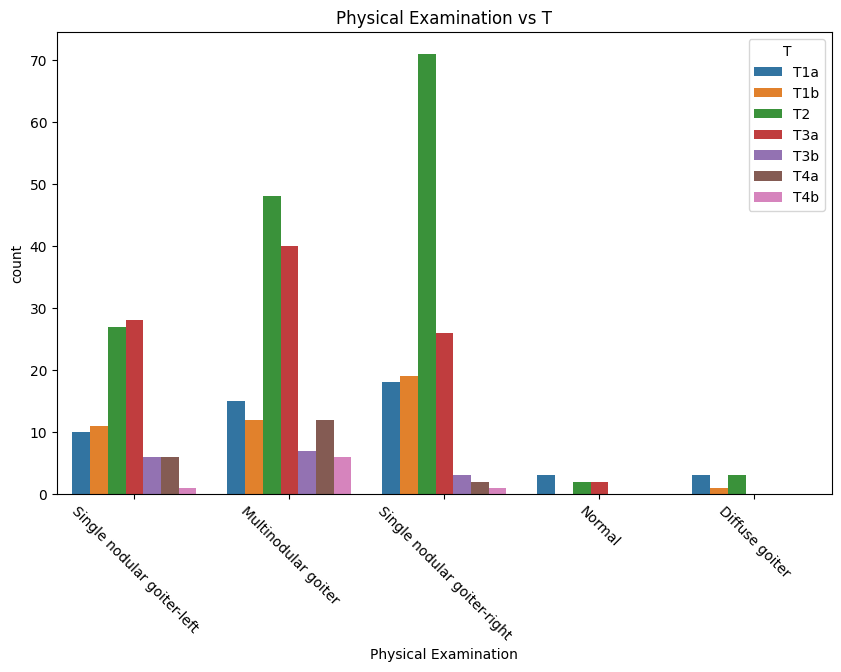

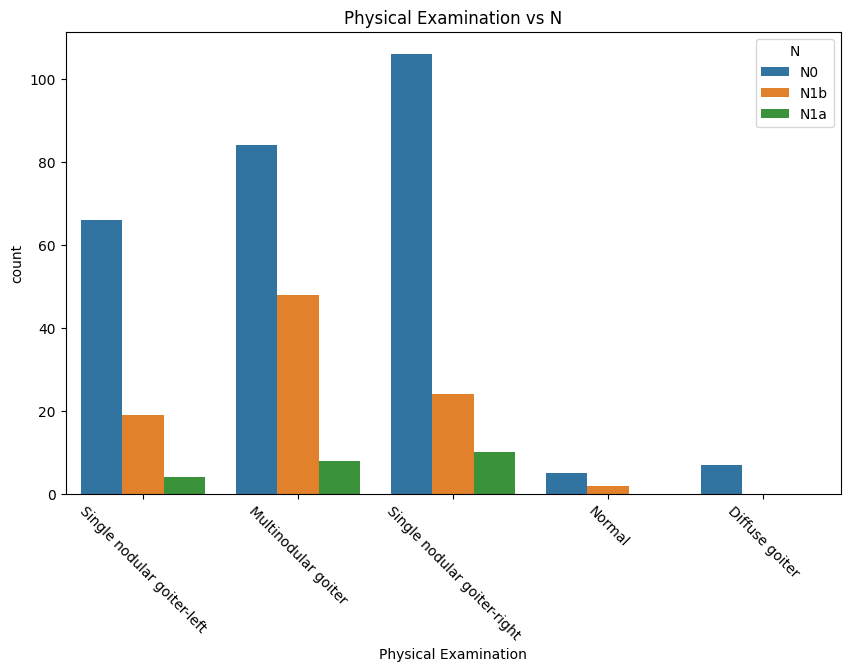

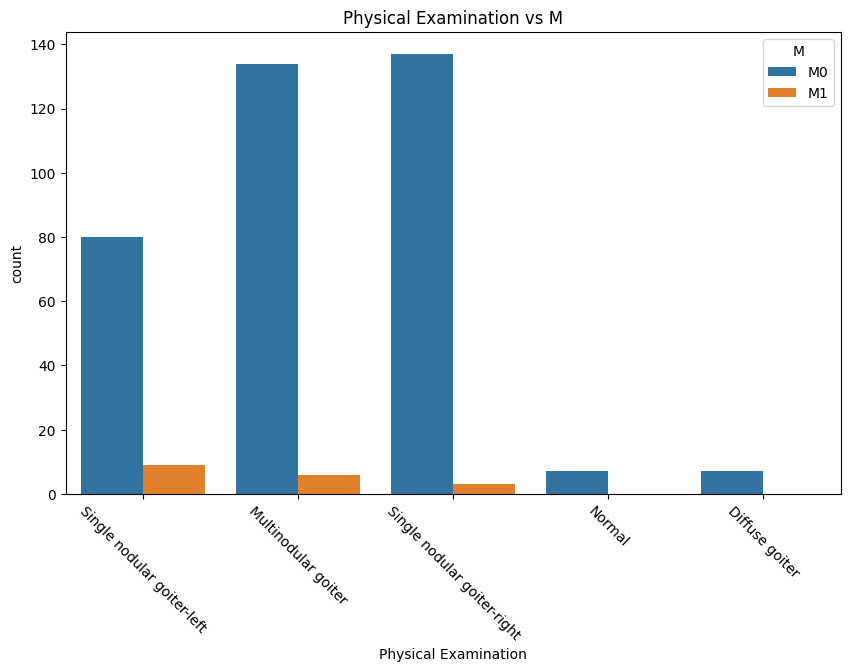

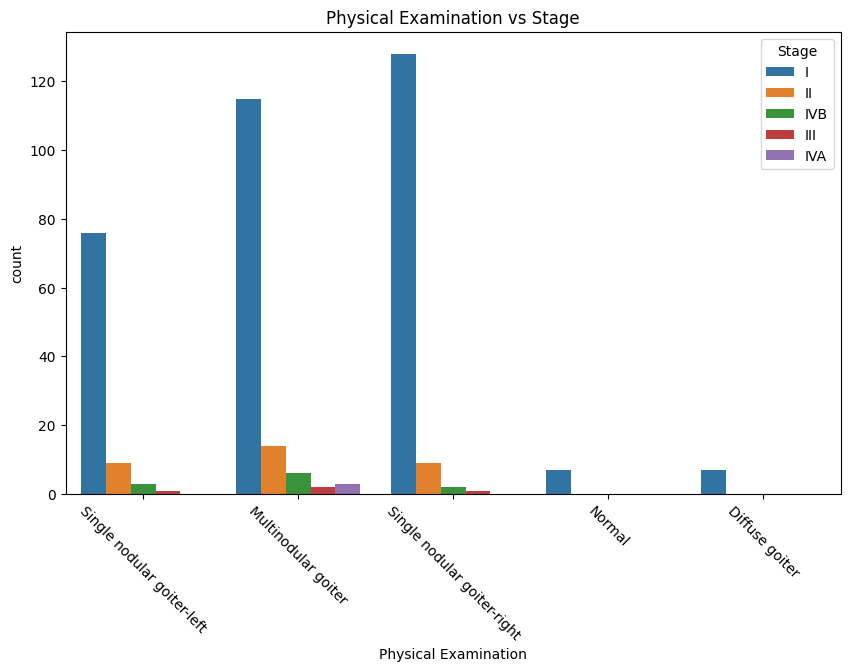

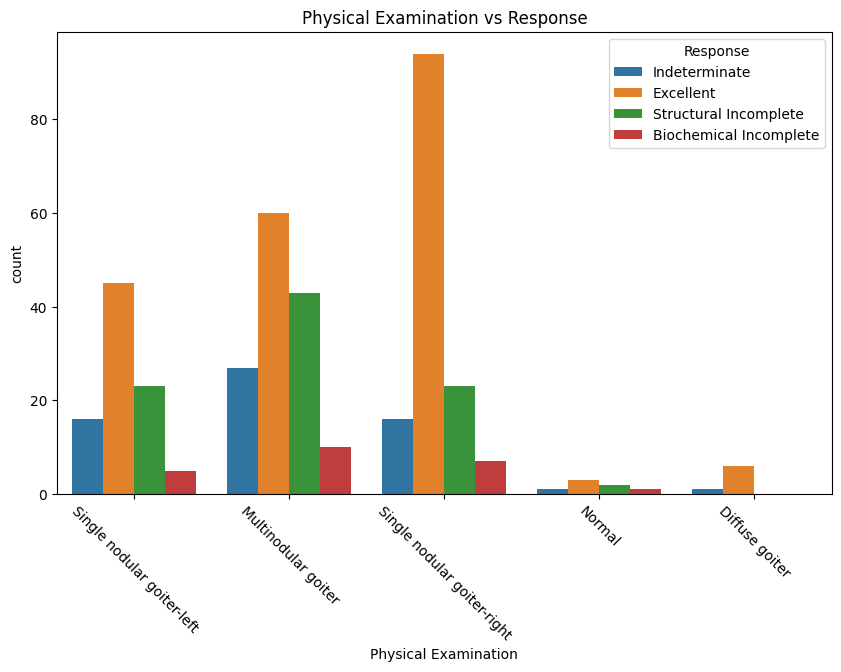

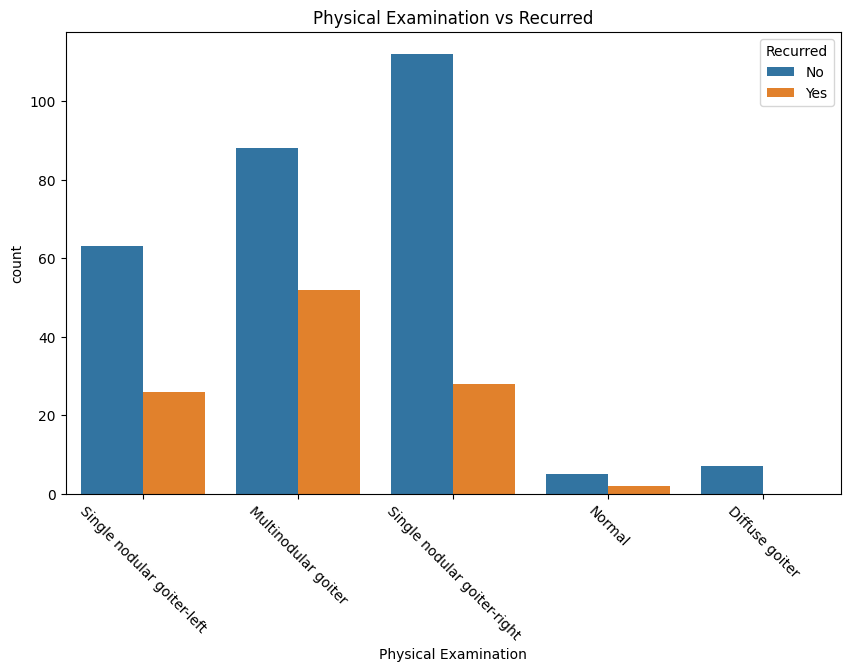

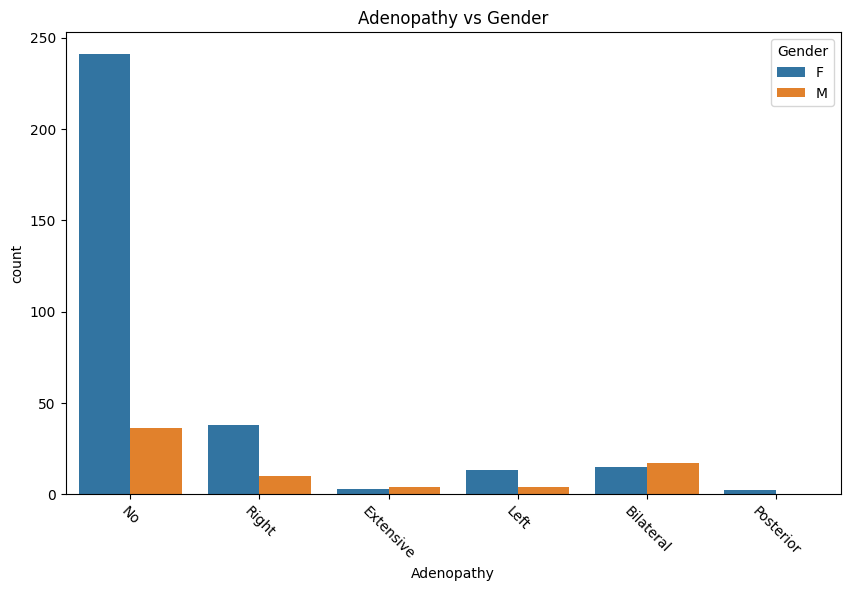

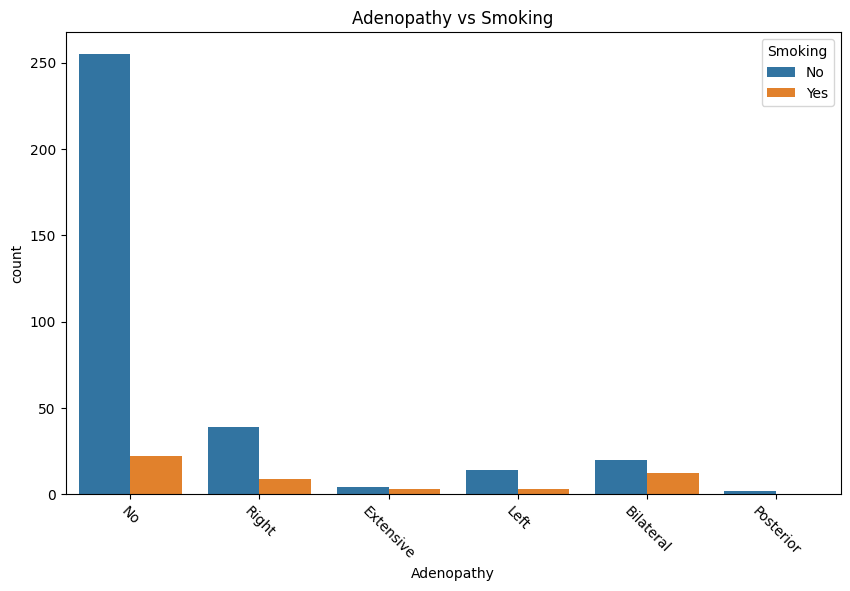

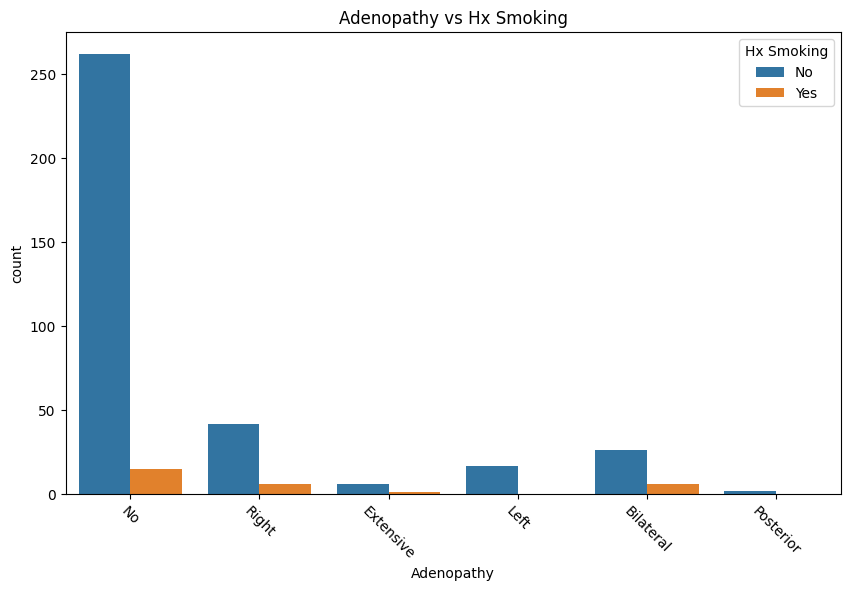

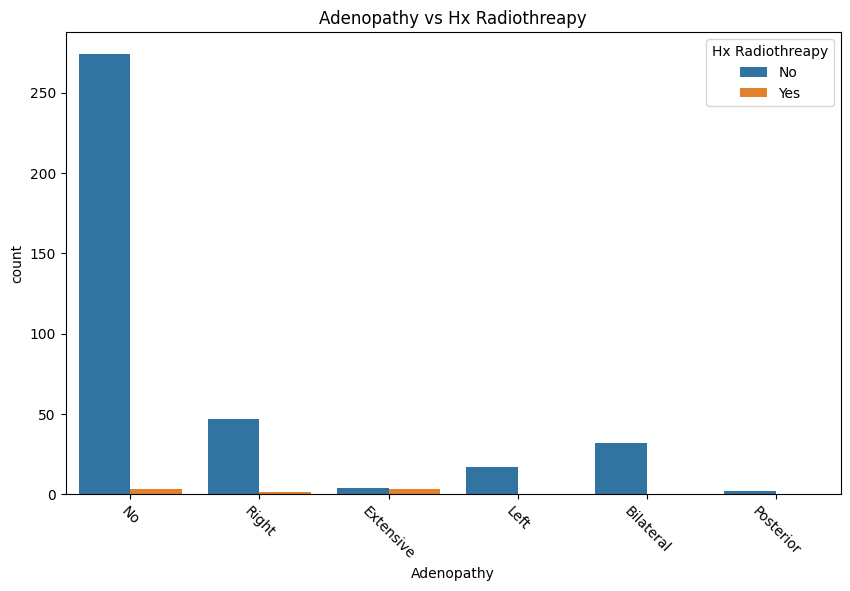

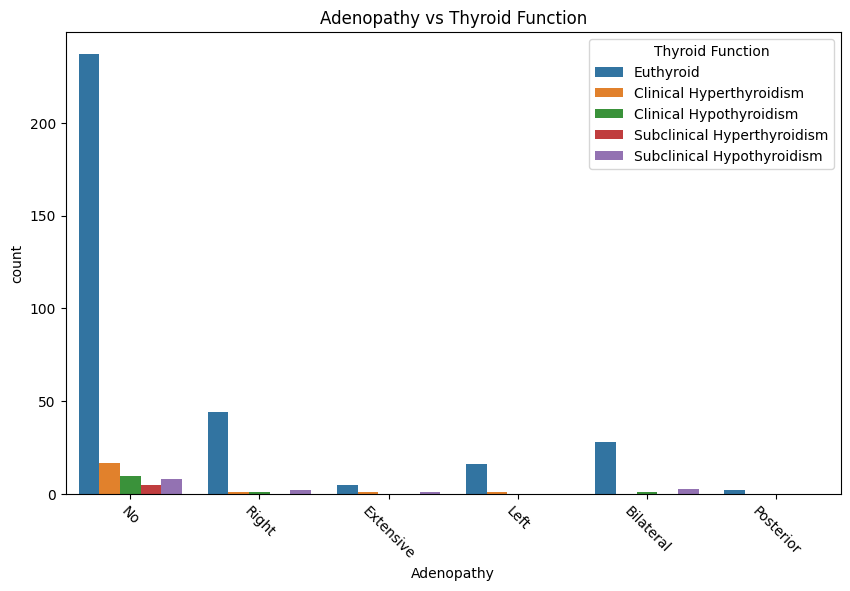

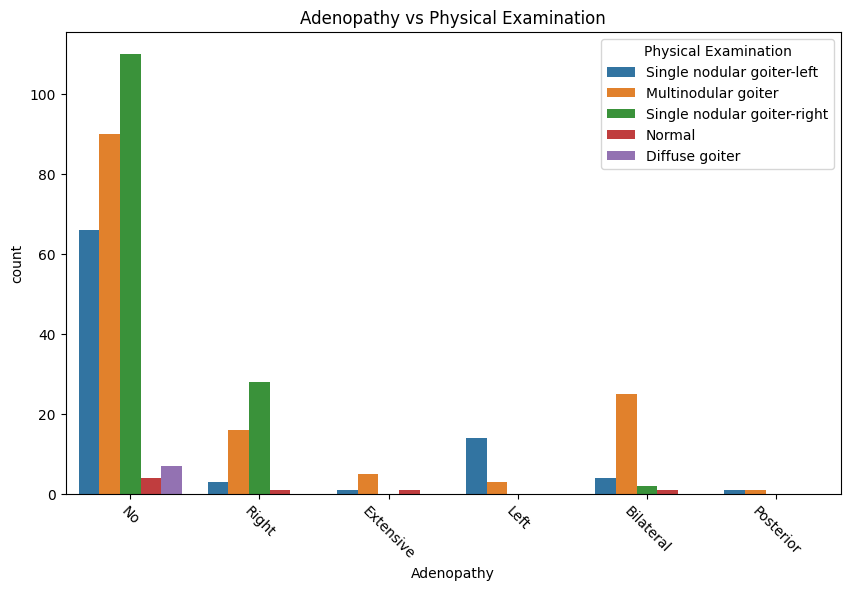

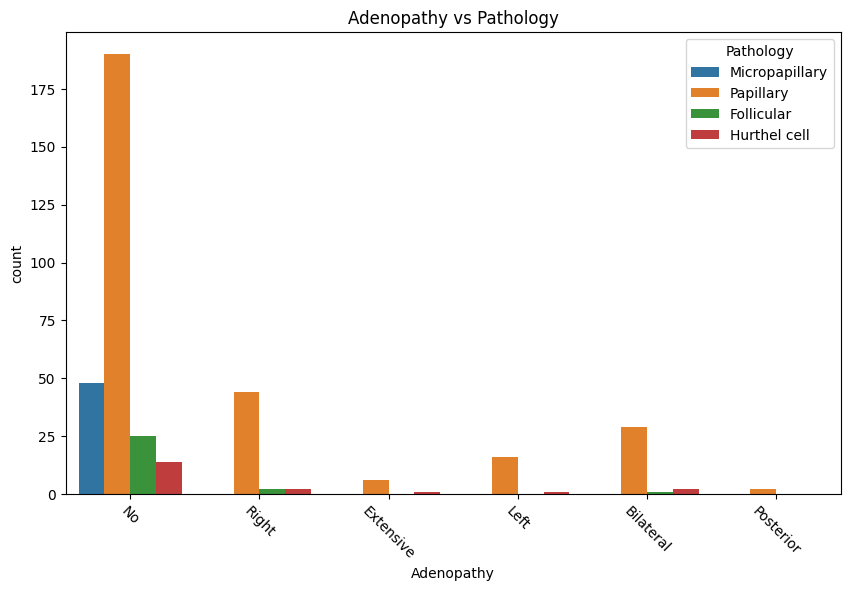

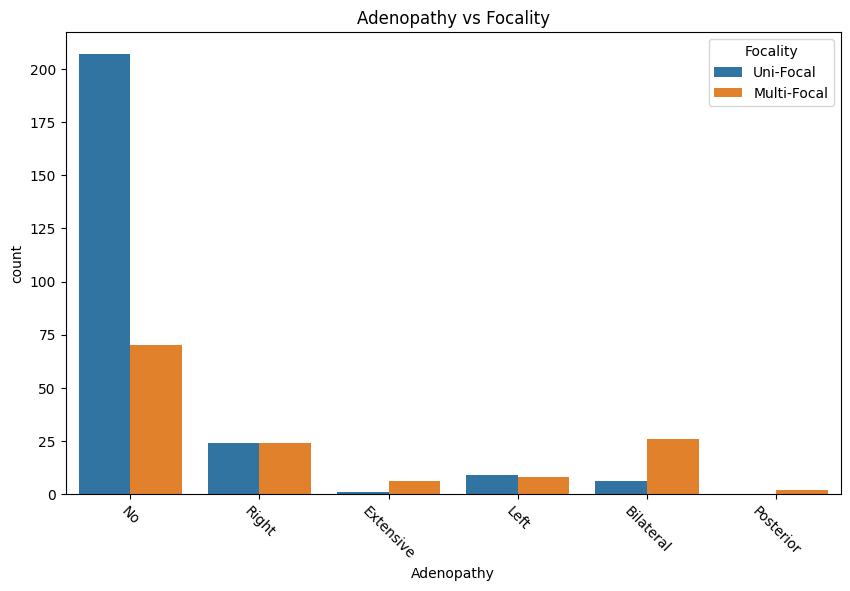

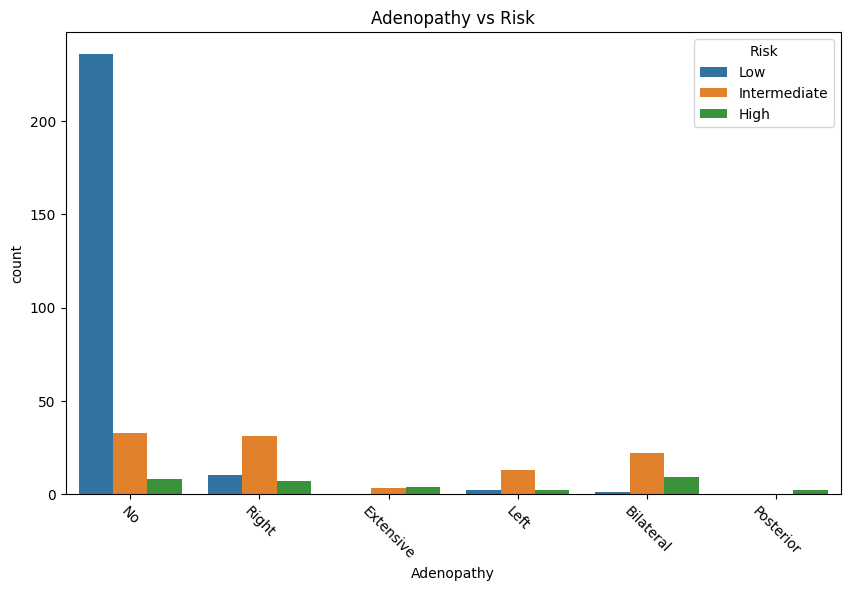

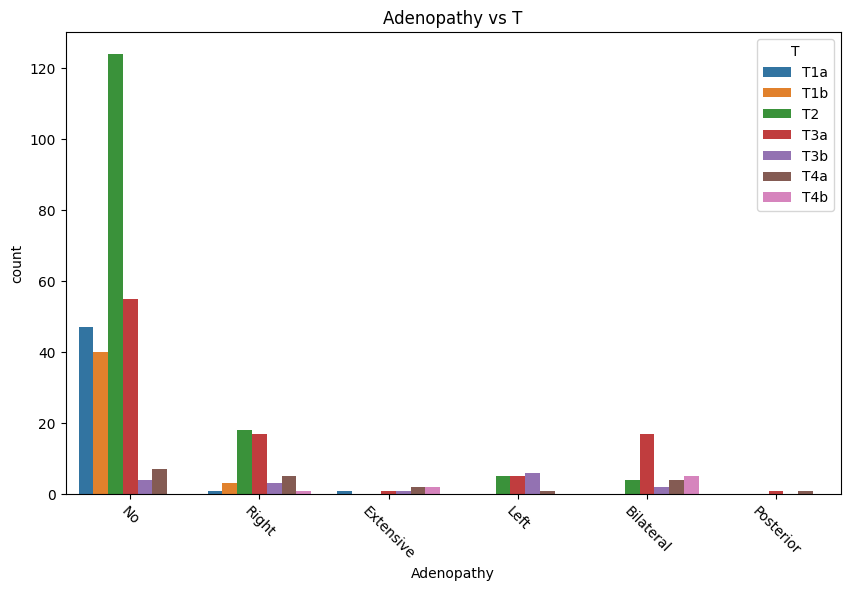

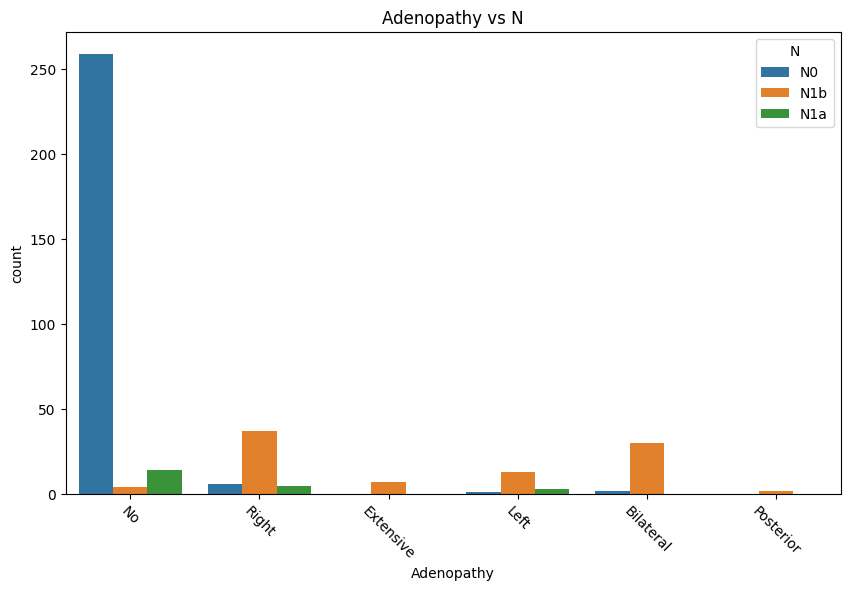

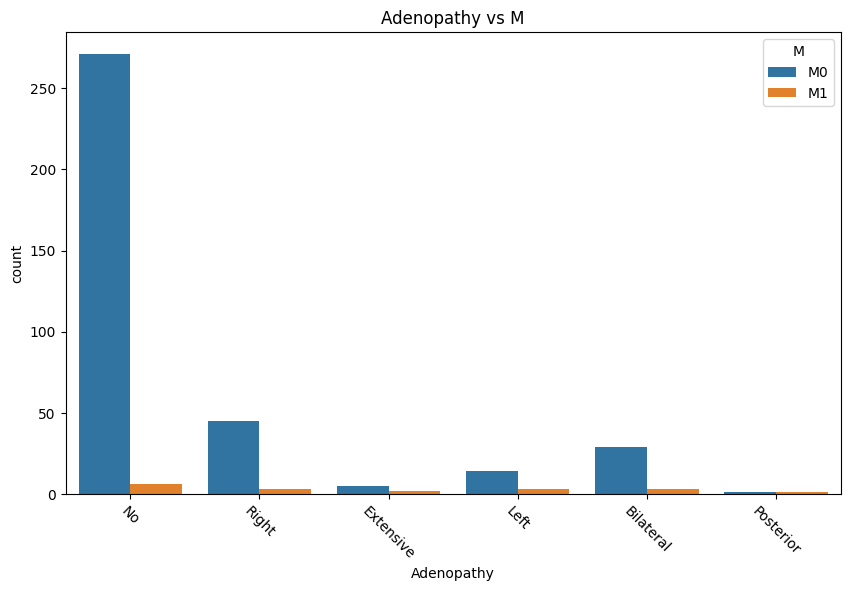

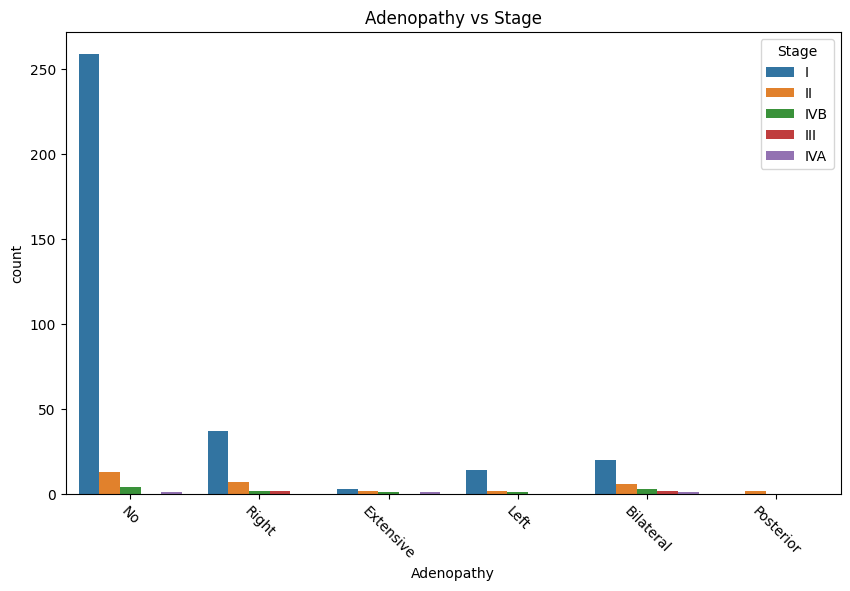

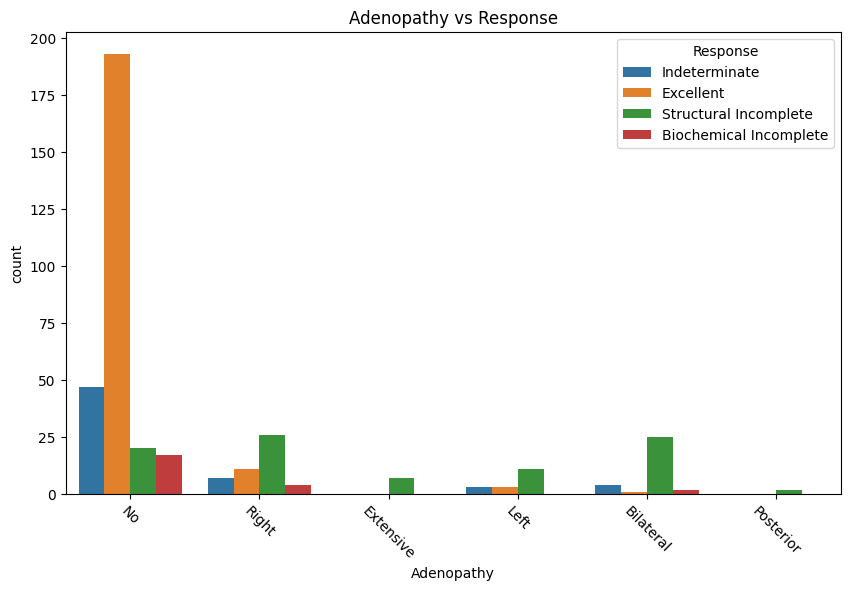

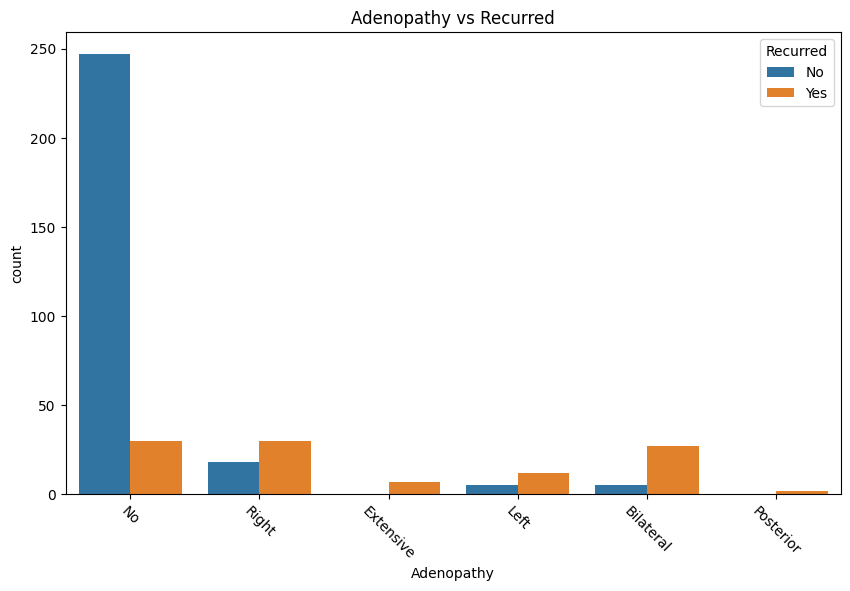

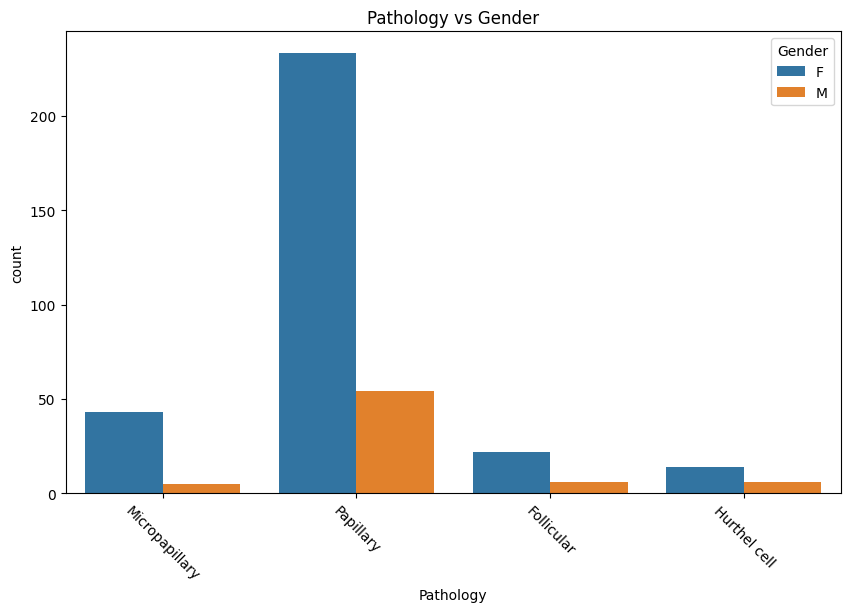

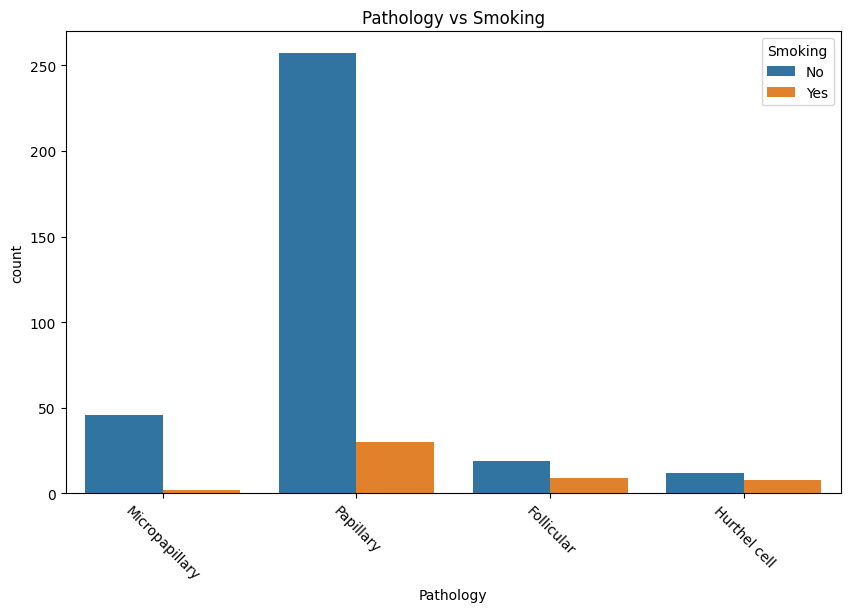

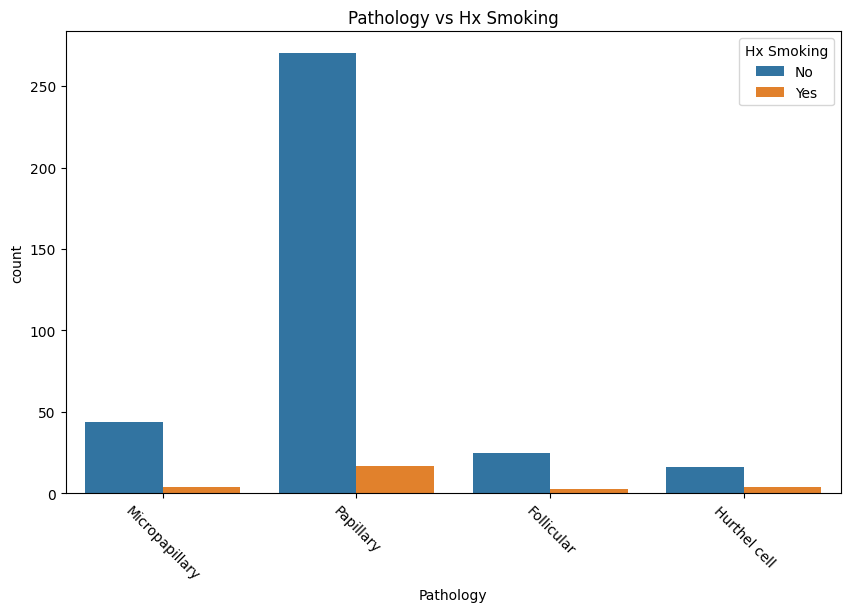

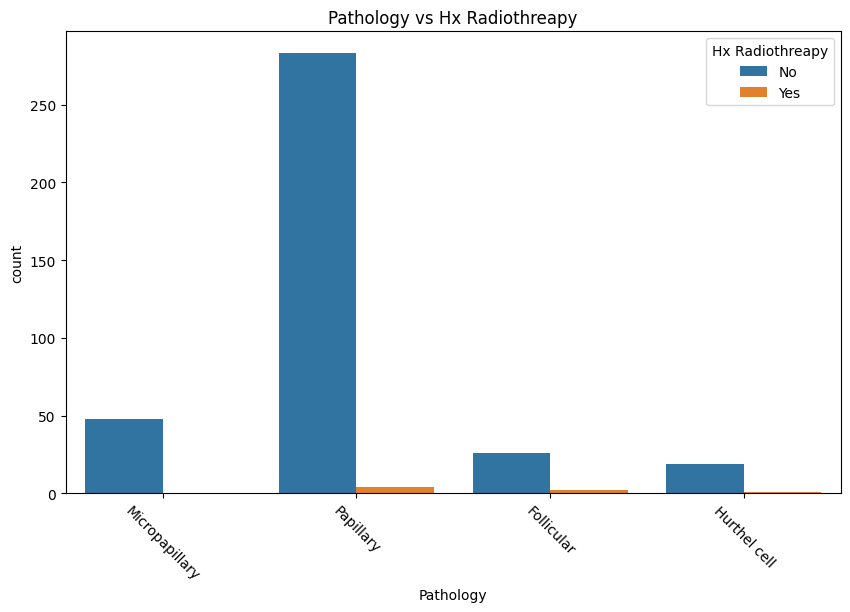

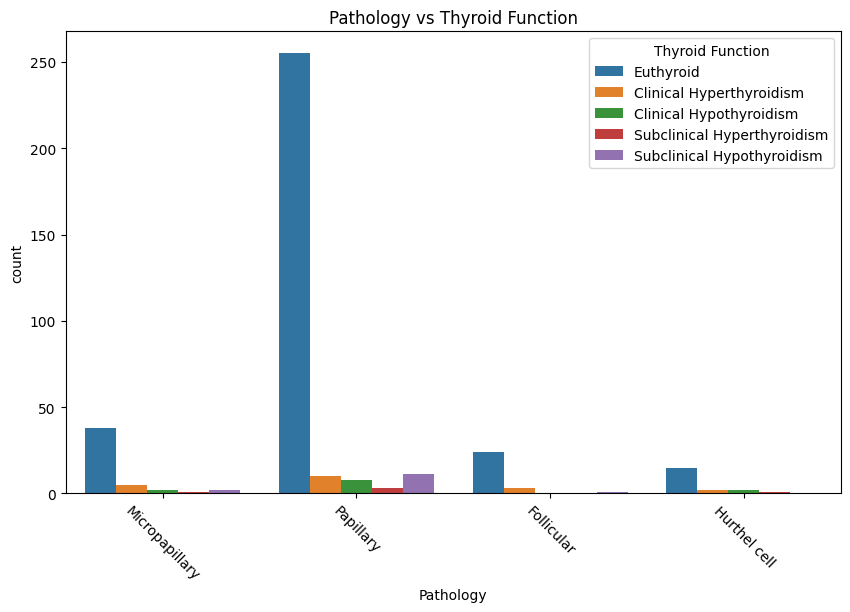

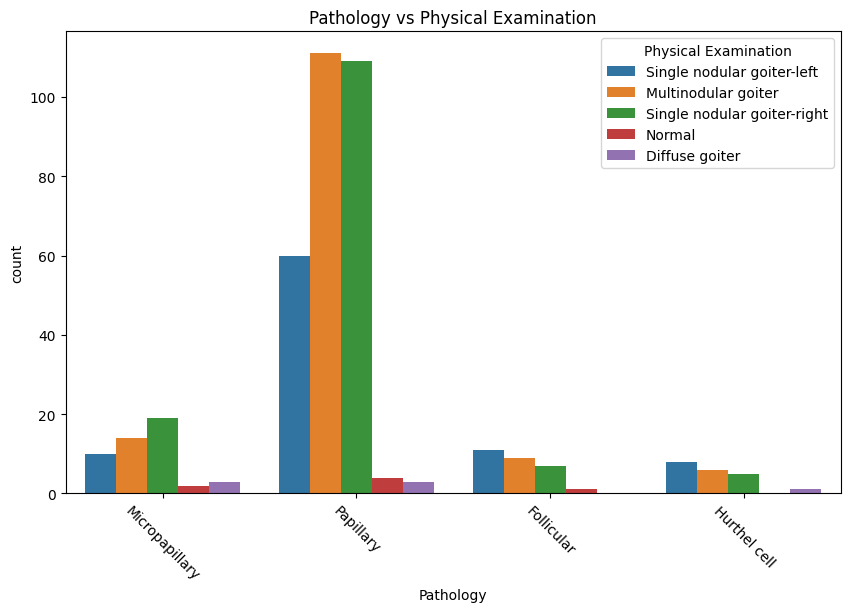

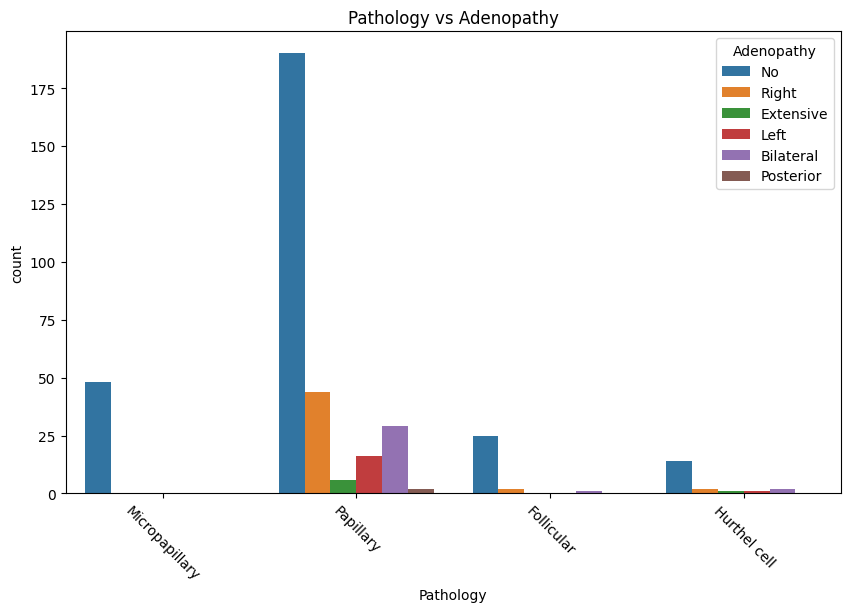

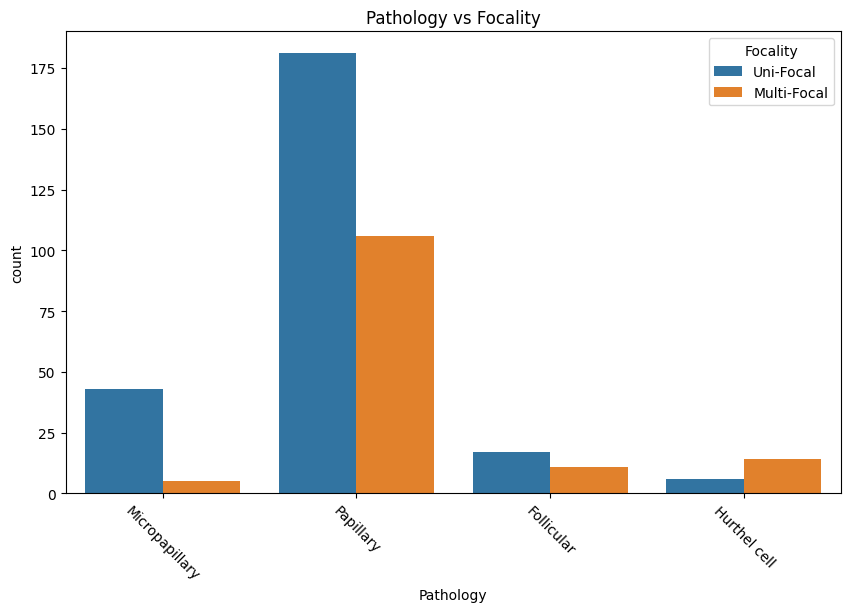

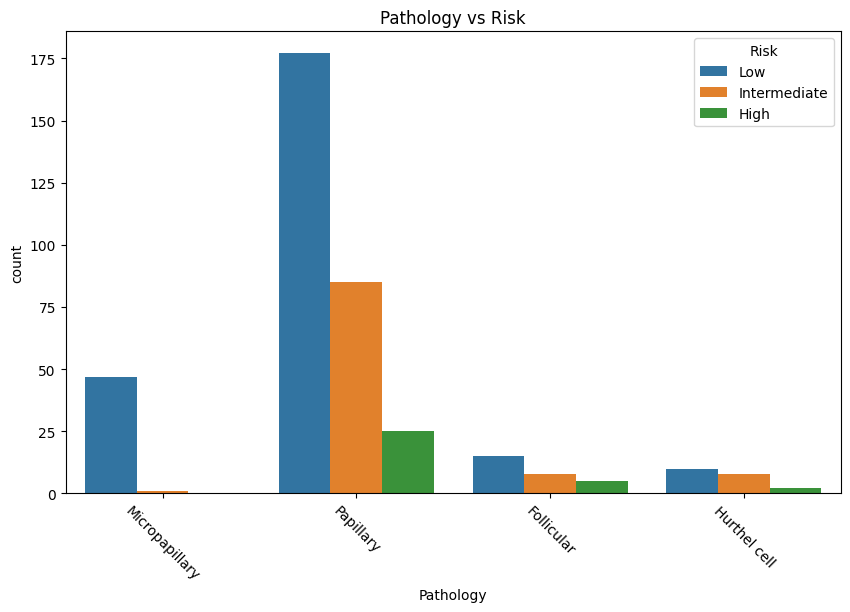

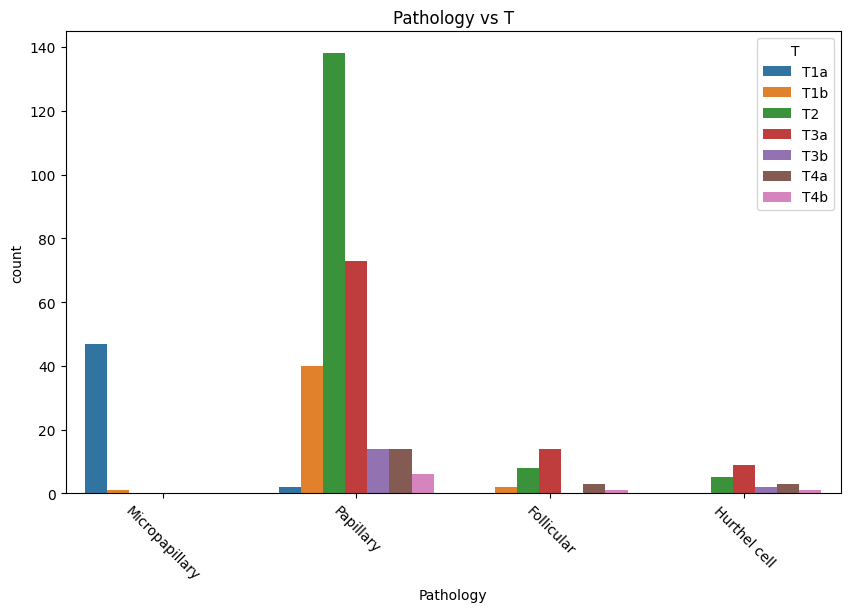

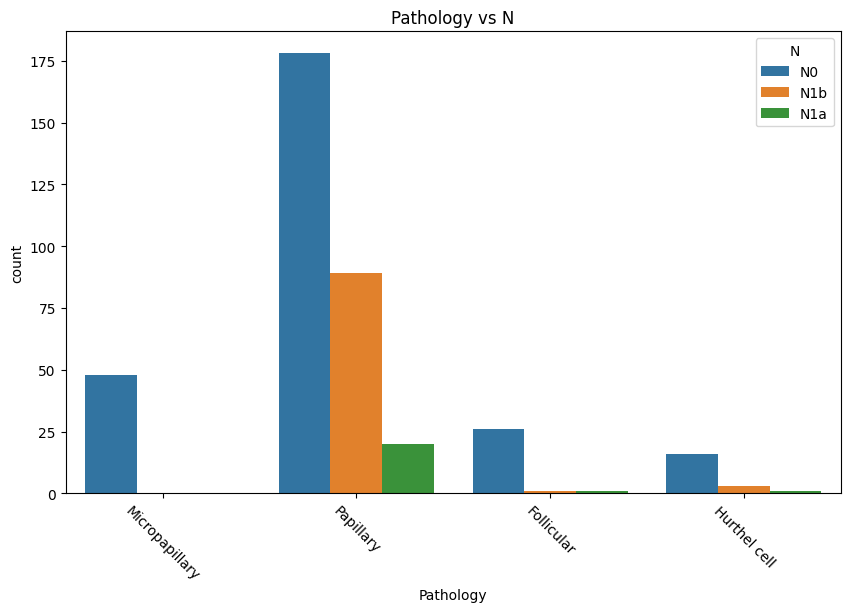

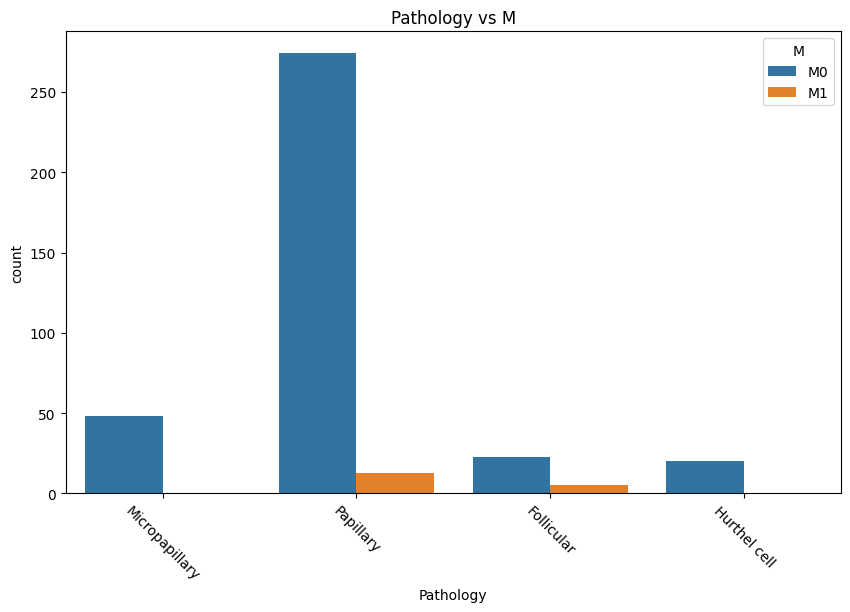

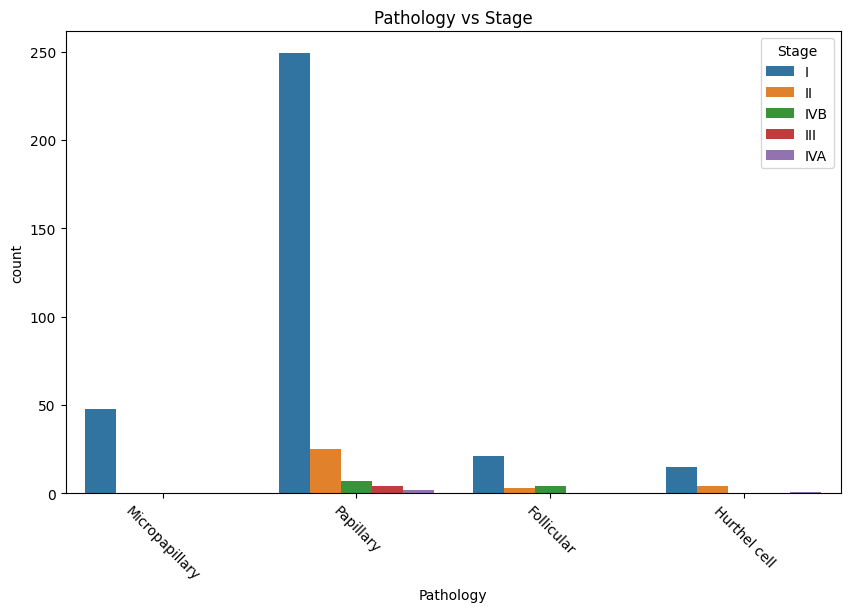

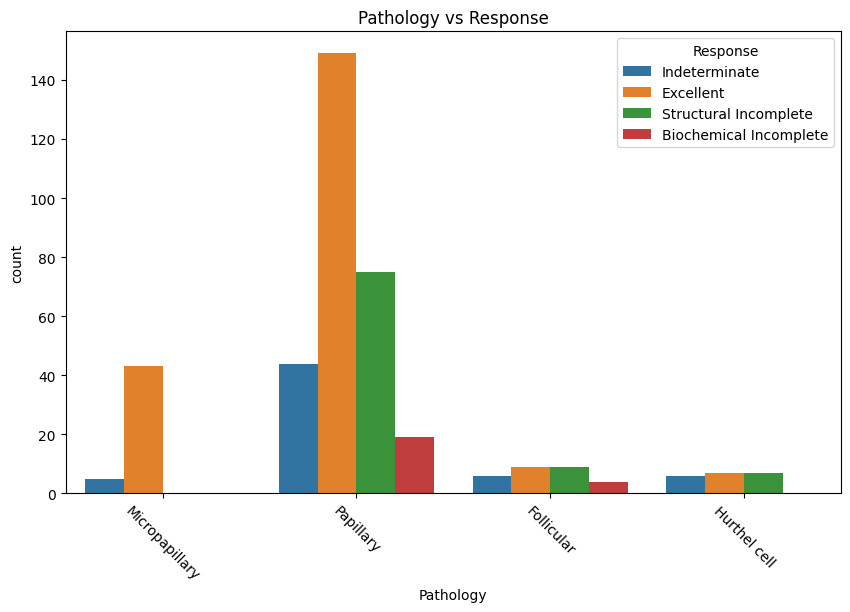

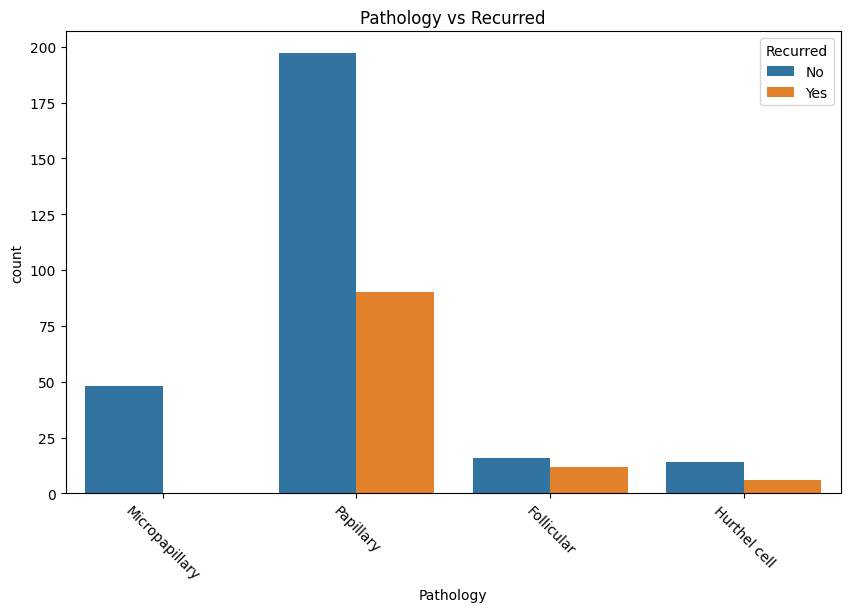

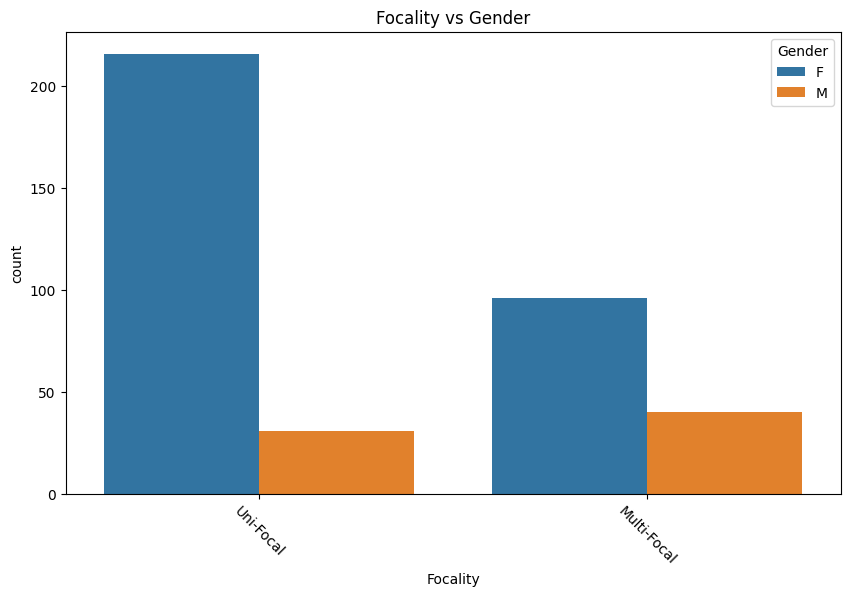

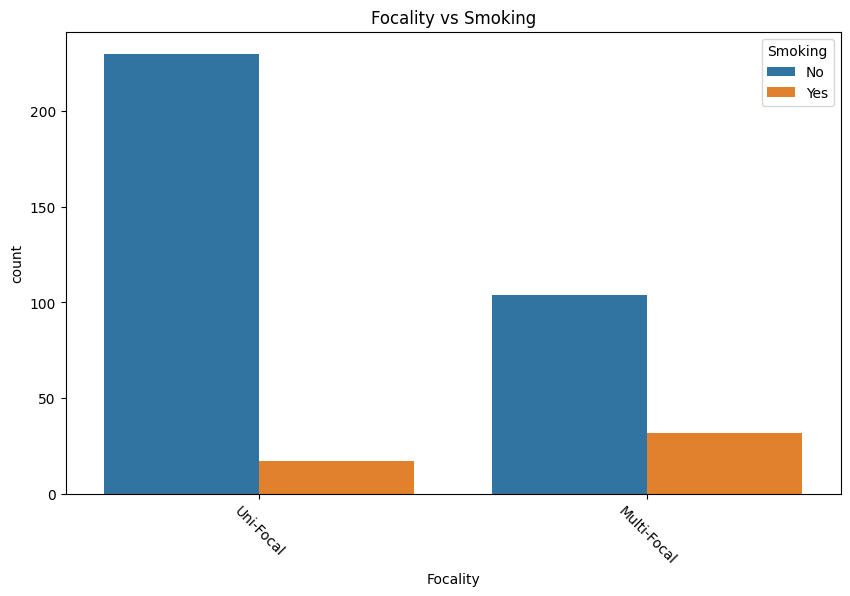

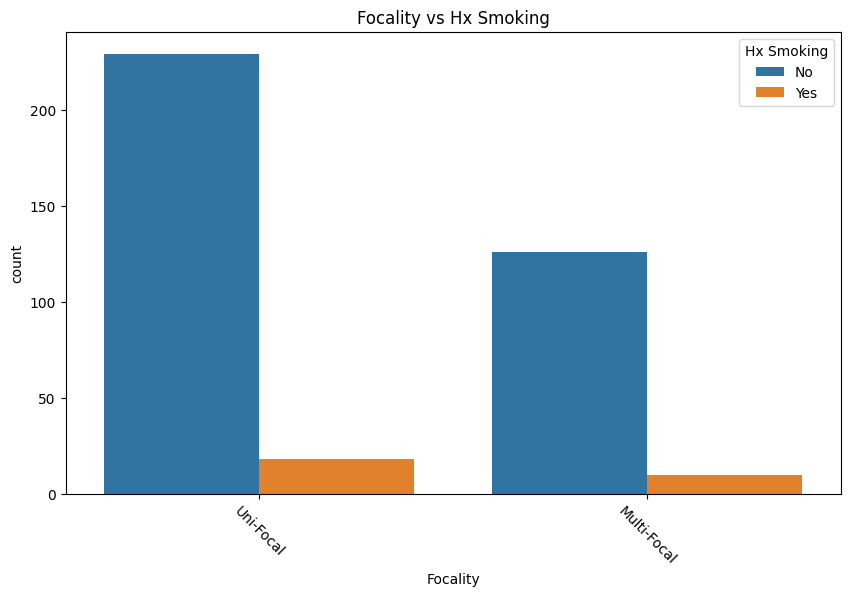

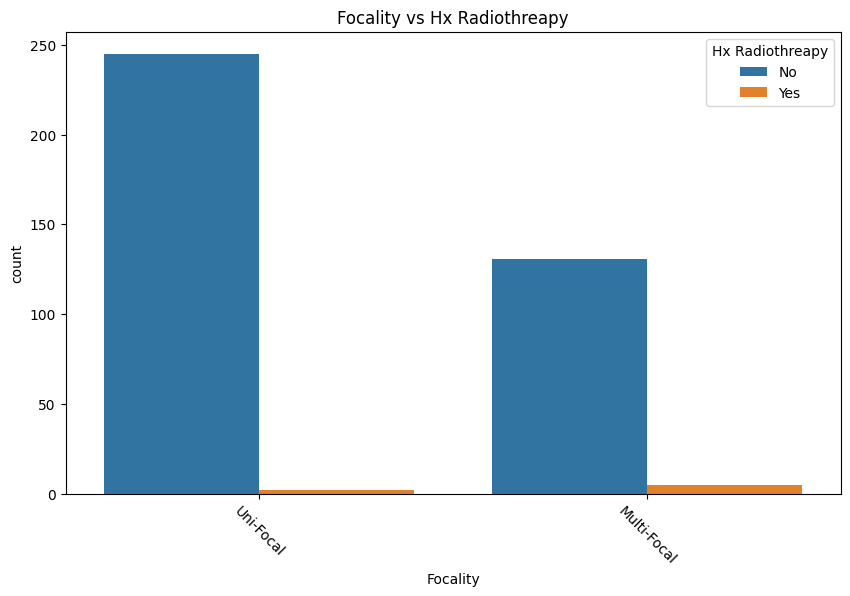

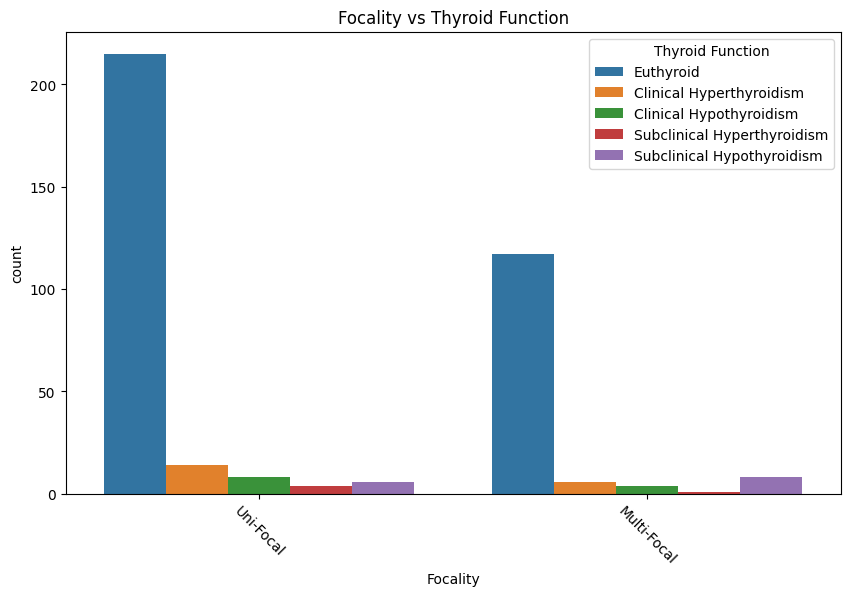

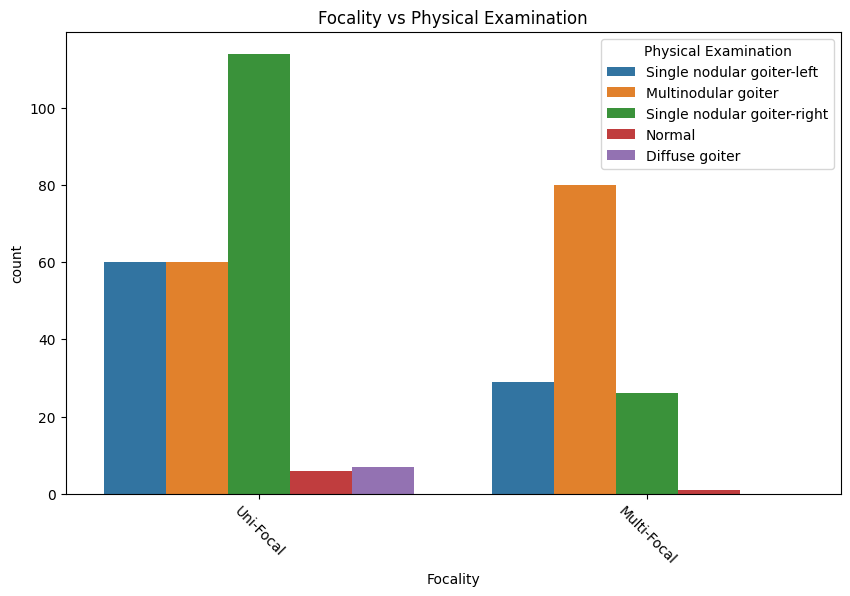

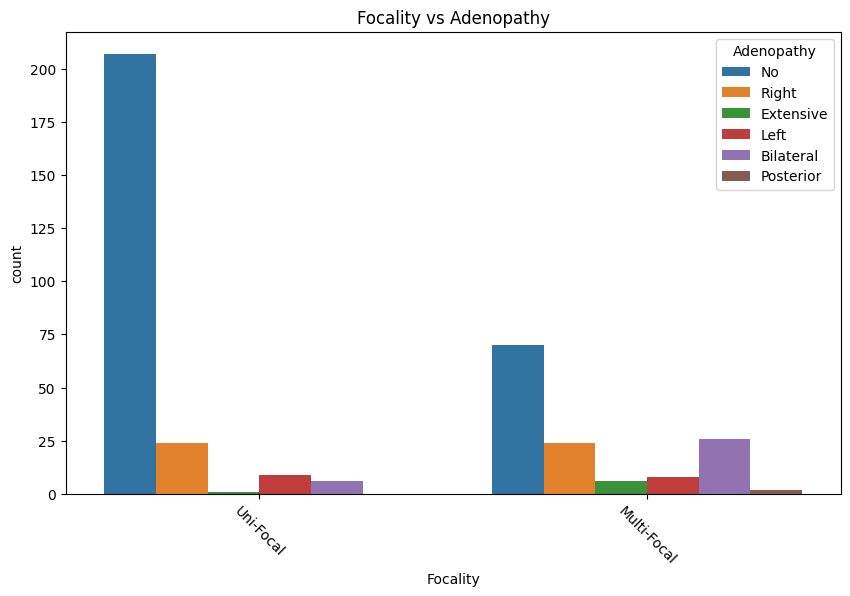

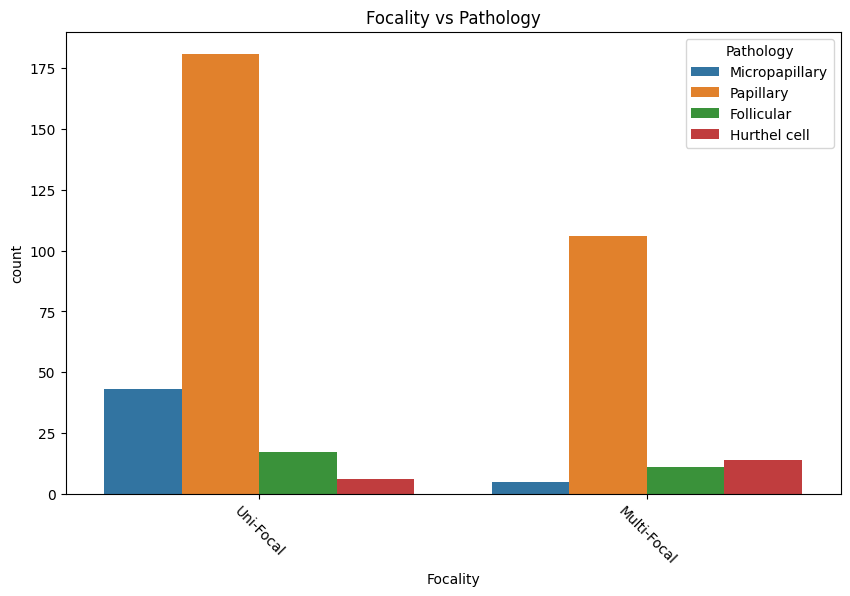

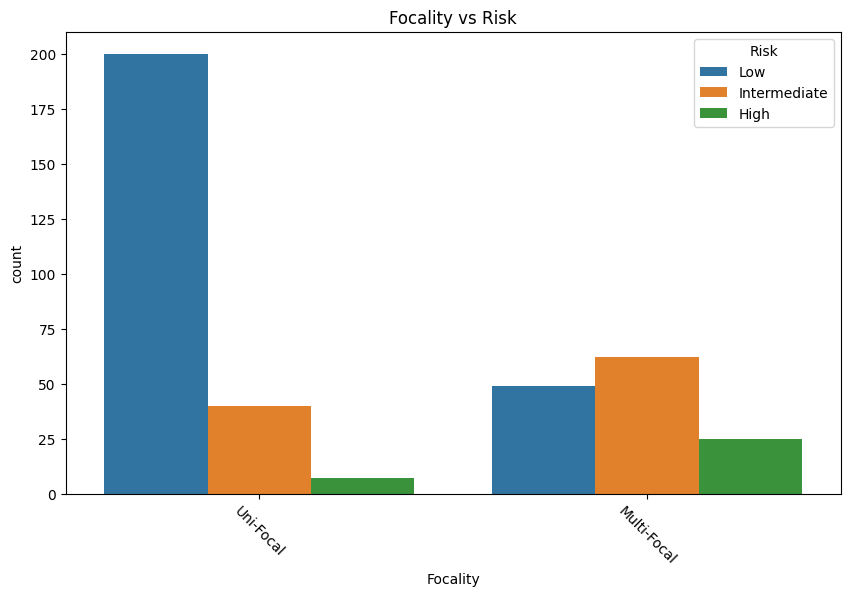

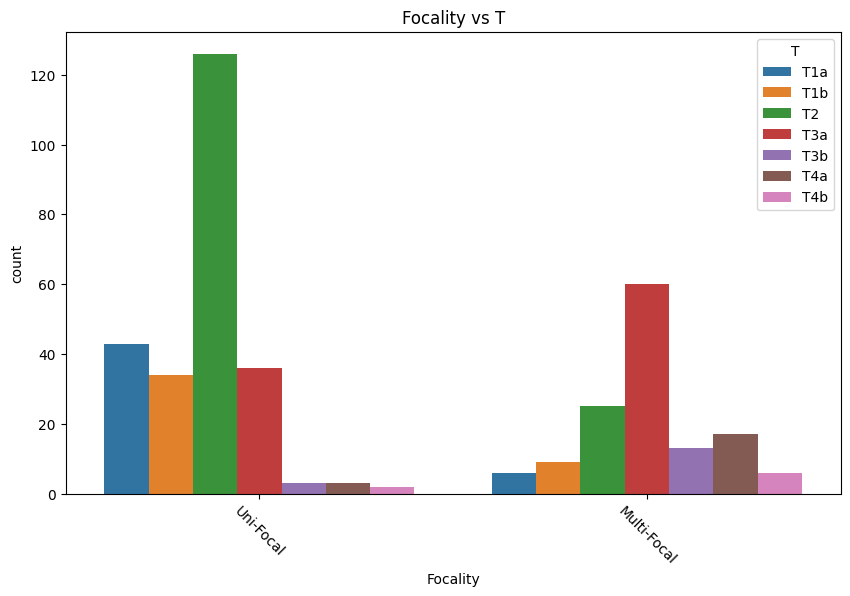

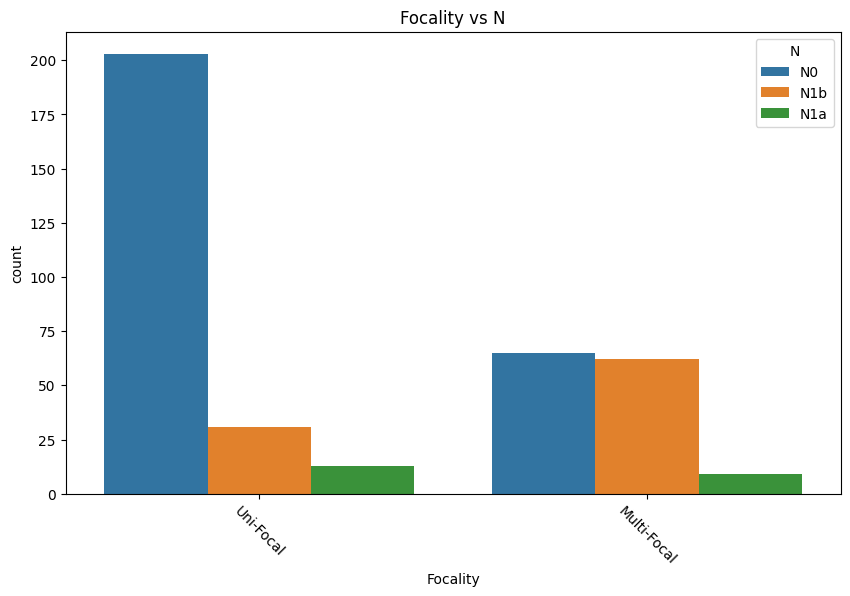

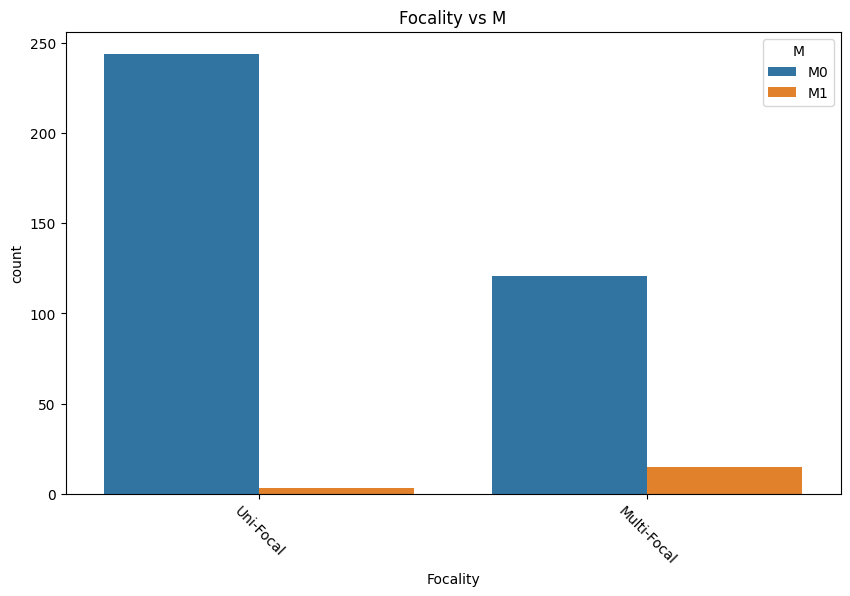

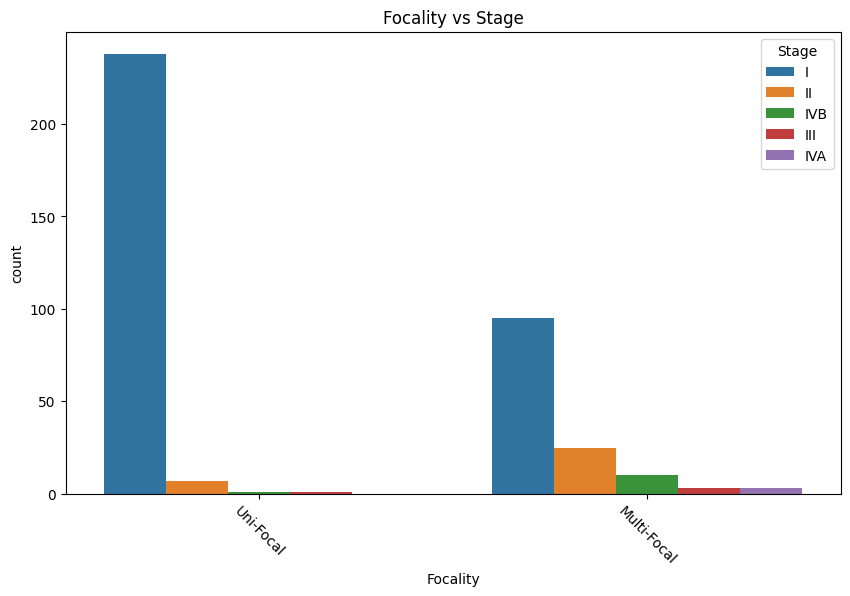

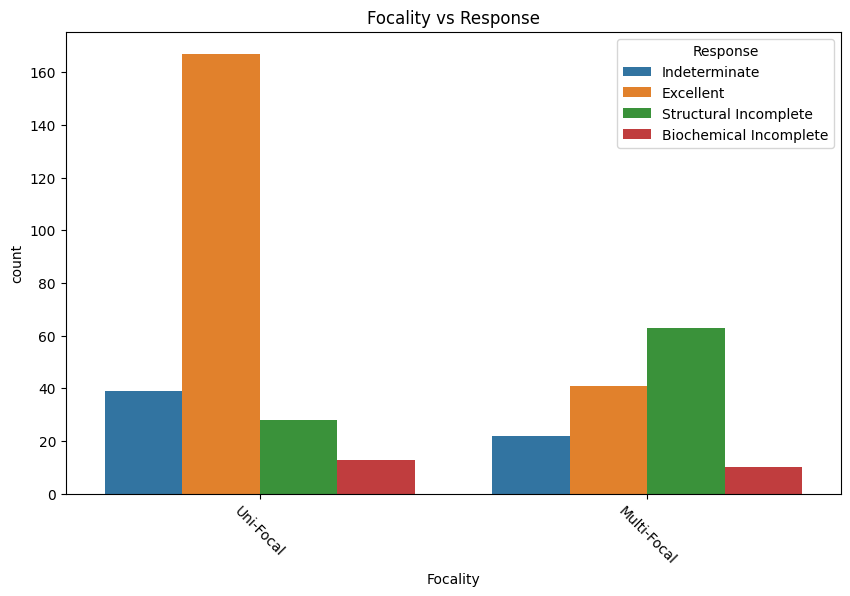

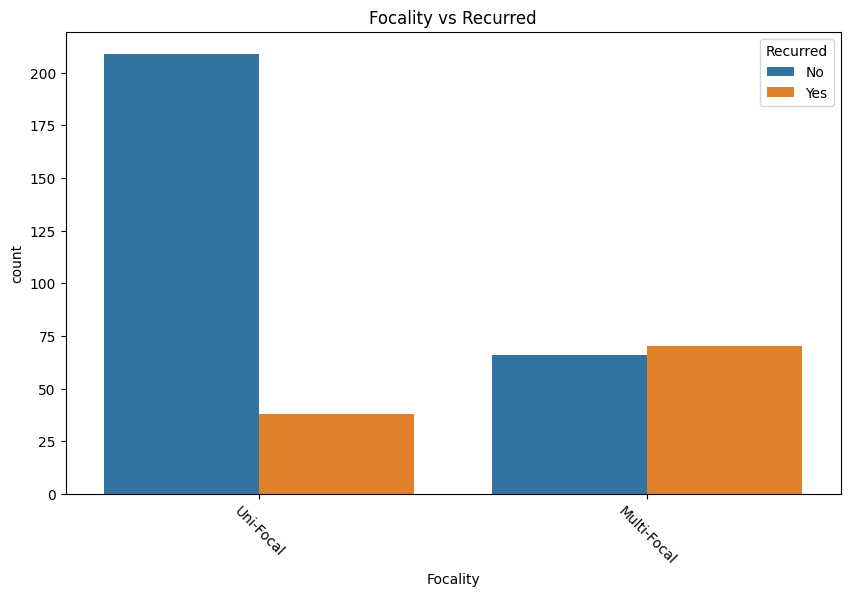

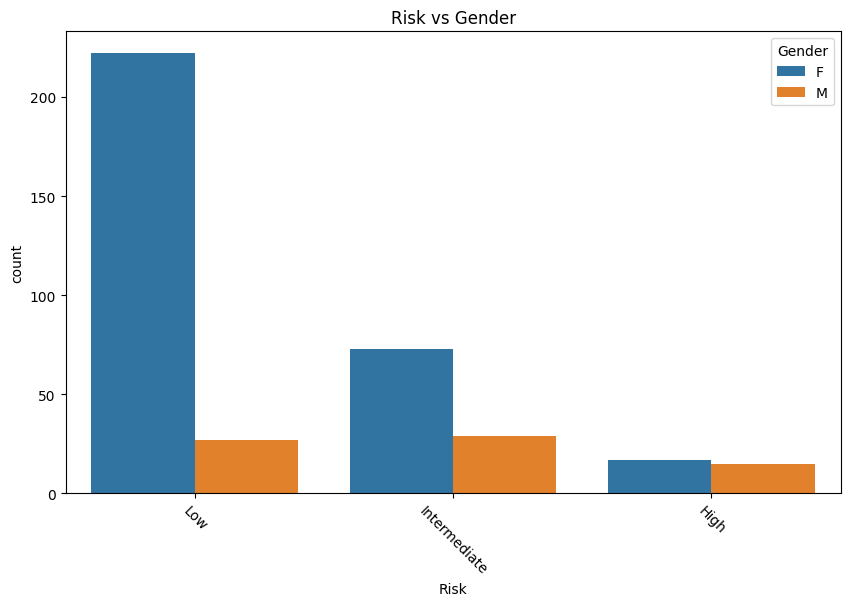

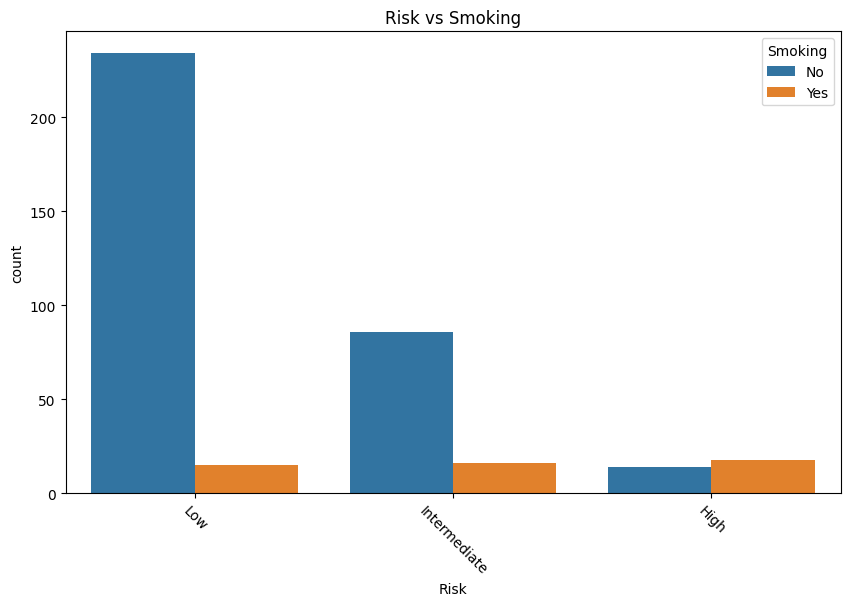

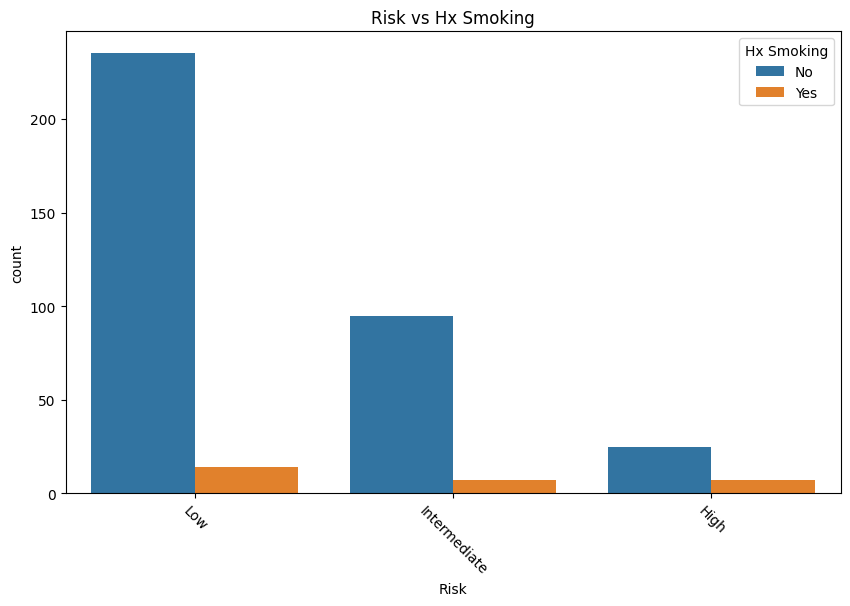

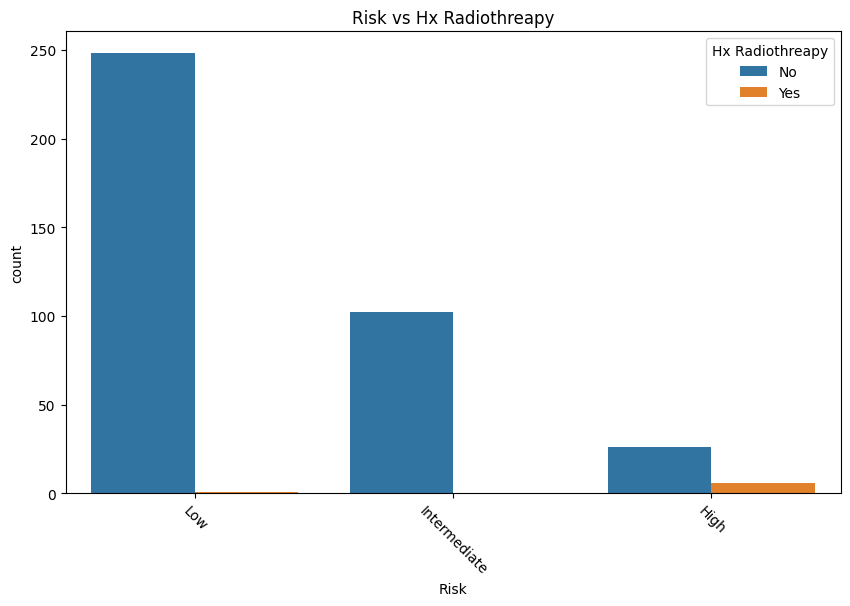

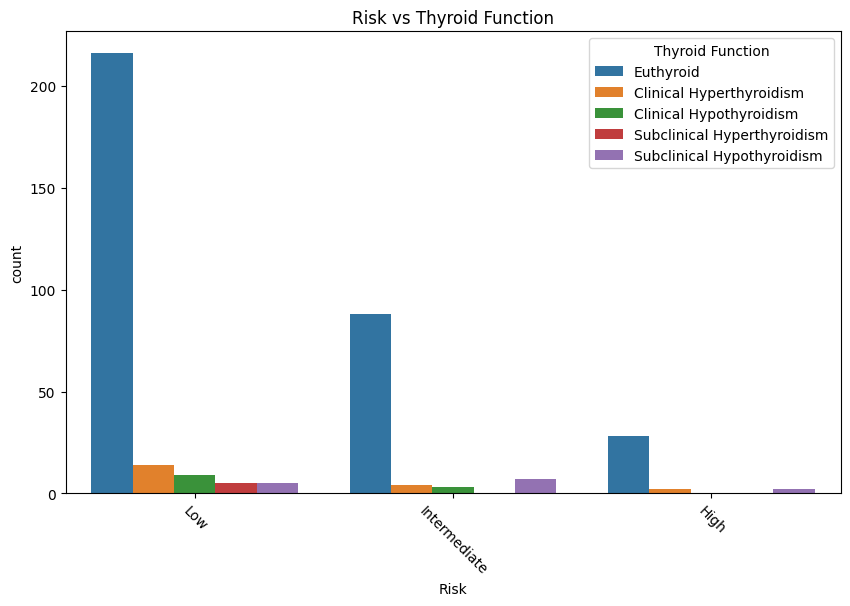

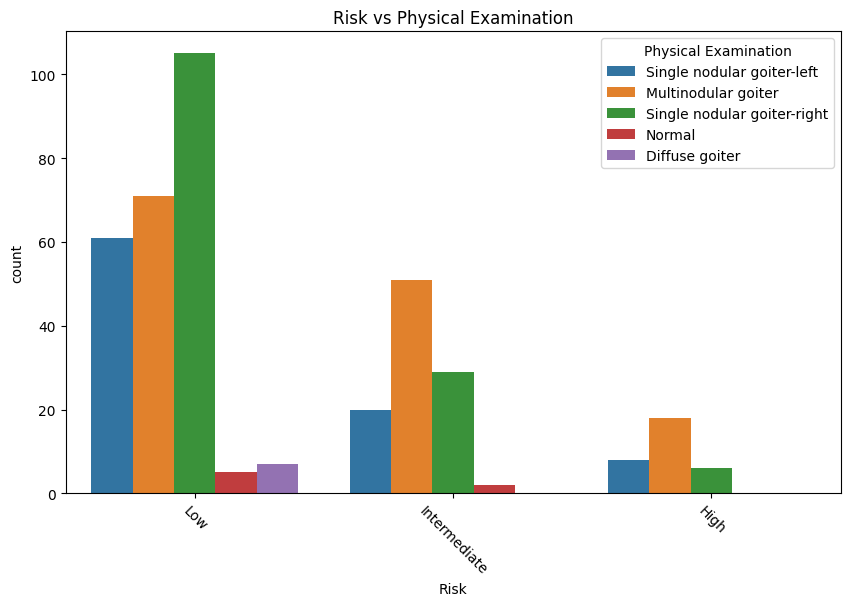

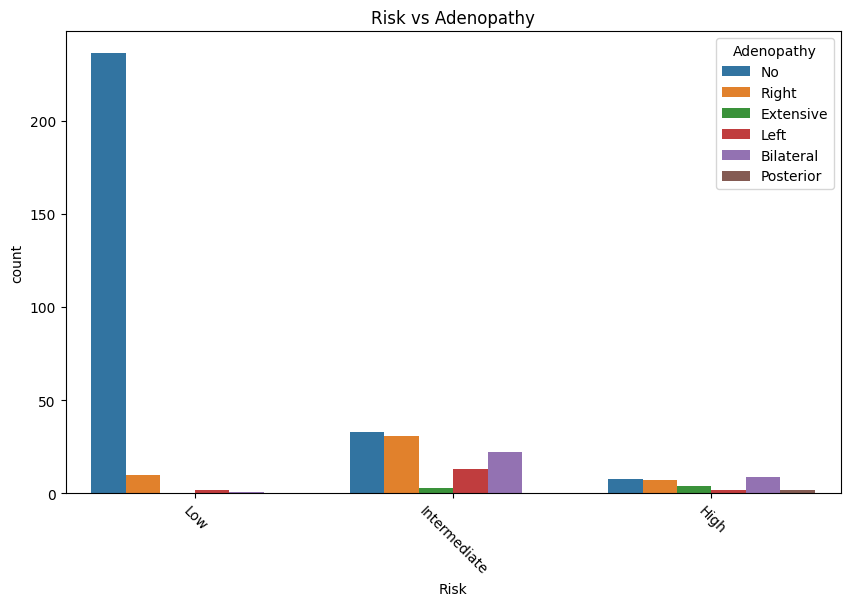

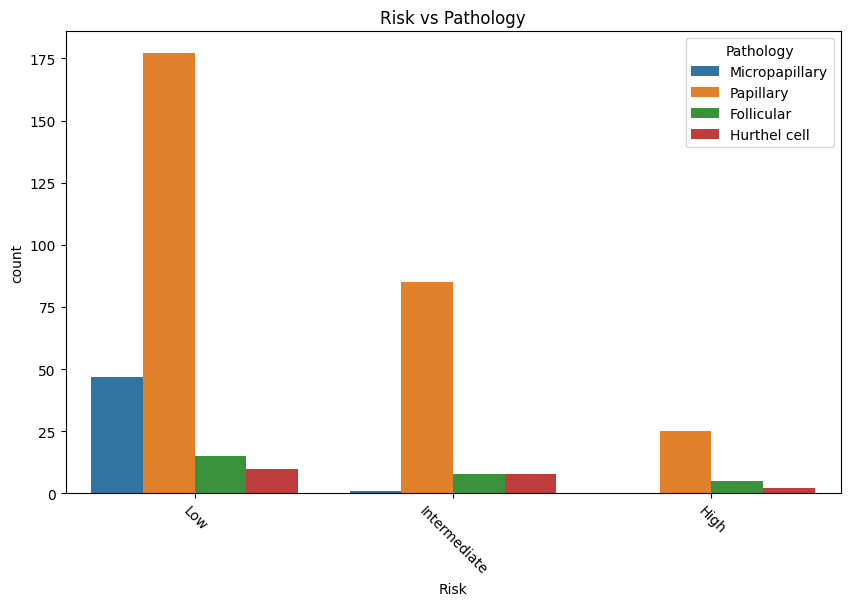

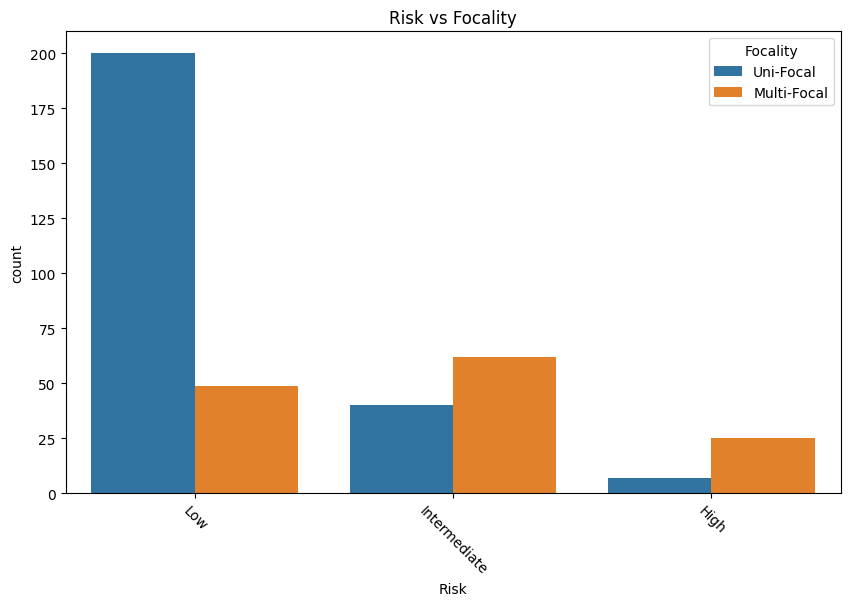

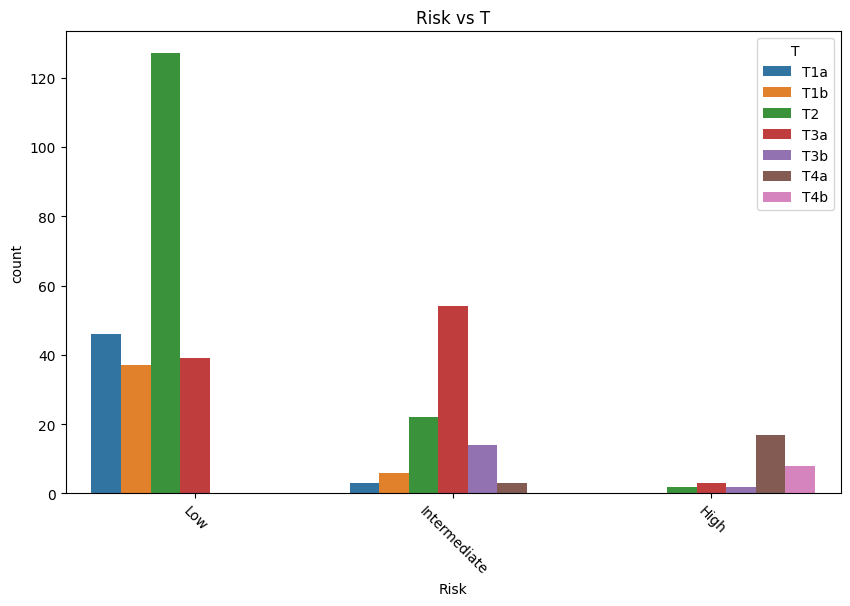

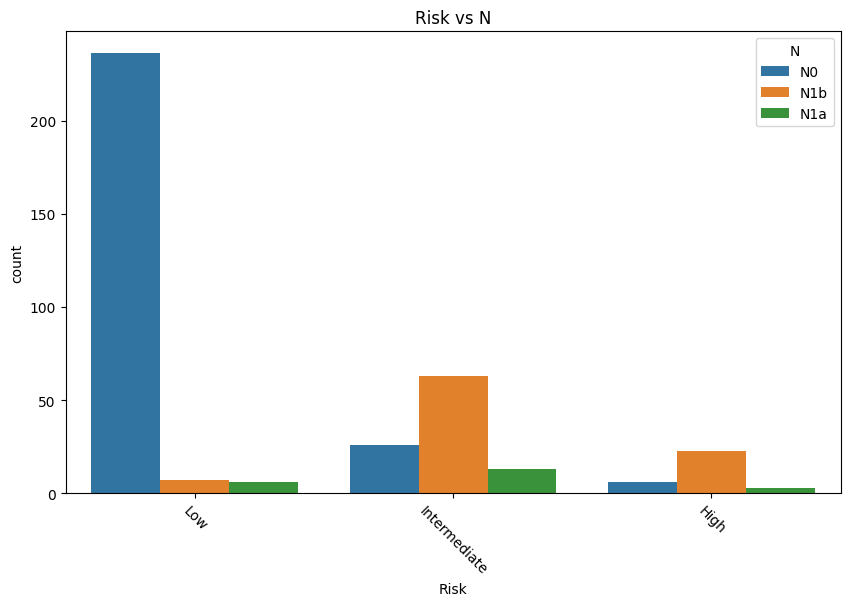

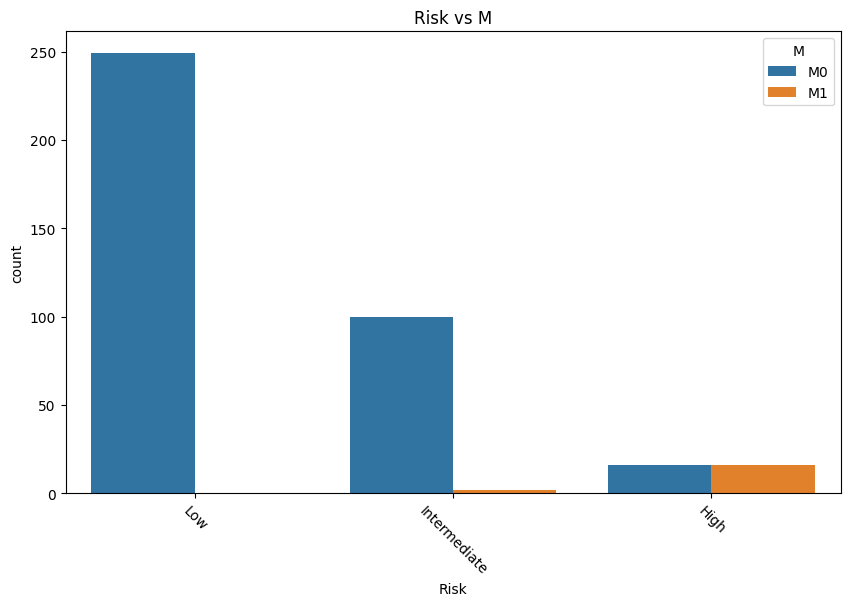

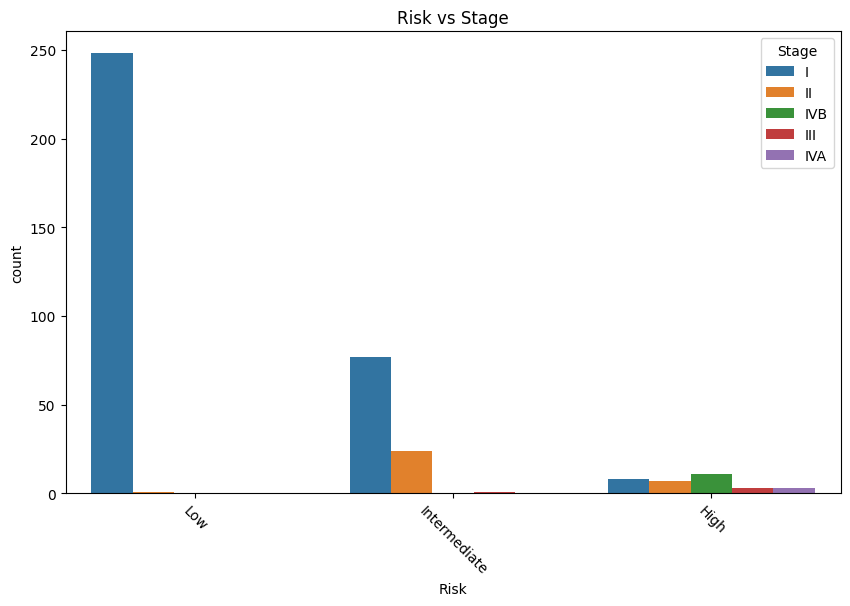

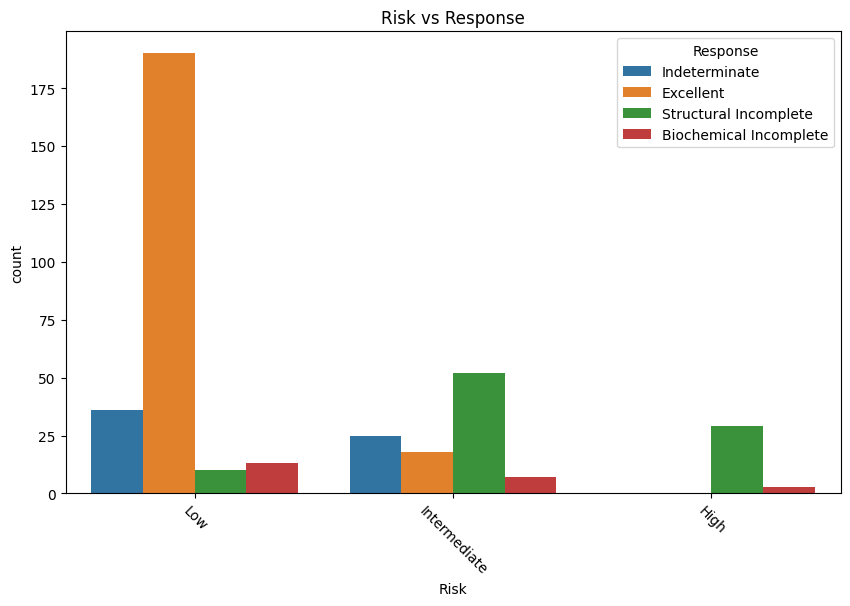

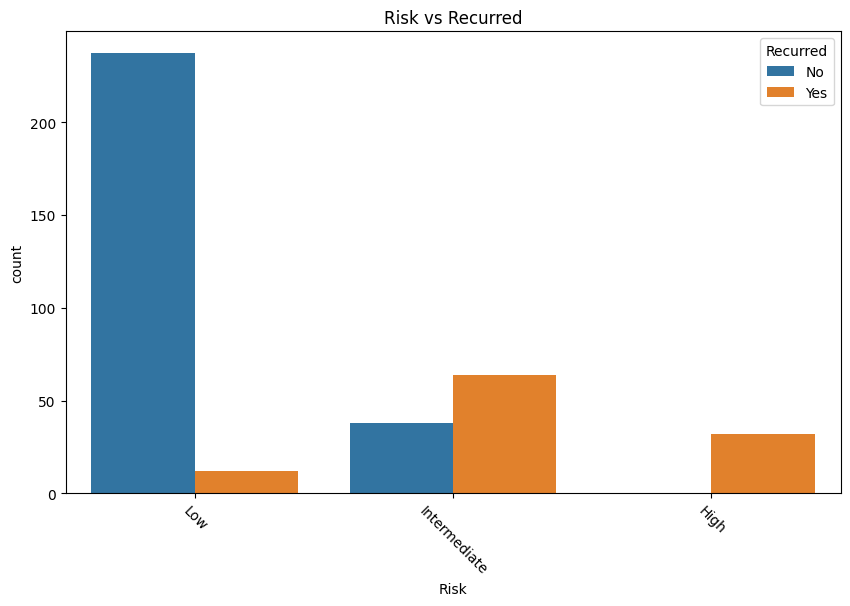

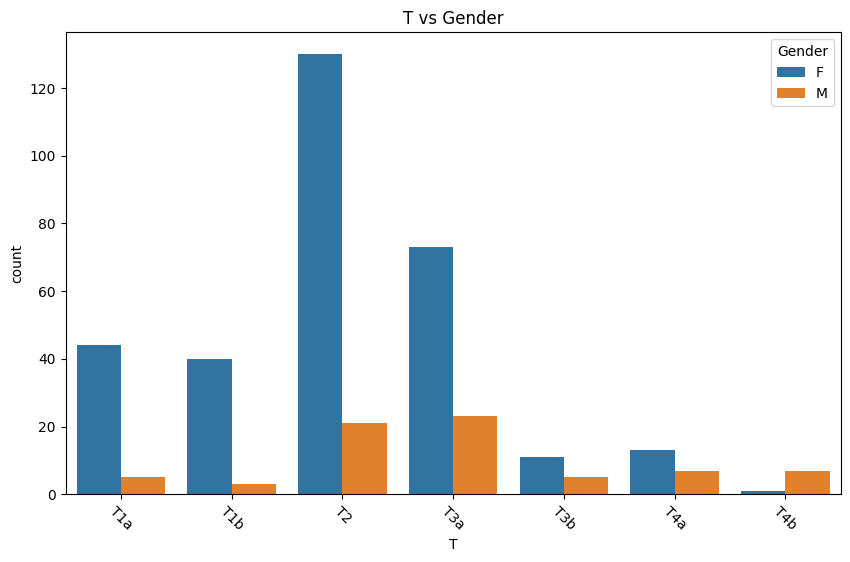

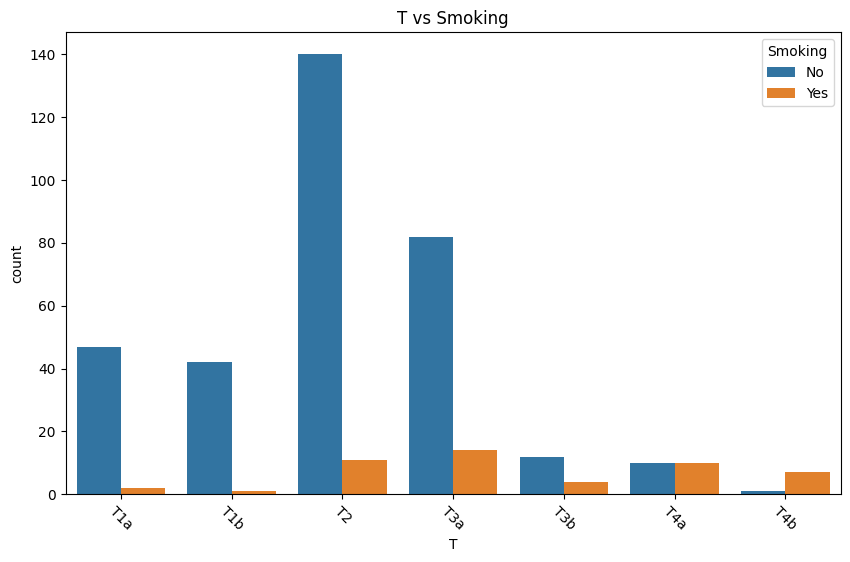

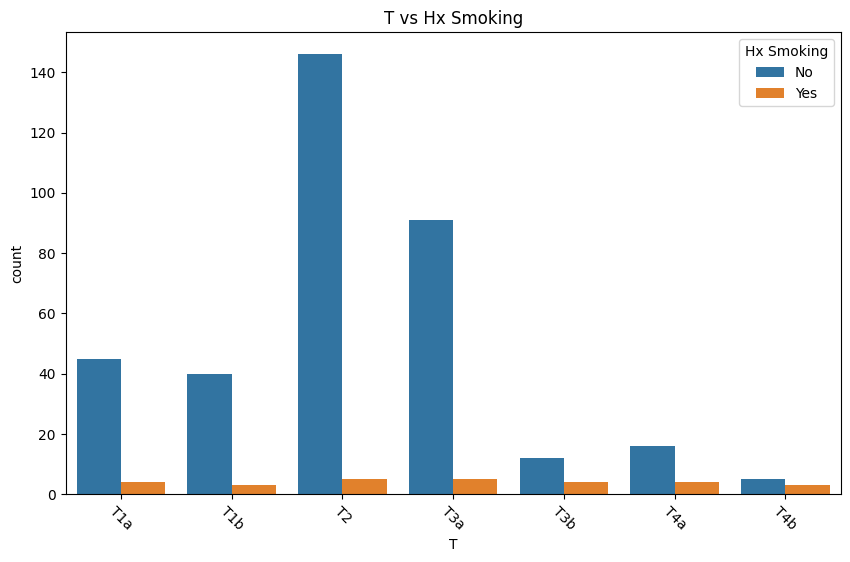

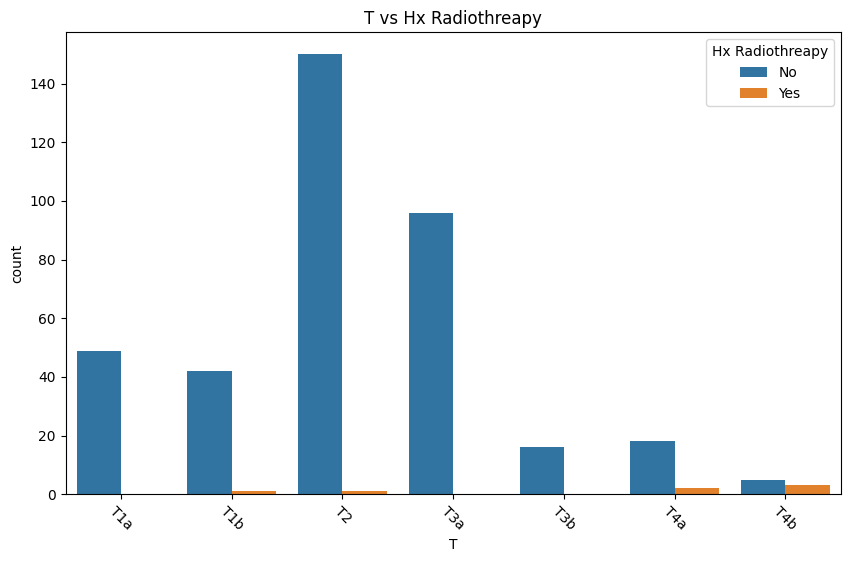

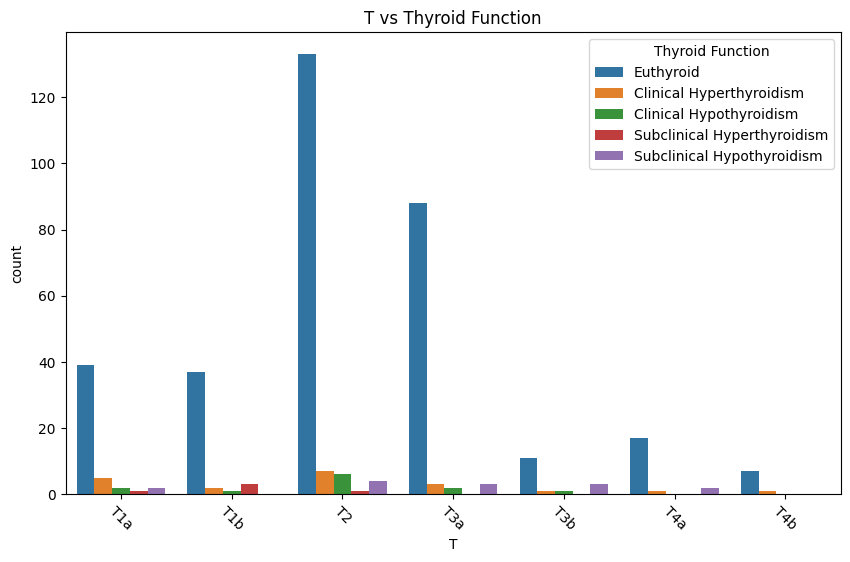

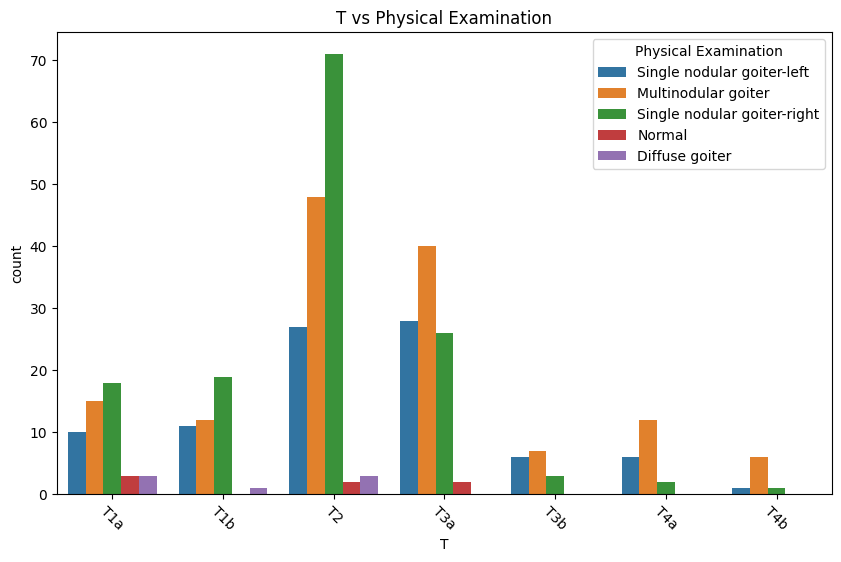

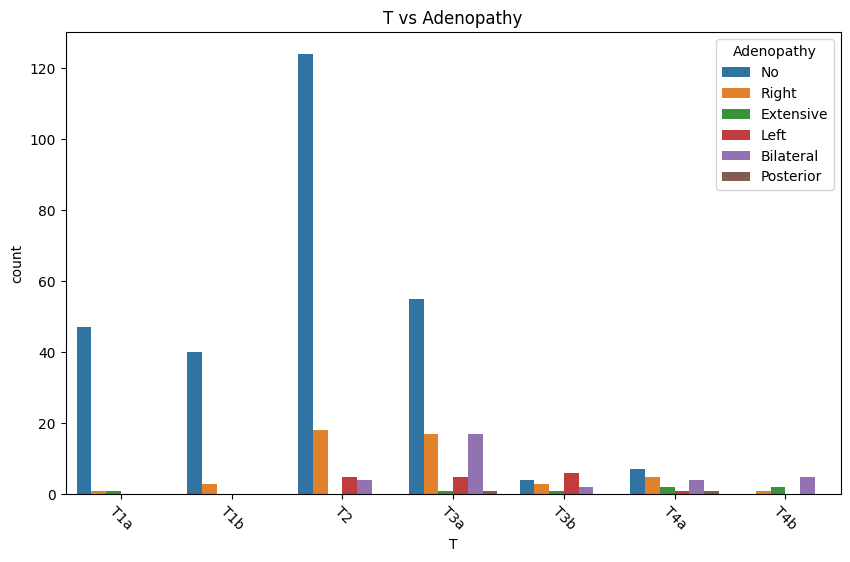

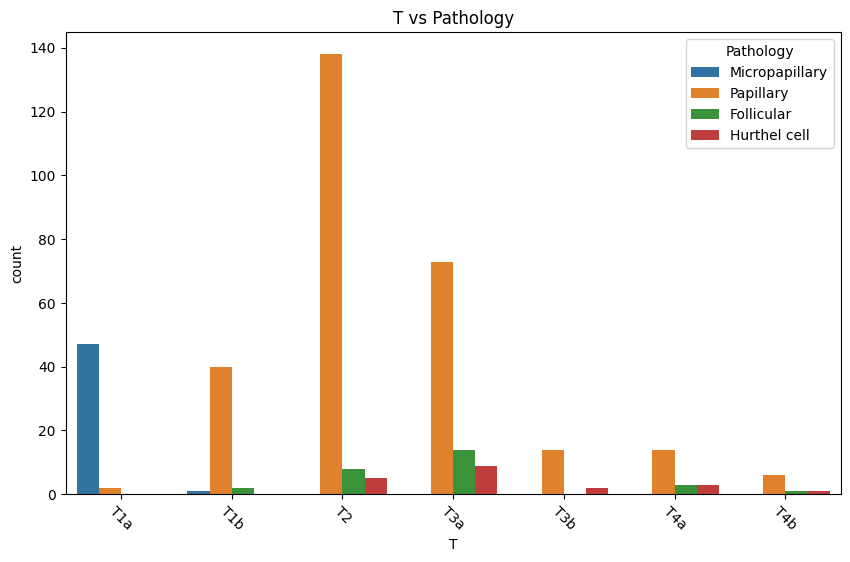

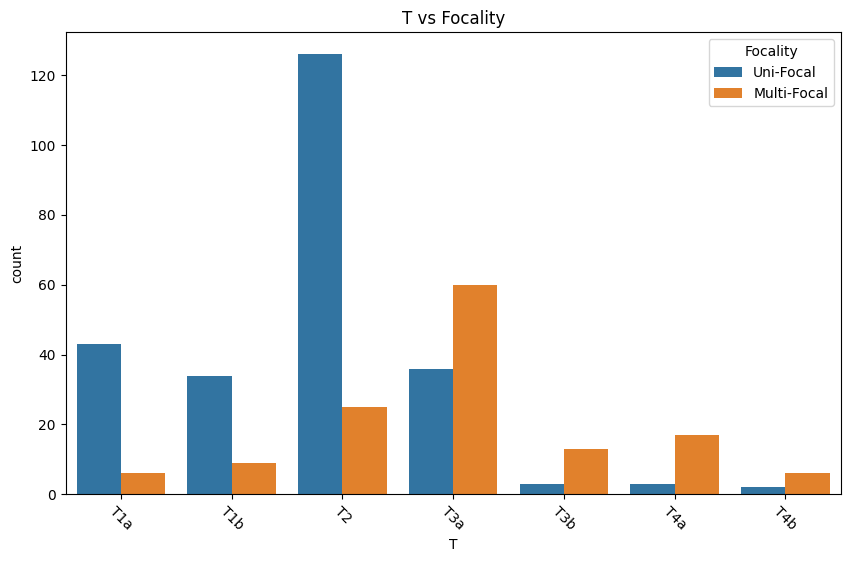

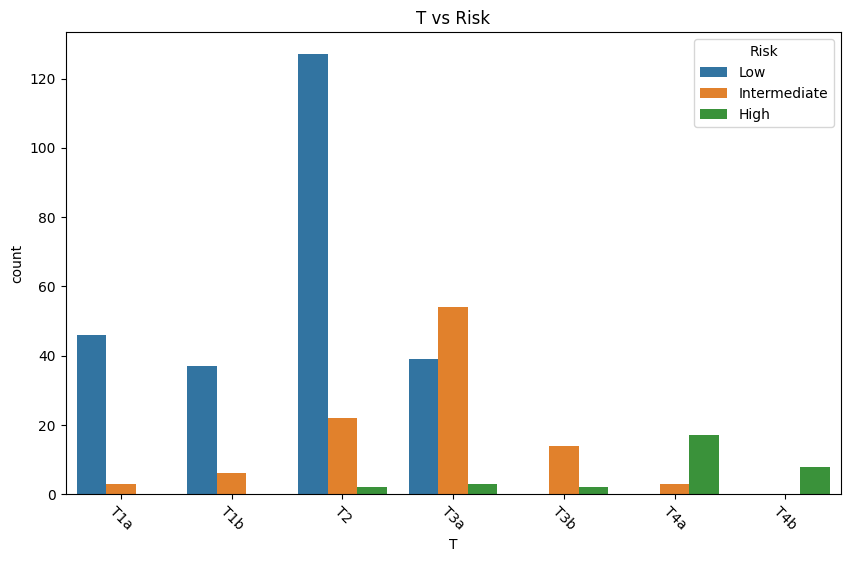

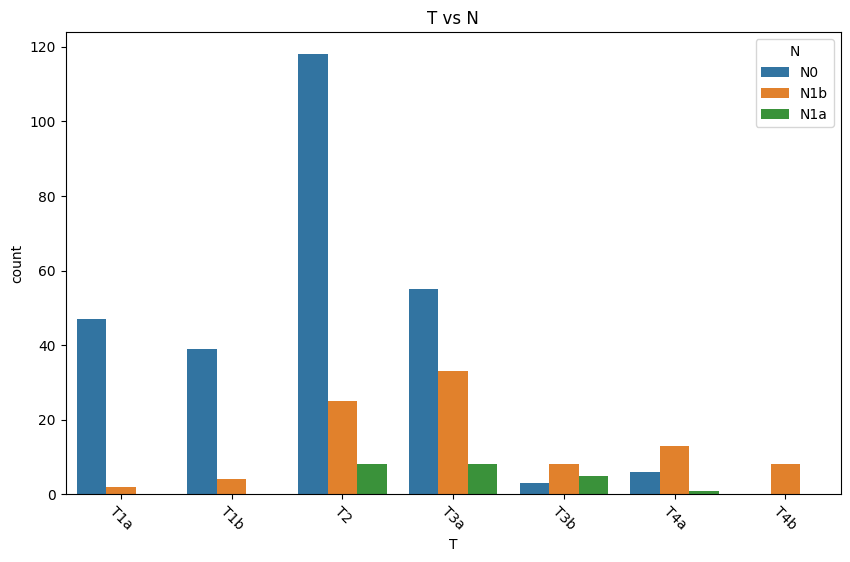

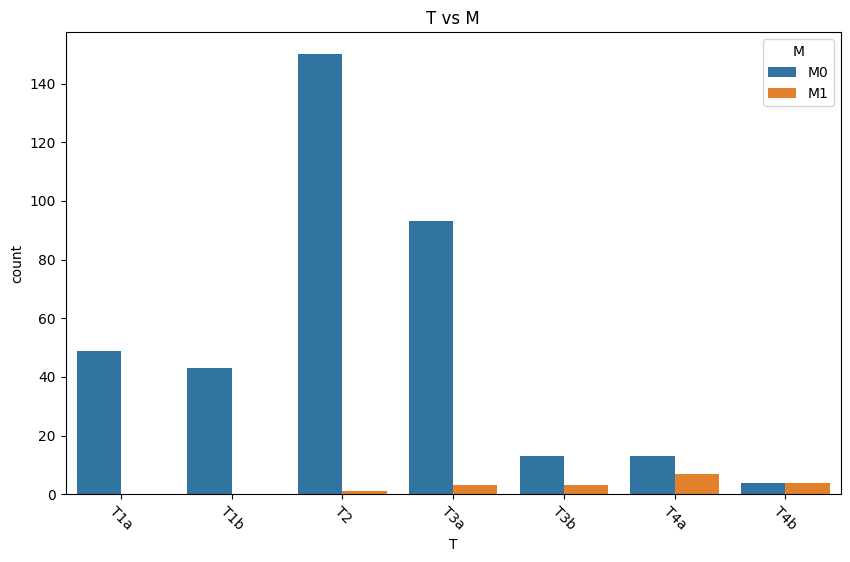

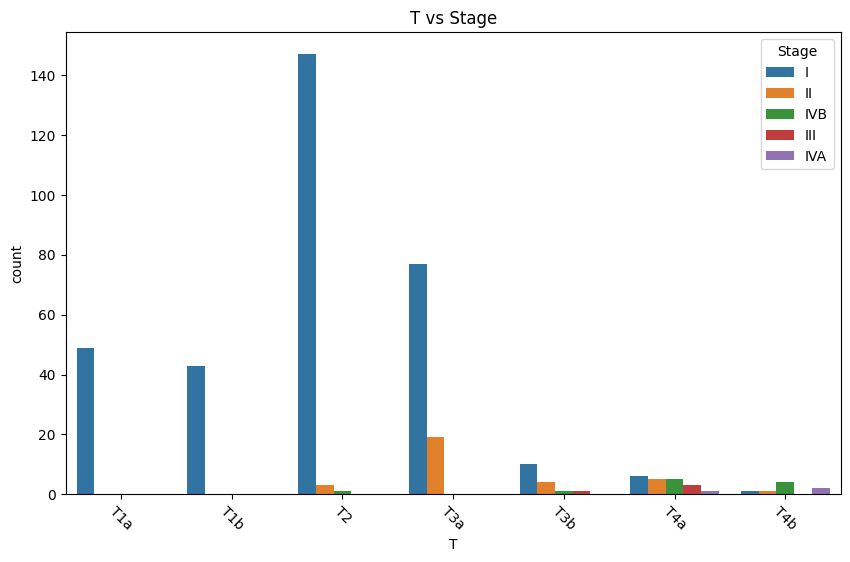

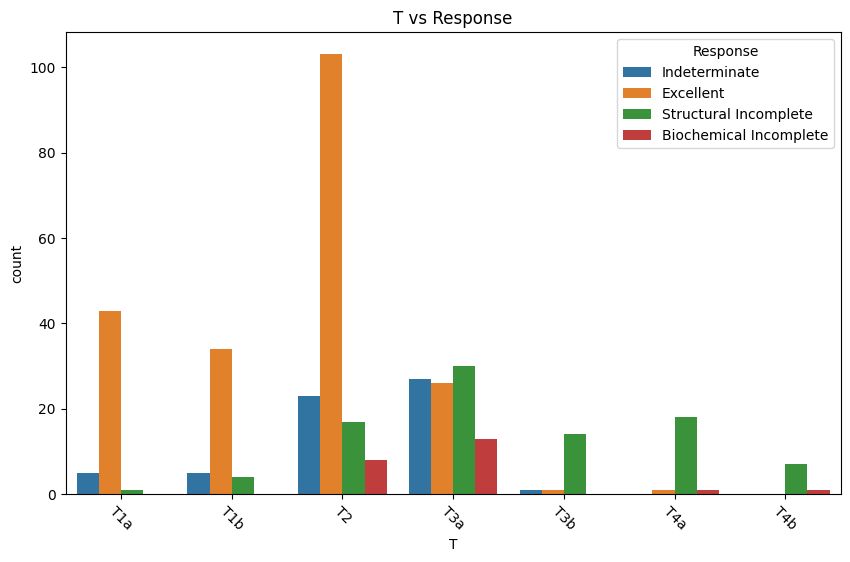

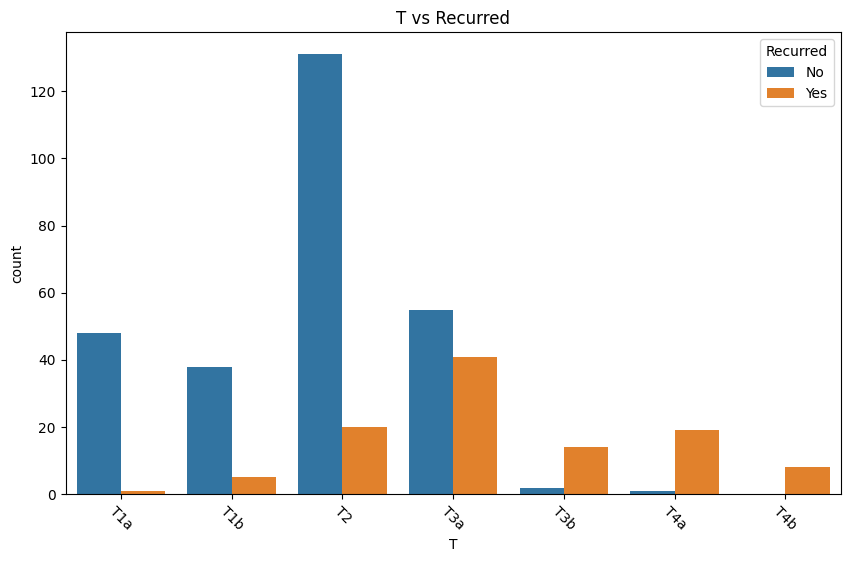

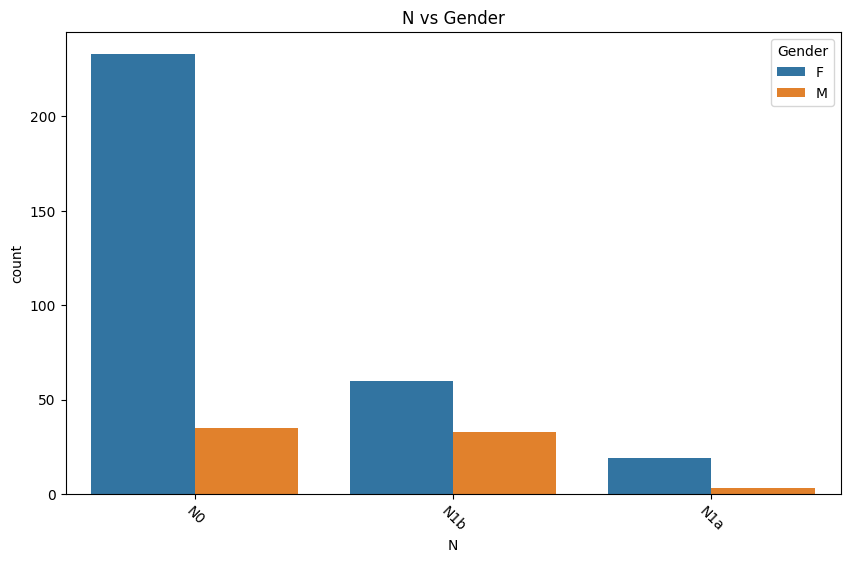

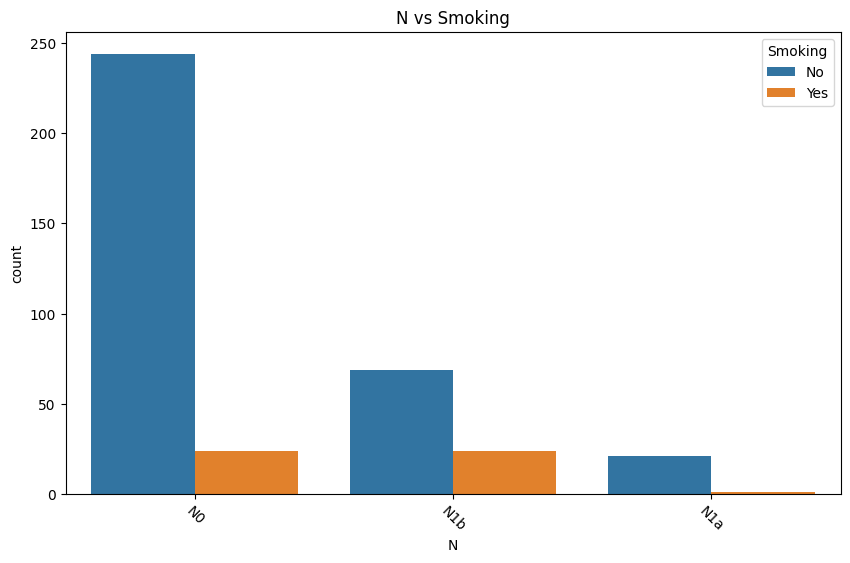

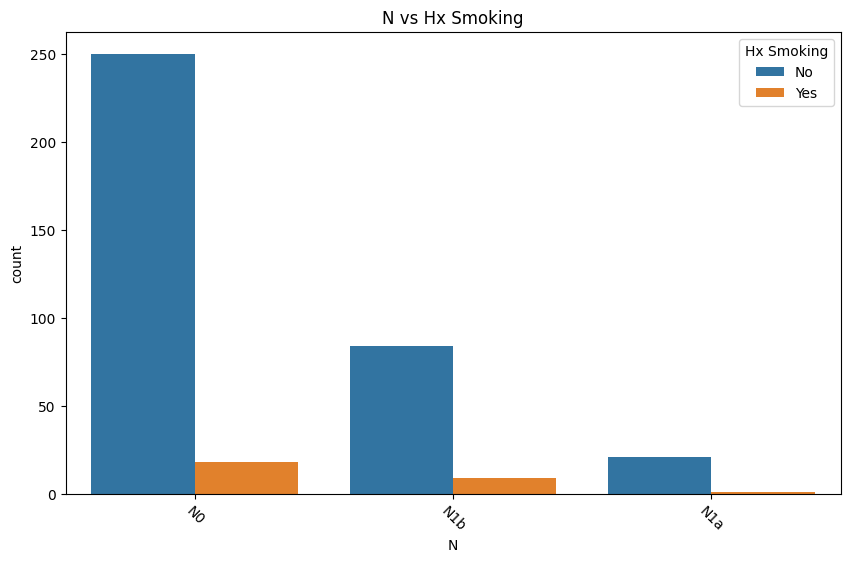

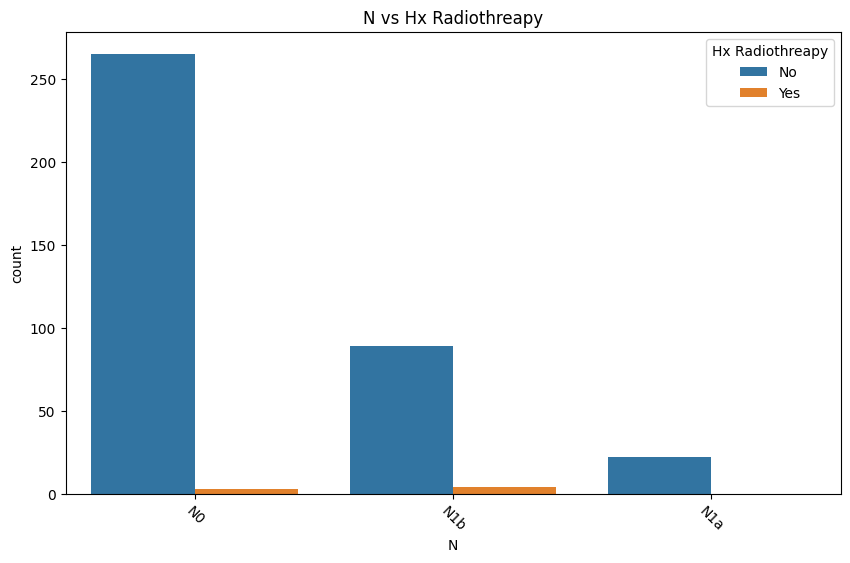

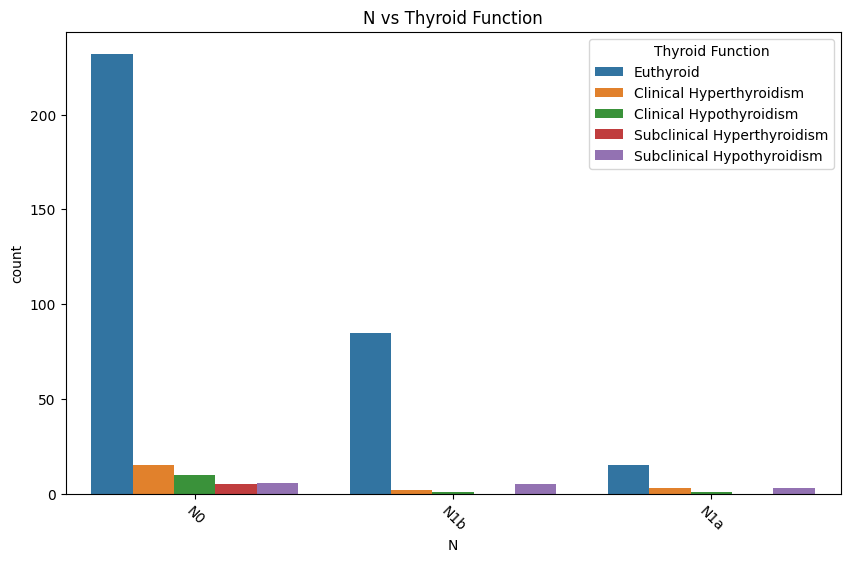

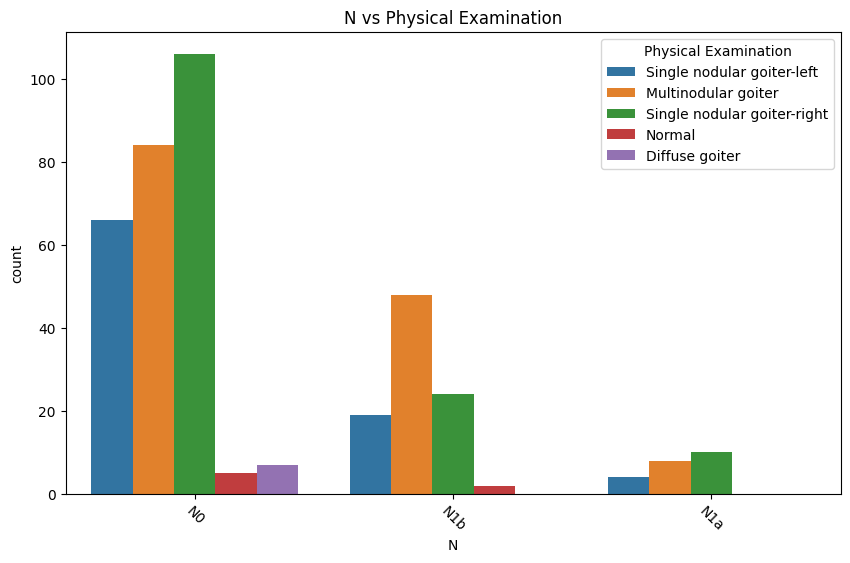

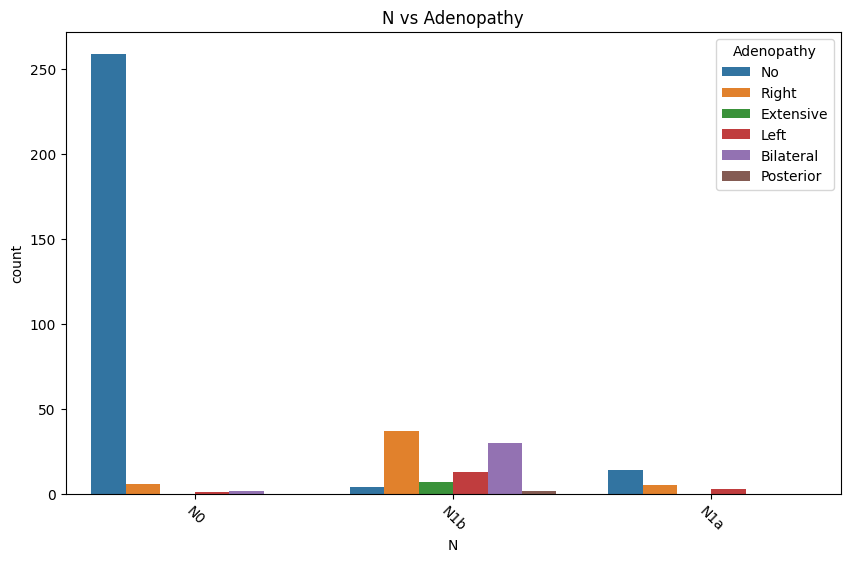

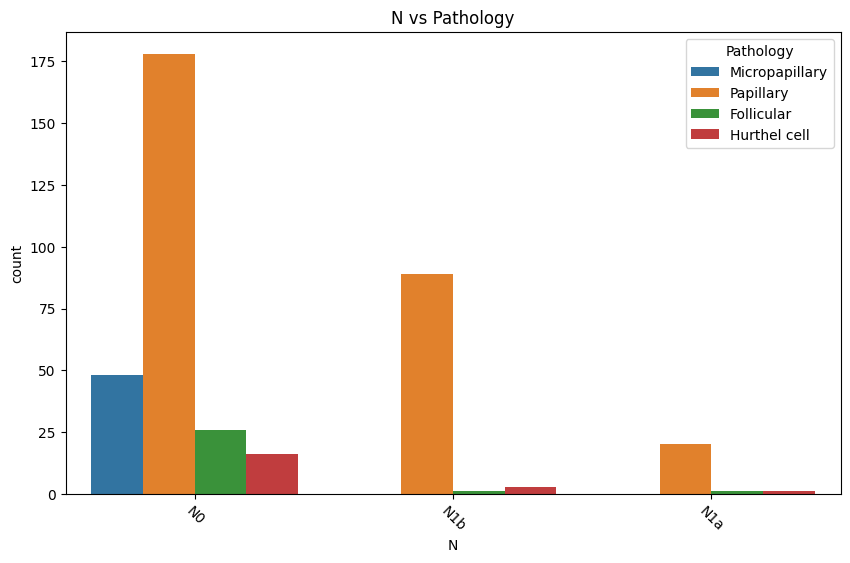

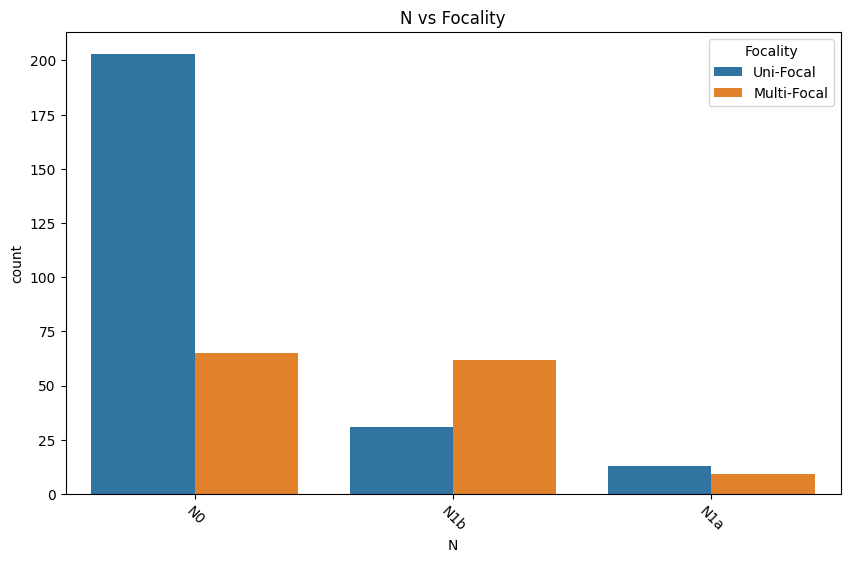

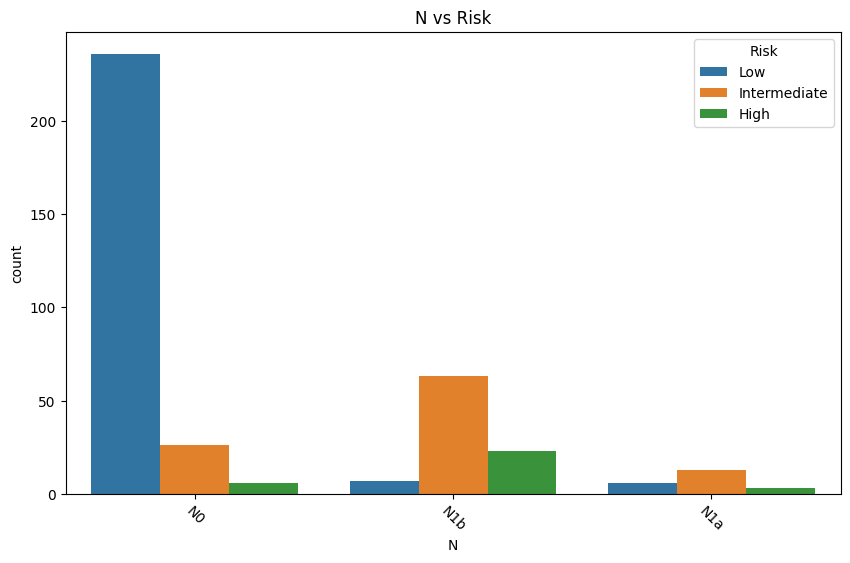

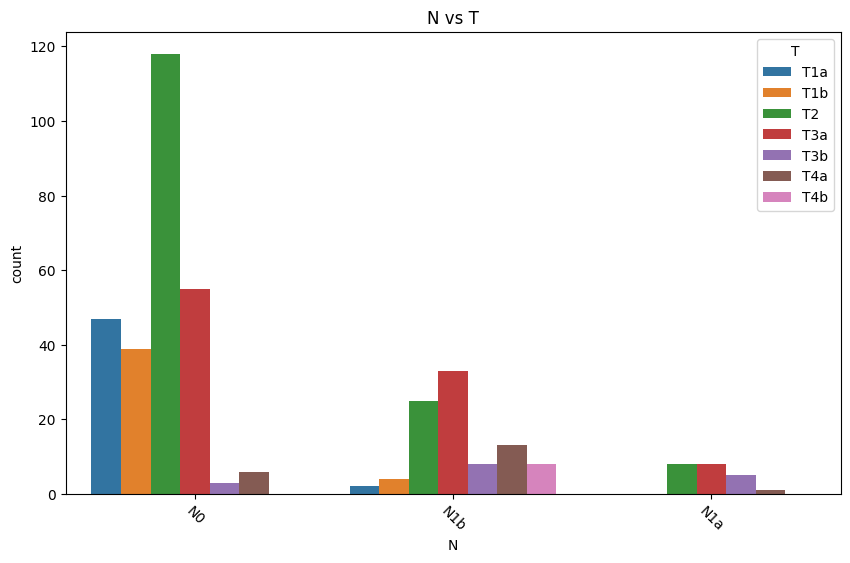

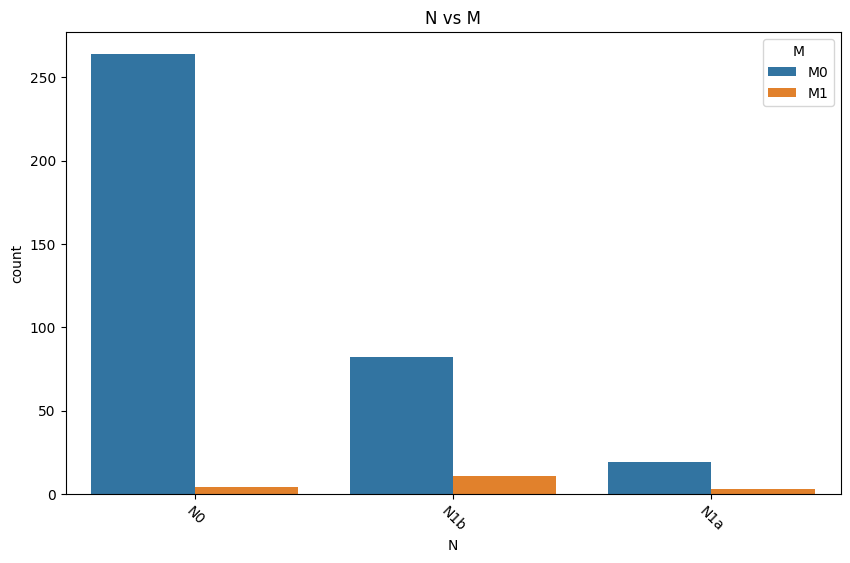

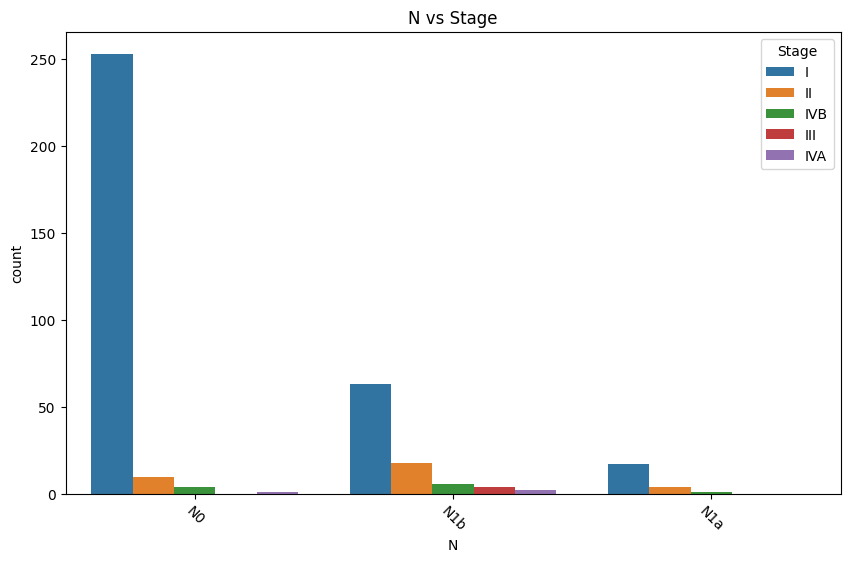

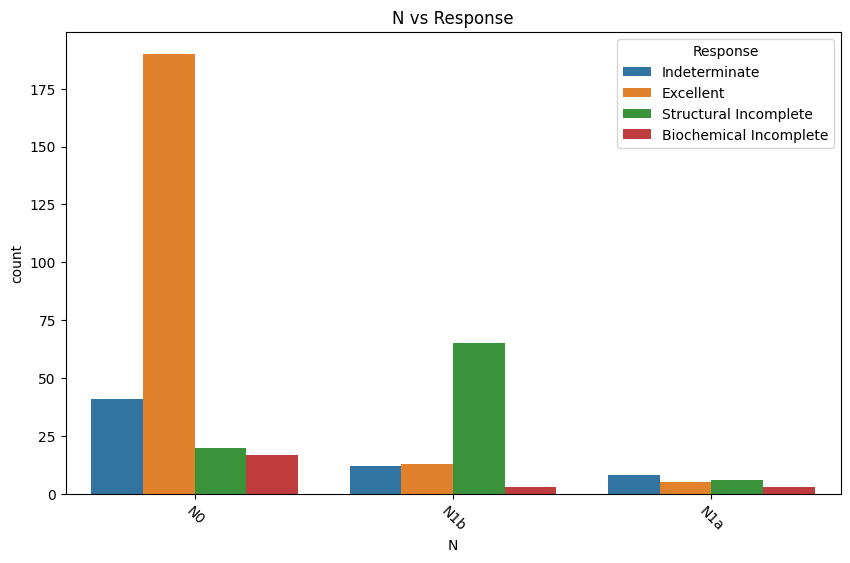

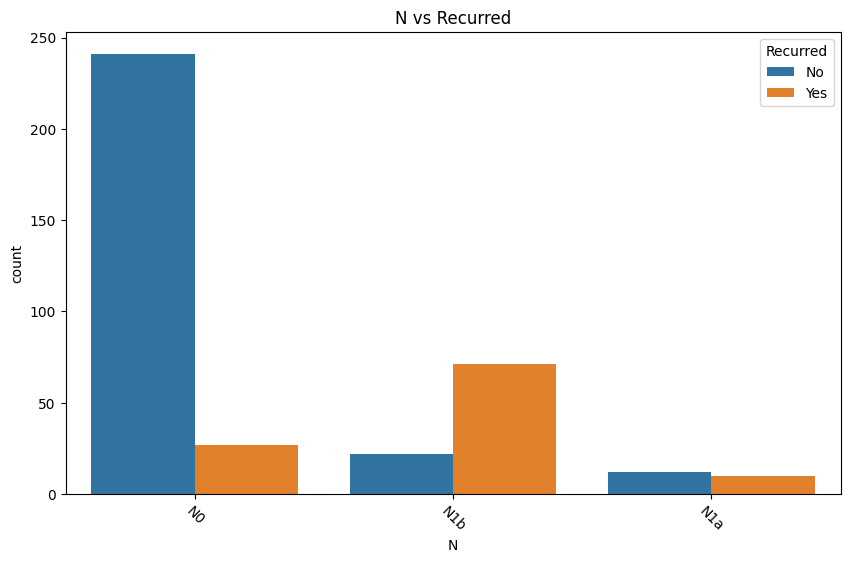

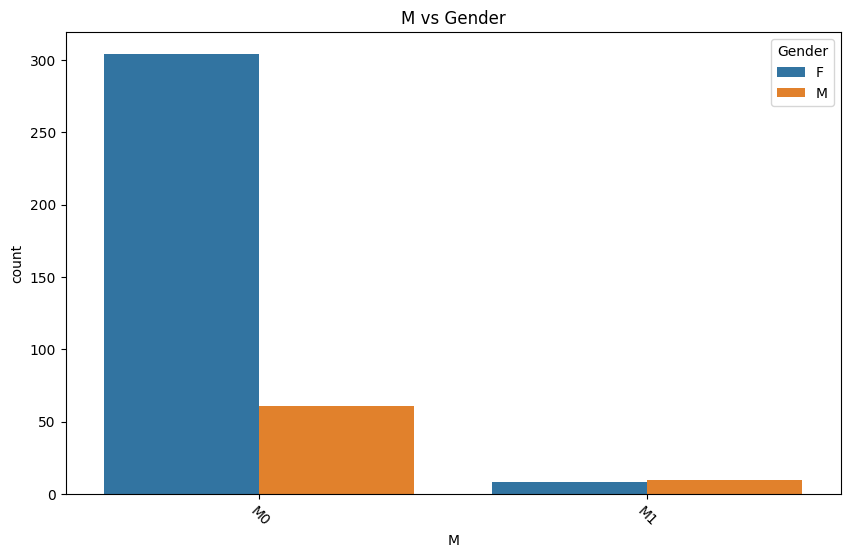

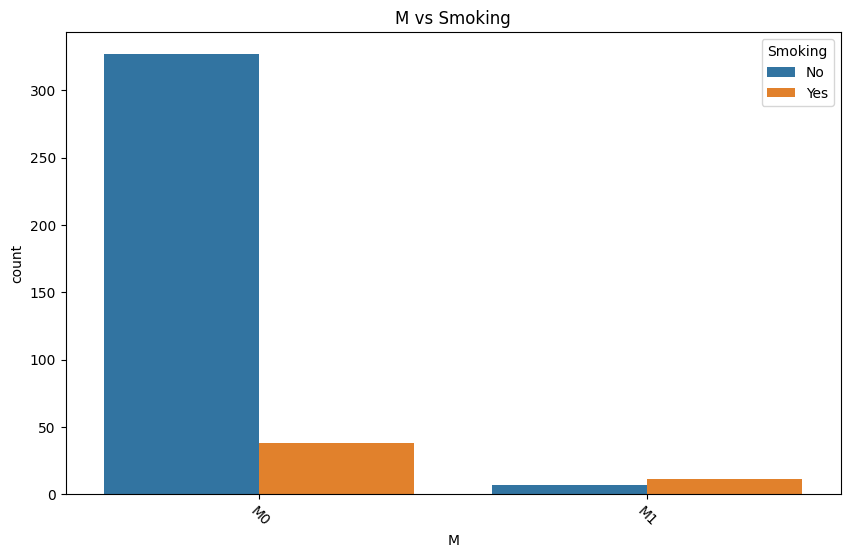

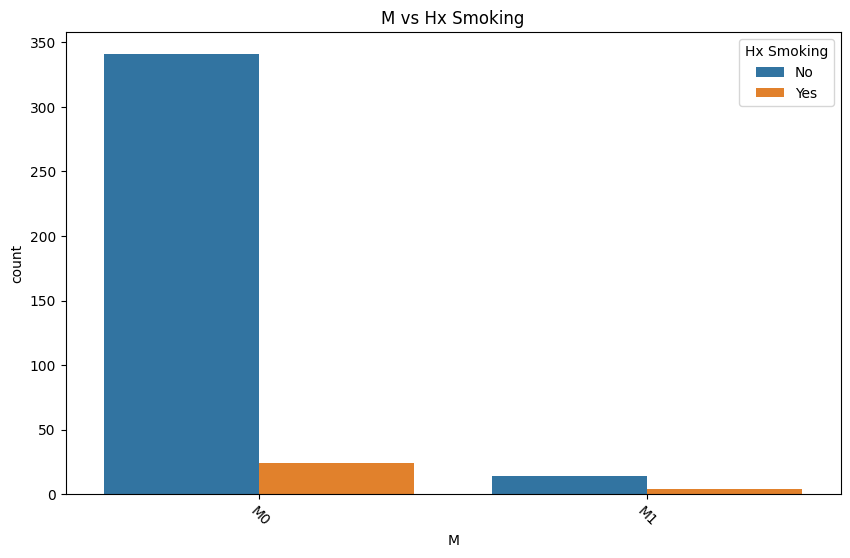

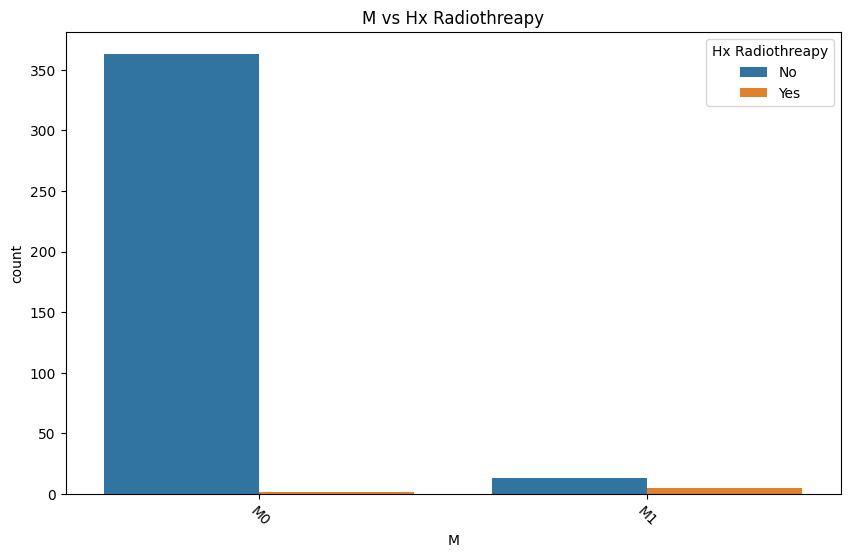

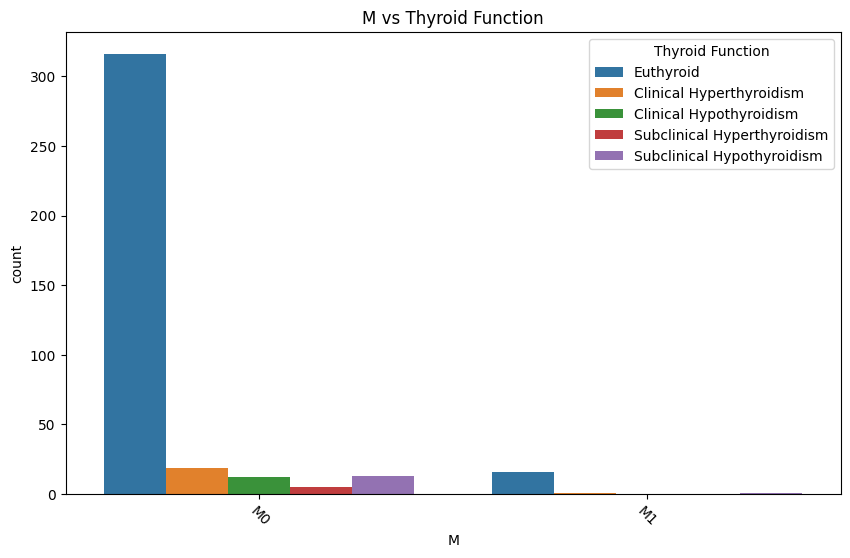

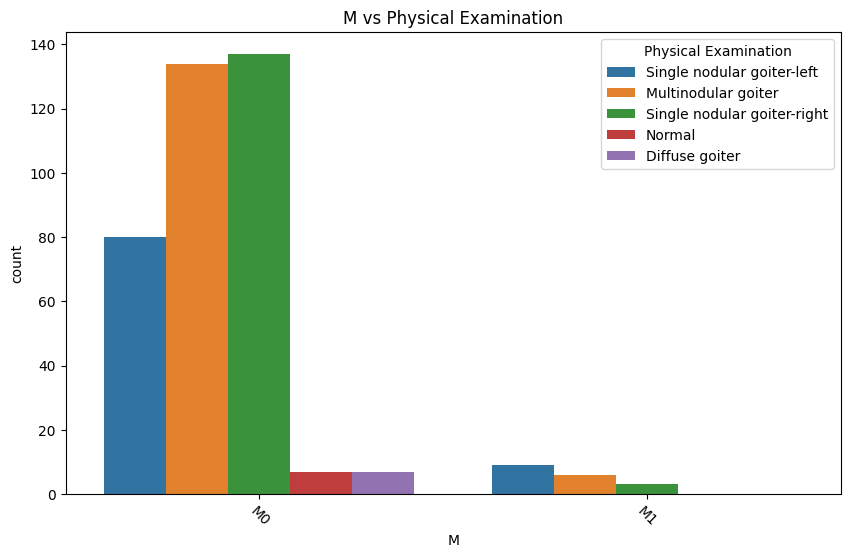

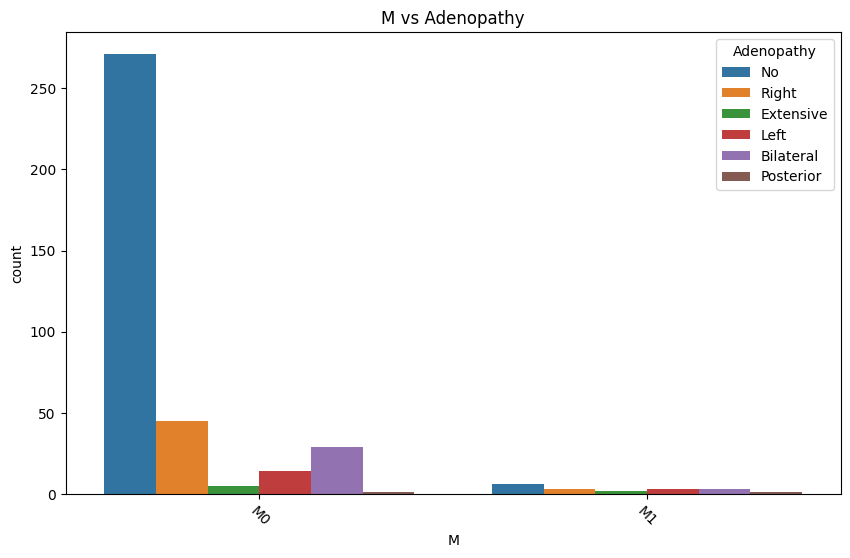

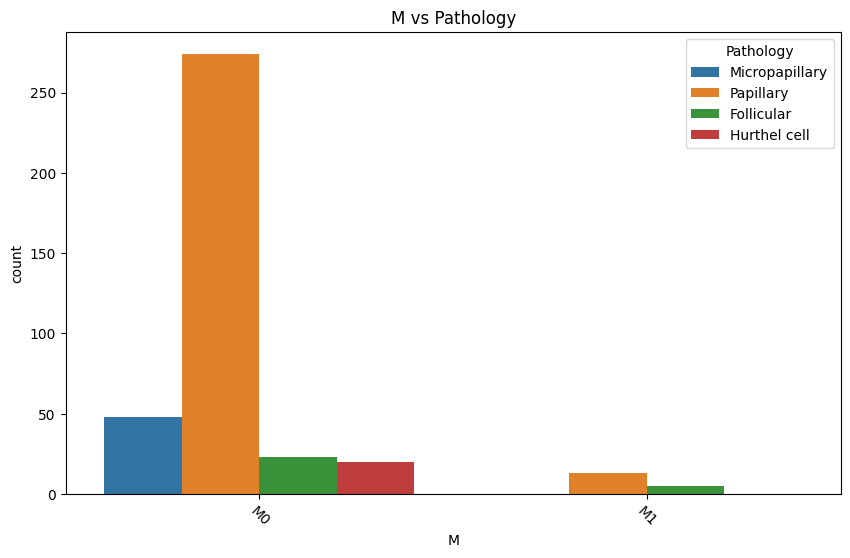

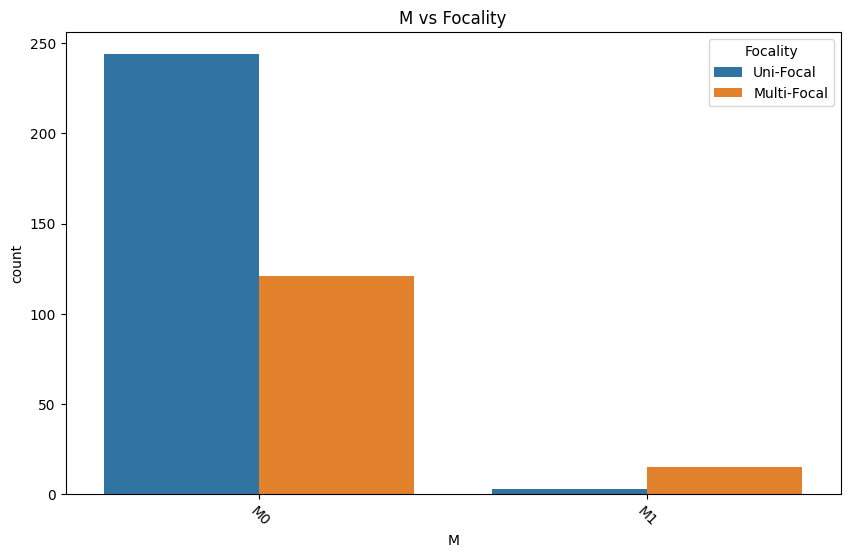

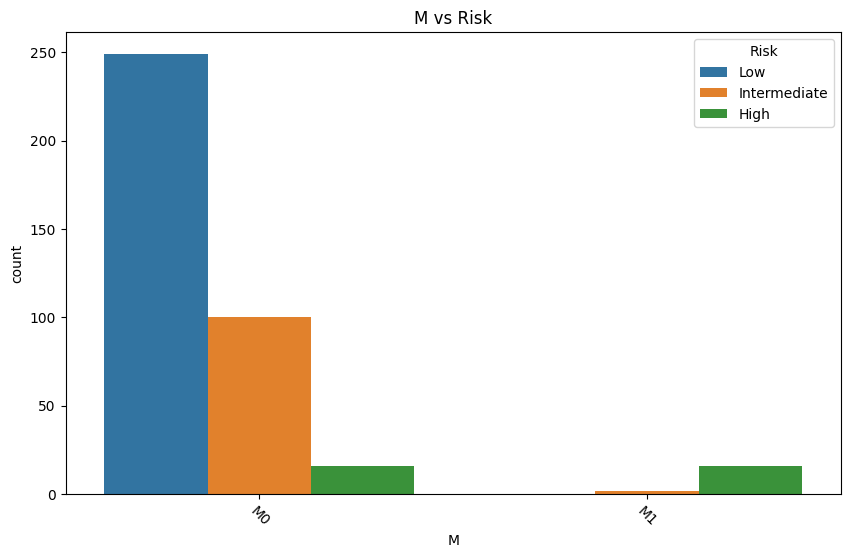

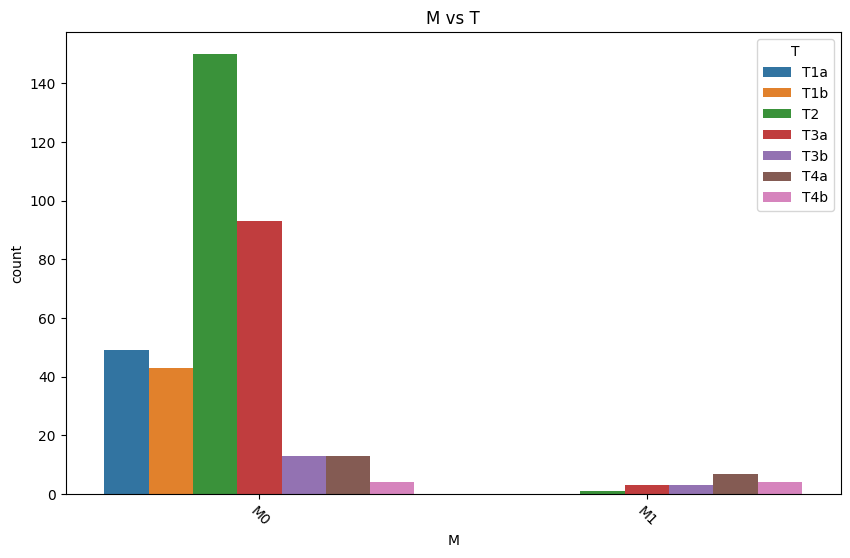

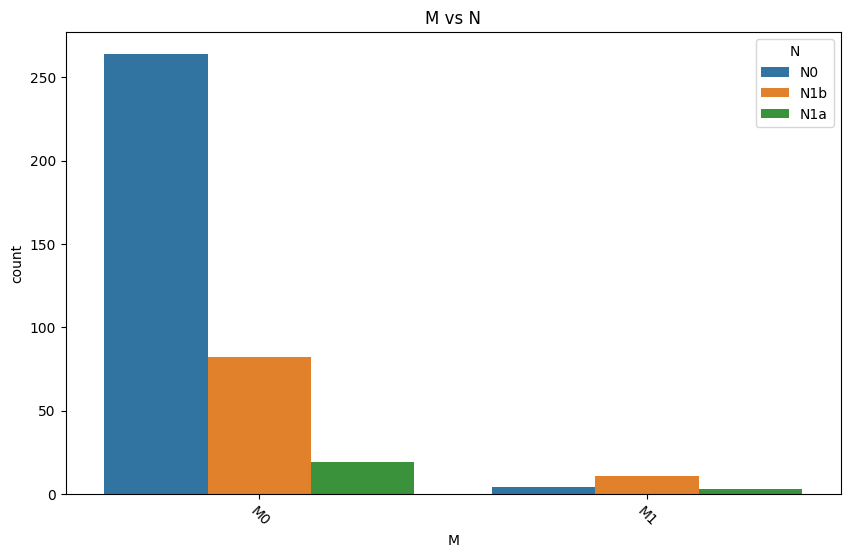

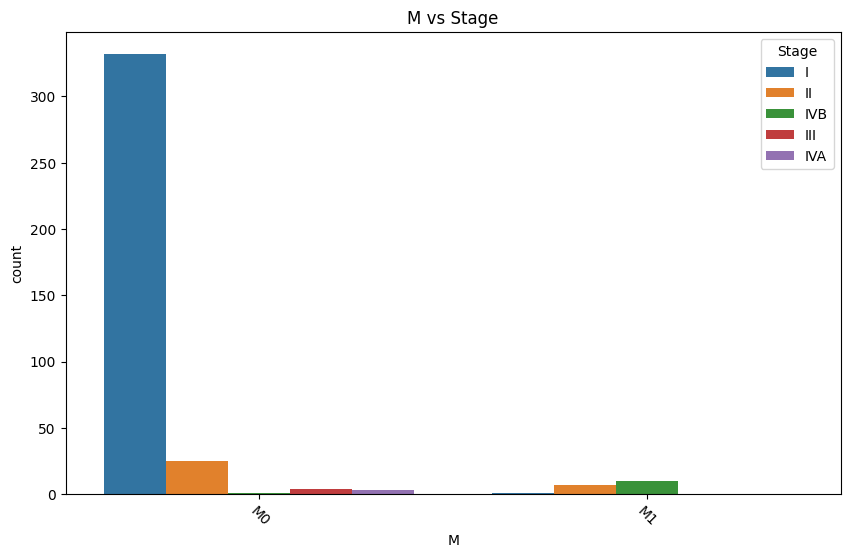

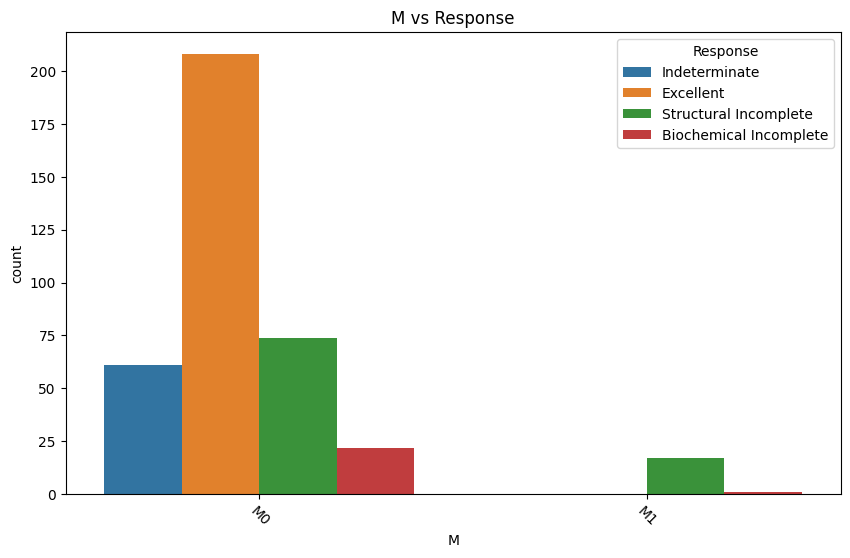

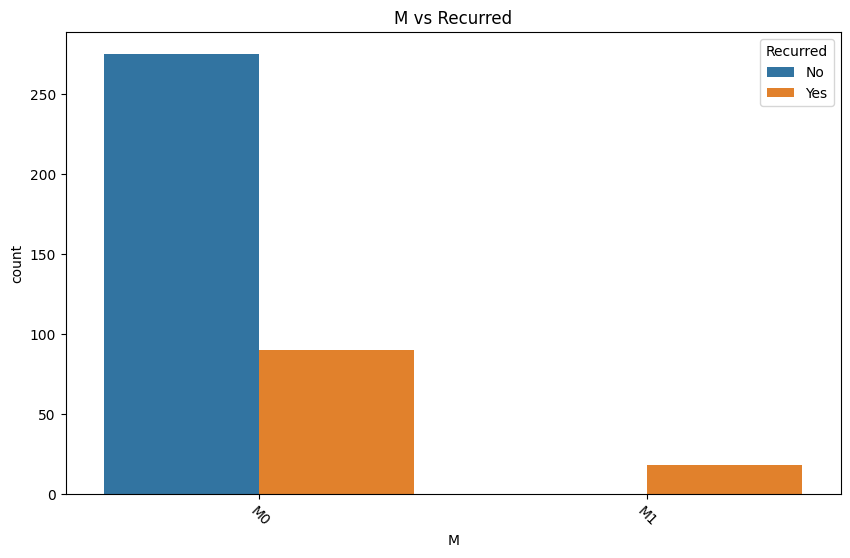

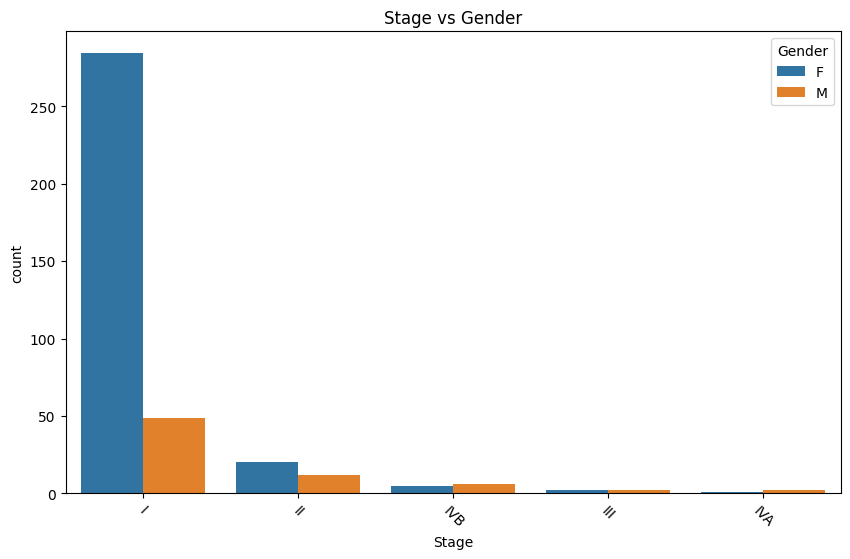

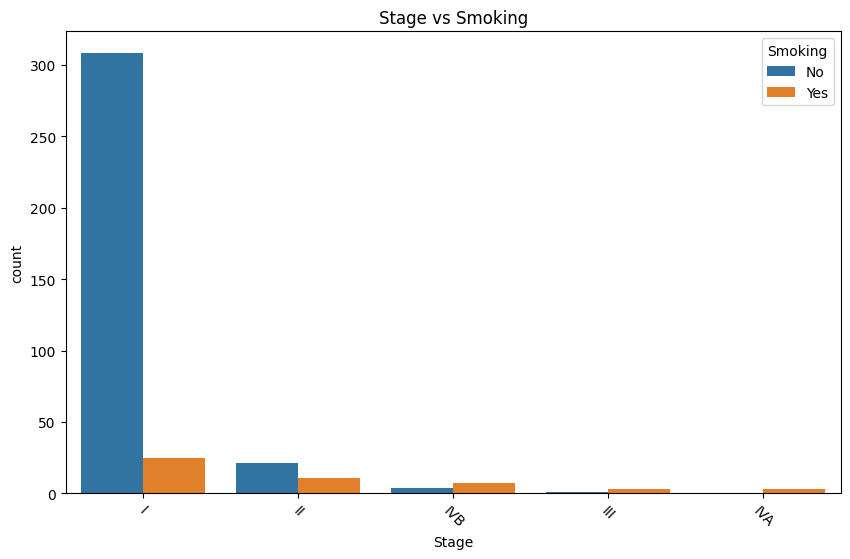

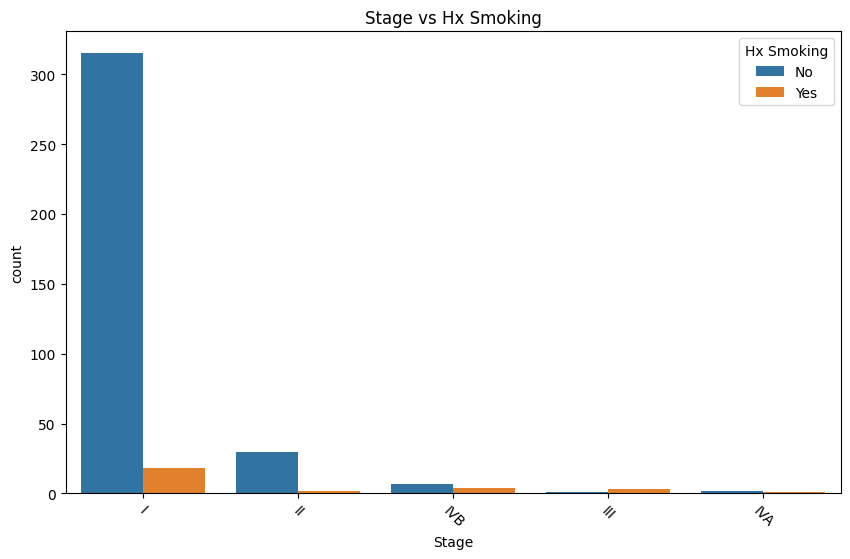

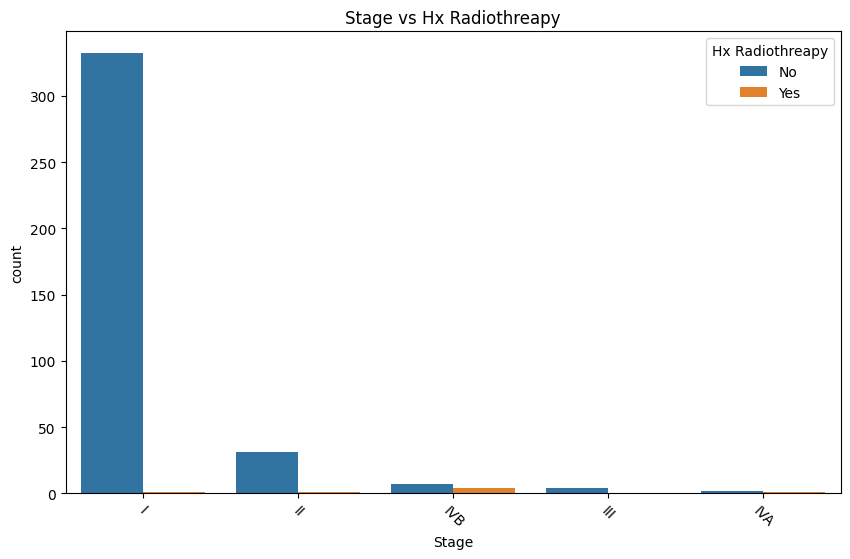

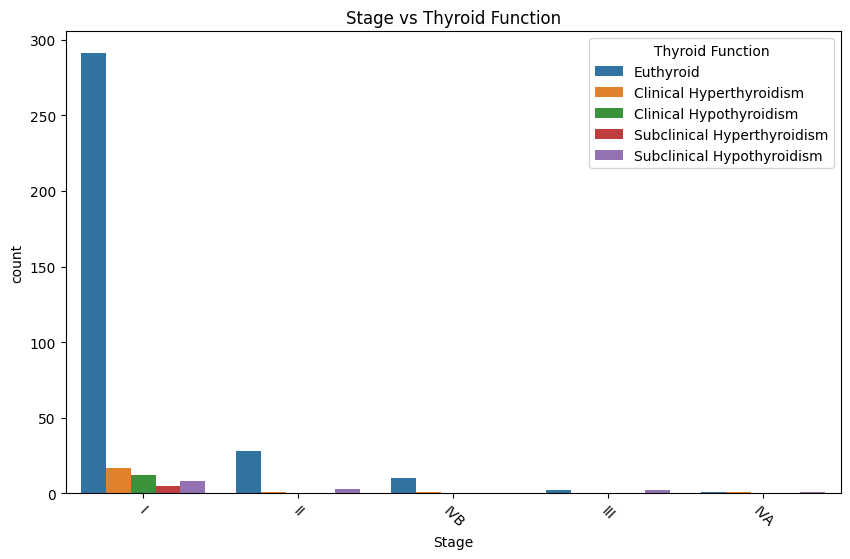

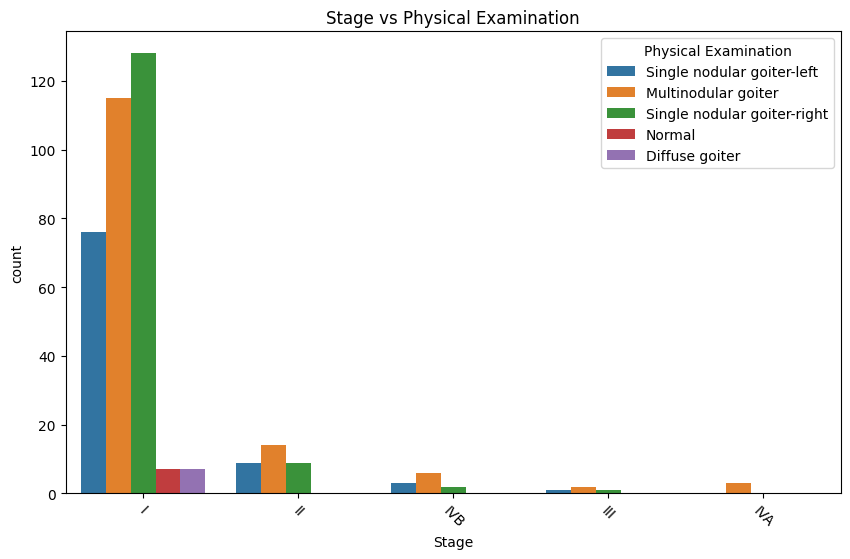

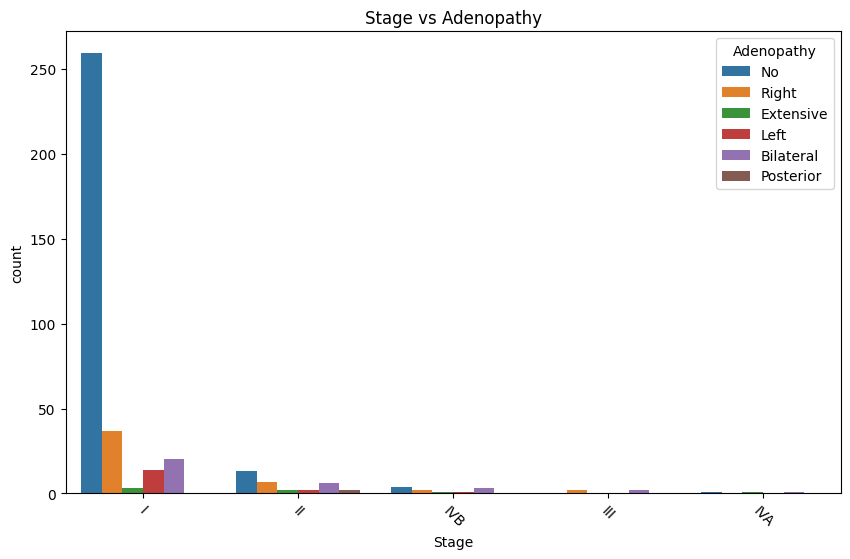

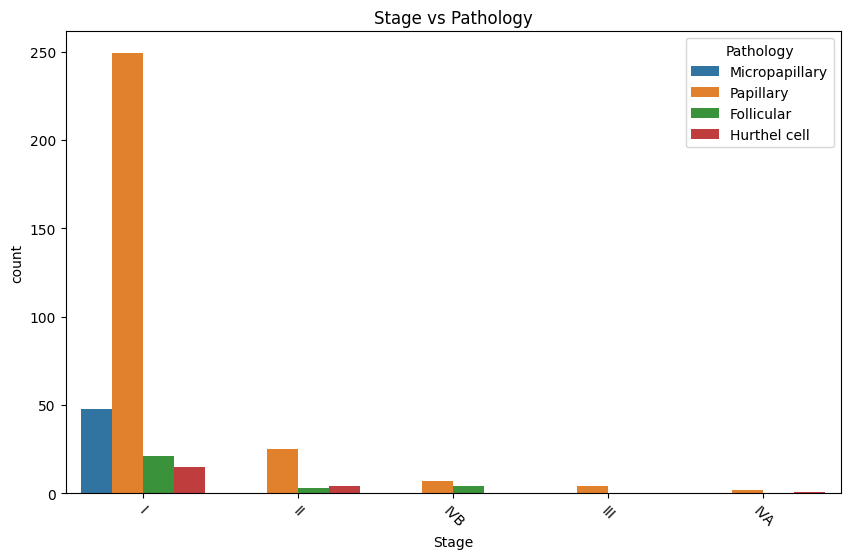

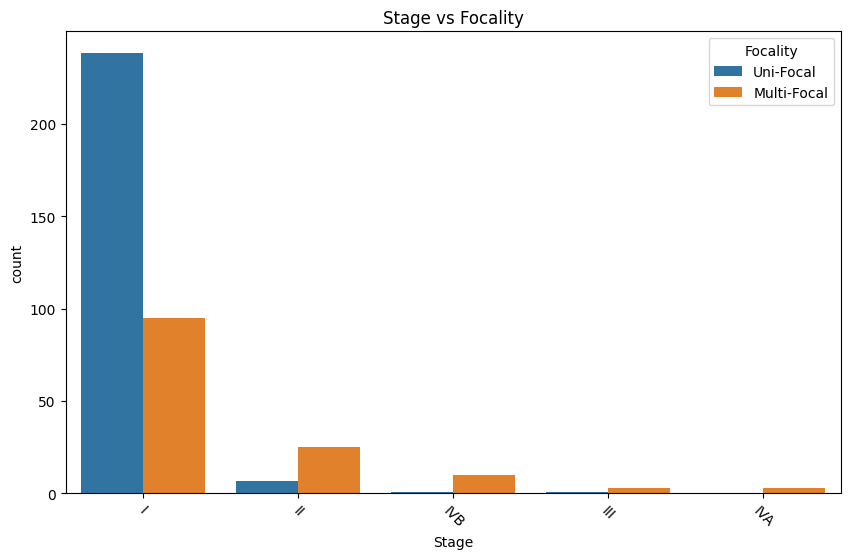

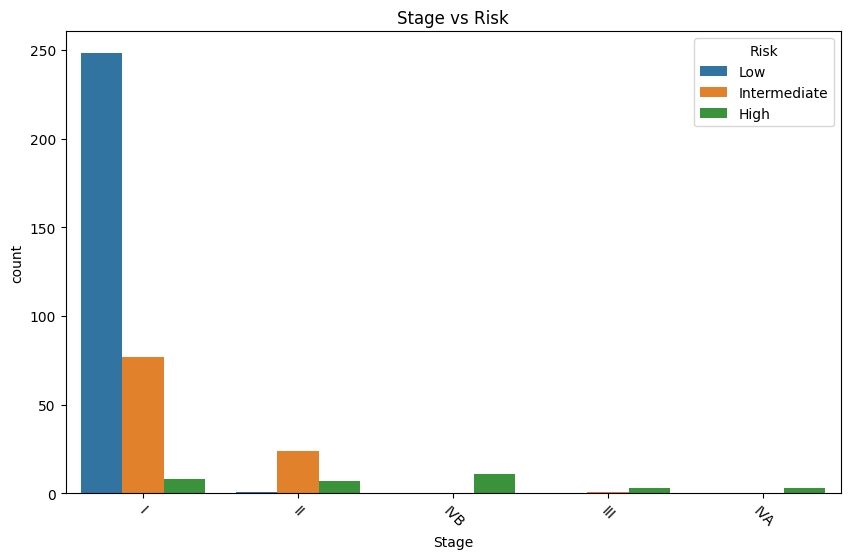

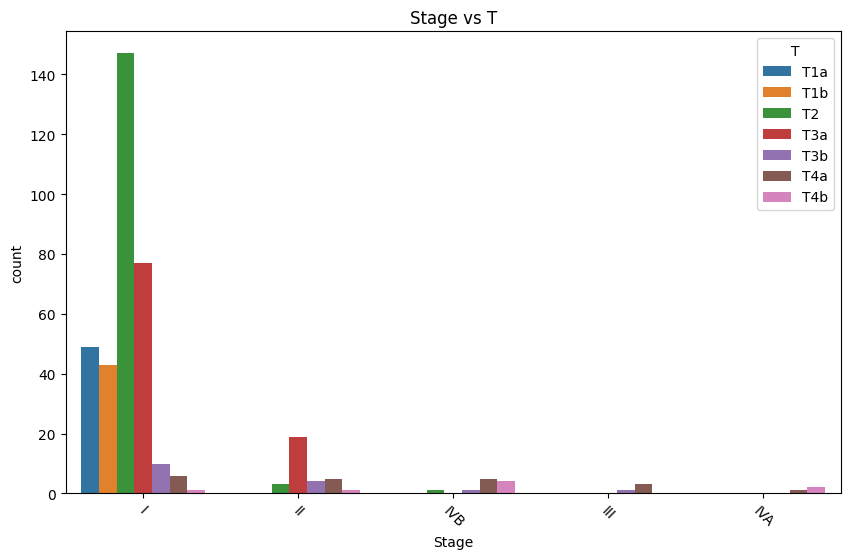

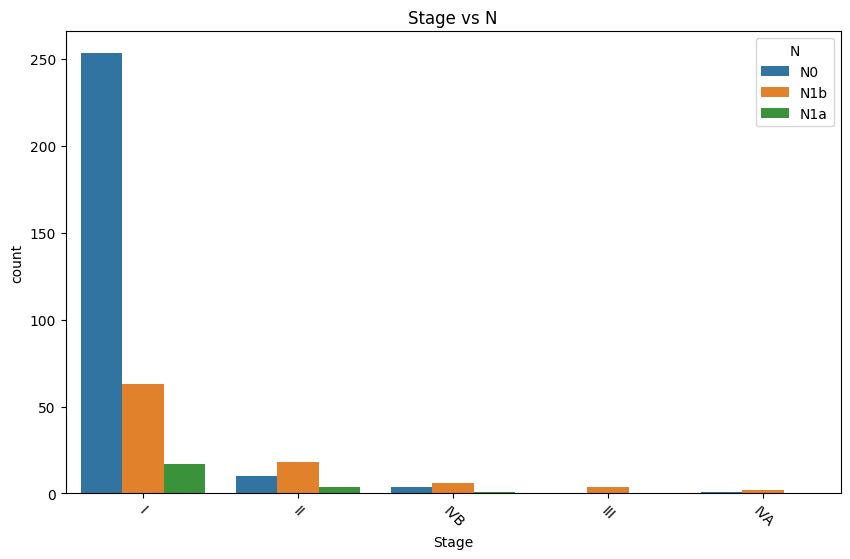

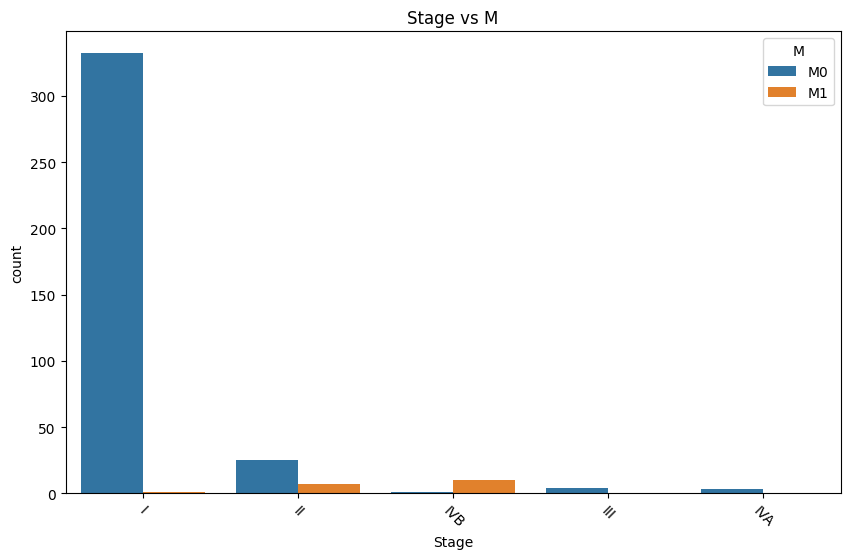

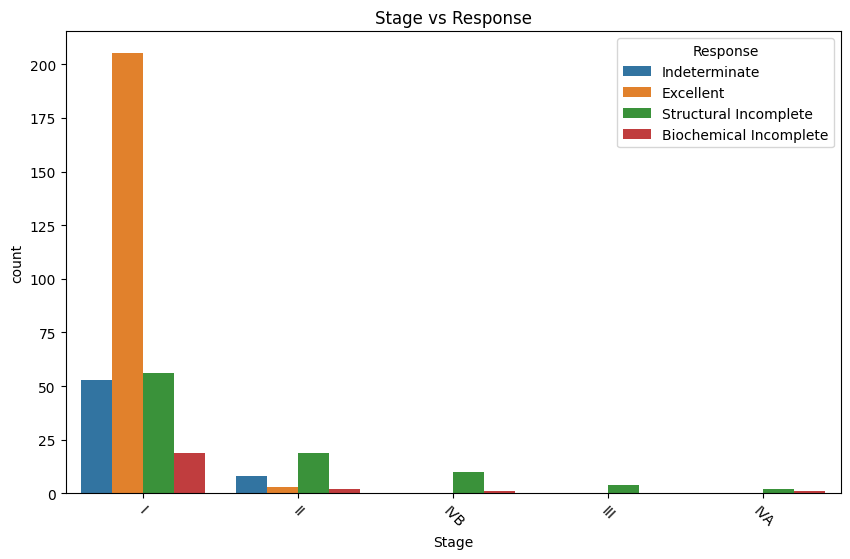

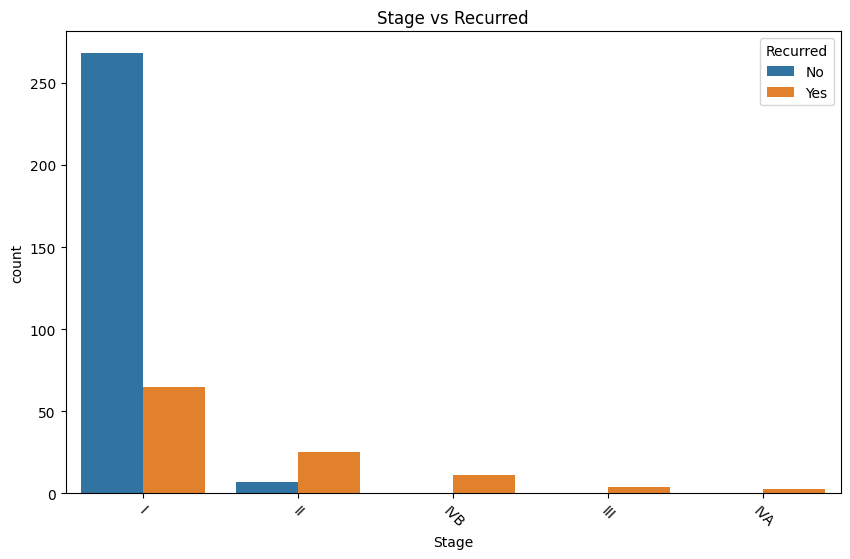

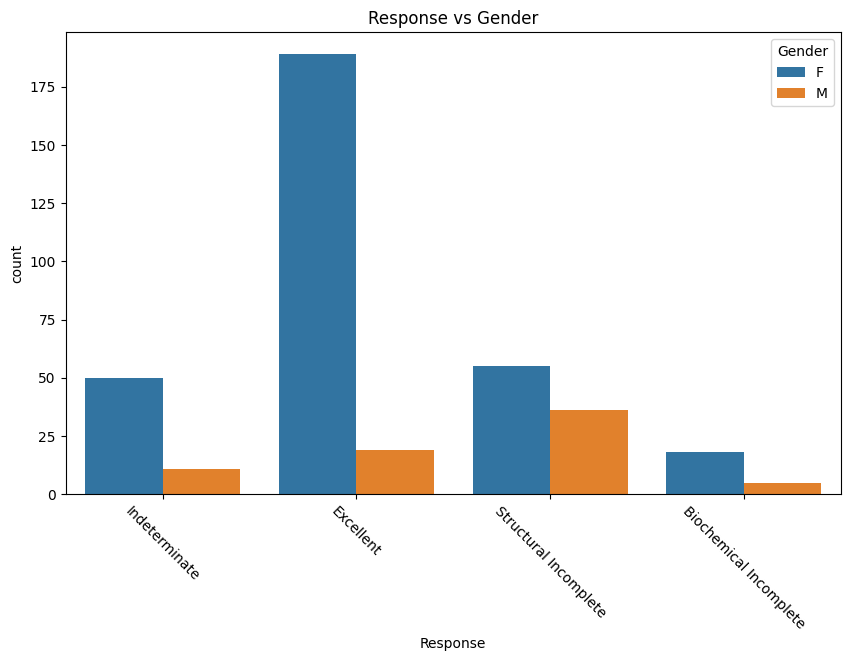

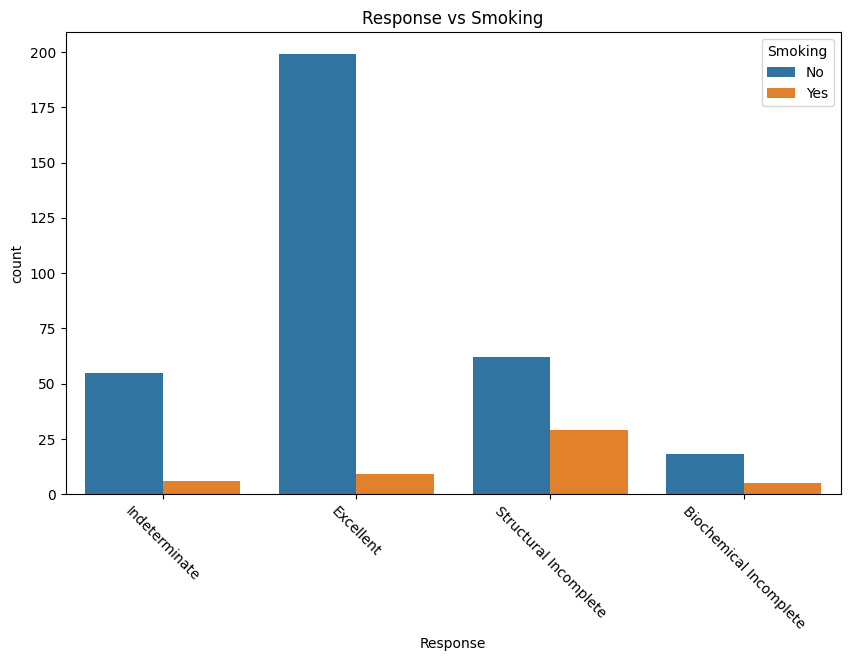

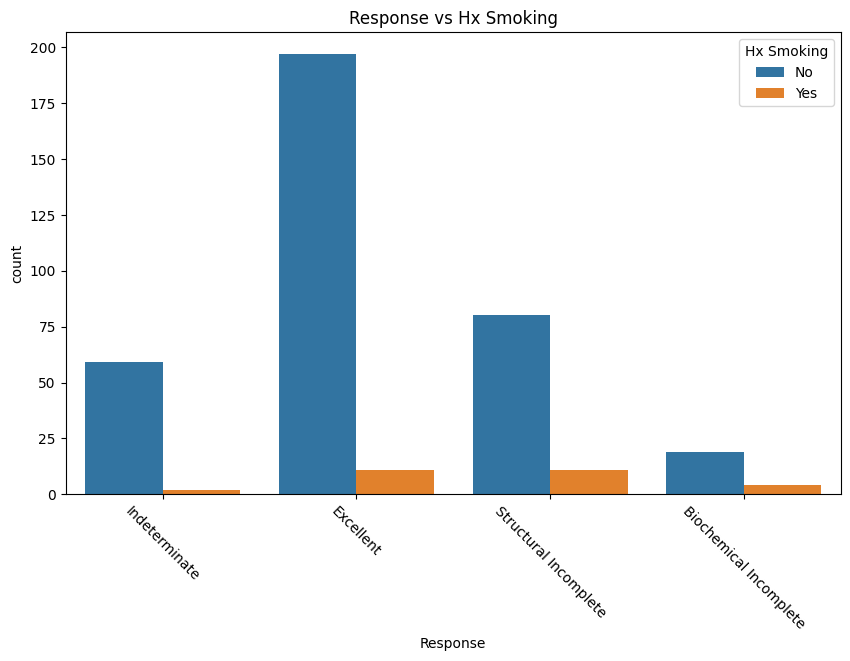

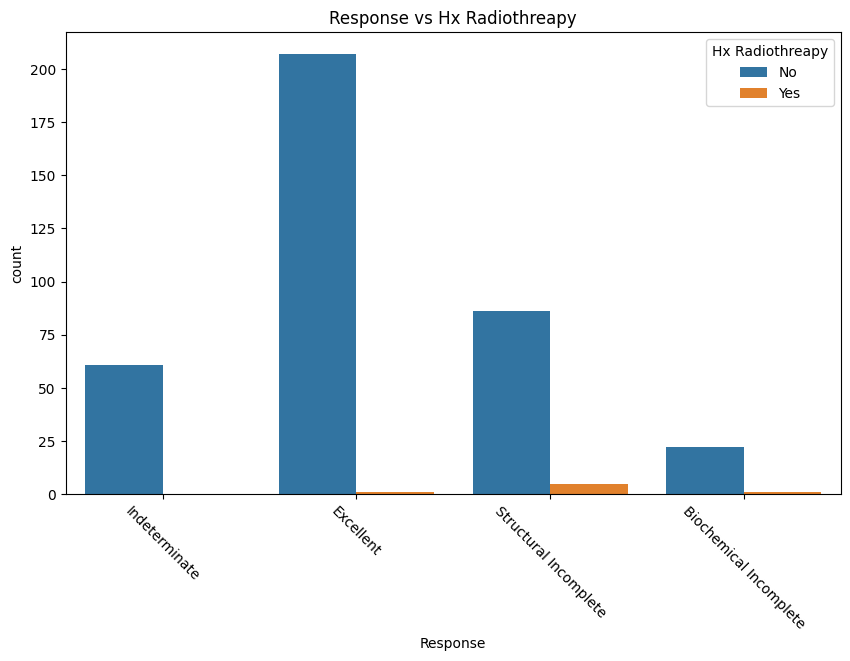

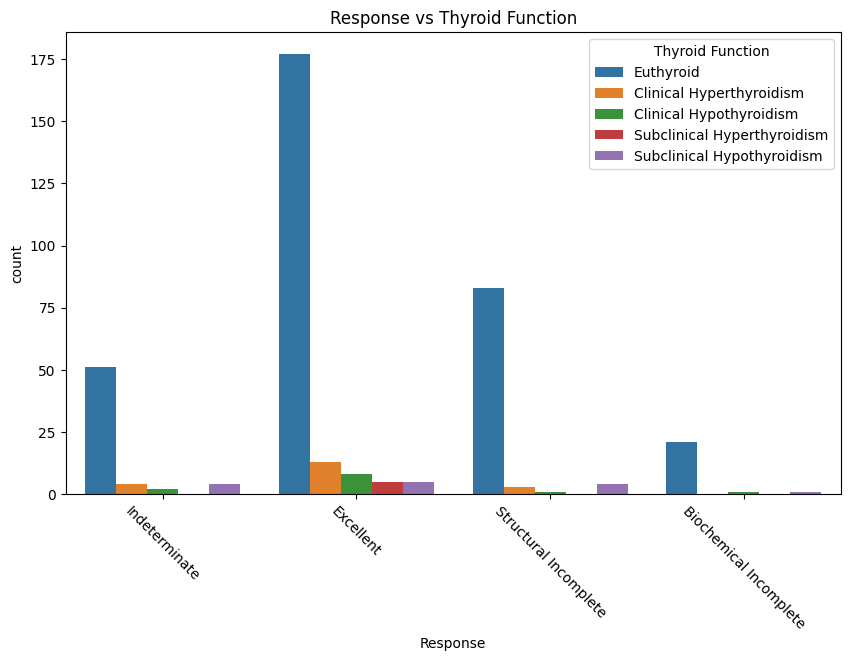

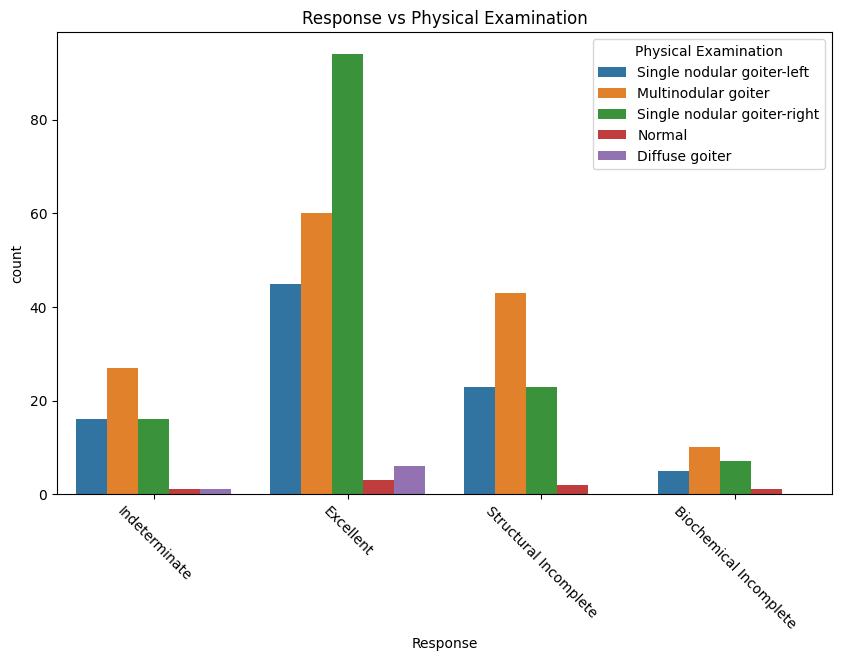

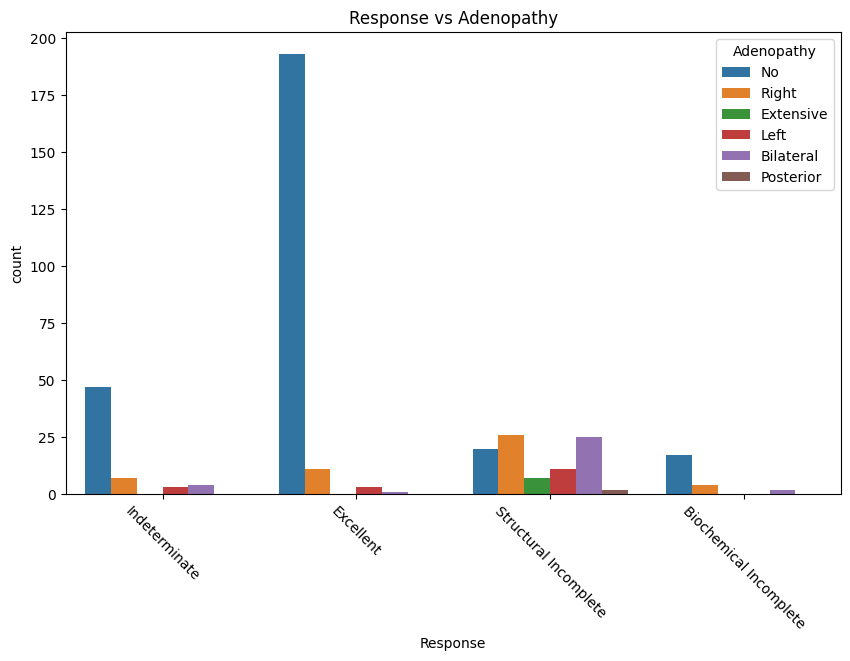

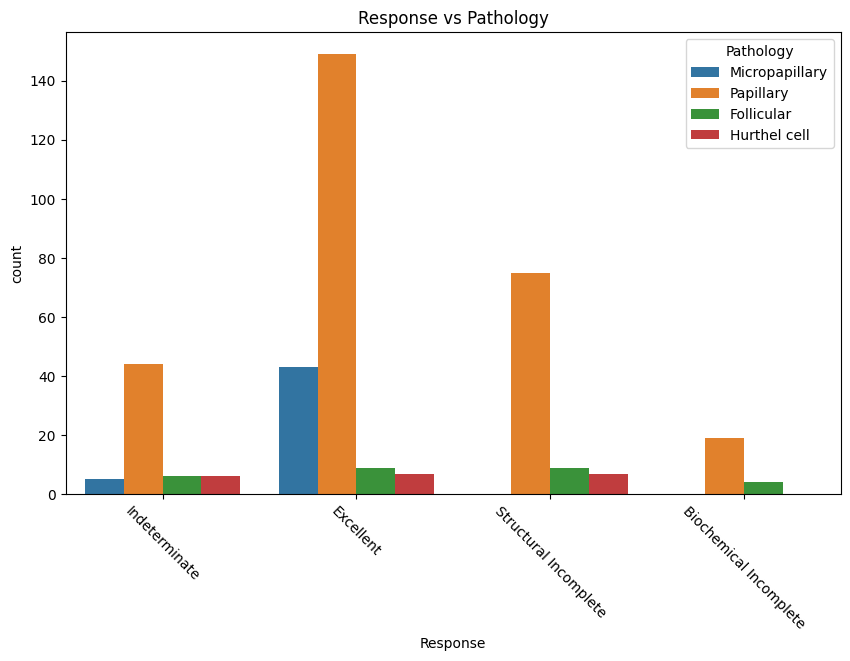

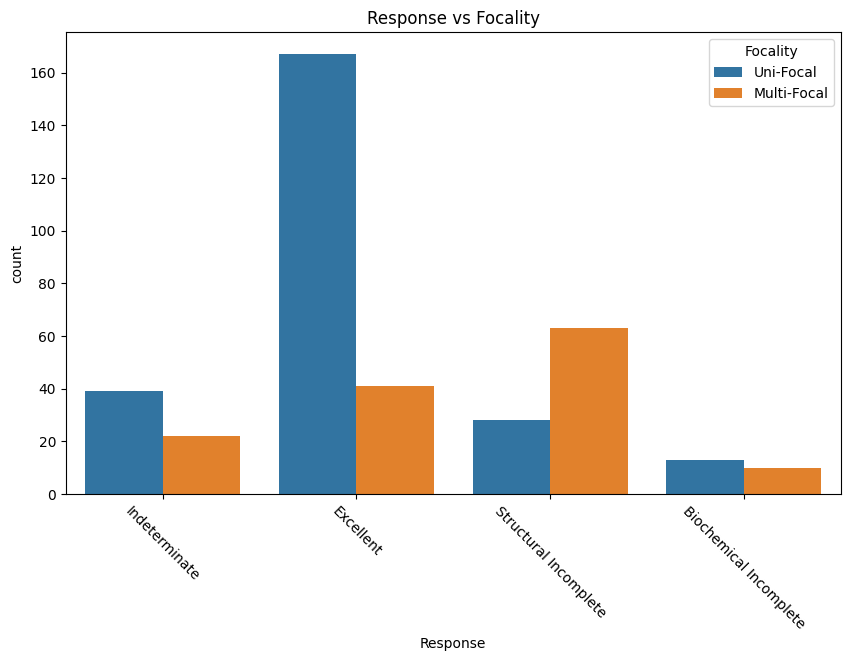

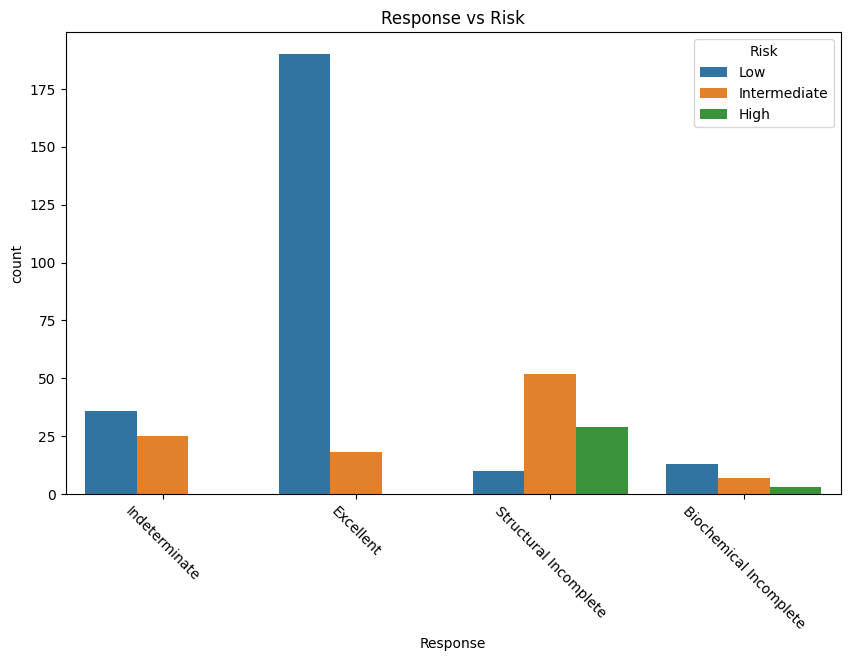

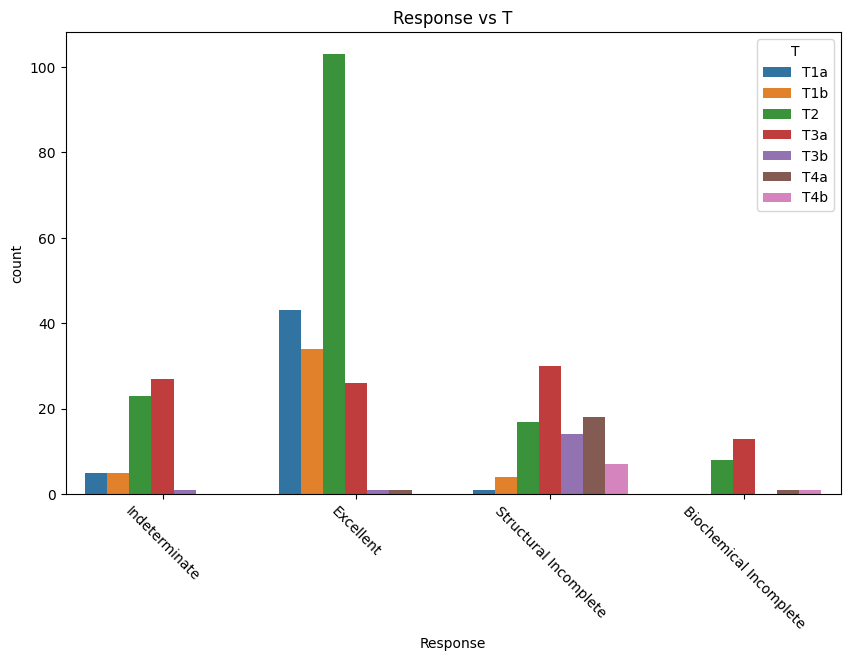

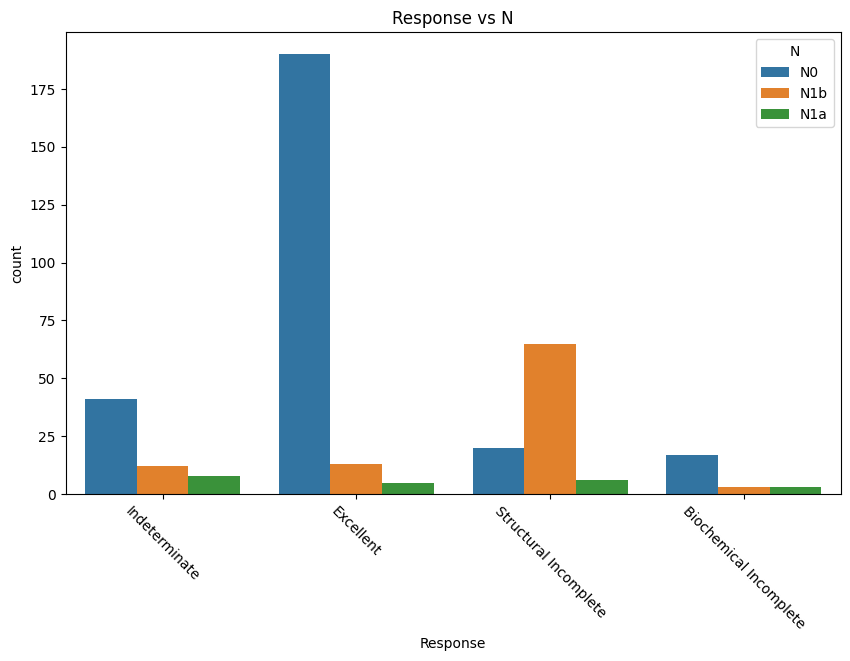

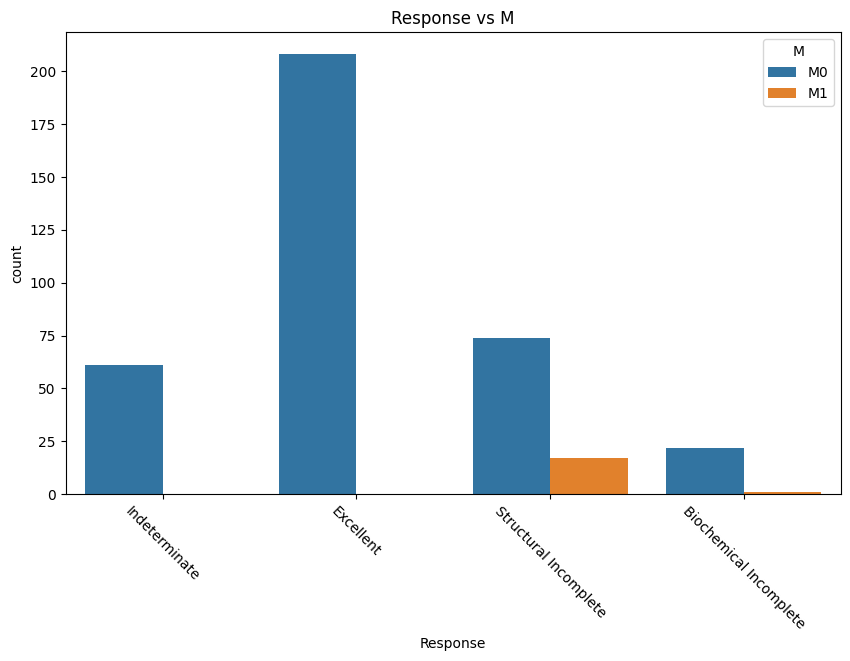

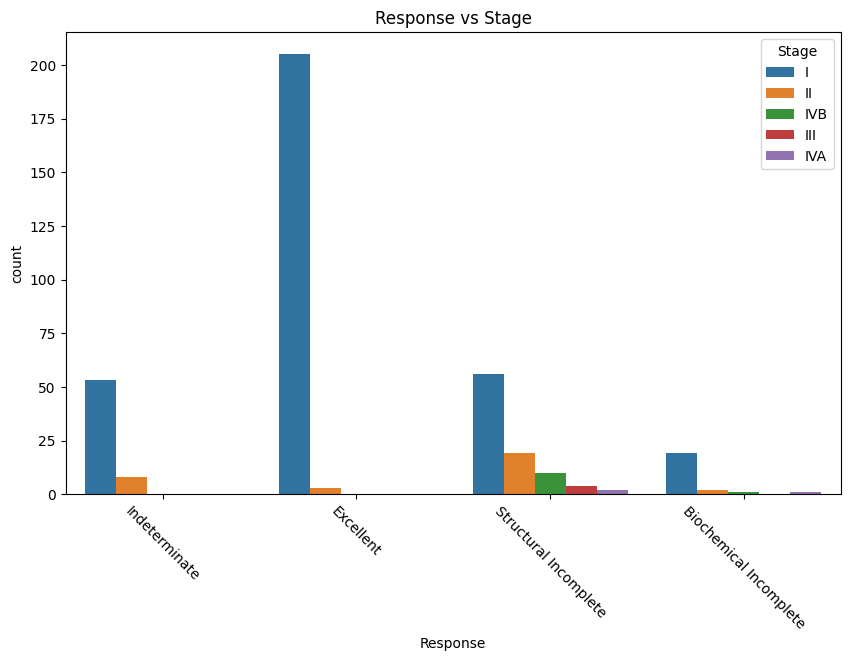

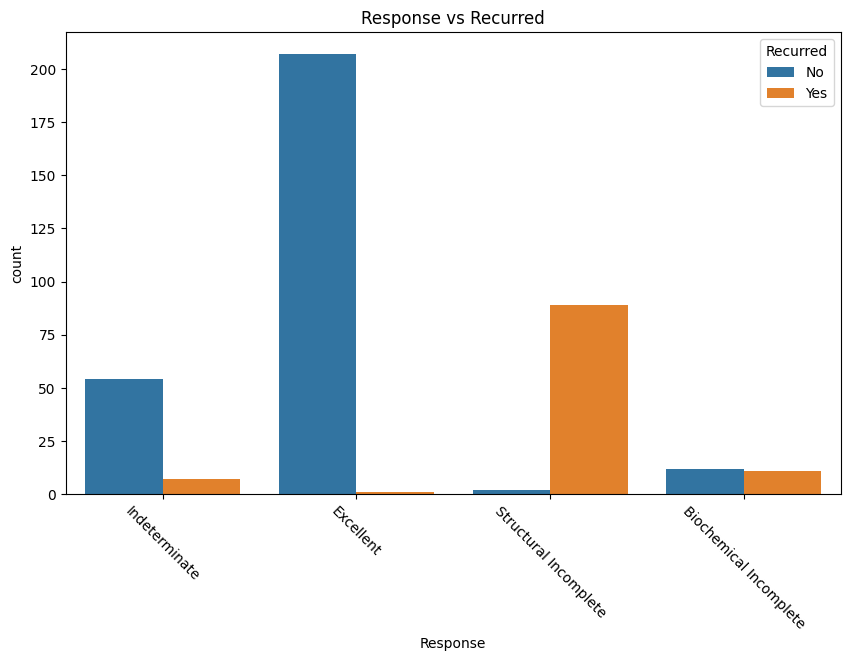

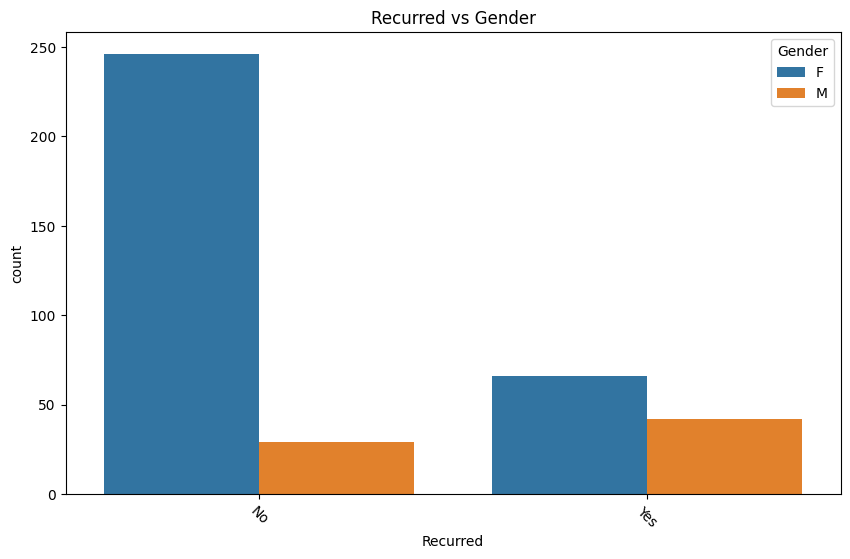

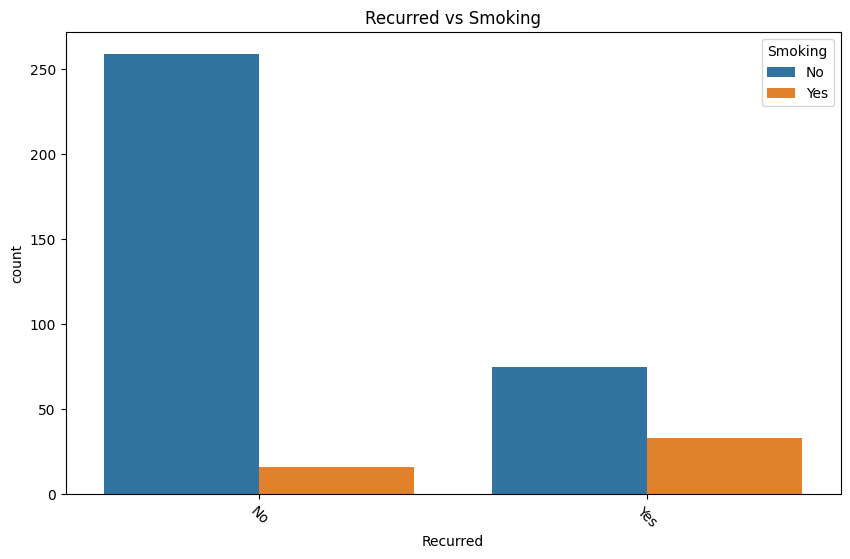

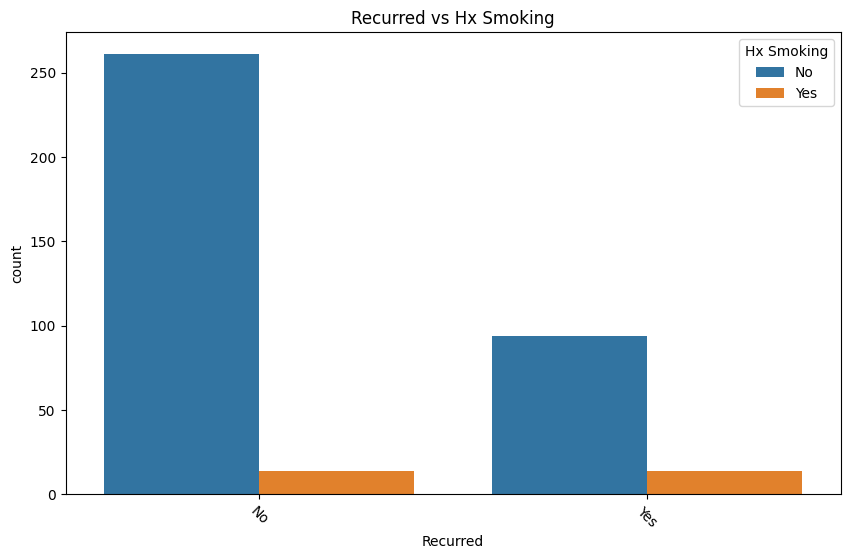

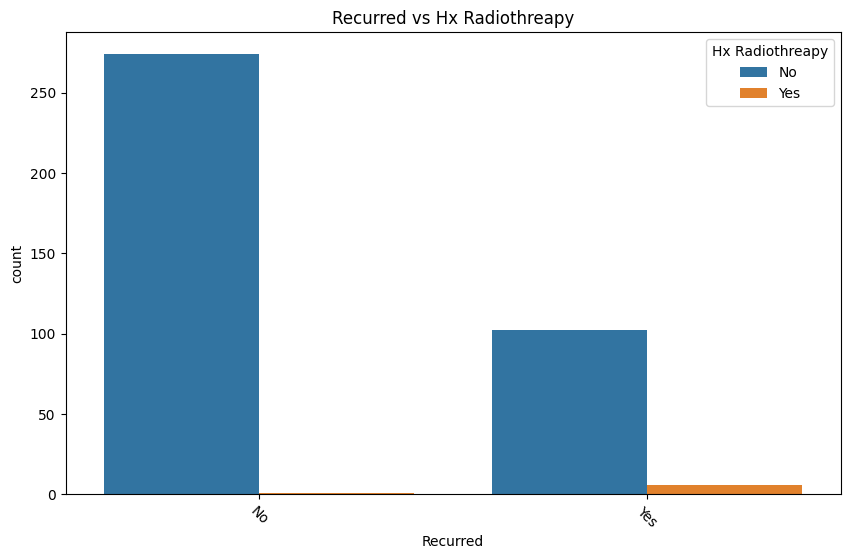

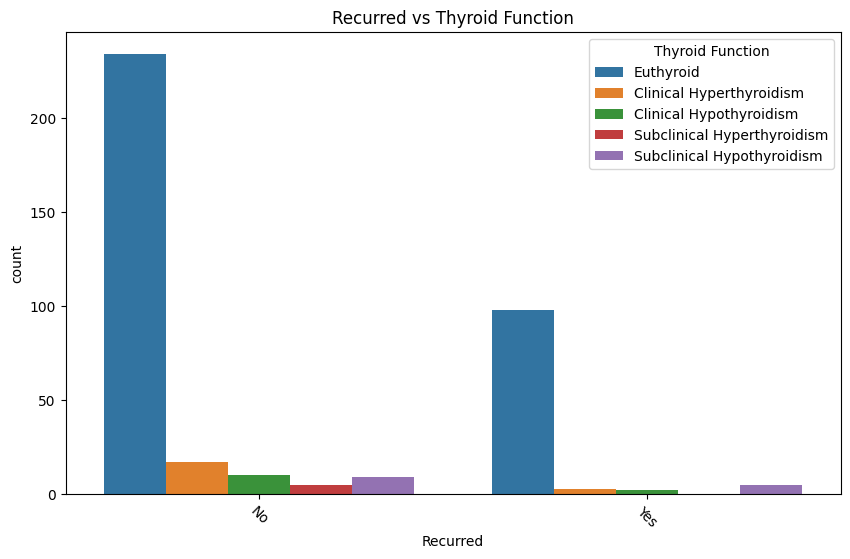

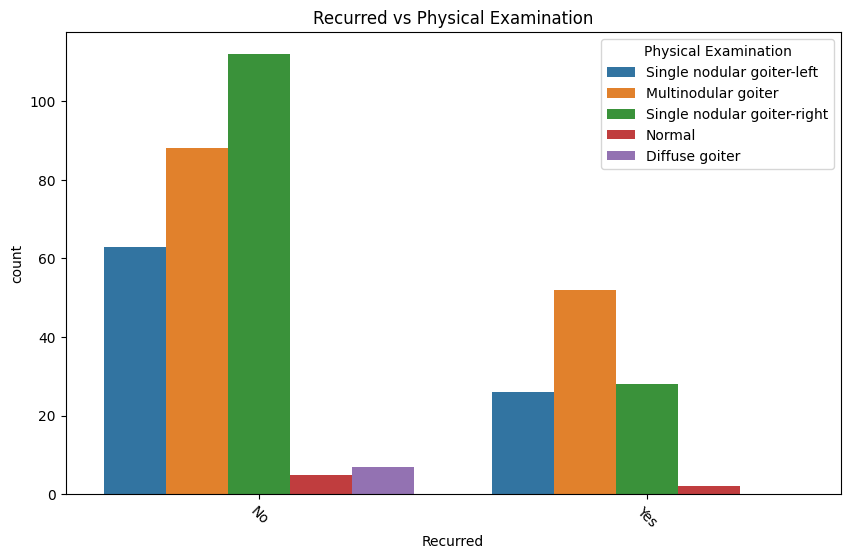

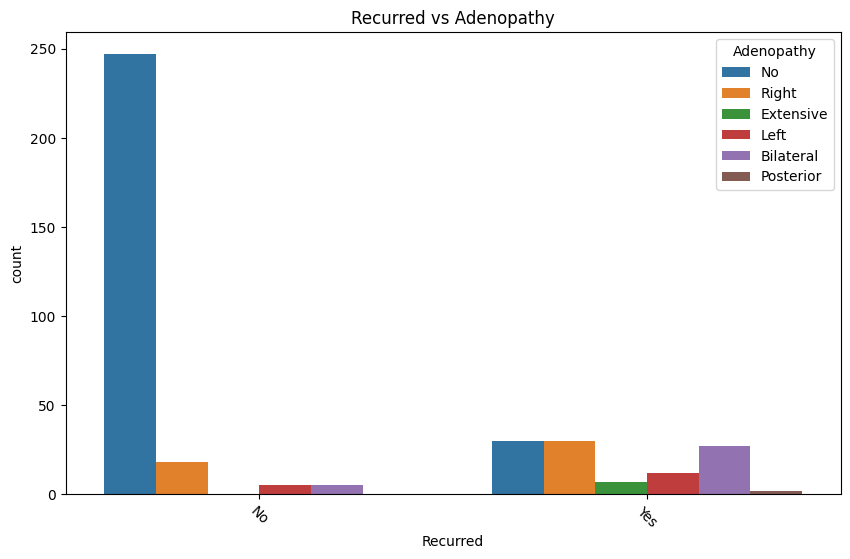

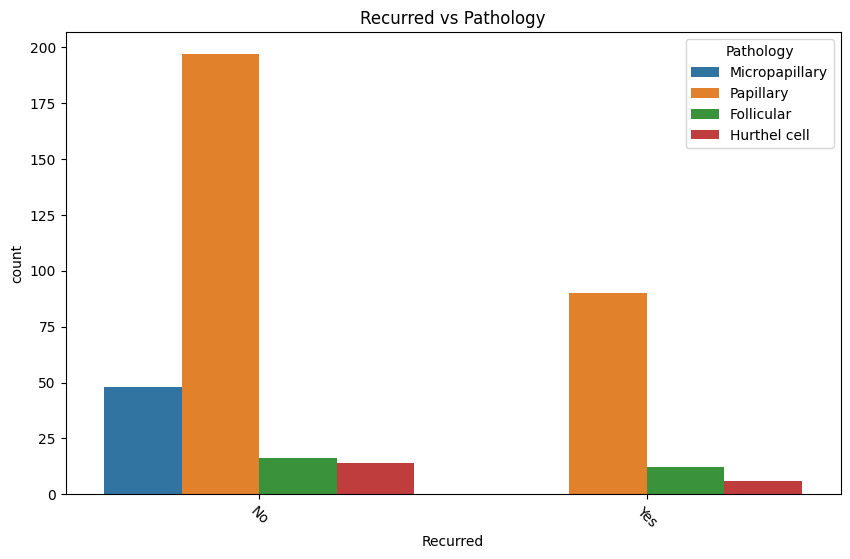

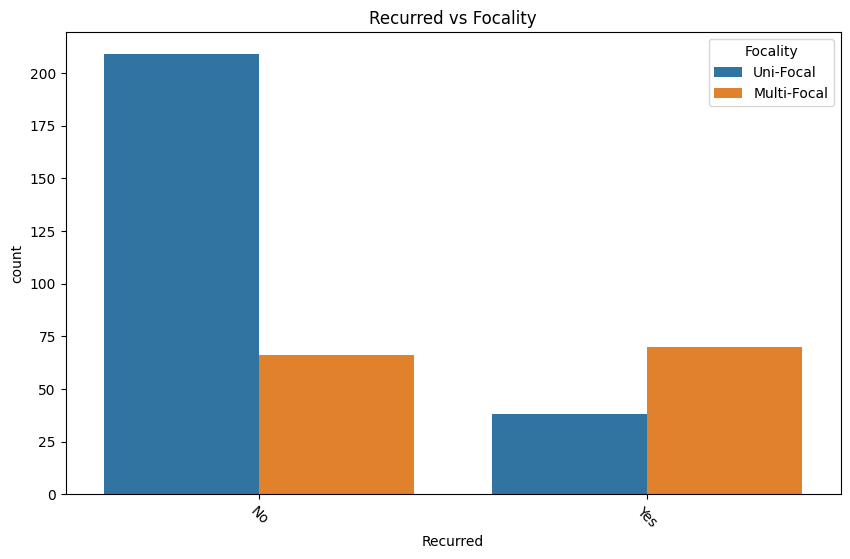

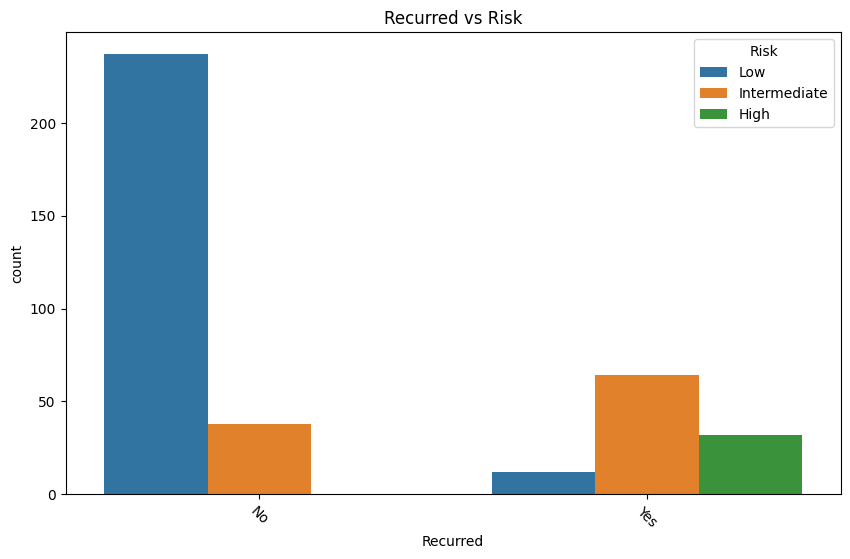

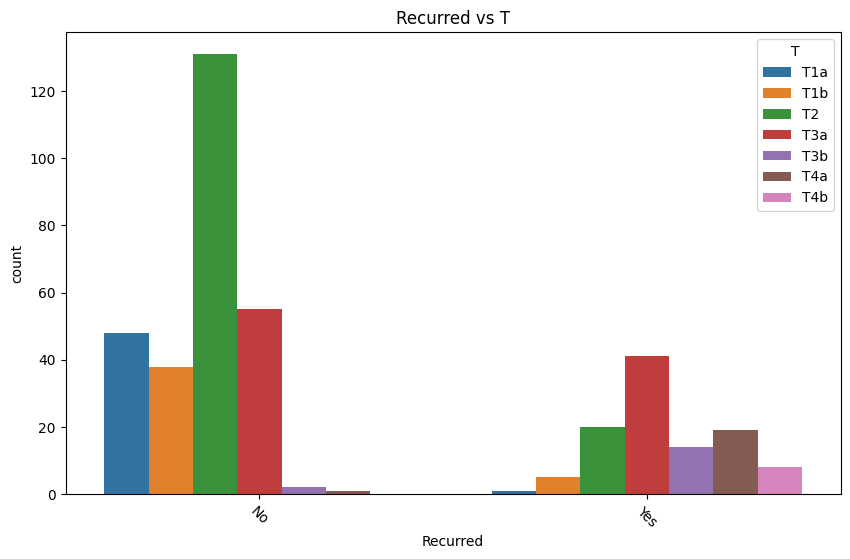

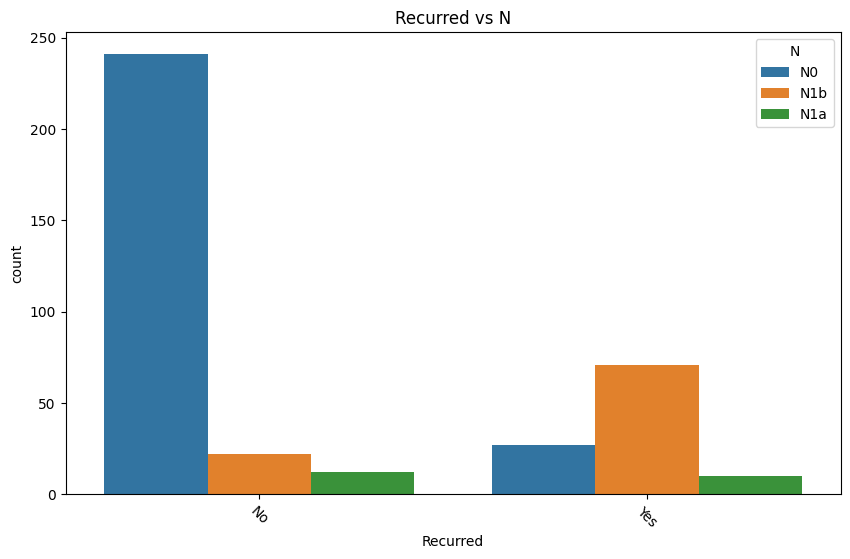

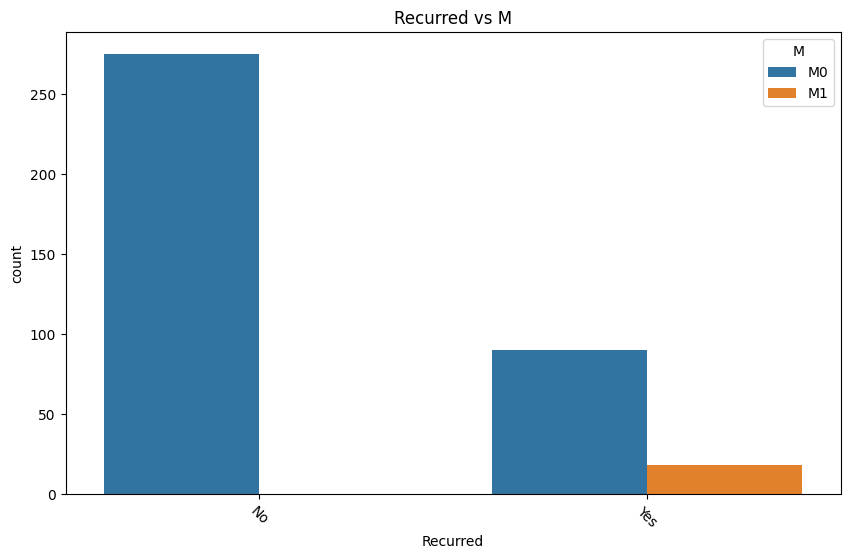

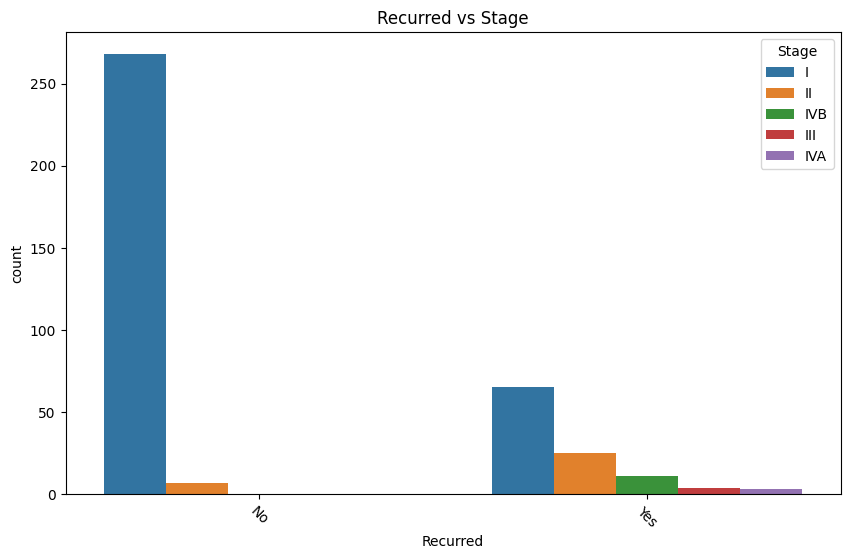

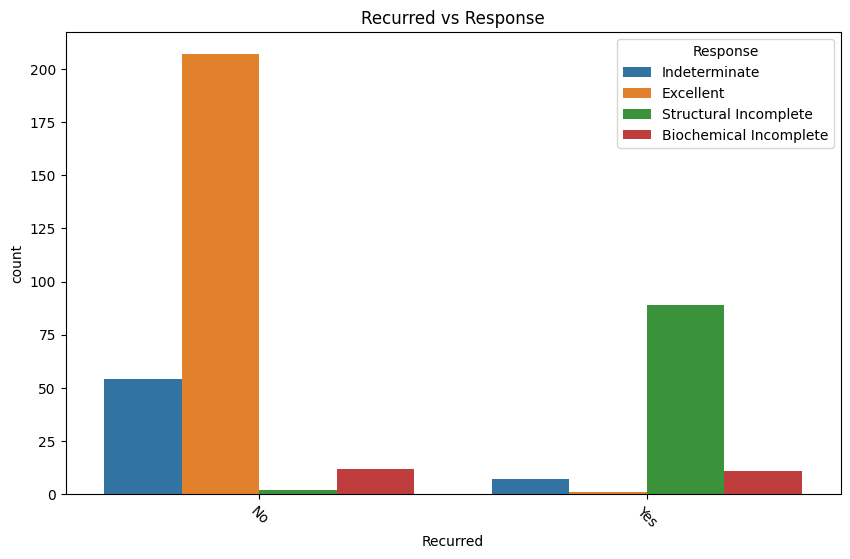

In [ ]:
for cat1 in categorical:
    for cat2 in categorical:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=cat1, hue=cat2)
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = -45)
            plt.show()

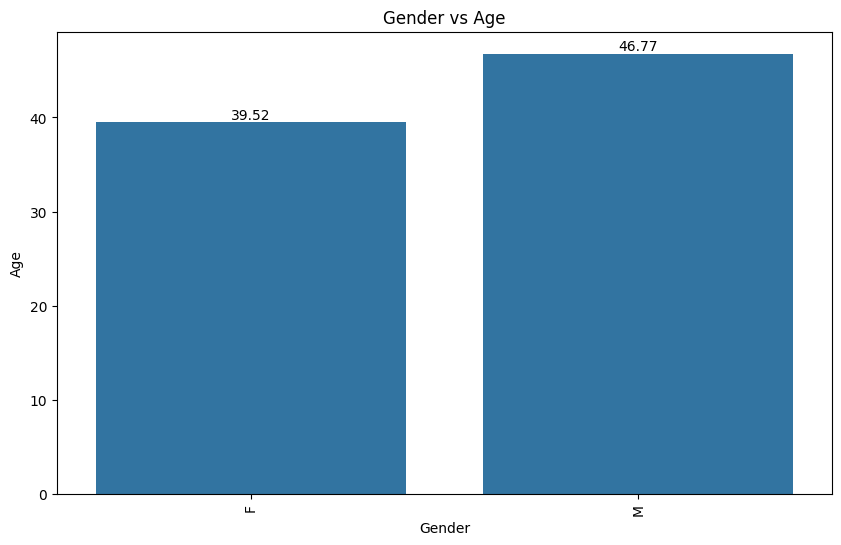

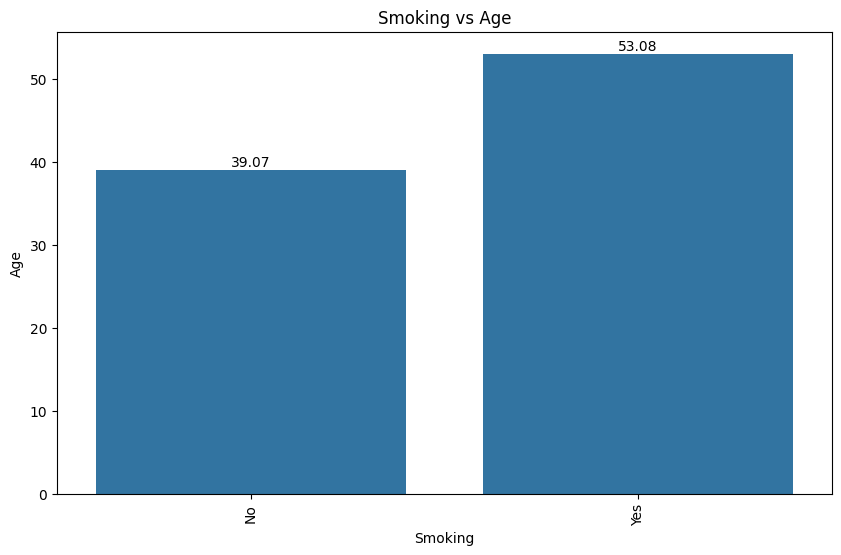

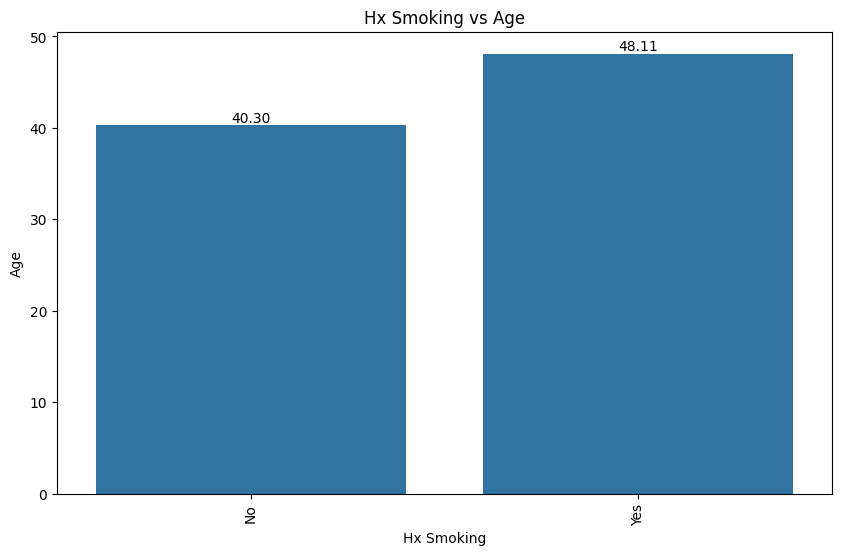

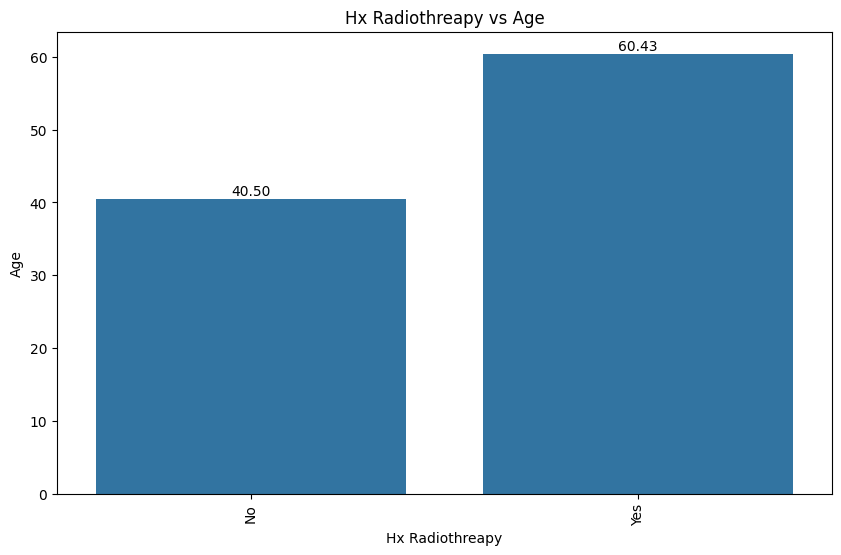

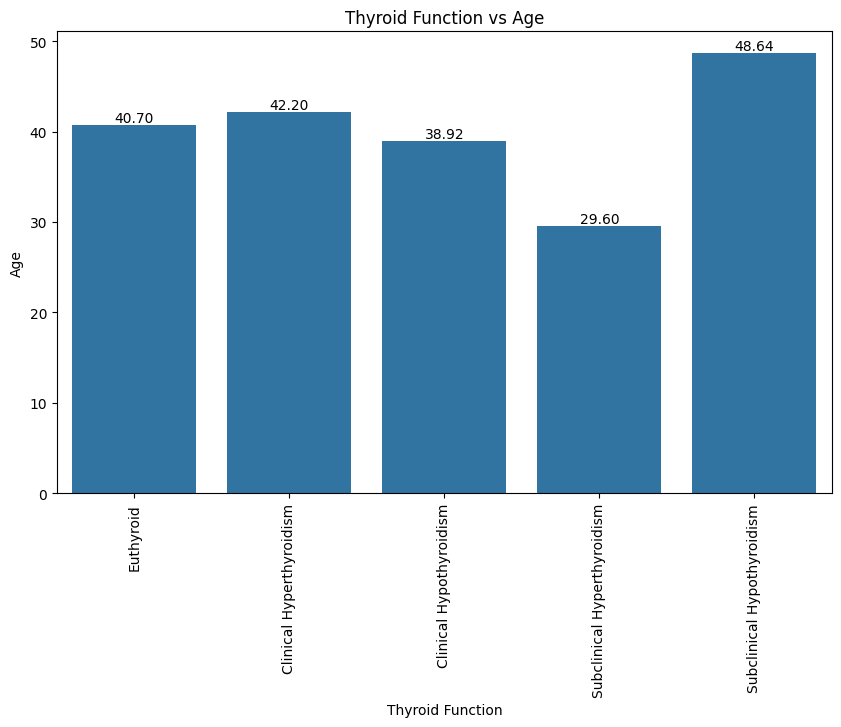

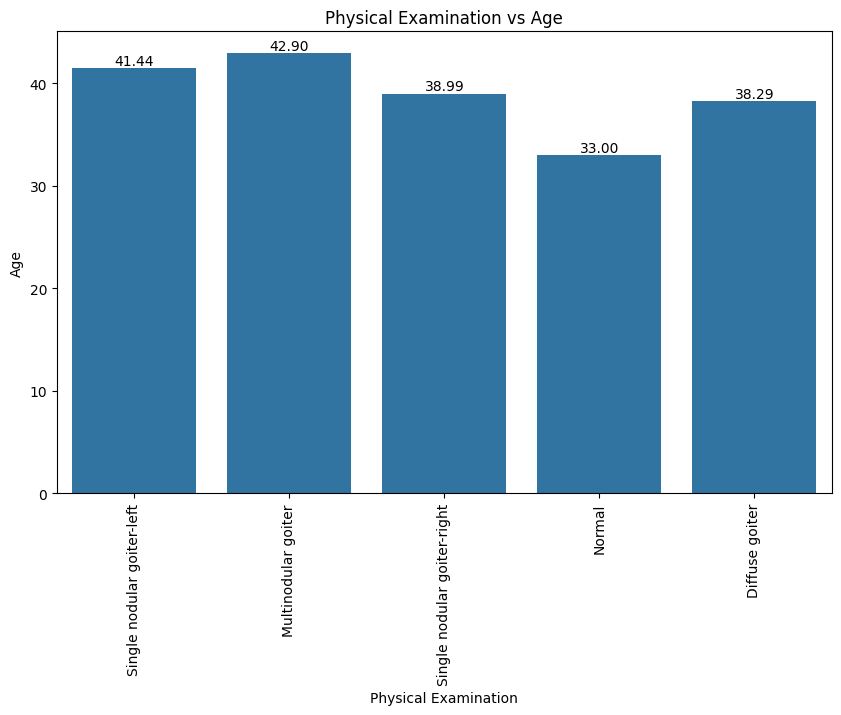

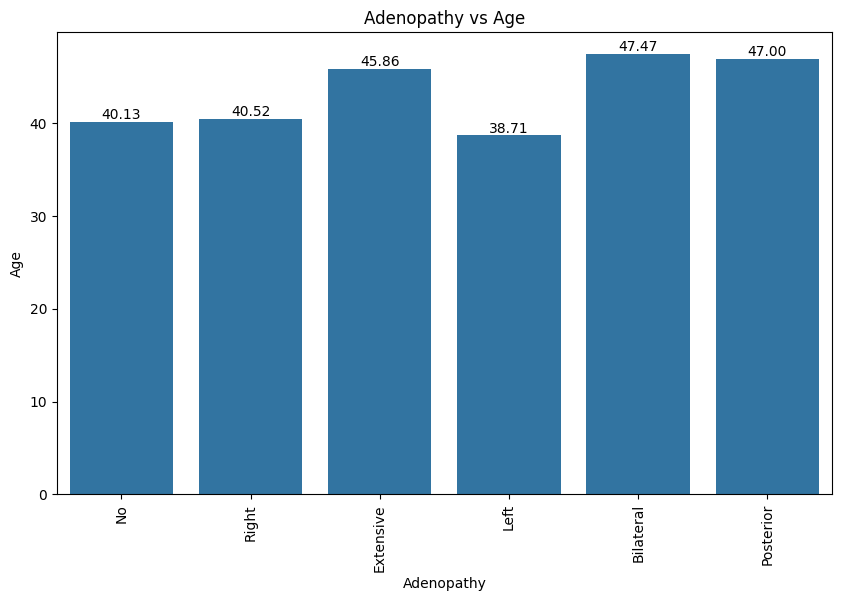

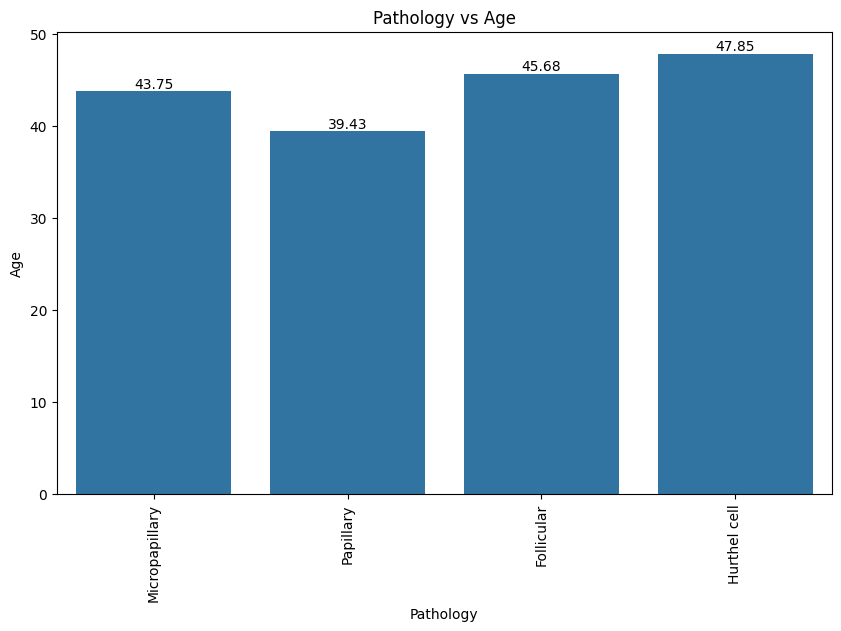

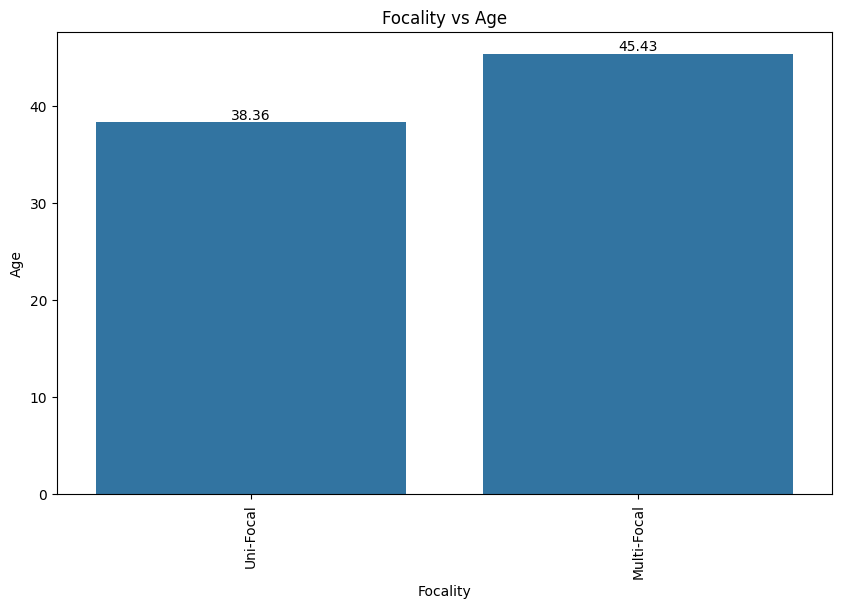

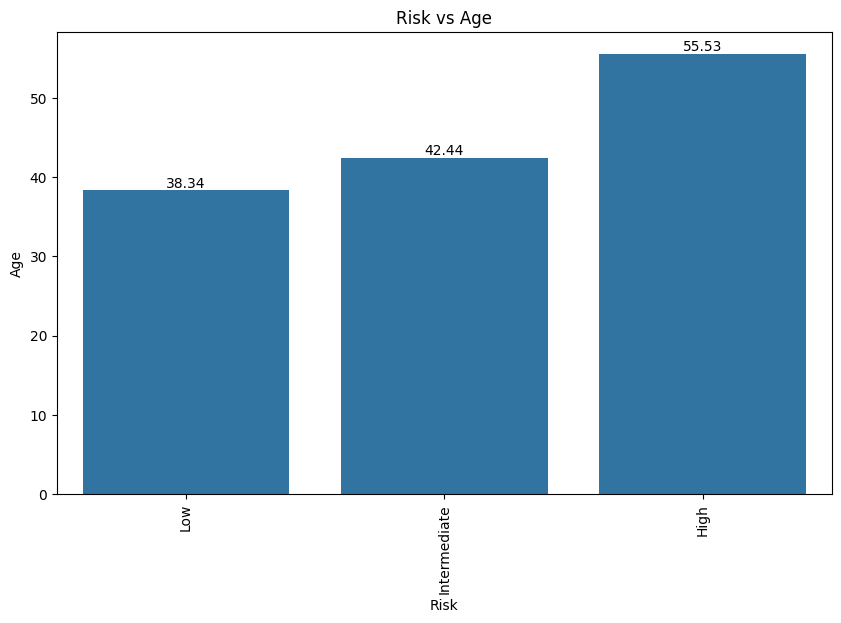

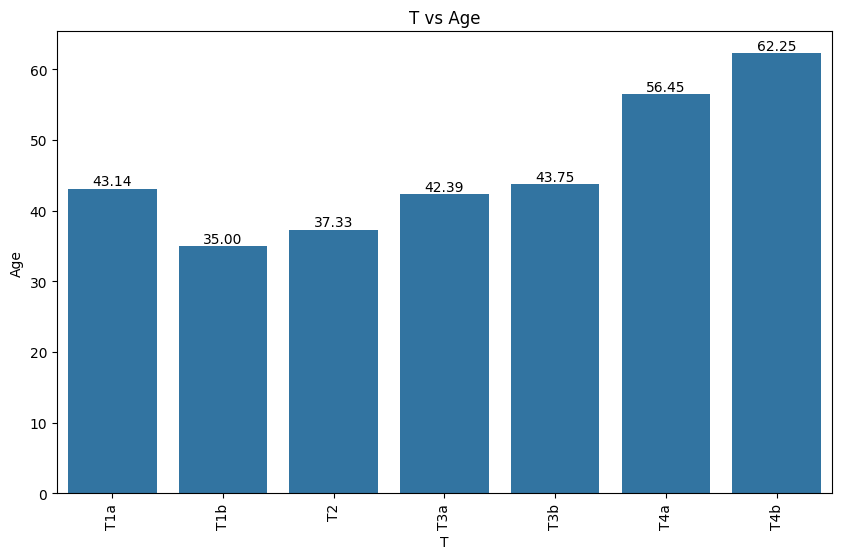

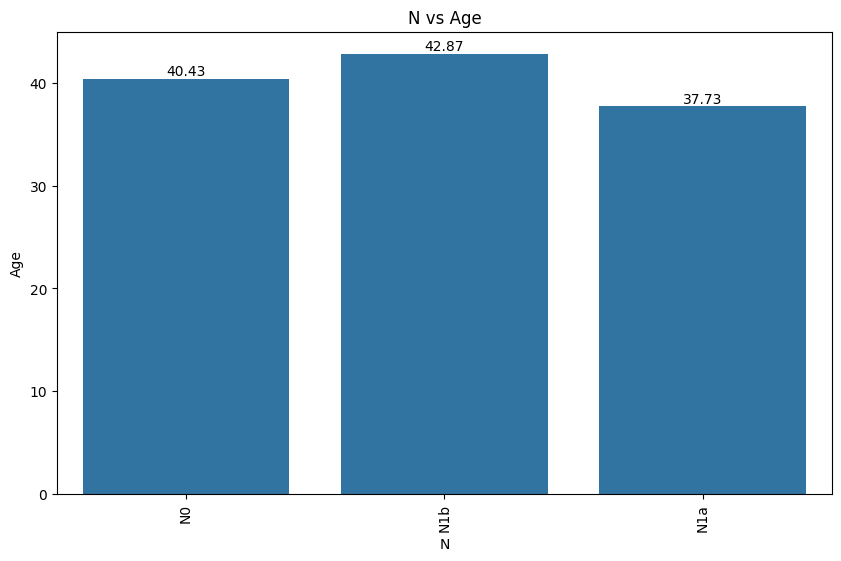

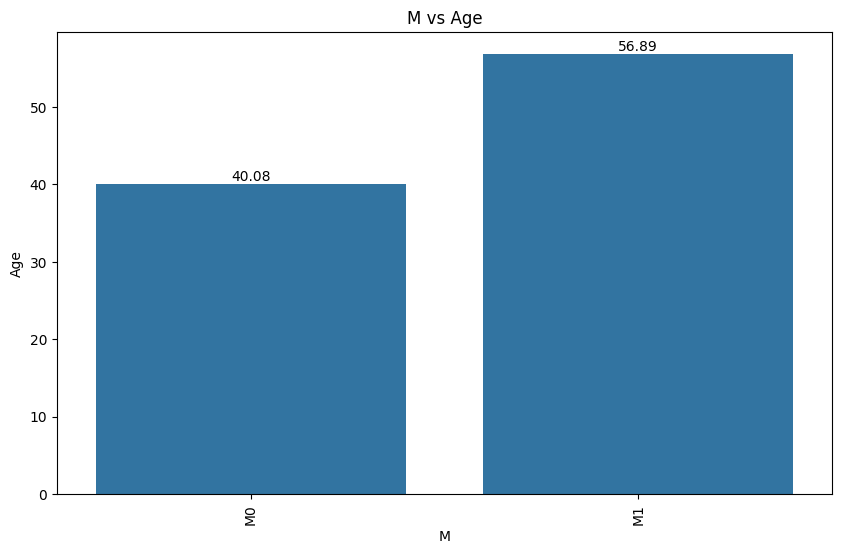

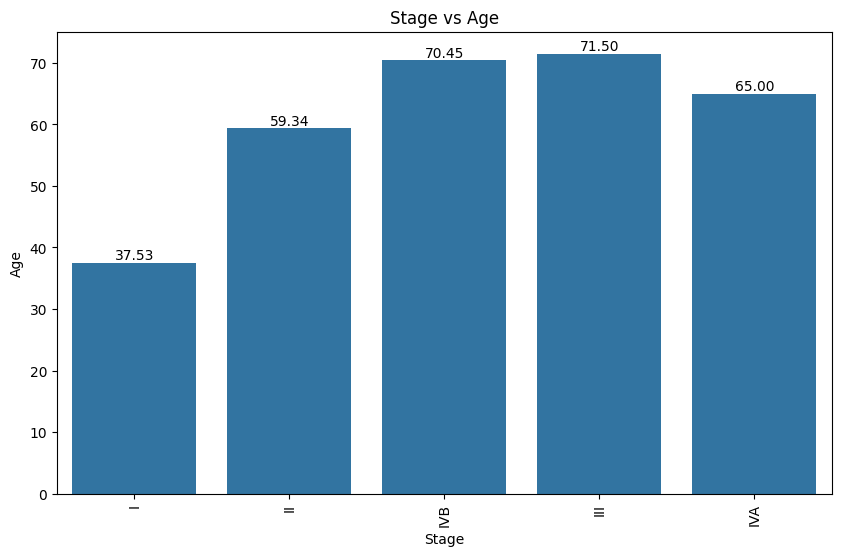

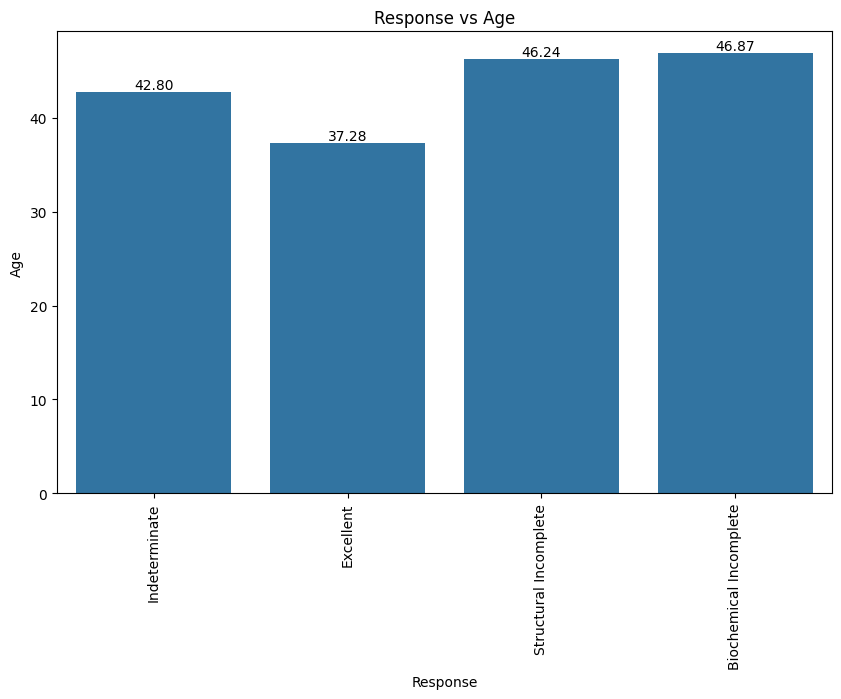

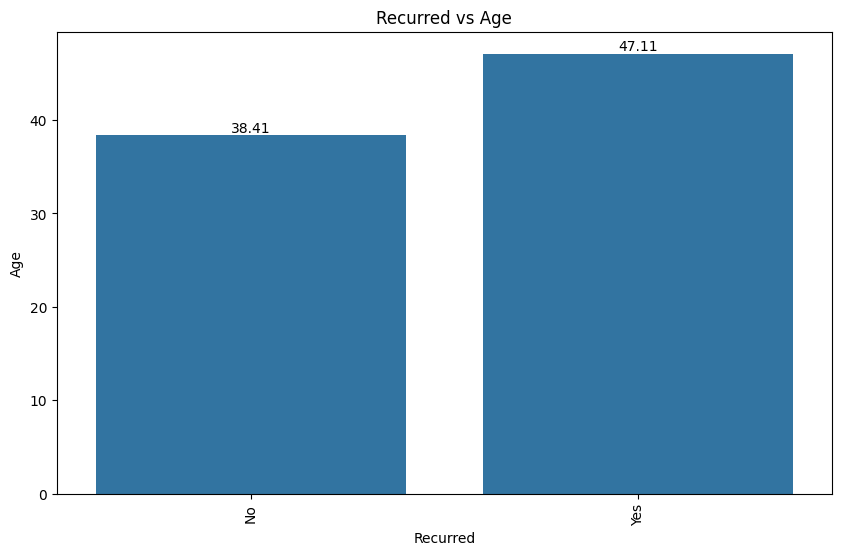

In [ ]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, ci=None)
        plt.title(f'{cat} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

In [ ]:
object_types = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

In [ ]:
object_types

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [ ]:
df_dummies = pd.get_dummies(df[object_types])

In [ ]:
df_dummies

Gender_F  Gender_M  Smoking_No  Smoking_Yes  Hx Smoking_No  \
0        True     False        True        False           True   
1        True     False        True        False          False   
2        True     False        True        False           True   
3        True     False        True        False           True   
4        True     False        True        False           True   
..        ...       ...         ...          ...            ...   
378     False      True       False         True          False   
379     False      True       False         True           True   
380     False      True       False         True          False   
381     False      True       False         True          False   
382     False      True       False         True           True   

     Hx Smoking_Yes  Hx Radiothreapy_No  Hx Radiothreapy_Yes  \
0             False                True                False   
1              True                True                False   
2             False                True                False   
3             False                True                False   
4             False                True                False   
..              ...                 ...                  ...   
378            True               False                 True   
379           False               False                 True   
380            True                True                False   
381            True               False                 True   
382           False                True                False   

     Thyroid Function_Clinical Hyperthyroidism  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   
..                                         ...   
378                                      False   
379                                      False   
380                                      False   
381                                       True   
382                                      False   

     Thyroid Function_Clinical Hypothyroidism  ...   M_M1  Stage_I  Stage_II  \
0                                       False  ...  False     True     False   
1                                       False  ...  False     True     False   
2                                       False  ...  False     True     False   
3                                       False  ...  False     True     False   
4                                       False  ...  False     True     False   
..                                        ...  ...    ...      ...       ...   
378                                     False  ...   True    False     False   
379                                     False  ...   True    False     False   
380                                     False  ...   True    False     False   
381                                     False  ...  False    False     False   
382                                     False  ...  False    False     False   

     Stage_III  Stage_IVA  Stage_IVB  Response_Biochemical Incomplete  \
0        False      False      False                            False   
1        False      False      False                            False   
2        False      False      False                            False   
3        False      False      False                            False   
4        False      False      False                            False   
..         ...        ...        ...                              ...   
378      False      False       True                             True   
379      False      False       True                            False   
380      False      False       True                            False   
381      False       True      False                            False   
382      False       True      False                            Fa

In [ ]:
df_dummies.shape

(383, 54)

In [ ]:
df_final = pd.concat([df.drop(object_types, axis=1), df_dummies], axis=1)

In [ ]:
df_final

Age Recurred  Gender_F  Gender_M  Smoking_No  Smoking_Yes  Hx Smoking_No  \
0     27       No      True     False        True        False           True   
1     34       No      True     False        True        False          False   
2     30       No      True     False        True        False           True   
3     62       No      True     False        True        False           True   
4     62       No      True     False        True        False           True   
..   ...      ...       ...       ...         ...          ...            ...   
378   72      Yes     False      True       False         True          False   
379   81      Yes     False      True       False         True           True   
380   72      Yes     False      True       False         True          False   
381   61      Yes     False      True       False         True          False   
382   67      Yes     False      True       False         True           True   

     Hx Smoking_Yes  Hx Radiothreapy_No  Hx Radiothreapy_Yes  ...   M_M1  \
0             False                True                False  ...  False   
1              True                True                False  ...  False   
2             False                True                False  ...  False   
3             False                True                False  ...  False   
4             False                True                False  ...  False   
..              ...                 ...                  ...  ...    ...   
378            True               False                 True  ...   True   
379           False               False                 True  ...   True   
380            True                True                False  ...   True   
381            True               False                 True  ...  False   
382           False                True                False  ...  False   

     Stage_I  Stage_II  Stage_III  Stage_IVA  Stage_IVB  \
0       True     False      False      False      False   
1       True     False      False      False      False   
2       True     False      False      False      False   
3       True     False      False      False      False   
4       True     False      False      False      False   
..       ...       ...        ...        ...        ...   
378    False     False      False      False       True   
379    False     False      False      False       True   
380    False     False      False      False       True   
381    False     False      False       True      False   
382    False     False      False       True      False   

     Response_Biochemical Incomplete  Response_Excellent  \
0                              False               False   
1                              False                True   
2                              False                True   
3                              False                True   
4                              False                True   
..                               ...                 ...   
378                             True               False   
379                            False               False   
380                            False               False   
381                            False               False   
382                            False               False   

     Response_Indeterminate  Response_Structural Incomplete  
0                      True                           False  
1                     False                           False  
2                     False                           False  
3                     False                           False  
4                     False                           False  
..                      ...                             ...  
378                   False                           False  
379                   False                            True  
380                   False                            True  
381                   False                            True  
382    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df_final['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = df_final.drop('Recurred', axis=1)
y = df_final['Recurred']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
log_reg_pred = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.974025974025974


In [ ]:
y_pred_train = log_reg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9738562091503268


In [ ]:
svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)


SVC()

In [ ]:
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.7792207792207793


In [ ]:
y_pred_train = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7679738562091504


In [ ]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

In [ ]:
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.948051948051948


In [ ]:
y_pred_train = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9803921568627451


In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_model.predict(X_test)
y_accuracy= accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", y_accuracy)


Decision Tree Accuracy: 0.8961038961038961


In [ ]:
y_pred_train = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          No       0.93      0.93      0.93        55
         Yes       0.82      0.82      0.82        22

    accuracy                           0.90        77
   macro avg       0.87      0.87      0.87        77
weighted avg       0.90      0.90      0.90        77

